In [1]:
topK = 10

In [2]:
T = 10

In [3]:
import numpy as np
import pandas as pd
import math
# import optimization as opt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import os
import random
import pickle
import json
import time
import copy
from tqdm import tqdm
from joblib import Parallel, delayed
import sys
# import numba as nb

**Just checking if we are running on the right server**

In [4]:
!hostname

hcdmg2


In [5]:
VERBOSITY = 0.05

def verbose(arg):
    if random.random() < VERBOSITY:
        print(arg)

verbose("echo")

In [6]:
user_train = np.load('zhendong/data/book/user_train.npy')
user_test = np.load('zhendong/data/book/user_test.npy')
user_valid = np.load('zhendong/data/book/user_valid.npy')

In [7]:
df = pd.read_csv('zhendong/data/book/interaction.csv')

In [8]:
interactions = df.values

In [9]:
len(user_train), len(user_test), len(user_valid)

(1513, 189, 189)

In [10]:
item_dict = json.load(open('zhendong/data/book/Graph_generate_data/item_dict.json', 'rb'))

In [11]:
num_users = len(user_train)+len(user_test)+ len(user_valid)
num_items = len(item_dict)
num_features = 35

In [12]:
item_dict

{'0': {'feature_index': [32, 34, 7, 10, 11, 13, 18, 27]},
 '1': {'feature_index': [0, 34, 3, 5, 14, 15, 21, 24]},
 '2': {'feature_index': [32, 33, 1, 3, 0, 7, 13, 16]},
 '3': {'feature_index': [33, 2, 1, 6, 10, 22, 28, 29]},
 '4': {'feature_index': [4, 9, 13, 15, 18, 22, 28, 31]},
 '5': {'feature_index': [32, 10, 17, 18, 20, 21, 24, 30]},
 '6': {'feature_index': [32, 34, 4, 9, 22, 28, 29, 30]},
 '7': {'feature_index': [33, 4, 5, 7, 16, 21, 24, 30]},
 '8': {'feature_index': [33, 3, 4, 7, 8, 19, 29, 31]},
 '9': {'feature_index': [0, 3, 12, 18, 19, 20, 21, 22, 23, 24]},
 '10': {'feature_index': [32, 34, 2, 17, 22, 26, 28, 29]},
 '11': {'feature_index': [32, 1, 33, 34, 10, 16, 25, 31]},
 '12': {'feature_index': [34, 6, 14, 15, 17, 20, 26, 29]},
 '13': {'feature_index': [2, 4, 7, 9, 12, 17, 20, 30]},
 '14': {'feature_index': [32, 34, 4, 5, 8, 18, 28, 30]},
 '15': {'feature_index': [32, 34, 9, 17, 19, 25, 26, 29]},
 '16': {'feature_index': [34, 4, 9, 21, 22, 26, 28, 29]},
 '17': {'feature_in

In [13]:
item_opinion = np.zeros((num_items, num_features))

for i in item_dict:
    features = list(map(int,item_dict[i]['feature_index']))
    item_opinion[int(i),features] = 1

In [14]:
item_opinion

array([[0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
user_attr = json.load(open('zhendong/data/book/user_attr.json', 'rb'))

In [16]:
user_attr

{'0': [30, 28, 1, 29, 25, 9, 0, 8, 19, 4, 3, 34],
 '1': [22, 15, 18, 13, 34, 23, 28, 26, 27, 31, 11, 30],
 '2': [25, 30, 18, 28, 34, 5, 13, 14, 26, 31, 10, 0],
 '3': [18, 34, 21, 31, 32, 4, 0, 28, 16, 19, 11, 22],
 '4': [13, 34, 28, 26, 6, 16, 1, 20, 9, 17, 27, 10],
 '5': [34, 32, 27, 30, 26, 29, 28, 33, 25, 8, 19, 15],
 '6': [15, 22, 33, 34, 23, 29, 9, 16, 24, 18, 31, 30],
 '7': [28, 32, 10, 17, 22, 34, 33, 13, 21, 31, 19, 29],
 '8': [27, 30, 19, 29, 28, 26, 22, 12, 34, 21, 13, 20],
 '9': [2, 33, 34, 22, 23, 21, 9, 28, 4, 16, 0, 7],
 '10': [13, 22, 28, 27, 16, 32, 1, 14, 34, 12, 33, 11],
 '11': [28, 32, 22, 25, 15, 23, 33, 7, 13, 8, 16, 19],
 '12': [15, 31, 33, 10, 16, 27, 2, 0, 26, 5, 30, 4],
 '13': [33, 21, 8, 29, 27, 5, 34, 23, 19, 16, 25, 6],
 '14': [34, 29, 21, 27, 17, 23, 6, 25, 12, 15, 9, 1],
 '15': [21, 34, 22, 25, 0, 15, 24, 29, 17, 28, 5, 4],
 '16': [14, 33, 2, 27, 26, 28, 15, 3, 31, 0, 25, 18],
 '17': [12, 21, 28, 5, 34, 33, 22, 24, 3, 32, 19, 4],
 '18': [27, 34, 30, 26, 11

In [17]:
user_opinion = np.zeros((num_users, num_features))

for u in user_attr:
    features = list(map(int,user_attr[u]))
    user_opinion[int(u),features] = 1

In [18]:
user_opinion

array([[1., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 1.]])

In [19]:
train_interaction = []
test_interaction = []
val_interaction = []

train_review = []
test_review = []
val_review = []

for u, i in interactions:
    if u in user_train:
        train_interaction.append([u, i])
        train_review.append(np.logical_and(user_opinion[u], item_opinion[i]).astype(int))
    elif u in user_valid:
        val_interaction.append([u, i])
        val_review.append(np.logical_and(user_opinion[u], item_opinion[i]).astype(int))

    elif u in user_test:
        test_interaction.append([u, i])
        test_review.append(np.logical_and(user_opinion[u], item_opinion[i]).astype(int))

train_user_interaction = np.array(train_interaction)
test_user_interaction = np.array(test_interaction)
val_user_interaction = np.array(val_interaction)

train_review = np.array(train_review)
test_review = np.array(test_review)
val_review = np.array(val_review)

In [20]:
train_user_interaction

array([[ 725, 1121],
       [ 879,  890],
       [ 214, 1628],
       ...,
       [ 260, 3665],
       [  20, 2346],
       [ 794, 1991]])

In [21]:
train_review

array([[0, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [22]:
item_opinion

array([[0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
!pwd

/u/ah3wj/CRS/FacT-CRS/unicorn


In [24]:
def visualize_hit(user_interaction, review):
    item_hit = np.full(num_items, 0)
    user_hit = np.full(num_users, 0)
    feature_hit = np.full(num_features, 0)

    for review_id in range(len(user_interaction)):
        u, i = user_interaction[review_id]
        item_hit[i] += 1
        user_hit[u] += 1

        single_review = review[review_id]
        idx = np.where(single_review == 1)
        feature_hit[idx] += 1
    print("ITEM")
    print(item_hit.mean(), item_hit.std())
    plt.plot(item_hit)
    plt.show()
    
    print("USER")
    print(user_hit.mean(), user_hit.std())
    plt.plot(user_hit)
    plt.show()
    
    print("FEATURES")
    plt.plot(feature_hit)
    plt.show()
    
    return user_hit, item_hit, feature_hit

ITEM
13.93506792539719 25.887461189224705


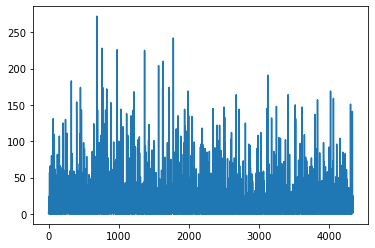

USER
32.00423056583818 15.99682620153749


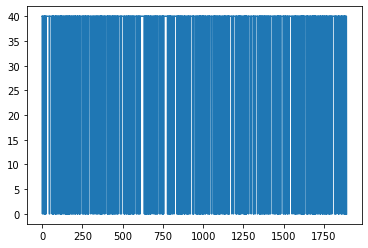

FEATURES


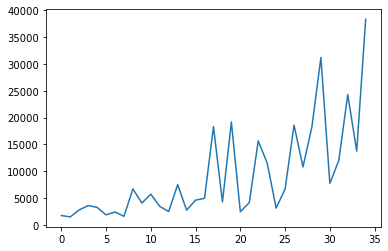

In [25]:
user_hit, item_hit, feature_hit = visualize_hit(user_interaction = train_user_interaction, review=train_review)

ITEM
1.7407322127561593 3.5094709027057616


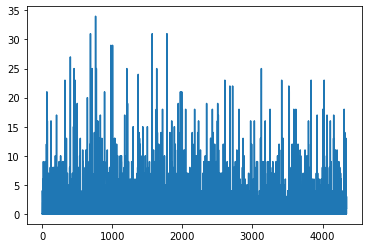

USER
3.9978847170809098 11.997179104779894


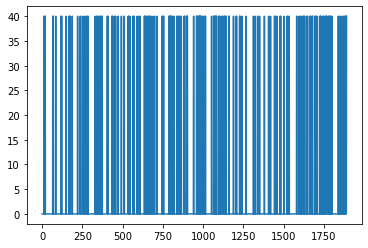

FEATURES


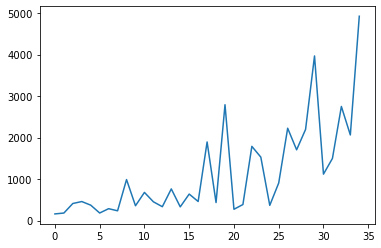

(array([ 0,  0,  0, ...,  0,  0, 40]),
 array([0, 0, 0, ..., 0, 3, 1]),
 array([ 161,  182,  412,  459,  372,  183,  287,  236,  988,  358,  679,
         453,  335,  763,  331,  639,  460, 1894,  435, 2791,  273,  387,
        1788, 1529,  367,  906, 2225, 1705, 2196, 3966, 1119, 1497, 2749,
        2063, 4922]))

In [26]:
visualize_hit(user_interaction = test_user_interaction, review=test_review)

In [27]:
def get_item_opinion():
#     op = np.zeros((num_items, num_features))
#     for rid in range(len(train_user_interaction)):
#         _, i = train_user_interaction[rid]
#         features = train_review[rid]!=1
#         op[i, features] += 1
    op = np.zeros((num_items, num_features))

    for i in item_dict:
        features = list(map(int,item_dict[i]['feature_index']))
        op[int(i),features] += 1
#     row_sums = op.sum(axis=1)
#     new_matrix = op / row_sums[:, np.newaxis]
#     new_matrix[np.isnan(new_matrix)] = 0
    return op

train_item_opinion = get_item_opinion()
train_item_opinion

array([[0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
item_opinion.max(), train_item_opinion.max()

(1.0, 1.0)

In [33]:
def loadSUV(i):
    SU = np.load('book-SU-{}.npy'.format(i))
    V = np.load('book-V-{}.npy'.format(i))
    return SU, V

def saveSUV(i):
    np.save('book-SU-{}'.format(i), SU)
    np.save('book-V-{}'.format(i), V)

In [37]:
# saveSUV(i=1)
SU, V = loadSUV(i=40)

# SU.shape

In [31]:
# from sklearn.decomposition import NMF
# model = NMF(n_components=40, init='random', random_state=0)
# SU = model.fit_transform(train_review)
# H = model.components_
# SU.shape
# SU

In [58]:
# from sklearn.decomposition import NMF
# model = NMF(n_components=40, init='random', random_state=0, max_iter = 200)
# V = model.fit_transform(item_opinion)
# H = model.components_
# V.shape
# V

array([[0.00000000e+00, 0.00000000e+00, 1.60679488e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.67330451e-01],
       [0.00000000e+00, 0.00000000e+00, 1.61593728e+00, ...,
        0.00000000e+00, 5.09957115e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.10080540e-11, 4.84620059e-11, 4.67318980e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.39359781e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.85563039e+00, 3.14471990e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### Let's calculate sr@1 first

In [38]:
### Let's calculate MR@1 first
def MRR1(SU, V, user_interaction):
    mrr = 0
    success = 0
    count = 0
    for review_id in np.random.choice(len(user_interaction), size = 5000):
        count += 1
        u, i = user_interaction[review_id]
        pred = -SU[review_id].dot(V.T)
#         sur = SU[review_id]
#         pred = np.sum(np.abs((Vr-sur))**2,axis=-1)

        recommend = np.argsort(pred)
#         print("target:", i, "recommend:", recommend)
#         time.sleep(1)
        rank = np.where(recommend == i)[0][0]
        mrr += (rank+1)
        if(rank < topK):
            success += 1

        if((count) % 1000 == 0):
            print(mrr/(count), success/(count))

    print(mrr/(count), success/(count))


In [39]:
MRR1(SU, V, train_user_interaction)

6.952 0.824
6.8405 0.8255
6.885666666666666 0.8276666666666667
7.10875 0.82325
7.068 0.8228
7.068 0.8228


# Learn SU and V simultaneously

In [41]:
V.max()

2.0410355189481177

In [42]:
def get_rating_matrix():
    r = np.zeros((num_users, num_items))
    for u, i in train_user_interaction:
        r[u, i] = 1
    return r
rating_matrix = get_rating_matrix()
rating_matrix.sum()

60520.0

In [43]:
np.max(SU), np.max(V)

(2.6412346851222788, 2.0410355189481177)

In [44]:
# sr1(SU = SU, V=V, user_interaction = train_user_interaction)
MRR1(SU = SU, V=V, user_interaction = train_user_interaction)

7.582 0.818
7.178 0.821
7.062333333333333 0.823
7.14775 0.82175
7.043 0.824
7.043 0.824


In [45]:
# Learn SU and V simultaneously
lambda_BPR = 0.1

num_SGDUpdate = len(train_user_interaction)

alpha = 0.001
beta = 0.01


ALPHA = 0.01
BETA = 0.01

assert ALPHA >= alpha

def sigmoid(x):
    return np.where(x >= 0, 
                    1 / (1 + np.exp(-x)), 
                    np.exp(x) / (1 + np.exp(x)))

def sgd_update_SUV_rating(SU, V, num_iter, num_BPRpairs):
    
    for _ in tqdm(range(num_iter)):
        for review_id in np.random.choice(len(train_user_interaction), size = num_SGDUpdate):
            u, i = train_user_interaction[review_id]
            pred = SU[review_id].dot(V[i].T)
            # Update user and item latent feature matrices
            sig = sigmoid(pred)
            e = 1-sig
        
            SU[review_id, :] +=  ALPHA *  e * V[i, :] - ALPHA * BETA * SU[review_id,:]
            V[i, :] += ALPHA * e * SU[review_id] - ALPHA * BETA * V[i,:]

#             SU[review_id, :] +=  ALPHA *  e * V[i, :] - ALPHA * BETA * SU[review_id,:]
#             V[i, :] += ALPHA * e * SU[review_id] - ALPHA * BETA * V[i,:]


            not_rated_items = np.where(rating_matrix[u, :] == 0)[0]
    
            for i in np.random.choice(not_rated_items, num_BPRpairs):
                pred = SU[review_id].dot(V[i].T)
                # Update user and item latent feature matrices
                sig = sigmoid(pred)
                e = 0-sig
                SU[review_id, :] +=  lambda_BPR*(ALPHA *  e * V[i, :] - ALPHA * BETA * SU[review_id,:])
                V[i, :] += lambda_BPR*(ALPHA * e * SU[review_id] - ALPHA * BETA * V[i,:])
    
    return SU, V

In [67]:
SU, V = sgd_update_SUV_rating(SU, V, num_iter=10, num_BPRpairs = 5)

100%|███████████████████████████████████████████| 10/10 [02:13<00:00, 13.38s/it]


In [70]:
MRR1(SU = SU, V=V, user_interaction = train_user_interaction)

468.107 0.168
465.397 0.1615
472.861 0.15933333333333333
472.52225 0.15925
477.7276 0.1596
477.7276 0.1596


In [71]:
def MRR5(model, V, user_interaction, reviews):
    mrr = 0
    count = 0
    success = 0
    for (review_id, interaction) in enumerate(user_interaction):
        count += 1
        u, i = interaction
        su = model.predict(reviews[review_id].reshape(1,-1))
        pred = -su.dot(V.T)[0]
        recommend = np.argsort(pred)
#         print("target:", i, "recommend:", recommend)
#         time.sleep(1)
        rank = np.where(recommend == i)[0][0]
    
        mrr += (rank+1)
        if(rank < topK):
            success += 1

        if((count) % 1000 == 0):
            print(mrr/(count), success/(count))

In [72]:
# SUold = copy.deepcopy(SU)

In [73]:
# SU, V = loadSUV(i  = 0)

In [766]:
# MRR5(model = dt, V = V, user_interaction=train_user_interaction, reviews=train_review)

In [76]:
# MRR5(model = dt, V = V, user_interaction=val_user_interaction, reviews=val_review)

# --------------------- Personalization -------------------------------------------

In [46]:
def sgd_update_SU(SU, V, num_iter):
    from tqdm import tqdm
    for _ in tqdm(range(num_iter)):
        for review_id in np.random.choice(len(train_user_interaction), size = num_SGDUpdate):
            u, i = train_user_interaction[review_id]
            pred = SU[review_id].dot(V[i].T)
            e = 1-sigmoid(pred) ## note review_id being used in prediction
            # Update user and item latent feature matrices
            SU[review_id, :] +=  ALPHA *  e * V[i, :] - ALPHA * BETA * SU[review_id,:]
#             V[i, :] += ALPHA * e * SU[review_id] - ALPHA * BETA * V[i,:]
    
    return  SU

In [47]:
def sgd_update_V(SU, V, num_iter, num_review):
    from tqdm import tqdm
    for _ in tqdm(range(num_iter)):
        for review_id in np.random.choice(len(train_user_interaction), size = num_review):
            u, i = train_user_interaction[review_id]
            pred = SU[review_id].dot(V[i].T)
            e = 1 - sigmoid(pred) ## note review_id being used in prediction
            # Update user and item latent feature matrices
#             SU[review_id, :] +=  ALPHA *  e * V[i, :] - ALPHA * BETA * SU[review_id,:]
            V[i, :] += ALPHA * e * SU[review_id] - ALPHA * BETA * V[i,:]
    
    return  V

In [48]:
def personalize(model, num_iter, num_review):
    SU_copy = copy.deepcopy(SU)
    
    V_predict = model.predict(item_opinion)
    V_predict= sgd_update_V(SU = SU_copy, V = V_predict, num_iter = num_iter, num_review = num_review)

#     SU_predict, V_copy = sgd_update_SUV_rating(SU = SU_predict, V = V_copy, num_iter = num_iter)
    
#     bpr_update_SUV_rating(SU = SU_predict, V = V_copy, num_BPRpairs = 10000)
    
    return SU_copy, V_predict



## Loop this 

In [246]:
Vold = copy.deepcopy(V)

In [247]:
from sklearn.ensemble import RandomForestRegressor as RF

In [248]:
dtitem = RF(max_depth = 10)

In [249]:
dtitem.fit(item_opinion, V)

RandomForestRegressor(max_depth=10)

In [250]:
_, V = personalize(dtitem, 150, len(train_user_interaction))

 19%|███████▊                                  | 28/150 [00:39<02:52,  1.42s/it]


KeyboardInterrupt: 

In [ ]:
SU, V = sgd_update_SUV_rating(SU, V, num_iter=20, num_BPRpairs = 5)

In [ ]:
((V-Vold)**2).sum()

In [ ]:
# SU = sgd_update_SU(SU = SU, V = V, num_iter = 50)

In [ ]:
depth = 5

from sklearn.tree import DecisionTreeRegressor as DT
dt = DT(max_depth = depth)
dt.fit(train_review, SU)
MRR5(model = dt, V = V, user_interaction=val_user_interaction, reviews=val_review)

# rf = RF(max_depth = depth)
# rf.fit(train_review, SU)
# MRR5(model = rf, V = V, user_interaction=test_user_interaction, reviews=test_review)

In [ ]:
MRR1(SU = SU, V=V, user_interaction = train_user_interaction)

In [ ]:

def DTCRS(model, V, user_interaction, reviews):
    tc = 0
    success = 0
    count = 0
    mrr = 0
    for (review_id, interaction) in enumerate(user_interaction):
        count += 1
        u, i = interaction
        su = model.predict(reviews[review_id].reshape(1,-1))
        pred = -su.dot(V.T)[0]
        recommend = np.argsort(pred)
    #         print("target:", i, "recommend:", recommend)
    #         time.sleep(1)
        rank = np.where(recommend == i)[0][0]

        mrr += (rank+1)

        if ( rank < (T - depth)*10): # success
            tc += depth + (rank //10)  + 1
            success += 1
        else: # failed
            tc += T

        if((count) % 1000 == 0):
            print(mrr/(count), tc/count, success/(count))

DTCRS(model = dt, V = V, user_interaction=val_user_interaction, reviews=val_review)


## end loop
# -----------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------
# Super User FacT

In [49]:
train_review.shape

(60520, 35)

In [50]:
class Node:
    def __init__(self, parent, vector, members, used_features):
        self.parent = parent
        self.vector = vector
        self.members = members        
        self.used_features = used_features
        
        self.feature = None
        self.pos_node = None
        self.neg_node = None
#         self.unknown_node = None
        
        self.error = np.inf
        

In [51]:
PARTIAL = 0.9





class Tree:
    def __init__(self, tree_type):
        assert tree_type in ["review", "item"]
        self.tree_type = tree_type
        if(self.tree_type == "review"):
            root_error, root_vector = fit(idx = np.array(range(len(train_user_interaction))), 
                                          training_type = tree_type,
                                          node_vector = np.mean(SU, axis=0), 
                                          SU = SU, V = V, num_iter=num_FIT, num_BPRpairs=0)
            self.root = Node(parent = None, vector = root_vector, members = np.random.choice(len(train_user_interaction), int(PARTIAL * len(train_user_interaction))), used_features = [])
            self.root.error = root_error

        elif(self.tree_type == "item"):
            root_error, root_vector = fit(idx = np.array(range(num_items)), 
                                          training_type = tree_type,
                                          node_vector = np.mean(V, axis=0), 
                                          SU = SU, V = V, num_iter=0, num_BPRpairs=0)
            self.root = Node(parent = None, vector = root_vector, members = np.array(range(num_items)), used_features = [])
            self.root.error = root_error
        else:
            raise ValueError("Invalid tree type")
        
#         review_tree_condition = (tree_type == "review" and len(self.root.members) == len(train_user_interaction))
#         item_tree_condition = (tree_type == "item" and len(self.root.members) == num_items)
        
#         assert review_tree_condition or item_tree_condition        

In [52]:
def squared_error_and_mse(true, pred):
    '''I am assuming true and pred both to be 1-D array'''
    assert pred.ndim == 1
    error = ((true - pred)**2).sum()
    return error, error/len(pred)

In [53]:
def sgd_update_review_vector(single_vector, V, review_indices, num_iter, num_BPRpairs):
    
    error = 0
    for _ in range(num_iter):
        for review_id in (review_indices):
            u, i = train_user_interaction[review_id]
            pred = sigmoid(single_vector.dot(V[i].T))
            e = 1 - pred ## note single vector being used in prediction
            single_vector += ALPHA *  (e * V[i, :] -  BETA * single_vector)
            
            error += np.log(e)
            
#             not_rated_items = np.where(rating_matrix[u, :] == 0)[0]
#             for i in np.random.choice(not_rated_items, num_BPRpairs):
#                 pred = SU[review_id].dot(V[i].T)
#                 # Update user and item latent feature matrices
#                 sig = sigmoid(pred)
#                 e = 0-sig
#                 single_vector += lambda_BPR * ALPHA *  (e * V[i, :] -  BETA * single_vector)
#                 error += e

                
    return single_vector, error/num_iter

In [54]:
def sgd_update_item_vector(SU, single_vector, item_indices, review_idx, num_iter, num_BPRpairs):
    
    error = 0
    for _ in range(num_iter):
        for review_id in review_idx:
            u, i = train_user_interaction[review_id]
            pred = sigmoid(SU[review_id].dot(single_vector.T))
            e = 1 - pred ## note review_id being used in prediction
            
            error += e
            # Update user and item latent feature matrices
            single_vector += ALPHA * (e * SU[review_id] - BETA * single_vector)
            
#             not_rated_items = np.where(rating_matrix[u, :] == 0)[0]
#             for i in np.random.choice(not_rated_items, num_BPRpairs):
#                 pred = SU[review_id].dot(V[i].T)
#                 # Update user and item latent feature matrices
#                 sig = sigmoid(pred)
#                 e = 0-sig
#                 single_vector += lambda_BPR*ALPHA * (e * SU[review_id] - BETA * single_vector)
#                 error += e
                
    return single_vector, error

In [55]:
def fit(idx, training_type, node_vector, SU, V, num_iter, num_BPRpairs):
    '''
    I am assuming idx is an array of indices and NOT bool indices
    if training_type == review => we are updating SU, keeping V fixed
    if training_type == item => we are updating V, keeping SU fixed
    '''
    assert training_type in ["review", "item"]
    
    if idx is None or (len(idx) == 0):
        return 0, None
    
    single_vector = copy.deepcopy(node_vector) ## we don't want to change node vector yet
    
    if training_type == "review":
        single_vector, error = sgd_update_review_vector(single_vector = single_vector, V = V, review_indices = idx, num_iter = num_iter, num_BPRpairs = num_BPRpairs)
        review_idx = idx
        
    elif training_type == "item":
        review_idx = np.array([i for i in range(len(train_user_interaction)) if train_user_interaction[i, 1] in idx ])
        single_vector, error = sgd_update_item_vector(SU = SU, single_vector = single_vector, item_indices = idx, review_idx = review_idx, num_iter = num_iter, num_BPRpairs = num_BPRpairs)
    return error, single_vector

In [56]:

# SUmean = np.zeros_like(SU)
# e, su = fit(idx = np.array(range(len(train_user_interaction))), 
#                                           training_type = "review",
#                                           node_vector = np.mean(SU, axis=0), 
#                                           SU = SU, V = V, num_iter = 5, num_BPRpairs=1)
# SUmean = SUmean + su
# SUmean, e

In [57]:
# MRR1(SU = SUmean, V=V, user_interaction = train_user_interaction)

# -----------------------------------------------------------------------------------------

In [58]:
# @nb.njit(parallel=True)
# def var_nb(a, ddof=0):
#     n = len(a)
#     s = a.sum()
#     m = s / (n - ddof)
#     v = 0
#     for i in nb.prange(n):
#         v += (a[i] - m) ** 2
#     return v / (n - ddof)

In [59]:
def get_error(idx, training_type):
    '''
    I am assuming idx is an array of indices and NOT bool indices
    if training_type == review => we are updating SU, keeping V fixed
    if training_type == item => we are updating V, keeping SU fixed
    '''
    assert training_type in ["review", "item"]
    
    if (len(idx) == 0):
        return 0
    
    
    if training_type == "review":
#         single_vector, error = sgd_update_review_vector(single_vector = single_vector, V = V, review_indices = idx, num_iter = num_iter, num_BPRpairs = num_BPRpairs)
        review_idx = idx
        
    elif training_type == "item":
        review_idx = np.array([i for i in range(len(train_user_interaction)) if train_user_interaction[i, 1] in idx ])
#         single_vector, error = sgd_update_item_vector(SU = SU, single_vector = single_vector, item_indices = idx, review_idx = review_idx, num_iter = num_iter, num_BPRpairs = num_BPRpairs)
    
    error = ((SU[review_idx, :] - SU[review_idx, :].mean(axis = 0))**2).sum()
#     error = SU[review_idx, :].var()

    return error

# -----------------------------------------------------------------------------------------

In [60]:
VERBOSE = 0.4

def find_best_split(node, training_type, flist):    
    '''
    I will assume node.members is non-empty
    if training_type == review => we are updating SU keeping V fixed
    if training_type == item => we are updating V keeping SU fixed
    '''
    if node.members is None or len(node.members) == 0:
        node = None
        return None
    members = node.members
    
    assert training_type in ["review", "item"]
    if(training_type == "review"):
        opinion_matrix = train_review
    elif(training_type == "item"):
        opinion_matrix = train_item_opinion
        
    
    
    
    best_feature = None
    lowest_avg_error = np.inf
    lowest_pos_error = np.inf
    lowest_neg_error = np.inf

    best_pos_members = None
    best_neg_members = None
    
    best_pos_single_vector = None
    best_neg_single_vector = None
    
    
    for feature in flist:
        
        if (feature in node.used_features):
            continue
            
        pos_idx = []
        neg_idx = []
        
        for r in node.members:
            val = opinion_matrix[r, feature]
            if(val > 0):
                pos_idx.append(r)
            else:
                neg_idx.append(r)

        pos_idx = np.array(pos_idx)
        neg_idx = np.array(neg_idx)
        
        assert len(pos_idx) + len(neg_idx)  == len(node.members)
        
        pos_error, pos_single_vector  = fit(idx = pos_idx, training_type = training_type, node_vector = node.vector, SU = SU, V = V, num_iter = num_iter_review, num_BPRpairs=0)
        neg_error, neg_single_vector = fit(idx = neg_idx, training_type = training_type, node_vector = node.vector, SU = SU, V = V, num_iter = num_iter_review, num_BPRpairs=0)
        
#         pos_error = get_error(idx = pos_idx, training_type = training_type)  #must use the fit method to get error
#         neg_error = get_error(idx = neg_idx, training_type = training_type)
        
        w_pos = 1 #len(pos_idx)/len(members)
        w_neg = 1 #len(neg_idx)/len(members)
        
        
        avg_error = w_pos*pos_error + w_neg*neg_error
        
        if (random.random() < VERBOSE):
            print("feature {} avg. error: {}, ratio: {}, pos:{}, neg: {}".format(feature,  avg_error, len(pos_idx)/len(members), len(pos_idx), len(neg_idx)))
        
        ## Update carefully:
        if(avg_error < lowest_avg_error):
            
            lowest_avg_error = avg_error
            best_feature = feature
            
            lowest_pos_error = pos_error
            lowest_neg_error = neg_error
            
            best_pos_members = pos_idx
            best_neg_members = neg_idx

    node.used_features.extend([best_feature])
    
    lowest_pos_error, best_pos_single_vector  = fit(idx = best_pos_members, training_type = training_type, node_vector = node.vector, SU = SU, V = V, num_iter = num_FIT, num_BPRpairs=0)
    lowest_neg_error, best_neg_single_vector = fit(idx = best_neg_members, training_type = training_type, node_vector = node.vector, SU = SU, V = V, num_iter = num_FIT, num_BPRpairs=0)
    
    
    return (lowest_avg_error, 
            lowest_pos_error,
            lowest_neg_error,
            best_feature, 
            best_pos_members,
            best_neg_members,
            best_pos_single_vector, 
            best_neg_single_vector)

In [67]:
# review_tree = Tree(tree_type = "review")
review_tree.root.vector

array([-0.48588101, -1.28193317, -0.64871442, -0.12074971,  0.08881039,
       -0.40736923, -0.25749205, -1.22261658, -0.20605816,  0.05398306,
        0.00147977,  0.08441256, -0.47608019, -0.42285971, -0.7344334 ,
       -0.32605288, -0.38453169, -0.80449622, -0.18605845, -0.38843499,
       -0.53024852,  0.14148324, -0.51104288, -0.20220431, -0.22368374,
        0.08796106, -0.18912569, -0.54639158, -0.23234396, -0.0971572 ,
       -0.07667467, -0.08157585, -0.49323369, -0.50858323, -0.13041268,
       -0.11733762, -0.08049653, -0.3775838 , -0.46601591, -0.30395739])

In [68]:
review_tree.root.feature

In [61]:
# itmset = set(train_user_interaction[review_tree.root.members,1])
# GINI = 1
# if(len(review_tree.root.members) > 0):
#     GINI -= (len(itmset)/len(review_tree.root.members))**2
#     print(GINI)

# -----------------------------------------------------------------------------------------

In [62]:
def create_tree(tree_type, node, depth, flist):
    if (depth > MAX_DEPTH):
        print("MAX DEPTH REACHED: {}".format(MAX_DEPTH))
        return
    
    if (node.feature is None):
        best = find_best_split(node = node, training_type = tree_type, flist = flist)
        
#         print(best)
        
        if best is None:
            print("best is none")
            return
        
        
        ## early stopping GINI Index
#         itmset = set(train_user_interaction[node.members,1])
#         GINI = 1
#         if(len(node.members) > 0):
#             GINI -= (len(itmset)/len(node.members))**2
#         if (GINI > 0.9967):
#             return
            
        
        
        
        (lowest_avg_error, 
            lowest_pos_error,
            lowest_neg_error,
            best_feature, 
            best_pos_members,
            best_neg_members,
            best_pos_single_vector, 
            best_neg_single_vector) = best
        node.feature = best_feature
        
        
        
        
        node.error = lowest_pos_error + lowest_neg_error #lowest_avg_error
        
        node.pos_node = Node(parent = node, vector = best_pos_single_vector, members = best_pos_members, used_features = node.used_features.copy())
        node.neg_node = Node(parent = node, vector = best_neg_single_vector, members = best_neg_members, used_features = node.used_features.copy())

    else:
        print("CONTINUING BUILDING TREE FROM WHERE WE LEFT OFF.................")
    
    
    print("depth: {}, best feature id:{}, error:{}".format(depth, node.feature, node.error))    

    print("# of pos members: ", 0 if node.pos_node.members is None else len(node.pos_node.members))
    print('# of neg members: ', 0 if node.neg_node.members is None else len(node.neg_node.members))

    create_tree(tree_type = tree_type, node = node.pos_node, depth = depth +1, flist = flist)

    create_tree(tree_type = tree_type, node = node.neg_node, depth = depth +1, flist = flist)


In [63]:
MAX_DEPTH = 7

In [69]:
create_tree(tree_type = 'review', node = review_tree.root, depth=0, flist = list(range(num_features)))


# np.save('book_review_tree-40.npy', review_tree)

feature 0 avg. error: -82710.5401882824, ratio: 0.029375045898509217, pos:1600, neg: 52868
feature 2 avg. error: -84958.12182937693, ratio: 0.04543952412425645, pos:2475, neg: 51993
feature 7 avg. error: -83839.48659372648, ratio: 0.025886759198061247, pos:1410, neg: 53058
feature 8 avg. error: -93000.36979316427, ratio: 0.11061540721157377, pos:6025, neg: 48443
feature 10 avg. error: -99221.08417756425, ratio: 0.09627671293236395, pos:5244, neg: 49224
feature 14 avg. error: -85309.06281950357, ratio: 0.04527428949107733, pos:2466, neg: 52002
feature 15 avg. error: -87294.88563294242, ratio: 0.0771094954835867, pos:4200, neg: 50268
feature 18 avg. error: -88579.53389262957, ratio: 0.07048175075273555, pos:3839, neg: 50629
feature 21 avg. error: -88554.01841842014, ratio: 0.06868252919145186, pos:3741, neg: 50727
feature 23 avg. error: -113195.77606582493, ratio: 0.18899170154953368, pos:10294, neg: 44174
feature 28 avg. error: -144735.97960527785, ratio: 0.3034993023426599, pos:16531, 

feature 10 avg. error: -951.2255629209835, ratio: 0.0, pos:0, neg: 218
feature 14 avg. error: -951.260346260264, ratio: 0.027522935779816515, pos:6, neg: 212
feature 16 avg. error: -951.2945209285456, ratio: 0.05504587155963303, pos:12, neg: 206
feature 18 avg. error: -951.1894988794824, ratio: 0.05963302752293578, pos:13, neg: 205
feature 19 avg. error: -951.2108880123948, ratio: 0.045871559633027525, pos:10, neg: 208
feature 21 avg. error: -951.1804602883275, ratio: 0.04128440366972477, pos:9, neg: 209
feature 24 avg. error: -951.2255629209835, ratio: 0.0, pos:0, neg: 218
depth: 6, best feature id:31, error:-952.9032260682407
# of pos members:  39
# of neg members:  179
feature 4 avg. error: -173.0261601747493, ratio: 0.0, pos:0, neg: 39
feature 5 avg. error: -173.0261601747493, ratio: 0.0, pos:0, neg: 39
feature 8 avg. error: -173.0261601747493, ratio: 0.0, pos:0, neg: 39
feature 9 avg. error: -173.0261601747493, ratio: 0.0, pos:0, neg: 39
feature 10 avg. error: -173.0261601747493, 

feature 17 avg. error: -1427.5395421680776, ratio: 0.08950617283950617, pos:29, neg: 295
feature 20 avg. error: -1427.7390276181075, ratio: 0.009259259259259259, pos:3, neg: 321
feature 21 avg. error: -1427.377580996308, ratio: 0.027777777777777776, pos:9, neg: 315
feature 23 avg. error: -1427.4714230787329, ratio: 0.17901234567901234, pos:58, neg: 266
feature 24 avg. error: -1427.7996470693824, ratio: 0.024691358024691357, pos:8, neg: 316
feature 26 avg. error: -1427.9891343299796, ratio: 0.08024691358024691, pos:26, neg: 298
feature 27 avg. error: -1428.0583265776424, ratio: 0.08333333333333333, pos:27, neg: 297
feature 30 avg. error: -1427.844231437652, ratio: 0.043209876543209874, pos:14, neg: 310
feature 31 avg. error: -1427.6866210489495, ratio: 0.16049382716049382, pos:52, neg: 272
depth: 7, best feature id:27, error:-1431.1700331429756
# of pos members:  27
# of neg members:  297
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -9002.61909548268, ratio: 0.0221439

feature 29 avg. error: -1713.5300840711611, ratio: 0.15303430079155672, pos:58, neg: 321
feature 31 avg. error: -1713.8003286910048, ratio: 0.018469656992084433, pos:7, neg: 372
depth: 7, best feature id:11, error:-1715.7546445892428
# of pos members:  21
# of neg members:  358
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -6958.945660825184, ratio: 0.04037061548643282, pos:61, neg: 1450
feature 6 avg. error: -6963.7014936748765, ratio: 0.1158173395102581, pos:175, neg: 1336
feature 7 avg. error: -6961.876931194976, ratio: 0.013236267372600927, pos:20, neg: 1491
feature 8 avg. error: -6967.049462231917, ratio: 0.16412971542025148, pos:248, neg: 1263
feature 11 avg. error: -6963.437512795444, ratio: 0.05029781601588352, pos:76, neg: 1435
feature 12 avg. error: -6967.598334528919, ratio: 0.07279947054930509, pos:110, neg: 1401
feature 15 avg. error: -6959.037606292342, ratio: 0.08471211118464593, pos:128, neg: 1383
feature 16 avg. error: -6958.361994435698, ratio: 0.054

feature 14 avg. error: -25903.39812791224, ratio: 0.027375952714263494, pos:176, neg: 6253
feature 19 avg. error: -26113.54360847306, ratio: 0.17078861409239385, pos:1098, neg: 5331
feature 20 avg. error: -26035.217410926052, ratio: 0.06890651734328823, pos:443, neg: 5986
feature 21 avg. error: -25986.11945275274, ratio: 0.05661844765904495, pos:364, neg: 6065
feature 30 avg. error: -25890.928432477052, ratio: 0.058018354331933426, pos:373, neg: 6056
feature 31 avg. error: -26021.925166466193, ratio: 0.18105459636024265, pos:1164, neg: 5265
feature 33 avg. error: -25953.514552001147, ratio: 0.16674443925960492, pos:1072, neg: 5357
depth: 3, best feature id:34, error:-26844.24391749174
# of pos members:  2528
# of neg members:  3901
feature 0 avg. error: -9968.029664207528, ratio: 0.028085443037974684, pos:71, neg: 2457
feature 2 avg. error: -9969.979838395413, ratio: 0.02966772151898734, pos:75, neg: 2453
feature 4 avg. error: -9972.837674678703, ratio: 0.03401898734177215, pos:86, neg

feature 20 avg. error: -1876.85083598679, ratio: 0.02517162471395881, pos:11, neg: 426
feature 25 avg. error: -1875.8500784033217, ratio: 0.018306636155606407, pos:8, neg: 429
feature 26 avg. error: -1875.830241254554, ratio: 0.14187643020594964, pos:62, neg: 375
feature 27 avg. error: -1876.0283313892269, ratio: 0.06407322654462243, pos:28, neg: 409
depth: 7, best feature id:17, error:-1891.6258794894338
# of pos members:  133
# of neg members:  304
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -6280.6466424552, ratio: 0.0395778364116095, pos:60, neg: 1456
feature 2 avg. error: -6277.586699164843, ratio: 0.02704485488126649, pos:41, neg: 1475
feature 8 avg. error: -6281.075768796365, ratio: 0.08575197889182058, pos:130, neg: 1386
feature 9 avg. error: -6277.338255076466, ratio: 0.018469656992084433, pos:28, neg: 1488
feature 11 avg. error: -6277.945532013596, ratio: 0.026385224274406333, pos:40, neg: 1476
feature 14 avg. error: -6275.499919153659, ratio: 0.0098944591

feature 12 avg. error: -16901.79853881546, ratio: 0.020763906690592155, pos:81, neg: 3820
feature 15 avg. error: -16920.152612477934, ratio: 0.14175852345552423, pos:553, neg: 3348
feature 18 avg. error: -16908.68711235546, ratio: 0.10253781081773904, pos:400, neg: 3501
feature 20 avg. error: -16970.210247432336, ratio: 0.10484491156113818, pos:409, neg: 3492
feature 30 avg. error: -16877.295253946955, ratio: 0.06434247628813125, pos:251, neg: 3650
feature 31 avg. error: -16935.981491842, ratio: 0.1794411689310433, pos:700, neg: 3201
feature 32 avg. error: -16901.79460102549, ratio: 0.10997180210202512, pos:429, neg: 3472
depth: 4, best feature id:10, error:-17311.43680860882
# of pos members:  1169
# of neg members:  2732
feature 11 avg. error: -5193.383911039398, ratio: 0.017964071856287425, pos:21, neg: 1148
feature 14 avg. error: -5195.209070104938, ratio: 0.018819503849443968, pos:22, neg: 1147
feature 17 avg. error: -5198.528631837944, ratio: 0.06073567151411463, pos:71, neg: 109

feature 1 avg. error: -12158.334043433388, ratio: 0.0479502196193265, pos:131, neg: 2601
feature 3 avg. error: -12169.584761983388, ratio: 0.16910688140556368, pos:462, neg: 2270
feature 5 avg. error: -12154.144475979052, ratio: 0.03477306002928258, pos:95, neg: 2637
feature 9 avg. error: -12152.21674133817, ratio: 0.049414348462664716, pos:135, neg: 2597
feature 11 avg. error: -12140.886946523555, ratio: 0.040995607613469986, pos:112, neg: 2620
feature 25 avg. error: -12129.568877163962, ratio: 0.0808931185944363, pos:221, neg: 2511
feature 26 avg. error: -12153.23342396651, ratio: 0.05929721815519766, pos:162, neg: 2570
depth: 5, best feature id:20, error:-12200.97188789017
# of pos members:  402
# of neg members:  2330
feature 0 avg. error: -1972.8836565098343, ratio: 0.0024875621890547263, pos:1, neg: 401
feature 1 avg. error: -1972.9264430980688, ratio: 0.07213930348258707, pos:29, neg: 373
feature 2 avg. error: -1972.7868875421902, ratio: 0.024875621890547265, pos:10, neg: 392
fe

feature 19 avg. error: -25756.000570855147, ratio: 0.2822481151473612, pos:2059, neg: 5236
feature 20 avg. error: -24596.40333602667, ratio: 0.04578478409869774, pos:334, neg: 6961
feature 27 avg. error: -24824.638278020422, ratio: 0.13516106922549692, pos:986, neg: 6309
feature 29 avg. error: -26021.846155001072, ratio: 0.45661411925976697, pos:3331, neg: 3964
feature 32 avg. error: -25794.261510614226, ratio: 0.3443454420836189, pos:2512, neg: 4783
depth: 2, best feature id:29, error:-26196.04364607622
# of pos members:  3331
# of neg members:  3964
feature 1 avg. error: -11491.666669227496, ratio: 0.012308616031221855, pos:41, neg: 3290
feature 2 avg. error: -11490.235897122782, ratio: 0.01981386970879616, pos:66, neg: 3265
feature 4 avg. error: -11495.369202629552, ratio: 0.023716601621134793, pos:79, neg: 3252
feature 5 avg. error: -11494.19247651343, ratio: 0.012308616031221855, pos:41, neg: 3290
feature 9 avg. error: -11494.600526606766, ratio: 0.035725007505253675, pos:119, neg

depth: 7, best feature id:34, error:-857.0513371143261
# of pos members:  149
# of neg members:  66
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -2924.1549610627967, ratio: 0.017218543046357615, pos:13, neg: 742
feature 2 avg. error: -2923.848245779874, ratio: 0.022516556291390728, pos:17, neg: 738
feature 5 avg. error: -2924.651215670348, ratio: 0.006622516556291391, pos:5, neg: 750
feature 8 avg. error: -2930.7513119550667, ratio: 0.12450331125827814, pos:94, neg: 661
feature 10 avg. error: -2925.5212672206612, ratio: 0.046357615894039736, pos:35, neg: 720
feature 11 avg. error: -2924.418569152667, ratio: 0.013245033112582781, pos:10, neg: 745
feature 12 avg. error: -2924.7047869015423, ratio: 0.02119205298013245, pos:16, neg: 739
feature 21 avg. error: -2923.925042432804, ratio: 0.033112582781456956, pos:25, neg: 730
feature 27 avg. error: -2925.3712836057043, ratio: 0.039735099337748346, pos:30, neg: 725
depth: 5, best feature id:17, error:-3007.6685169360153
# o

feature 17 avg. error: -8158.040347861866, ratio: 0.35002318034306906, pos:755, neg: 1402
feature 21 avg. error: -8029.9609623896695, ratio: 0.045433472415391744, pos:98, neg: 2059
feature 23 avg. error: -8074.574831275479, ratio: 0.18776077885952713, pos:405, neg: 1752
feature 25 avg. error: -8037.910443115114, ratio: 0.05099675475197033, pos:110, neg: 2047
feature 27 avg. error: -8068.28343520718, ratio: 0.13166434863235976, pos:284, neg: 1873
depth: 4, best feature id:34, error:-8528.520629099163
# of pos members:  1276
# of neg members:  881
feature 1 avg. error: -4857.060189671002, ratio: 0.008620689655172414, pos:11, neg: 1265
feature 3 avg. error: -4856.052616797878, ratio: 0.0109717868338558, pos:14, neg: 1262
feature 6 avg. error: -4858.715161345232, ratio: 0.0219435736677116, pos:28, neg: 1248
feature 7 avg. error: -4856.246942993135, ratio: 0.004702194357366771, pos:6, neg: 1270
feature 8 avg. error: -4864.915300350201, ratio: 0.0438871473354232, pos:56, neg: 1220
feature 10

feature 7 avg. error: -2664.5262750253587, ratio: 0.0031201248049922, pos:2, neg: 639
feature 10 avg. error: -2663.83340083774, ratio: 0.06708268330733229, pos:43, neg: 598
feature 12 avg. error: -2664.1761479452043, ratio: 0.0374414976599064, pos:24, neg: 617
feature 13 avg. error: -2666.073309028366, ratio: 0.11856474258970359, pos:76, neg: 565
feature 15 avg. error: -2663.5982400942507, ratio: 0.0202808112324493, pos:13, neg: 628
feature 16 avg. error: -2666.197049940283, ratio: 0.0483619344773791, pos:31, neg: 610
feature 17 avg. error: -2668.0806243315546, ratio: 0.5709828393135725, pos:366, neg: 275
feature 18 avg. error: -2663.53882264289, ratio: 0.046801872074883, pos:30, neg: 611
feature 20 avg. error: -2664.83041304899, ratio: 0.0109204368174727, pos:7, neg: 634
feature 24 avg. error: -2664.872042085567, ratio: 0.0374414976599064, pos:24, neg: 617
feature 33 avg. error: -2667.1859900356676, ratio: 0.1684867394695788, pos:108, neg: 533
depth: 7, best feature id:26, error:-2698

depth: 7, best feature id:23, error:-1283.0574755115051
# of pos members:  104
# of neg members:  194
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -14684.345006458832, ratio: 0.022704339051463168, pos:90, neg: 3874
feature 3 avg. error: -14685.439051471345, ratio: 0.06987891019172553, pos:277, neg: 3687
feature 11 avg. error: -14653.838826168116, ratio: 0.08425832492431887, pos:334, neg: 3630
feature 13 avg. error: -14964.62162822286, ratio: 0.30171543895055497, pos:1196, neg: 2768
feature 14 avg. error: -14648.471006333903, ratio: 0.04717457114026236, pos:187, neg: 3777
feature 15 avg. error: -14638.52447403402, ratio: 0.06256306760847628, pos:248, neg: 3716
feature 16 avg. error: -14714.879811092213, ratio: 0.042885973763874874, pos:170, neg: 3794
feature 21 avg. error: -14705.230812504671, ratio: 0.04414732593340061, pos:175, neg: 3789
feature 23 avg. error: -14866.960592214238, ratio: 0.26286579212916245, pos:1042, neg: 2922
feature 24 avg. error: -14663.52107774

depth: 7, best feature id:10, error:-16.019228269768195
# of pos members:  2
# of neg members:  2
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -310.70320313814125, ratio: 0.0, pos:0, neg: 79
feature 1 avg. error: -310.69989571551304, ratio: 0.012658227848101266, pos:1, neg: 78
feature 2 avg. error: -310.6987011672285, ratio: 0.02531645569620253, pos:2, neg: 77
feature 3 avg. error: -310.7180744356735, ratio: 0.012658227848101266, pos:1, neg: 78
feature 4 avg. error: -310.7162255709708, ratio: 0.12658227848101267, pos:10, neg: 69
feature 10 avg. error: -310.70320313814125, ratio: 0.0, pos:0, neg: 79
feature 11 avg. error: -310.70320313814125, ratio: 0.0, pos:0, neg: 79
feature 14 avg. error: -310.70320313814125, ratio: 0.0, pos:0, neg: 79
feature 16 avg. error: -310.72636095691996, ratio: 0.08860759493670886, pos:7, neg: 72
feature 26 avg. error: -310.7221065846296, ratio: 0.46835443037974683, pos:37, neg: 42
feature 30 avg. error: -310.70320313814125, ratio: 0.0, pos

feature 34 avg. error: -2462.2639607795086, ratio: 0.742671009771987, pos:456, neg: 158
depth: 7, best feature id:19, error:-2502.9697606175455
# of pos members:  91
# of neg members:  523
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 4 avg. error: -10332.47611093132, ratio: 0.06664127951256664, pos:175, neg: 2451
feature 6 avg. error: -10321.690409582323, ratio: 0.07920792079207921, pos:208, neg: 2418
feature 8 avg. error: -10339.326798217338, ratio: 0.12223914699162224, pos:321, neg: 2305
feature 10 avg. error: -10383.759806407696, ratio: 0.2837014470677837, pos:745, neg: 1881
feature 13 avg. error: -10468.389099170381, ratio: 0.3233054074638233, pos:849, neg: 1777
feature 15 avg. error: -10311.960537756466, ratio: 0.07958872810357959, pos:209, neg: 2417
feature 17 avg. error: -10381.51674501497, ratio: 0.08415841584158416, pos:221, neg: 2405
feature 18 avg. error: -10315.294970915676, ratio: 0.05826351865955826, pos:153, neg: 2473
feature 21 avg. error: -10321.44461459872, ratio

feature 21 avg. error: -2604.282628201861, ratio: 0.0264797507788162, pos:17, neg: 625
feature 24 avg. error: -2604.3805477677365, ratio: 0.037383177570093455, pos:24, neg: 618
feature 25 avg. error: -2605.9169290057434, ratio: 0.08255451713395638, pos:53, neg: 589
feature 26 avg. error: -2609.159837254175, ratio: 0.2118380062305296, pos:136, neg: 506
feature 27 avg. error: -2611.895967394774, ratio: 0.3598130841121495, pos:231, neg: 411
feature 30 avg. error: -2607.4221936826093, ratio: 0.2523364485981308, pos:162, neg: 480
depth: 7, best feature id:19, error:-2695.8024395254424
# of pos members:  154
# of neg members:  488
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -5790.3928826290785, ratio: 0.04218181818181818, pos:58, neg: 1317
feature 5 avg. error: -5796.0588191702755, ratio: 0.04072727272727273, pos:56, neg: 1319
feature 8 avg. error: -5797.176364722943, ratio: 0.18836363636363637, pos:259, neg: 1116
feature 9 avg. error: -5792.702410795122, ratio: 0.0690909

depth: 7, best feature id:19, error:-2886.2149810222027
# of pos members:  153
# of neg members:  484
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -92642.5707318034, ratio: 0.031657748372301446, pos:1201, neg: 36736
feature 4 avg. error: -94201.03404749159, ratio: 0.05859714790310251, pos:2223, neg: 35714
feature 6 avg. error: -93337.33237292667, ratio: 0.032712128001687005, pos:1241, neg: 36696
feature 10 avg. error: -96273.73592300243, ratio: 0.05150644489548462, pos:1954, neg: 35983
feature 14 avg. error: -93595.27649518254, ratio: 0.05153280438621926, pos:1955, neg: 35982
feature 15 avg. error: -94469.24650304813, ratio: 0.07301578933495005, pos:2770, neg: 35167
feature 18 avg. error: -94996.21909641514, ratio: 0.0742019664180088, pos:2815, neg: 35122
feature 25 avg. error: -100731.6370602607, ratio: 0.12900334765532329, pos:4894, neg: 33043
feature 30 avg. error: -99734.06912281785, ratio: 0.14906292010438357, pos:5655, neg: 32282
feature 31 avg. error: -98103.0

depth: 6, best feature id:26, error:-1774.2601605103055
# of pos members:  214
# of neg members:  181
feature 1 avg. error: -975.1101473811535, ratio: 0.0, pos:0, neg: 214
feature 2 avg. error: -975.1101473811535, ratio: 0.0, pos:0, neg: 214
feature 8 avg. error: -975.1101473811535, ratio: 0.0, pos:0, neg: 214
feature 9 avg. error: -975.1101473811535, ratio: 0.0, pos:0, neg: 214
feature 10 avg. error: -975.1101473811535, ratio: 0.0, pos:0, neg: 214
feature 11 avg. error: -975.1101473811535, ratio: 0.0, pos:0, neg: 214
feature 13 avg. error: -975.1101473811535, ratio: 0.0, pos:0, neg: 214
feature 22 avg. error: -975.1101473811535, ratio: 0.0, pos:0, neg: 214
feature 29 avg. error: -975.1176169378836, ratio: 0.7616822429906542, pos:163, neg: 51
feature 34 avg. error: -975.1478506699772, ratio: 0.8364485981308412, pos:179, neg: 35
depth: 7, best feature id:34, error:-974.5963423900889
# of pos members:  179
# of neg members:  35
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. err

feature 2 avg. error: -17109.600642878144, ratio: 0.01521933751119069, pos:68, neg: 4400
feature 7 avg. error: -17098.55140110969, ratio: 0.011414503133393017, pos:51, neg: 4417
feature 11 avg. error: -17077.892884330013, ratio: 0.028871978513876455, pos:129, neg: 4339
feature 12 avg. error: -17101.696692051995, ratio: 0.038272157564906, pos:171, neg: 4297
feature 15 avg. error: -17090.22124752013, ratio: 0.017905102954341987, pos:80, neg: 4388
feature 18 avg. error: -17108.659180060393, ratio: 0.056177260519247985, pos:251, neg: 4217
feature 20 avg. error: -17106.020563844973, ratio: 0.01611459265890779, pos:72, neg: 4396
feature 22 avg. error: -17179.489283713654, ratio: 0.055729632945389435, pos:249, neg: 4219
feature 23 avg. error: -17235.57868773542, ratio: 0.1360787824529991, pos:608, neg: 3860
feature 24 avg. error: -17100.87320582909, ratio: 0.06132497761862131, pos:274, neg: 4194
feature 29 avg. error: -17267.604831861197, ratio: 0.799686660698299, pos:3573, neg: 895
feature 3

feature 14 avg. error: -3668.211377897864, ratio: 0.015384615384615385, pos:14, neg: 896
feature 15 avg. error: -3668.1992858076337, ratio: 0.025274725274725275, pos:23, neg: 887
feature 18 avg. error: -3667.9804056507824, ratio: 0.031868131868131866, pos:29, neg: 881
feature 22 avg. error: -3669.572480783891, ratio: 0.03626373626373627, pos:33, neg: 877
feature 25 avg. error: -3671.5397095263393, ratio: 0.08351648351648351, pos:76, neg: 834
depth: 7, best feature id:33, error:-3719.8931532293427
# of pos members:  233
# of neg members:  677
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 2 avg. error: -4075.389586201794, ratio: 0.012633624878522837, pos:13, neg: 1016
feature 3 avg. error: -4076.328813209485, ratio: 0.034013605442176874, pos:35, neg: 994
feature 5 avg. error: -4074.946840410188, ratio: 0.029154518950437316, pos:30, neg: 999
feature 7 avg. error: -4073.752581648678, ratio: 0.009718172983479106, pos:10, neg: 1019
feature 9 avg. error: -4075.1856766891497, ratio: 0.0417

feature 20 avg. error: -1780.553548421062, ratio: 0.028513238289205704, pos:14, neg: 477
feature 24 avg. error: -1780.4254387579497, ratio: 0.06924643584521385, pos:34, neg: 457
feature 30 avg. error: -1781.206910089531, ratio: 0.07331975560081466, pos:36, neg: 455
feature 31 avg. error: -1781.6818358801122, ratio: 0.20162932790224034, pos:99, neg: 392
feature 34 avg. error: -1783.3526539640493, ratio: 0.8065173116089613, pos:396, neg: 95
depth: 7, best feature id:25, error:-1817.1494364355135
# of pos members:  68
# of neg members:  423
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 4 avg. error: -29565.507768737432, ratio: 0.028268991282689913, pos:227, neg: 7803
feature 10 avg. error: -29711.369086679395, ratio: 0.05056039850560398, pos:406, neg: 7624
feature 11 avg. error: -29528.168902029927, ratio: 0.02054794520547945, pos:165, neg: 7865
feature 16 avg. error: -29537.25492512343, ratio: 0.05902864259028642, pos:474, neg: 7556
feature 17 avg. error: -30348.749762229323, ratio: 

depth: 6, best feature id:30, error:-3276.1739209467232
# of pos members:  191
# of neg members:  560
feature 3 avg. error: -848.5335821290798, ratio: 0.0, pos:0, neg: 191
feature 5 avg. error: -848.5335821290798, ratio: 0.0, pos:0, neg: 191
feature 16 avg. error: -848.4377247470501, ratio: 0.03664921465968586, pos:7, neg: 184
feature 18 avg. error: -848.5335821290798, ratio: 0.0, pos:0, neg: 191
feature 29 avg. error: -848.4569471042307, ratio: 0.6701570680628273, pos:128, neg: 63
feature 31 avg. error: -848.8270518063033, ratio: 0.2356020942408377, pos:45, neg: 146
depth: 7, best feature id:31, error:-853.4238154969137
# of pos members:  45
# of neg members:  146
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -2438.1358665933453, ratio: 0.0, pos:0, neg: 560
feature 2 avg. error: -2438.113151915534, ratio: 0.0035714285714285713, pos:2, neg: 558
feature 6 avg. error: -2438.274422501298, ratio: 0.007142857142857143, pos:4, neg: 556
feature 8 avg. error: -2437.9119488371

feature 20 avg. error: -3265.0651442560907, ratio: 0.029832935560859187, pos:25, neg: 813
feature 25 avg. error: -3267.9047320776526, ratio: 0.050119331742243436, pos:42, neg: 796
feature 33 avg. error: -3272.4020107832066, ratio: 0.3042959427207637, pos:255, neg: 583
depth: 7, best feature id:33, error:-3314.5604227319564
# of pos members:  255
# of neg members:  583
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 7 avg. error: -3499.6014632128067, ratio: 0.0974304068522484, pos:91, neg: 843
feature 9 avg. error: -3495.9232640114005, ratio: 0.021413276231263382, pos:20, neg: 914
feature 14 avg. error: -3496.2243904435436, ratio: 0.032119914346895075, pos:30, neg: 904
feature 15 avg. error: -3500.9679340046414, ratio: 0.07601713062098502, pos:71, neg: 863
feature 22 avg. error: -3509.128858132322, ratio: 0.14025695931477516, pos:131, neg: 803
feature 30 avg. error: -3510.404941123922, ratio: 0.21734475374732334, pos:203, neg: 731
feature 31 avg. error: -3505.686764838908, ratio: 0.21

feature 9 avg. error: -5865.289456405175, ratio: 0.07979626485568761, pos:94, neg: 1084
feature 10 avg. error: -5861.430637741337, ratio: 0.1230899830220713, pos:145, neg: 1033
feature 13 avg. error: -5866.845548587127, ratio: 0.08743633276740238, pos:103, neg: 1075
feature 14 avg. error: -5865.989875983214, ratio: 0.04753820033955857, pos:56, neg: 1122
feature 16 avg. error: -5858.158198249294, ratio: 0.04584040747028863, pos:54, neg: 1124
feature 17 avg. error: -5862.27498745616, ratio: 0.09762308998302208, pos:115, neg: 1063
feature 18 avg. error: -5866.192533715192, ratio: 0.06536502546689305, pos:77, neg: 1101
feature 20 avg. error: -5866.105409597199, ratio: 0.05602716468590832, pos:66, neg: 1112
feature 24 avg. error: -5867.431334273196, ratio: 0.08488964346349745, pos:100, neg: 1078
feature 25 avg. error: -5864.815329527286, ratio: 0.06960950764006792, pos:82, neg: 1096
feature 30 avg. error: -5861.823116868024, ratio: 0.12478777589134125, pos:147, neg: 1031
feature 31 avg. err

depth: 7, best feature id:33, error:-50.12250761833694
# of pos members:  1
# of neg members:  10
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -1032.550132335946, ratio: 0.0, pos:0, neg: 234
feature 6 avg. error: -1032.550132335946, ratio: 0.0, pos:0, neg: 234
feature 7 avg. error: -1032.550132335946, ratio: 0.0, pos:0, neg: 234
feature 8 avg. error: -1032.5615863029866, ratio: 0.004273504273504274, pos:1, neg: 233
feature 11 avg. error: -1032.6736081590182, ratio: 0.038461538461538464, pos:9, neg: 225
feature 12 avg. error: -1032.550132335946, ratio: 0.0, pos:0, neg: 234
feature 16 avg. error: -1032.550132335946, ratio: 0.0, pos:0, neg: 234
feature 17 avg. error: -1032.53248782273, ratio: 0.20512820512820512, pos:48, neg: 186
feature 20 avg. error: -1032.550132335946, ratio: 0.0, pos:0, neg: 234
feature 22 avg. error: -1032.489667717279, ratio: 0.004273504273504274, pos:1, neg: 233
feature 24 avg. error: -1032.550132335946, ratio: 0.0, pos:0, neg: 234
feature 26 avg

feature 16 avg. error: -3597.879751565179, ratio: 0.1835075493612079, pos:158, neg: 703
feature 18 avg. error: -3596.763928711, ratio: 0.14169570267131243, pos:122, neg: 739
feature 21 avg. error: -3593.0937568557106, ratio: 0.11382113821138211, pos:98, neg: 763
feature 24 avg. error: -3594.1598209448202, ratio: 0.04065040650406504, pos:35, neg: 826
feature 26 avg. error: -3595.8075192571514, ratio: 0.3797909407665505, pos:327, neg: 534
feature 33 avg. error: -3594.1716728184774, ratio: 0.056910569105691054, pos:49, neg: 812
depth: 7, best feature id:25, error:-3649.353465401209
# of pos members:  157
# of neg members:  704
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -17331.453656931273, ratio: 0.033535165346995806, pos:144, neg: 4150
feature 1 avg. error: -17335.441188015844, ratio: 0.01606893339543549, pos:69, neg: 4225
feature 3 avg. error: -17327.850758740515, ratio: 0.024918490917559384, pos:107, neg: 4187
feature 7 avg. error: -17319.854851417458, ratio: 0.004

feature 8 avg. error: -4082.3058769636796, ratio: 0.021174205967276226, pos:22, neg: 1017
feature 9 avg. error: -4087.0566014585524, ratio: 0.09432146294513956, pos:98, neg: 941
feature 10 avg. error: -4082.4176267462863, ratio: 0.019249278152069296, pos:20, neg: 1019
feature 12 avg. error: -4082.1257691689066, ratio: 0.05774783445620789, pos:60, neg: 979
feature 16 avg. error: -4086.7427090539336, ratio: 0.12993262752646775, pos:135, neg: 904
feature 18 avg. error: -4086.8227051244894, ratio: 0.12704523580365737, pos:132, neg: 907
feature 23 avg. error: -4094.892919072443, ratio: 0.2088546679499519, pos:217, neg: 822
feature 25 avg. error: -4087.3291569330577, ratio: 0.09239653512993262, pos:96, neg: 943
feature 31 avg. error: -4092.5272671866182, ratio: 0.2271414821944177, pos:236, neg: 803
feature 34 avg. error: -4085.995692579996, ratio: 0.848893166506256, pos:882, neg: 157
depth: 6, best feature id:23, error:-4162.940709619993
# of pos members:  217
# of neg members:  822
feature 

depth: 6, best feature id:25, error:-12629.396504852979
# of pos members:  829
# of neg members:  2223
feature 0 avg. error: -3887.960155330351, ratio: 0.08926417370325694, pos:74, neg: 755
feature 1 avg. error: -3884.944816803717, ratio: 0.06393244873341375, pos:53, neg: 776
feature 5 avg. error: -3886.113040016564, ratio: 0.0856453558504222, pos:71, neg: 758
feature 7 avg. error: -3883.6418760748534, ratio: 0.0856453558504222, pos:71, neg: 758
feature 8 avg. error: -3883.123598053708, ratio: 0.08926417370325694, pos:74, neg: 755
feature 9 avg. error: -3888.2173973521744, ratio: 0.2135102533172497, pos:177, neg: 652
feature 11 avg. error: -3885.1634959374715, ratio: 0.04463208685162847, pos:37, neg: 792
feature 15 avg. error: -3885.62687528425, ratio: 0.12907117008443908, pos:107, neg: 722
feature 18 avg. error: -3882.883093107871, ratio: 0.09408926417370325, pos:78, neg: 751
feature 20 avg. error: -3884.996409833034, ratio: 0.010856453558504222, pos:9, neg: 820
feature 21 avg. error:

feature 6 avg. error: -1863.740557941139, ratio: 0.03355704697986577, pos:15, neg: 432
feature 8 avg. error: -1863.5982798881328, ratio: 0.0044742729306487695, pos:2, neg: 445
feature 15 avg. error: -1863.4642535860403, ratio: 0.05592841163310962, pos:25, neg: 422
feature 20 avg. error: -1864.1675401109983, ratio: 0.013422818791946308, pos:6, neg: 441
feature 22 avg. error: -1864.349905787324, ratio: 0.12751677852348994, pos:57, neg: 390
feature 24 avg. error: -1864.1608097206265, ratio: 0.0738255033557047, pos:33, neg: 414
feature 25 avg. error: -1865.7912934549433, ratio: 0.18568232662192394, pos:83, neg: 364
feature 26 avg. error: -1864.5889409538465, ratio: 0.4563758389261745, pos:204, neg: 243
feature 27 avg. error: -1862.64751073761, ratio: 0.05592841163310962, pos:25, neg: 422
feature 30 avg. error: -1863.1995101798643, ratio: 0.029082774049217, pos:13, neg: 434
depth: 7, best feature id:25, error:-1881.6097834421655
# of pos members:  83
# of neg members:  364
MAX DEPTH REACHED

depth: 7, best feature id:26, error:-2390.7831672206657
# of pos members:  258
# of neg members:  308
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 2 avg. error: -3861.4158515934973, ratio: 0.06076854334226988, pos:68, neg: 1051
feature 11 avg. error: -3861.9971273959973, ratio: 0.06881143878462913, pos:77, neg: 1042
feature 13 avg. error: -3881.9417160230932, ratio: 0.0902591599642538, pos:101, neg: 1018
feature 14 avg. error: -3866.601417808743, ratio: 0.0420017873100983, pos:47, neg: 1072
feature 21 avg. error: -3867.1640471688434, ratio: 0.10902591599642537, pos:122, neg: 997
feature 22 avg. error: -3889.1133444703282, ratio: 0.20911528150134048, pos:234, neg: 885
feature 26 avg. error: -3885.174510363279, ratio: 0.4745308310991957, pos:531, neg: 588
feature 31 avg. error: -3882.8909785402725, ratio: 0.2386058981233244, pos:267, neg: 852
depth: 7, best feature id:23, error:-4043.0472609715093
# of pos members:  244
# of neg members:  875
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 

# of pos members:  10
# of neg members:  55
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -478.9714884771754, ratio: 0.1, pos:11, neg: 99
feature 2 avg. error: -479.00821106878135, ratio: 0.10909090909090909, pos:12, neg: 98
feature 3 avg. error: -478.9004445588251, ratio: 0.045454545454545456, pos:5, neg: 105
feature 4 avg. error: -478.91768938973235, ratio: 0.18181818181818182, pos:20, neg: 90
feature 5 avg. error: -478.93056702513064, ratio: 0.045454545454545456, pos:5, neg: 105
feature 7 avg. error: -478.9438722108664, ratio: 0.00909090909090909, pos:1, neg: 109
feature 9 avg. error: -478.9595240253766, ratio: 0.08181818181818182, pos:9, neg: 101
feature 10 avg. error: -478.81566575637515, ratio: 0.05454545454545454, pos:6, neg: 104
feature 12 avg. error: -478.8989918878884, ratio: 0.06363636363636363, pos:7, neg: 103
feature 16 avg. error: -478.9826562511659, ratio: 0.05454545454545454, pos:6, neg: 104
feature 20 avg. error: -479.20129955934317, ratio: 0.21818181

depth: 7, best feature id:31, error:-1709.119547608238
# of pos members:  131
# of neg members:  207
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -4192.387655706943, ratio: 0.04086265607264472, pos:36, neg: 845
feature 3 avg. error: -4190.318815129735, ratio: 0.1021566401816118, pos:90, neg: 791
feature 4 avg. error: -4192.136124428467, ratio: 0.10102156640181612, pos:89, neg: 792
feature 5 avg. error: -4196.266309956507, ratio: 0.06356413166855845, pos:56, neg: 825
feature 8 avg. error: -4191.825158651773, ratio: 0.10442678774120318, pos:92, neg: 789
feature 9 avg. error: -4194.880090230972, ratio: 0.14301929625425652, pos:126, neg: 755
feature 16 avg. error: -4199.652374971881, ratio: 0.1872871736662883, pos:165, neg: 716
feature 18 avg. error: -4193.631350445363, ratio: 0.12372304199772985, pos:109, neg: 772
feature 27 avg. error: -4199.233406068876, ratio: 0.22587968217934165, pos:199, neg: 682
feature 31 avg. error: -4197.755733288184, ratio: 0.32122587968217936

In [70]:
print("Done!!")

Done!!


In [65]:
num_iter_review = 1
num_iter_item = 1

num_FIT = 20
N_TREE = 10
prob = 0.9





def sub_features():
    f = []
    for _ in range(N_TREE):
        l = []
        for i in range(num_features):
            if(random.random() < prob):
                l.append(i)
        
        f.append(l)
        
    return f


# subflist = sub_features()
subflist

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  21,
  22,
  23,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  11,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [1,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  28,
  29,
  31,
  32,
  33],
 [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  12,
  13,
  14,
  15,
  16,
  17,
  19,
  20,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  32,
  34],
 [0,
  1,
  2,
  3,
  4,
  6,
  8,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  2

In [71]:
# forest = [ Tree(tree_type = "review") for _ in range(N_TREE)] ## don't overwrite the forest

In [72]:
# MAX_DEPTH = 5

    
# [par_forest(i) for i in range(N_TREE)]
# @nb.jit(parallel=True)
# def par_forest(i):
# #     for i in nb.prange(N_TREE):

    

#     return None

# par_forest()

# Parallel(n_jobs=10)(delayed (par_forest)(i) for i in range(N_TREE))

for i in range(N_TREE):
    print("===============================")
    print("Starting building Tree", i)
    print("===============================")

    create_tree(tree_type="review", node=forest[i].root, depth=0, flist = subflist[i])
    print("===============================")
    print("Finished building Tree", i)
    print("===============================")


Starting building Tree 0
feature 1 avg. error: -82776.799210025, ratio: 0.02482191378424029, pos:1352, neg: 53116
feature 10 avg. error: -99230.27484444174, ratio: 0.09429389733421459, pos:5136, neg: 49332
feature 14 avg. error: -85543.40975491132, ratio: 0.04571491517955497, pos:2490, neg: 51978
feature 15 avg. error: -87262.96237782367, ratio: 0.07562238378497467, pos:4119, neg: 50349
feature 21 avg. error: -88428.02014834445, ratio: 0.06679151061173533, pos:3638, neg: 50830
feature 22 avg. error: -129099.42217707526, ratio: 0.2587757949621796, pos:14095, neg: 40373
feature 25 avg. error: -98339.8835092456, ratio: 0.11076228244106631, pos:6033, neg: 48435
feature 28 avg. error: -145002.4166884703, ratio: 0.30458250716016744, pos:16590, neg: 37878
feature 29 avg. error: -120537.37918745019, ratio: 0.5167070573547771, pos:28144, neg: 26324
feature 30 avg. error: -99210.5977710289, ratio: 0.12882793566864947, pos:7017, neg: 47451
feature 31 avg. error: -98859.24078302368, ratio: 0.20215

feature 21 avg. error: -1076.641297518592, ratio: 0.02834008097165992, pos:7, neg: 240
feature 25 avg. error: -1076.7559167440363, ratio: 0.0, pos:0, neg: 247
feature 27 avg. error: -1076.7559167440363, ratio: 0.0, pos:0, neg: 247
feature 29 avg. error: -1076.8546398479054, ratio: 0.15384615384615385, pos:38, neg: 209
feature 31 avg. error: -1076.8713760635455, ratio: 0.12955465587044535, pos:32, neg: 215
depth: 6, best feature id:31, error:-1077.915975144901
# of pos members:  32
# of neg members:  215
feature 3 avg. error: -141.14232529516607, ratio: 0.0, pos:0, neg: 32
feature 6 avg. error: -141.14232529516607, ratio: 0.0, pos:0, neg: 32
feature 7 avg. error: -141.14232529516607, ratio: 0.0, pos:0, neg: 32
feature 9 avg. error: -141.14232529516607, ratio: 0.0, pos:0, neg: 32
feature 10 avg. error: -141.14232529516607, ratio: 0.0, pos:0, neg: 32
feature 11 avg. error: -141.14232529516607, ratio: 0.0, pos:0, neg: 32
feature 14 avg. error: -141.14232529516607, ratio: 0.0, pos:0, neg: 3

depth: 7, best feature id:26, error:-1579.2040173050548
# of pos members:  17
# of neg members:  342
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 2 avg. error: -3036.251700365679, ratio: 0.005610098176718092, pos:4, neg: 709
feature 4 avg. error: -3035.921480933754, ratio: 0.012622720897615708, pos:9, neg: 704
feature 6 avg. error: -3036.917064509354, ratio: 0.056100981767180924, pos:40, neg: 673
feature 7 avg. error: -3036.8505806672765, ratio: 0.015427769985974754, pos:11, neg: 702
feature 11 avg. error: -3036.5567246050687, ratio: 0.056100981767180924, pos:40, neg: 673
feature 23 avg. error: -3035.5483634569, ratio: 0.1949509116409537, pos:139, neg: 574
feature 30 avg. error: -3036.5996201954595, ratio: 0.047685834502103785, pos:34, neg: 679
feature 31 avg. error: -3037.4209999002715, ratio: 0.12061711079943899, pos:86, neg: 627
feature 33 avg. error: -3036.6177354209876, ratio: 0.16690042075736325, pos:119, neg: 594
depth: 4, best feature id:32, error:-3077.289940801365
# of p

feature 2 avg. error: -1466.3505784076572, ratio: 0.0, pos:0, neg: 323
feature 7 avg. error: -1466.6625331630335, ratio: 0.030959752321981424, pos:10, neg: 313
feature 12 avg. error: -1466.625147780122, ratio: 0.07739938080495357, pos:25, neg: 298
feature 14 avg. error: -1466.2906623785304, ratio: 0.01238390092879257, pos:4, neg: 319
feature 17 avg. error: -1466.043756340112, ratio: 0.021671826625386997, pos:7, neg: 316
feature 18 avg. error: -1466.6704477134454, ratio: 0.06811145510835913, pos:22, neg: 301
feature 25 avg. error: -1466.5094249760657, ratio: 0.06811145510835913, pos:22, neg: 301
feature 26 avg. error: -1466.2209674736475, ratio: 0.06811145510835913, pos:22, neg: 301
feature 27 avg. error: -1466.3458626432669, ratio: 0.08359133126934984, pos:27, neg: 296
feature 30 avg. error: -1466.661645871273, ratio: 0.06191950464396285, pos:20, neg: 303
depth: 6, best feature id:10, error:-1474.0084714527118
# of pos members:  77
# of neg members:  246
feature 1 avg. error: -364.1845

depth: 6, best feature id:18, error:-1854.0731257843406
# of pos members:  29
# of neg members:  381
feature 0 avg. error: -135.59881063295347, ratio: 0.0, pos:0, neg: 29
feature 1 avg. error: -135.59881063295347, ratio: 0.0, pos:0, neg: 29
feature 3 avg. error: -135.59881063295347, ratio: 0.0, pos:0, neg: 29
feature 7 avg. error: -135.59881063295347, ratio: 0.0, pos:0, neg: 29
feature 12 avg. error: -135.59881063295347, ratio: 0.0, pos:0, neg: 29
feature 21 avg. error: -135.59881063295347, ratio: 0.0, pos:0, neg: 29
feature 26 avg. error: -135.59881063295347, ratio: 0.0, pos:0, neg: 29
depth: 7, best feature id:0, error:-135.68809956656239
# of pos members:  0
# of neg members:  29
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -1719.0180992132914, ratio: 0.005249343832020997, pos:2, neg: 379
feature 2 avg. error: -1719.0056051740726, ratio: 0.0, pos:0, neg: 381
feature 3 avg. error: -1718.9903690956023, ratio: 0.19160104986876642, pos:73, neg: 308
feature 4 avg. erro

depth: 7, best feature id:4, error:-1162.9651186118379
# of pos members:  13
# of neg members:  241
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 7 avg. error: -9618.002713708991, ratio: 0.017510648367250355, pos:37, neg: 2076
feature 9 avg. error: -9616.755096951327, ratio: 0.02744912446758164, pos:58, neg: 2055
feature 18 avg. error: -9613.930666746895, ratio: 0.06578324656885944, pos:139, neg: 1974
feature 22 avg. error: -9592.138358746524, ratio: 0.7501183151916706, pos:1585, neg: 528
feature 23 avg. error: -9587.6477804231, ratio: 0.15049692380501656, pos:318, neg: 1795
feature 26 avg. error: -9617.031049895755, ratio: 0.06247042120208235, pos:132, neg: 1981
feature 30 avg. error: -9625.964252305725, ratio: 0.08707998106956934, pos:184, neg: 1929
feature 31 avg. error: -9609.94339384977, ratio: 0.09654519640321817, pos:204, neg: 1909
depth: 4, best feature id:30, error:-9629.708073438185
# of pos members:  184
# of neg members:  1929
feature 1 avg. error: -877.0572968244388, r

depth: 5, best feature id:12, error:-8757.394753466047
# of pos members:  153
# of neg members:  1776
feature 1 avg. error: -729.616786447361, ratio: 0.006535947712418301, pos:1, neg: 152
feature 5 avg. error: -729.6055730453925, ratio: 0.0, pos:0, neg: 153
feature 6 avg. error: -729.5236925118352, ratio: 0.08496732026143791, pos:13, neg: 140
feature 9 avg. error: -729.5879036239905, ratio: 0.006535947712418301, pos:1, neg: 152
feature 16 avg. error: -729.6056556060098, ratio: 0.0196078431372549, pos:3, neg: 150
feature 17 avg. error: -729.6384909051965, ratio: 0.032679738562091505, pos:5, neg: 148
feature 18 avg. error: -729.5987498534636, ratio: 0.0196078431372549, pos:3, neg: 150
feature 25 avg. error: -729.5711471124981, ratio: 0.06535947712418301, pos:10, neg: 143
feature 26 avg. error: -729.623356779961, ratio: 0.026143790849673203, pos:4, neg: 149
feature 27 avg. error: -729.6179787151749, ratio: 0.0718954248366013, pos:11, neg: 142
feature 31 avg. error: -729.6645994662829, rat

feature 7 avg. error: -25614.84382305903, ratio: 0.008792589103469932, pos:56, neg: 6313
feature 9 avg. error: -25612.366743532482, ratio: 0.03250117757889778, pos:207, neg: 6162
feature 10 avg. error: -25866.13294547963, ratio: 0.22782226409169415, pos:1451, neg: 4918
feature 11 avg. error: -25594.86268824082, ratio: 0.02841890406657246, pos:181, neg: 6188
feature 12 avg. error: -25608.61640576034, ratio: 0.019626314963102527, pos:125, neg: 6244
feature 14 avg. error: -25590.162938378253, ratio: 0.02826189354686764, pos:180, neg: 6189
feature 16 avg. error: -25618.641236661242, ratio: 0.0566807976134401, pos:361, neg: 6008
feature 17 avg. error: -25879.780139347655, ratio: 0.15622546710629612, pos:995, neg: 5374
feature 18 avg. error: -25644.871878042366, ratio: 0.07505102841890407, pos:478, neg: 5891
feature 21 avg. error: -25655.54536605664, ratio: 0.047417176950855705, pos:302, neg: 6067
feature 23 avg. error: -25750.292790398213, ratio: 0.16596011932799498, pos:1057, neg: 5312
fea

feature 6 avg. error: -1738.9662664342718, ratio: 0.05623471882640587, pos:23, neg: 386
feature 14 avg. error: -1738.8140015053764, ratio: 0.014669926650366748, pos:6, neg: 403
feature 16 avg. error: -1738.7062041506204, ratio: 0.017114914425427872, pos:7, neg: 402
feature 18 avg. error: -1738.7065099083277, ratio: 0.017114914425427872, pos:7, neg: 402
feature 23 avg. error: -1740.0076699250828, ratio: 0.19559902200489, pos:80, neg: 329
feature 30 avg. error: -1739.528917891863, ratio: 0.039119804400977995, pos:16, neg: 393
feature 31 avg. error: -1739.0481863330365, ratio: 0.10757946210268948, pos:44, neg: 365
depth: 7, best feature id:23, error:-1749.2607552904187
# of pos members:  80
# of neg members:  329
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 2 avg. error: -6265.214209684711, ratio: 0.025032938076416336, pos:38, neg: 1480
feature 3 avg. error: -6270.526227555983, ratio: 0.12582345191040845, pos:191, neg: 1327
feature 7 avg. error: -6268.425741664343, ratio: 0.0, pos:0,

feature 27 avg. error: -16439.585821215973, ratio: 0.09718198577824598, pos:369, neg: 3428
depth: 4, best feature id:10, error:-16836.375098637745
# of pos members:  1072
# of neg members:  2725
feature 0 avg. error: -4780.338057594736, ratio: 0.022388059701492536, pos:24, neg: 1048
feature 4 avg. error: -4782.225946158447, ratio: 0.013059701492537313, pos:14, neg: 1058
feature 5 avg. error: -4781.756780377371, ratio: 0.026119402985074626, pos:28, neg: 1044
feature 7 avg. error: -4781.240054365865, ratio: 0.0018656716417910447, pos:2, neg: 1070
feature 14 avg. error: -4781.008464473629, ratio: 0.022388059701492536, pos:24, neg: 1048
feature 16 avg. error: -4782.643833170682, ratio: 0.05037313432835821, pos:54, neg: 1018
feature 17 avg. error: -4783.198426004328, ratio: 0.0625, pos:67, neg: 1005
feature 31 avg. error: -4784.954431048029, ratio: 0.22388059701492538, pos:240, neg: 832
feature 32 avg. error: -4776.685916696012, ratio: 0.08395522388059702, pos:90, neg: 982
depth: 5, best fe

feature 21 avg. error: -12110.87662132984, ratio: 0.05798165137614679, pos:158, neg: 2567
feature 26 avg. error: -12093.126291875213, ratio: 0.060550458715596334, pos:165, neg: 2560
feature 29 avg. error: -12128.445033914266, ratio: 0.28, pos:763, neg: 1962
feature 31 avg. error: -12108.650183132291, ratio: 0.1544954128440367, pos:421, neg: 2304
feature 33 avg. error: -12094.615054449096, ratio: 0.18678899082568806, pos:509, neg: 2216
depth: 5, best feature id:17, error:-12142.15733801147
# of pos members:  450
# of neg members:  2275
feature 2 avg. error: -1963.257746077323, ratio: 0.017777777777777778, pos:8, neg: 442
feature 5 avg. error: -1963.3434469157285, ratio: 0.013333333333333334, pos:6, neg: 444
feature 7 avg. error: -1963.7365429628235, ratio: 0.008888888888888889, pos:4, neg: 446
feature 9 avg. error: -1964.3129675572143, ratio: 0.03111111111111111, pos:14, neg: 436
feature 11 avg. error: -1963.7270670941948, ratio: 0.0, pos:0, neg: 450
feature 12 avg. error: -1963.5338903

depth: 3, best feature id:29, error:-21175.995724822827
# of pos members:  2975
# of neg members:  2818
feature 2 avg. error: -10376.04910968403, ratio: 0.027899159663865546, pos:83, neg: 2892
feature 5 avg. error: -10373.938452884722, ratio: 0.01411764705882353, pos:42, neg: 2933
feature 7 avg. error: -10375.907667071637, ratio: 0.022184873949579832, pos:66, neg: 2909
feature 10 avg. error: -10391.43914468704, ratio: 0.0773109243697479, pos:230, neg: 2745
feature 15 avg. error: -10369.5914273753, ratio: 0.019495798319327733, pos:58, neg: 2917
feature 16 avg. error: -10389.570031306073, ratio: 0.03596638655462185, pos:107, neg: 2868
feature 17 avg. error: -10586.46668272843, ratio: 0.3808403361344538, pos:1133, neg: 1842
feature 25 avg. error: -10387.143309222698, ratio: 0.061512605042016805, pos:183, neg: 2792
feature 27 avg. error: -10462.732477480395, ratio: 0.11260504201680673, pos:335, neg: 2640
feature 32 avg. error: -10650.893167010796, ratio: 0.37109243697478994, pos:1104, neg:

feature 6 avg. error: -7000.343626575369, ratio: 0.02672367717797969, pos:50, neg: 1821
feature 7 avg. error: -7001.004974624618, ratio: 0.014965259219668627, pos:28, neg: 1843
feature 10 avg. error: -7005.6920511390135, ratio: 0.09460181721004811, pos:177, neg: 1694
feature 15 avg. error: -6999.308507959383, ratio: 0.030464991982896848, pos:57, neg: 1814
feature 16 avg. error: -7013.008531800595, ratio: 0.04436130411544629, pos:83, neg: 1788
feature 17 avg. error: -7110.602520024724, ratio: 0.3874933190807055, pos:725, neg: 1146
feature 21 avg. error: -7008.25869852065, ratio: 0.043826830571886695, pos:82, neg: 1789
feature 23 avg. error: -7040.241039590612, ratio: 0.19508284339925175, pos:365, neg: 1506
feature 30 avg. error: -7009.652352894004, ratio: 0.068412613575628, pos:128, neg: 1743
depth: 5, best feature id:34, error:-7391.880887481557
# of pos members:  1176
# of neg members:  695
feature 1 avg. error: -4507.109210045711, ratio: 0.007653061224489796, pos:9, neg: 1167
feature

feature 27 avg. error: -2876.025407776522, ratio: 0.0898876404494382, pos:64, neg: 648
depth: 6, best feature id:23, error:-2938.648761135134
# of pos members:  222
# of neg members:  490
feature 1 avg. error: -976.9759628157418, ratio: 0.03153153153153153, pos:7, neg: 215
feature 6 avg. error: -977.0751740191708, ratio: 0.02702702702702703, pos:6, neg: 216
feature 7 avg. error: -976.985305228264, ratio: 0.05405405405405406, pos:12, neg: 210
feature 9 avg. error: -977.1079877314761, ratio: 0.04054054054054054, pos:9, neg: 213
feature 15 avg. error: -976.9258321067183, ratio: 0.009009009009009009, pos:2, neg: 220
feature 17 avg. error: -976.9631207513712, ratio: 0.018018018018018018, pos:4, neg: 218
feature 18 avg. error: -977.0226671040555, ratio: 0.02252252252252252, pos:5, neg: 217
feature 21 avg. error: -977.104676964094, ratio: 0.06756756756756757, pos:15, neg: 207
feature 25 avg. error: -977.1762044334939, ratio: 0.07657657657657657, pos:17, neg: 205
feature 27 avg. error: -976.99

feature 33 avg. error: -1014.2592911341928, ratio: 0.2465753424657534, pos:54, neg: 165
depth: 7, best feature id:25, error:-1020.0706009967332
# of pos members:  63
# of neg members:  156
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -3634.2689673749924, ratio: 0.0564042303172738, pos:48, neg: 803
feature 3 avg. error: -3634.3161781610347, ratio: 0.13396004700352526, pos:114, neg: 737
feature 7 avg. error: -3635.5946864240896, ratio: 0.03760282021151586, pos:32, neg: 819
feature 10 avg. error: -3639.764240332601, ratio: 0.29142185663924797, pos:248, neg: 603
feature 12 avg. error: -3631.8171105508663, ratio: 0.07050528789659224, pos:60, neg: 791
feature 14 avg. error: -3631.9994437729324, ratio: 0.08578143360752057, pos:73, neg: 778
feature 15 avg. error: -3633.1701179348465, ratio: 0.07520564042303172, pos:64, neg: 787
feature 27 avg. error: -3632.0229403087305, ratio: 0.172737955346651, pos:147, neg: 704
feature 31 avg. error: -3641.5775985411383, ratio: 0.20681551

depth: 4, best feature id:31, error:-8001.596972562453
# of pos members:  571
# of neg members:  1294
feature 1 avg. error: -2505.1535534577524, ratio: 0.0, pos:0, neg: 571
feature 2 avg. error: -2505.1535534577524, ratio: 0.0, pos:0, neg: 571
feature 6 avg. error: -2505.1535534577524, ratio: 0.0, pos:0, neg: 571
feature 12 avg. error: -2505.1535534577524, ratio: 0.0, pos:0, neg: 571
feature 14 avg. error: -2505.1613564519266, ratio: 0.10507880910683012, pos:60, neg: 511
feature 18 avg. error: -2505.1535534577524, ratio: 0.0, pos:0, neg: 571
feature 22 avg. error: -2504.5065628312896, ratio: 0.014010507880910683, pos:8, neg: 563
feature 25 avg. error: -2504.8621232559944, ratio: 0.014010507880910683, pos:8, neg: 563
depth: 5, best feature id:33, error:-2519.1198448178957
# of pos members:  215
# of neg members:  356
feature 3 avg. error: -968.6545599105976, ratio: 0.0, pos:0, neg: 215
feature 4 avg. error: -968.6545599105976, ratio: 0.0, pos:0, neg: 215
feature 6 avg. error: -968.65455

depth: 6, best feature id:30, error:-1307.1094854713226
# of pos members:  68
# of neg members:  231
feature 1 avg. error: -307.2933613885285, ratio: 0.0, pos:0, neg: 68
feature 2 avg. error: -307.2882655696966, ratio: 0.014705882352941176, pos:1, neg: 67
feature 6 avg. error: -307.2933613885285, ratio: 0.0, pos:0, neg: 68
feature 9 avg. error: -307.2933613885285, ratio: 0.0, pos:0, neg: 68
feature 10 avg. error: -307.2933613885285, ratio: 0.0, pos:0, neg: 68
feature 12 avg. error: -307.2933613885285, ratio: 0.0, pos:0, neg: 68
feature 15 avg. error: -307.2952721852919, ratio: 0.014705882352941176, pos:1, neg: 67
feature 18 avg. error: -307.2933613885285, ratio: 0.0, pos:0, neg: 68
feature 21 avg. error: -307.2933613885285, ratio: 0.0, pos:0, neg: 68
feature 25 avg. error: -307.27640571841334, ratio: 0.07352941176470588, pos:5, neg: 63
feature 33 avg. error: -307.24843190665104, ratio: 0.4117647058823529, pos:28, neg: 40
feature 34 avg. error: -307.2789393088516, ratio: 0.7058823529411

feature 0 avg. error: -3982.722610675616, ratio: 0.00881057268722467, pos:8, neg: 900
feature 2 avg. error: -3983.2297893271993, ratio: 0.0, pos:0, neg: 908
feature 4 avg. error: -3981.7629447258014, ratio: 0.00881057268722467, pos:8, neg: 900
feature 10 avg. error: -3983.6759214663466, ratio: 0.004405286343612335, pos:4, neg: 904
feature 12 avg. error: -3983.333743670849, ratio: 0.0022026431718061676, pos:2, neg: 906
feature 13 avg. error: -3979.753619564481, ratio: 0.025330396475770924, pos:23, neg: 885
feature 16 avg. error: -3986.522180608171, ratio: 0.1762114537444934, pos:160, neg: 748
feature 25 avg. error: -3981.590612626218, ratio: 0.01762114537444934, pos:16, neg: 892
feature 26 avg. error: -3984.0541837745905, ratio: 0.5947136563876652, pos:540, neg: 368
feature 30 avg. error: -3980.648360080241, ratio: 0.00881057268722467, pos:8, neg: 900
depth: 7, best feature id:16, error:-4013.1867781297883
# of pos members:  160
# of neg members:  748
MAX DEPTH REACHED: 7
MAX DEPTH REAC

feature 6 avg. error: -11236.999873257359, ratio: 0.016023544800523218, pos:49, neg: 3009
feature 9 avg. error: -11238.683749792643, ratio: 0.0604970568999346, pos:185, neg: 2873
feature 13 avg. error: -11224.585231864017, ratio: 0.024525833878351864, pos:75, neg: 2983
feature 14 avg. error: -11235.414617930455, ratio: 0.016350555918901243, pos:50, neg: 3008
feature 15 avg. error: -11238.57593382922, ratio: 0.02485284499672989, pos:76, neg: 2982
feature 21 avg. error: -11271.112734097615, ratio: 0.10595160235448005, pos:324, neg: 2734
feature 25 avg. error: -11263.504360146188, ratio: 0.07684761281883584, pos:235, neg: 2823
feature 26 avg. error: -11298.461773433435, ratio: 0.4679529103989536, pos:1431, neg: 1627
feature 31 avg. error: -11290.256680575038, ratio: 0.1998037933289732, pos:611, neg: 2447
feature 33 avg. error: -11304.67825050181, ratio: 0.21680837148463047, pos:663, neg: 2395
depth: 6, best feature id:33, error:-11451.325594010184
# of pos members:  663
# of neg members: 

feature 18 avg. error: -803.4011329430075, ratio: 0.21693121693121692, pos:41, neg: 148
feature 22 avg. error: -803.2554156249741, ratio: 0.010582010582010581, pos:2, neg: 187
feature 26 avg. error: -803.2380110681174, ratio: 0.5396825396825397, pos:102, neg: 87
depth: 6, best feature id:31, error:-807.9708751948338
# of pos members:  48
# of neg members:  141
feature 1 avg. error: -228.11754842205264, ratio: 0.0, pos:0, neg: 48
feature 4 avg. error: -228.1311023876088, ratio: 0.0625, pos:3, neg: 45
feature 6 avg. error: -228.13152999012596, ratio: 0.041666666666666664, pos:2, neg: 46
feature 10 avg. error: -228.11754842205264, ratio: 0.0, pos:0, neg: 48
feature 13 avg. error: -228.10306082558543, ratio: 0.041666666666666664, pos:2, neg: 46
feature 14 avg. error: -228.12348351787625, ratio: 0.020833333333333332, pos:1, neg: 47
feature 18 avg. error: -228.11754842205264, ratio: 0.0, pos:0, neg: 48
feature 22 avg. error: -228.11754842205264, ratio: 0.0, pos:0, neg: 48
feature 27 avg. err

feature 6 avg. error: -3074.6325907824144, ratio: 0.01403061224489796, pos:11, neg: 773
feature 7 avg. error: -3074.2043328570544, ratio: 0.008928571428571428, pos:7, neg: 777
feature 9 avg. error: -3076.7140703302894, ratio: 0.06505102040816327, pos:51, neg: 733
feature 18 avg. error: -3076.856224862539, ratio: 0.13137755102040816, pos:103, neg: 681
feature 25 avg. error: -3077.748259663656, ratio: 0.11479591836734694, pos:90, neg: 694
feature 30 avg. error: -3074.165984180985, ratio: 0.06505102040816327, pos:51, neg: 733
depth: 7, best feature id:33, error:-3118.757723889117
# of pos members:  151
# of neg members:  633
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -17897.435625814203, ratio: 0.033359043578866175, pos:173, neg: 5013
feature 2 avg. error: -17946.81030443023, ratio: 0.05977632086386425, pos:310, neg: 4876
feature 4 avg. error: -17931.3543009938, ratio: 0.07269571924411879, pos:377, neg: 4809
feature 5 avg. error: -17917.436199364998, ratio: 0.04377169

feature 9 avg. error: -2516.810508738307, ratio: 0.1774193548387097, pos:99, neg: 459
feature 11 avg. error: -2514.3434298786988, ratio: 0.03942652329749104, pos:22, neg: 536
feature 15 avg. error: -2514.8063103168442, ratio: 0.11648745519713262, pos:65, neg: 493
feature 21 avg. error: -2513.887111292134, ratio: 0.03942652329749104, pos:22, neg: 536
feature 22 avg. error: -2518.871860591058, ratio: 0.13440860215053763, pos:75, neg: 483
feature 31 avg. error: -2514.530117480685, ratio: 0.07885304659498207, pos:44, neg: 514
depth: 7, best feature id:22, error:-2540.44402195696
# of pos members:  75
# of neg members:  483
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 4 avg. error: -13646.639280626106, ratio: 0.07367088607594936, pos:291, neg: 3659
feature 12 avg. error: -13628.301892931722, ratio: 0.0420253164556962, pos:166, neg: 3784
feature 13 avg. error: -13713.929596545333, ratio: 0.0779746835443038, pos:308, neg: 3642
feature 14 avg. error: -13631.074956337132, ratio: 0.05189873

feature 21 avg. error: -37091.09766094214, ratio: 0.05653586164515846, pos:644, neg: 10747
feature 23 avg. error: -38088.29342581386, ratio: 0.15424457905363884, pos:1757, neg: 9634
feature 26 avg. error: -38210.179778562015, ratio: 0.41427442717935214, pos:4719, neg: 6672
feature 31 avg. error: -37561.54563475071, ratio: 0.24054077780704064, pos:2740, neg: 8651
feature 33 avg. error: -37767.44965443447, ratio: 0.23685365639539988, pos:2698, neg: 8693
feature 34 avg. error: -38850.64837294082, ratio: 0.7248705118075673, pos:8257, neg: 3134
depth: 3, best feature id:27, error:-40218.726899889276
# of pos members:  2520
# of neg members:  8871
feature 1 avg. error: -10373.59567132564, ratio: 0.004761904761904762, pos:12, neg: 2508
feature 10 avg. error: -10371.372789401134, ratio: 0.014285714285714285, pos:36, neg: 2484
feature 11 avg. error: -10371.53471860853, ratio: 0.017063492063492062, pos:43, neg: 2477
feature 13 avg. error: -10389.926386572733, ratio: 0.025, pos:63, neg: 2457
feat

feature 12 avg. error: -2430.6021749320694, ratio: 0.010526315789473684, pos:6, neg: 564
feature 14 avg. error: -2430.677543829027, ratio: 0.054385964912280704, pos:31, neg: 539
feature 18 avg. error: -2430.443803931042, ratio: 0.0, pos:0, neg: 570
feature 23 avg. error: -2430.72168126658, ratio: 0.12982456140350876, pos:74, neg: 496
feature 25 avg. error: -2429.7953460235403, ratio: 0.042105263157894736, pos:24, neg: 546
depth: 7, best feature id:33, error:-2443.297660973916
# of pos members:  242
# of neg members:  328
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -5877.152604689795, ratio: 0.0007042253521126761, pos:1, neg: 1419
feature 4 avg. error: -5876.928824346279, ratio: 0.008450704225352112, pos:12, neg: 1408
feature 5 avg. error: -5877.218748769447, ratio: 0.0, pos:0, neg: 1420
feature 11 avg. error: -5876.558691651814, ratio: 0.014788732394366197, pos:21, neg: 1399
feature 13 avg. error: -5885.045276170042, ratio: 0.036619718309859155, pos:52, neg: 1368
fe

feature 7 avg. error: -21807.237910206866, ratio: 0.022054088860270445, pos:137, neg: 6075
feature 11 avg. error: -21787.210409377207, ratio: 0.031229877656149388, pos:194, neg: 6018
feature 12 avg. error: -21762.777699598755, ratio: 0.041532517707662586, pos:258, neg: 5954
feature 17 avg. error: -22242.9173181225, ratio: 0.5978750804893754, pos:3714, neg: 2498
feature 22 avg. error: -22123.244690888077, ratio: 0.12990985189954926, pos:807, neg: 5405
feature 23 avg. error: -22219.879347324008, ratio: 0.1856084996780425, pos:1153, neg: 5059
feature 25 avg. error: -21856.702864738843, ratio: 0.07630392788151964, pos:474, neg: 5738
feature 30 avg. error: -21970.210912630537, ratio: 0.08580167417900837, pos:533, neg: 5679
feature 33 avg. error: -22036.726368166772, ratio: 0.18190598840952993, pos:1130, neg: 5082
depth: 5, best feature id:17, error:-22581.195461697822
# of pos members:  3714
# of neg members:  2498
feature 5 avg. error: -14380.448929896043, ratio: 0.016424340333871836, pos:

feature 14 avg. error: -3330.7387693896044, ratio: 0.041156840934371525, pos:37, neg: 862
feature 22 avg. error: -3350.8442207630515, ratio: 0.16129032258064516, pos:145, neg: 754
feature 25 avg. error: -3331.520098181258, ratio: 0.04449388209121246, pos:40, neg: 859
feature 26 avg. error: -3339.999991672934, ratio: 0.3281423804226919, pos:295, neg: 604
depth: 6, best feature id:22, error:-3440.3833494116084
# of pos members:  145
# of neg members:  754
feature 0 avg. error: -606.1347217805504, ratio: 0.006896551724137931, pos:1, neg: 144
feature 1 avg. error: -605.9942418872917, ratio: 0.013793103448275862, pos:2, neg: 143
feature 4 avg. error: -606.3621377994028, ratio: 0.013793103448275862, pos:2, neg: 143
feature 5 avg. error: -606.1222334033611, ratio: 0.0, pos:0, neg: 145
feature 9 avg. error: -606.181457504414, ratio: 0.027586206896551724, pos:4, neg: 141
feature 13 avg. error: -606.3488643786881, ratio: 0.09655172413793103, pos:14, neg: 131
feature 16 avg. error: -606.331563124

feature 3 avg. error: -259.64000868877486, ratio: 0.171875, pos:11, neg: 53
feature 6 avg. error: -259.6787562763015, ratio: 0.0, pos:0, neg: 64
feature 7 avg. error: -259.6787562763015, ratio: 0.0, pos:0, neg: 64
feature 10 avg. error: -259.5793074518342, ratio: 0.015625, pos:1, neg: 63
feature 13 avg. error: -259.66148058447106, ratio: 0.21875, pos:14, neg: 50
feature 21 avg. error: -259.6787562763015, ratio: 0.0, pos:0, neg: 64
feature 25 avg. error: -259.7100886422703, ratio: 0.203125, pos:13, neg: 51
feature 31 avg. error: -259.7475304376874, ratio: 0.234375, pos:15, neg: 49
depth: 7, best feature id:33, error:-263.3071938975525
# of pos members:  7
# of neg members:  57
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 2 avg. error: -3285.1553896124324, ratio: 0.028921023359288096, pos:26, neg: 873
feature 4 avg. error: -3287.7628290817947, ratio: 0.04671857619577308, pos:42, neg: 857
feature 5 avg. error: -3285.2082202751008, ratio: 0.034482758620689655, pos:31, neg: 868
feature

feature 2 avg. error: -11018.4950082139, ratio: 0.04502881844380403, pos:125, neg: 2651
feature 6 avg. error: -11028.307919553157, ratio: 0.050792507204610954, pos:141, neg: 2635
feature 9 avg. error: -11002.177484655873, ratio: 0.08645533141210375, pos:240, neg: 2536
feature 12 avg. error: -11051.701714389577, ratio: 0.03818443804034582, pos:106, neg: 2670
feature 15 avg. error: -11008.8837358794, ratio: 0.13544668587896252, pos:376, neg: 2400
feature 16 avg. error: -11017.694485659491, ratio: 0.08393371757925072, pos:233, neg: 2543
feature 22 avg. error: -11173.900168302638, ratio: 0.19236311239193082, pos:534, neg: 2242
feature 25 avg. error: -11153.206038434708, ratio: 0.24711815561959655, pos:686, neg: 2090
feature 26 avg. error: -11217.824384593885, ratio: 0.2770172910662824, pos:769, neg: 2007
depth: 6, best feature id:27, error:-11495.175876981892
# of pos members:  1014
# of neg members:  1762
feature 3 avg. error: -4557.956013927452, ratio: 0.038461538461538464, pos:39, neg: 

feature 9 avg. error: -4769.370900168907, ratio: 0.11984282907662082, pos:122, neg: 896
feature 10 avg. error: -4762.699580768899, ratio: 0.11493123772102161, pos:117, neg: 901
feature 11 avg. error: -4775.023952877264, ratio: 0.2151277013752456, pos:219, neg: 799
feature 15 avg. error: -4768.580974029453, ratio: 0.17779960707269155, pos:181, neg: 837
feature 18 avg. error: -4767.934796257777, ratio: 0.09135559921414538, pos:93, neg: 925
feature 21 avg. error: -4771.680944837353, ratio: 0.09332023575638507, pos:95, neg: 923
feature 25 avg. error: -4773.047406664173, ratio: 0.22789783889980353, pos:232, neg: 786
feature 26 avg. error: -4766.282726780696, ratio: 0.08742632612966601, pos:89, neg: 929
feature 30 avg. error: -4771.814132604322, ratio: 0.21414538310412573, pos:218, neg: 800
feature 31 avg. error: -4775.99792726745, ratio: 0.32711198428290766, pos:333, neg: 685
depth: 6, best feature id:31, error:-4787.81018776755
# of pos members:  333
# of neg members:  685
feature 0 avg. e

feature 2 avg. error: -9042.216102794373, ratio: 0.11643835616438356, pos:238, neg: 1806
feature 4 avg. error: -9041.32994490814, ratio: 0.15900195694716243, pos:325, neg: 1719
feature 6 avg. error: -9043.971014955074, ratio: 0.11888454011741682, pos:243, neg: 1801
feature 7 avg. error: -9043.867644662427, ratio: 0.09833659491193737, pos:201, neg: 1843
feature 15 avg. error: -9046.002679375797, ratio: 0.1834637964774951, pos:375, neg: 1669
feature 21 avg. error: -9092.616714068945, ratio: 0.18835616438356165, pos:385, neg: 1659
feature 25 avg. error: -9060.961381361984, ratio: 0.20939334637964774, pos:428, neg: 1616
feature 26 avg. error: -9096.396827846467, ratio: 0.1159491193737769, pos:237, neg: 1807
feature 33 avg. error: -9082.335716461412, ratio: 0.3111545988258317, pos:636, neg: 1408
depth: 7, best feature id:22, error:-9260.12867639207
# of pos members:  710
# of neg members:  1334
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
Finished building Tree 0
Starting building Tree 1
featu

depth: 7, best feature id:8, error:-488.6596357210914
# of pos members:  16
# of neg members:  97
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 4 avg. error: -1427.636786790993, ratio: 0.05475504322766571, pos:19, neg: 328
feature 9 avg. error: -1427.5746476726783, ratio: 0.01440922190201729, pos:5, neg: 342
feature 25 avg. error: -1427.1436204016711, ratio: 0.03170028818443804, pos:11, neg: 336
feature 27 avg. error: -1427.4740898221266, ratio: 0.0, pos:0, neg: 347
depth: 6, best feature id:33, error:-1432.917022190737
# of pos members:  59
# of neg members:  288
feature 1 avg. error: -260.6280865874328, ratio: 0.0, pos:0, neg: 59
feature 6 avg. error: -260.6280865874328, ratio: 0.0, pos:0, neg: 59
feature 7 avg. error: -260.6280865874328, ratio: 0.0, pos:0, neg: 59
feature 9 avg. error: -260.6280865874328, ratio: 0.0, pos:0, neg: 59
feature 11 avg. error: -260.6280865874328, ratio: 0.0, pos:0, neg: 59
feature 20 avg. error: -260.6280865874328, ratio: 0.0, pos:0, neg: 59
feature 2

feature 1 avg. error: -1676.4296064248929, ratio: 0.010230179028132993, pos:4, neg: 387
feature 5 avg. error: -1676.501362633456, ratio: 0.03836317135549872, pos:15, neg: 376
feature 7 avg. error: -1676.198972061098, ratio: 0.0, pos:0, neg: 391
feature 9 avg. error: -1676.1896332721235, ratio: 0.028132992327365727, pos:11, neg: 380
feature 11 avg. error: -1675.9815394740976, ratio: 0.01278772378516624, pos:5, neg: 386
feature 15 avg. error: -1676.6029140750206, ratio: 0.056265984654731455, pos:22, neg: 369
feature 16 avg. error: -1676.2221125370309, ratio: 0.030690537084398978, pos:12, neg: 379
feature 18 avg. error: -1675.8474419622662, ratio: 0.023017902813299233, pos:9, neg: 382
feature 23 avg. error: -1676.7767176431728, ratio: 0.16112531969309463, pos:63, neg: 328
feature 24 avg. error: -1676.5276109597737, ratio: 0.023017902813299233, pos:9, neg: 382
feature 25 avg. error: -1676.1460835046755, ratio: 0.005115089514066497, pos:2, neg: 389
feature 31 avg. error: -1675.7755998839289

feature 23 avg. error: -5148.462540786281, ratio: 0.19968178202068418, pos:251, neg: 1006
feature 24 avg. error: -5137.972970924619, ratio: 0.021479713603818614, pos:27, neg: 1230
feature 25 avg. error: -5135.606551682818, ratio: 0.066030230708035, pos:83, neg: 1174
feature 26 avg. error: -5134.6487688268035, ratio: 0.05409705648369133, pos:68, neg: 1189
feature 30 avg. error: -5135.226138386641, ratio: 0.05489260143198091, pos:69, neg: 1188
feature 31 avg. error: -5144.610077227073, ratio: 0.24343675417661098, pos:306, neg: 951
depth: 5, best feature id:23, error:-5206.651465363361
# of pos members:  251
# of neg members:  1006
feature 3 avg. error: -1055.3833868543657, ratio: 0.00398406374501992, pos:1, neg: 250
feature 4 avg. error: -1055.517335818127, ratio: 0.043824701195219126, pos:11, neg: 240
feature 5 avg. error: -1055.5642736175205, ratio: 0.05976095617529881, pos:15, neg: 236
feature 16 avg. error: -1055.4257450328344, ratio: 0.0796812749003984, pos:20, neg: 231
feature 18 a

feature 9 avg. error: -2879.674897968142, ratio: 0.02967359050445104, pos:20, neg: 654
feature 11 avg. error: -2878.948033223012, ratio: 0.002967359050445104, pos:2, neg: 672
feature 15 avg. error: -2880.0009747762524, ratio: 0.09050445103857567, pos:61, neg: 613
feature 23 avg. error: -2877.912895330626, ratio: 0.06676557863501484, pos:45, neg: 629
feature 25 avg. error: -2878.2497150608247, ratio: 0.040059347181008904, pos:27, neg: 647
feature 26 avg. error: -2880.3459752768435, ratio: 0.06528189910979229, pos:44, neg: 630
feature 29 avg. error: -2882.3767669090803, ratio: 0.3991097922848665, pos:269, neg: 405
feature 30 avg. error: -2877.5326573383077, ratio: 0.057863501483679525, pos:39, neg: 635
feature 31 avg. error: -2880.1365542120625, ratio: 0.11572700296735905, pos:78, neg: 596
feature 32 avg. error: -2882.01844412335, ratio: 0.09495548961424333, pos:64, neg: 610
depth: 4, best feature id:19, error:-2908.2023047479734
# of pos members:  77
# of neg members:  597
feature 0 avg

feature 1 avg. error: -2210.8251047495205, ratio: 0.036893203883495145, pos:19, neg: 496
feature 2 avg. error: -2210.721352555676, ratio: 0.021359223300970873, pos:11, neg: 504
feature 5 avg. error: -2210.9197512378505, ratio: 0.017475728155339806, pos:9, neg: 506
feature 7 avg. error: -2210.5577442653635, ratio: 0.005825242718446602, pos:3, neg: 512
feature 8 avg. error: -2210.8601626134064, ratio: 0.13980582524271845, pos:72, neg: 443
feature 9 avg. error: -2211.3776877786213, ratio: 0.038834951456310676, pos:20, neg: 495
feature 11 avg. error: -2210.7264784722393, ratio: 0.003883495145631068, pos:2, neg: 513
feature 15 avg. error: -2211.276656824577, ratio: 0.1029126213592233, pos:53, neg: 462
feature 16 avg. error: -2211.055653976379, ratio: 0.013592233009708738, pos:7, neg: 508
feature 21 avg. error: -2211.808279774863, ratio: 0.04854368932038835, pos:25, neg: 490
feature 23 avg. error: -2210.549984921864, ratio: 0.07378640776699029, pos:38, neg: 477
feature 29 avg. error: -2212.6

depth: 6, best feature id:20, error:-1955.1568560942067
# of pos members:  48
# of neg members:  392
feature 0 avg. error: -233.896453876623, ratio: 0.020833333333333332, pos:1, neg: 47
feature 1 avg. error: -233.89724483873275, ratio: 0.020833333333333332, pos:1, neg: 47
feature 2 avg. error: -233.89701565169744, ratio: 0.0, pos:0, neg: 48
feature 5 avg. error: -233.9023503837638, ratio: 0.125, pos:6, neg: 42
feature 6 avg. error: -233.89701565169744, ratio: 0.0, pos:0, neg: 48
feature 8 avg. error: -233.8951064472035, ratio: 0.25, pos:12, neg: 36
feature 9 avg. error: -233.89701565169744, ratio: 0.0, pos:0, neg: 48
feature 15 avg. error: -233.89701565169744, ratio: 0.0, pos:0, neg: 48
feature 18 avg. error: -233.8884207433423, ratio: 0.08333333333333333, pos:4, neg: 44
feature 24 avg. error: -233.89701565169744, ratio: 0.0, pos:0, neg: 48
feature 27 avg. error: -233.90379803872167, ratio: 0.0625, pos:3, neg: 45
feature 30 avg. error: -233.89701565169744, ratio: 0.0, pos:0, neg: 48
fe

feature 2 avg. error: -24960.02650560273, ratio: 0.05447941888619855, pos:405, neg: 7029
feature 3 avg. error: -24925.25347034274, ratio: 0.05004035512510089, pos:372, neg: 7062
feature 4 avg. error: -24916.190606486318, ratio: 0.03981705676620931, pos:296, neg: 7138
feature 5 avg. error: -24936.10401707212, ratio: 0.02448210922787194, pos:182, neg: 7252
feature 8 avg. error: -25212.93036277107, ratio: 0.1569814366424536, pos:1167, neg: 6267
feature 9 avg. error: -24902.935590528985, ratio: 0.048829701372074256, pos:363, neg: 7071
feature 15 avg. error: -24881.543100161674, ratio: 0.045466774280333605, pos:338, neg: 7096
feature 17 avg. error: -26051.701453579088, ratio: 0.2091740651062685, pos:1555, neg: 5879
feature 20 avg. error: -24979.797014471693, ratio: 0.04331450094161959, pos:322, neg: 7112
feature 24 avg. error: -24882.180200002997, ratio: 0.025692762980898575, pos:191, neg: 7243
feature 25 avg. error: -25023.985896597973, ratio: 0.0867635189669088, pos:645, neg: 6789
feature

feature 2 avg. error: -2882.3760420581807, ratio: 0.025367156208277702, pos:19, neg: 730
feature 3 avg. error: -2882.8876847200568, ratio: 0.010680907877169559, pos:8, neg: 741
feature 6 avg. error: -2882.151490209152, ratio: 0.030707610146862484, pos:23, neg: 726
feature 7 avg. error: -2882.4730027101, ratio: 0.028037383177570093, pos:21, neg: 728
feature 8 avg. error: -2889.1171876104763, ratio: 0.14285714285714285, pos:107, neg: 642
feature 16 avg. error: -2881.6308715584296, ratio: 0.04005340453938585, pos:30, neg: 719
feature 21 avg. error: -2881.7490811389025, ratio: 0.044058744993324434, pos:33, neg: 716
feature 23 avg. error: -2887.1159998991816, ratio: 0.17757009345794392, pos:133, neg: 616
feature 24 avg. error: -2882.0978828691595, ratio: 0.017356475300400534, pos:13, neg: 736
feature 26 avg. error: -2888.6901921650838, ratio: 0.3417890520694259, pos:256, neg: 493
feature 30 avg. error: -2883.6877242863434, ratio: 0.05473965287049399, pos:41, neg: 708
feature 31 avg. error: 

feature 15 avg. error: -4838.097818298888, ratio: 0.02857142857142857, pos:36, neg: 1224
feature 17 avg. error: -4872.5929206300825, ratio: 0.48333333333333334, pos:609, neg: 651
feature 18 avg. error: -4839.990250949513, ratio: 0.024603174603174603, pos:31, neg: 1229
feature 19 avg. error: -4890.283969330483, ratio: 0.4380952380952381, pos:552, neg: 708
feature 21 avg. error: -4839.924605337964, ratio: 0.031746031746031744, pos:40, neg: 1220
feature 23 avg. error: -4851.326957941338, ratio: 0.15317460317460319, pos:193, neg: 1067
feature 24 avg. error: -4841.833145670271, ratio: 0.03333333333333333, pos:42, neg: 1218
feature 25 avg. error: -4843.023561617157, ratio: 0.05, pos:63, neg: 1197
feature 26 avg. error: -4863.118711786084, ratio: 0.43174603174603177, pos:544, neg: 716
feature 27 avg. error: -4869.685507956142, ratio: 0.15873015873015872, pos:200, neg: 1060
depth: 5, best feature id:19, error:-5079.7862474663525
# of pos members:  552
# of neg members:  708
feature 2 avg. erro

feature 6 avg. error: -431.1239859016173, ratio: 0.08181818181818182, pos:9, neg: 101
feature 7 avg. error: -430.9663684163311, ratio: 0.0, pos:0, neg: 110
feature 11 avg. error: -430.93106309708145, ratio: 0.05454545454545454, pos:6, neg: 104
feature 20 avg. error: -431.0237576793572, ratio: 0.01818181818181818, pos:2, neg: 108
feature 26 avg. error: -431.04979749302777, ratio: 0.15454545454545454, pos:17, neg: 93
feature 27 avg. error: -430.9452101028287, ratio: 0.03636363636363636, pos:4, neg: 106
feature 30 avg. error: -431.0560182161207, ratio: 0.045454545454545456, pos:5, neg: 105
feature 33 avg. error: -430.88004288759197, ratio: 0.07272727272727272, pos:8, neg: 102
depth: 7, best feature id:23, error:-439.40365671125335
# of pos members:  32
# of neg members:  78
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -3202.635393858001, ratio: 0.008264462809917356, pos:6, neg: 720
feature 3 avg. error: -3203.2179193539314, ratio: 0.07575757575757576, pos:55, neg: 671
f

depth: 6, best feature id:6, error:-249.41400940114633
# of pos members:  3
# of neg members:  66
feature 0 avg. error: -18.17269706383514, ratio: 0.0, pos:0, neg: 3
feature 1 avg. error: -18.17269706383514, ratio: 0.0, pos:0, neg: 3
feature 8 avg. error: -18.17269706383514, ratio: 0.0, pos:0, neg: 3
feature 15 avg. error: -18.17269706383514, ratio: 0.0, pos:0, neg: 3
feature 16 avg. error: -18.17269706383514, ratio: 0.0, pos:0, neg: 3
feature 18 avg. error: -18.17269706383514, ratio: 0.0, pos:0, neg: 3
feature 23 avg. error: -18.17269706383514, ratio: 0.0, pos:0, neg: 3
feature 24 avg. error: -18.17269706383514, ratio: 0.0, pos:0, neg: 3
feature 25 avg. error: -18.17269706383514, ratio: 0.0, pos:0, neg: 3
feature 31 avg. error: -18.17269706383514, ratio: 0.0, pos:0, neg: 3
feature 33 avg. error: -18.17269706383514, ratio: 0.0, pos:0, neg: 3
depth: 7, best feature id:0, error:-18.134875405903617
# of pos members:  0
# of neg members:  3
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature

depth: 7, best feature id:26, error:-729.8517773809716
# of pos members:  33
# of neg members:  154
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 6 avg. error: -4515.844501733056, ratio: 0.07279344858962693, pos:80, neg: 1019
feature 7 avg. error: -4517.190220078466, ratio: 0.03275705186533212, pos:36, neg: 1063
feature 9 avg. error: -4519.359153719818, ratio: 0.06915377616014559, pos:76, neg: 1023
feature 15 avg. error: -4507.767498538729, ratio: 0.08462238398544131, pos:93, neg: 1006
feature 17 avg. error: -4528.990493986054, ratio: 0.08098271155595996, pos:89, neg: 1010
feature 18 avg. error: -4512.528700176685, ratio: 0.05004549590536852, pos:55, neg: 1044
feature 27 avg. error: -4527.0915599155, ratio: 0.25204731574158323, pos:277, neg: 822
depth: 6, best feature id:23, error:-4658.7948629167095
# of pos members:  353
# of neg members:  746
feature 1 avg. error: -1487.3864248796933, ratio: 0.031161473087818695, pos:11, neg: 342
feature 2 avg. error: -1488.0556496798163, ratio:

feature 8 avg. error: -1397.1022946318633, ratio: 0.11635220125786164, pos:37, neg: 281
feature 11 avg. error: -1396.988055110273, ratio: 0.07861635220125786, pos:25, neg: 293
feature 15 avg. error: -1397.2173781734352, ratio: 0.08490566037735849, pos:27, neg: 291
feature 16 avg. error: -1397.0253423810627, ratio: 0.0440251572327044, pos:14, neg: 304
feature 21 avg. error: -1397.3701457737689, ratio: 0.05660377358490566, pos:18, neg: 300
feature 24 avg. error: -1396.9860675306786, ratio: 0.03773584905660377, pos:12, neg: 306
feature 26 avg. error: -1396.973346688443, ratio: 0.07547169811320754, pos:24, neg: 294
feature 27 avg. error: -1397.221092221062, ratio: 0.1509433962264151, pos:48, neg: 270
feature 30 avg. error: -1397.8449135309932, ratio: 0.15723270440251572, pos:50, neg: 268
depth: 6, best feature id:30, error:-1405.6538569290794
# of pos members:  50
# of neg members:  268
feature 0 avg. error: -237.79209205442524, ratio: 0.0, pos:0, neg: 50
feature 1 avg. error: -237.7932484

feature 4 avg. error: -3679.2782017952973, ratio: 0.07647740440324449, pos:66, neg: 797
feature 7 avg. error: -3678.7613831682615, ratio: 0.03360370799536501, pos:29, neg: 834
feature 11 avg. error: -3676.4336778077486, ratio: 0.10892236384704519, pos:94, neg: 769
feature 15 avg. error: -3675.7561908416374, ratio: 0.08458864426419467, pos:73, neg: 790
feature 16 avg. error: -3678.734203206165, ratio: 0.08111239860950174, pos:70, neg: 793
feature 26 avg. error: -3680.659876903236, ratio: 0.06836616454229433, pos:59, neg: 804
feature 32 avg. error: -3677.896130896017, ratio: 0.1853997682502897, pos:160, neg: 703
feature 33 avg. error: -3678.3219805539707, ratio: 0.25028968713789107, pos:216, neg: 647
depth: 7, best feature id:20, error:-3706.630193146961
# of pos members:  148
# of neg members:  715
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -92905.85604525478, ratio: 0.03155173323484409, pos:1196, neg: 36710
feature 1 avg. error: -92884.63976940111, ratio: 0.0244816

feature 21 avg. error: -1672.92511670222, ratio: 0.0, pos:0, neg: 370
feature 23 avg. error: -1672.92511670222, ratio: 0.0, pos:0, neg: 370
feature 24 avg. error: -1672.92511670222, ratio: 0.0, pos:0, neg: 370
feature 25 avg. error: -1672.7938110498344, ratio: 0.01891891891891892, pos:7, neg: 363
depth: 6, best feature id:33, error:-1673.8785948282462
# of pos members:  179
# of neg members:  191
feature 0 avg. error: -813.6107850506548, ratio: 0.0, pos:0, neg: 179
feature 4 avg. error: -813.6107850506548, ratio: 0.0, pos:0, neg: 179
feature 5 avg. error: -813.6107850506548, ratio: 0.0, pos:0, neg: 179
feature 6 avg. error: -813.6107850506548, ratio: 0.0, pos:0, neg: 179
feature 7 avg. error: -813.6107850506548, ratio: 0.0, pos:0, neg: 179
feature 8 avg. error: -813.6107850506548, ratio: 0.0, pos:0, neg: 179
feature 20 avg. error: -813.6107850506548, ratio: 0.0, pos:0, neg: 179
feature 25 avg. error: -813.5707762806761, ratio: 0.0335195530726257, pos:6, neg: 173
feature 26 avg. error: 

feature 25 avg. error: -16897.06088545167, ratio: 0.07450444292549556, pos:327, neg: 4062
feature 31 avg. error: -16861.235610854612, ratio: 0.20095693779904306, pos:882, neg: 3507
depth: 4, best feature id:29, error:-17183.04059467419
# of pos members:  3470
# of neg members:  919
feature 4 avg. error: -13964.679526777634, ratio: 0.012103746397694525, pos:42, neg: 3428
feature 11 avg. error: -13958.536638875154, ratio: 0.021037463976945246, pos:73, neg: 3397
feature 15 avg. error: -13973.286791313494, ratio: 0.018443804034582133, pos:64, neg: 3406
feature 24 avg. error: -13983.22791280061, ratio: 0.05821325648414986, pos:202, neg: 3268
feature 25 avg. error: -13973.615949973238, ratio: 0.06253602305475504, pos:217, neg: 3253
feature 30 avg. error: -13965.110807285733, ratio: 0.03717579250720461, pos:129, neg: 3341
feature 31 avg. error: -14020.628209472587, ratio: 0.2020172910662824, pos:701, neg: 2769
feature 34 avg. error: -13974.895877549712, ratio: 0.8135446685878962, pos:2823, ne

feature 3 avg. error: -399.99628547372197, ratio: 0.0, pos:0, neg: 101
feature 5 avg. error: -400.0010449491276, ratio: 0.15841584158415842, pos:16, neg: 85
feature 17 avg. error: -399.9842712664432, ratio: 0.297029702970297, pos:30, neg: 71
feature 21 avg. error: -399.96179279391754, ratio: 0.10891089108910891, pos:11, neg: 90
feature 22 avg. error: -400.043689160927, ratio: 0.009900990099009901, pos:1, neg: 100
feature 24 avg. error: -399.99628547372197, ratio: 0.0, pos:0, neg: 101
feature 30 avg. error: -400.000963163679, ratio: 0.009900990099009901, pos:1, neg: 100
feature 34 avg. error: -400.03385697864064, ratio: 0.6336633663366337, pos:64, neg: 37
depth: 7, best feature id:8, error:-403.0595760311263
# of pos members:  11
# of neg members:  90
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -2857.9796316033053, ratio: 0.014175257731958763, pos:11, neg: 765
feature 5 avg. error: -2857.385943047973, ratio: 0.010309278350515464, pos:8, neg: 768
feature 7 avg. error:

feature 18 avg. error: -2575.9176157638926, ratio: 0.0, pos:0, neg: 585
feature 20 avg. error: -2575.9176157638926, ratio: 0.0, pos:0, neg: 585
feature 21 avg. error: -2575.9506422880336, ratio: 0.003418803418803419, pos:2, neg: 583
feature 31 avg. error: -2577.72983707339, ratio: 0.22564102564102564, pos:132, neg: 453
depth: 7, best feature id:31, error:-2586.7526432551
# of pos members:  132
# of neg members:  453
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -3382.9895771991783, ratio: 0.0, pos:0, neg: 783
feature 1 avg. error: -3382.9895771991783, ratio: 0.0, pos:0, neg: 783
feature 8 avg. error: -3381.389775783165, ratio: 0.03065134099616858, pos:24, neg: 759
feature 11 avg. error: -3381.416421886383, ratio: 0.017879948914431672, pos:14, neg: 769
feature 20 avg. error: -3382.9895771991783, ratio: 0.0, pos:0, neg: 783
feature 22 avg. error: -3382.5576439541637, ratio: 0.01277139208173691, pos:10, neg: 773
feature 29 avg. error: -3383.2459832423915, ratio: 0.795657

feature 25 avg. error: -3144.6767337460105, ratio: 0.04460966542750929, pos:36, neg: 771
feature 29 avg. error: -3144.0524620695965, ratio: 0.7596034696406444, pos:613, neg: 194
feature 30 avg. error: -3148.943763222792, ratio: 0.19330855018587362, pos:156, neg: 651
feature 33 avg. error: -3150.7561711247804, ratio: 0.30111524163568776, pos:243, neg: 564
depth: 7, best feature id:33, error:-3192.1721469872678
# of pos members:  243
# of neg members:  564
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -3547.919701932787, ratio: 0.010604453870625663, pos:10, neg: 933
feature 1 avg. error: -3547.7146284770633, ratio: 0.012725344644750796, pos:12, neg: 931
feature 2 avg. error: -3547.1191536119513, ratio: 0.024390243902439025, pos:23, neg: 920
feature 5 avg. error: -3549.5443408255405, ratio: 0.02332979851537646, pos:22, neg: 921
feature 6 avg. error: -3548.0670719834534, ratio: 0.02332979851537646, pos:22, neg: 921
feature 11 avg. error: -3546.3990634524002, ratio: 0.0190

feature 21 avg. error: -1680.9746443391882, ratio: 0.03155339805825243, pos:13, neg: 399
feature 23 avg. error: -1681.5151141070749, ratio: 0.1941747572815534, pos:80, neg: 332
feature 24 avg. error: -1680.4636131338, ratio: 0.021844660194174758, pos:9, neg: 403
feature 25 avg. error: -1680.4141531134267, ratio: 0.06067961165048544, pos:25, neg: 387
feature 29 avg. error: -1680.102299914507, ratio: 0.9223300970873787, pos:380, neg: 32
feature 31 avg. error: -1681.7771515775166, ratio: 0.2645631067961165, pos:109, neg: 303
depth: 7, best feature id:22, error:-1695.8805703883024
# of pos members:  60
# of neg members:  352
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 2 avg. error: -9617.875242321667, ratio: 0.08376228357510529, pos:179, neg: 1958
feature 3 avg. error: -9600.76673429064, ratio: 0.09780065512400561, pos:209, neg: 1928
feature 4 avg. error: -9608.847739104445, ratio: 0.06176883481516144, pos:132, neg: 2005
feature 6 avg. error: -9599.0443343421, ratio: 0.01778193729527

feature 0 avg. error: -65140.03246768605, ratio: 0.04367730759712942, pos:1059, neg: 23187
feature 1 avg. error: -65098.97328396804, ratio: 0.03163408397261404, pos:767, neg: 23479
feature 4 avg. error: -65997.18675616484, ratio: 0.08005444196980946, pos:1941, neg: 22305
feature 5 avg. error: -65188.86101627641, ratio: 0.042192526602326155, pos:1023, neg: 23223
feature 6 avg. error: -65597.82416227831, ratio: 0.047018064835436774, pos:1140, neg: 23106
feature 11 avg. error: -66055.31293506607, ratio: 0.08248783304462592, pos:2000, neg: 22246
feature 15 avg. error: -66335.53323855143, ratio: 0.09308751959086035, pos:2257, neg: 21989
feature 16 avg. error: -67851.59592808622, ratio: 0.11952487008166296, pos:2898, neg: 21348
feature 21 avg. error: -66700.73370301443, ratio: 0.09684071599439083, pos:2348, neg: 21898
feature 22 avg. error: -73563.3359975276, ratio: 0.15833539552915946, pos:3839, neg: 20407
feature 25 avg. error: -70321.18619660822, ratio: 0.1626660067640023, pos:3944, neg: 

feature 15 avg. error: -2081.477263407058, ratio: 0.05476673427991886, pos:27, neg: 466
feature 17 avg. error: -2082.9730429294104, ratio: 0.23935091277890466, pos:118, neg: 375
feature 18 avg. error: -2081.0083022208123, ratio: 0.0, pos:0, neg: 493
depth: 7, best feature id:17, error:-2103.634117331837
# of pos members:  118
# of neg members:  375
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 6 avg. error: -21796.53413517103, ratio: 0.025547445255474453, pos:140, neg: 5340
feature 15 avg. error: -21814.7107105516, ratio: 0.030109489051094892, pos:165, neg: 5315
feature 16 avg. error: -21913.275712101007, ratio: 0.145985401459854, pos:800, neg: 4680
feature 21 avg. error: -21846.929238343495, ratio: 0.1083941605839416, pos:594, neg: 4886
feature 23 avg. error: -21993.80324213492, ratio: 0.2083941605839416, pos:1142, neg: 4338
feature 24 avg. error: -21827.02145533114, ratio: 0.0666058394160584, pos:365, neg: 5115
feature 25 avg. error: -21939.08876049022, ratio: 0.1166058394160584,

feature 11 avg. error: -4372.67182480258, ratio: 0.10300820419325434, pos:113, neg: 984
feature 15 avg. error: -4369.537030102312, ratio: 0.0300820419325433, pos:33, neg: 1064
feature 16 avg. error: -4373.090020893153, ratio: 0.12306289881494986, pos:135, neg: 962
feature 18 avg. error: -4374.355591795371, ratio: 0.14858705560619873, pos:163, neg: 934
feature 20 avg. error: -4368.918300299403, ratio: 0.009115770282588878, pos:10, neg: 1087
feature 22 avg. error: -4369.231350126462, ratio: 0.053783044667274384, pos:59, neg: 1038
feature 23 avg. error: -4381.514778549254, ratio: 0.20692798541476753, pos:227, neg: 870
feature 34 avg. error: -4371.451919090816, ratio: 0.8422971741112124, pos:924, neg: 173
depth: 5, best feature id:23, error:-4457.991311660182
# of pos members:  227
# of neg members:  870
feature 0 avg. error: -969.8079746399205, ratio: 0.013215859030837005, pos:3, neg: 224
feature 5 avg. error: -969.8620483010368, ratio: 0.05726872246696035, pos:13, neg: 214
feature 6 avg.

feature 4 avg. error: -4477.700189728082, ratio: 0.0782520325203252, pos:77, neg: 907
feature 6 avg. error: -4475.553367873619, ratio: 0.028455284552845527, pos:28, neg: 956
feature 15 avg. error: -4476.121605707647, ratio: 0.12703252032520326, pos:125, neg: 859
feature 16 avg. error: -4476.384947959868, ratio: 0.03556910569105691, pos:35, neg: 949
feature 18 avg. error: -4475.838368113163, ratio: 0.08028455284552846, pos:79, neg: 905
feature 21 avg. error: -4478.460203597773, ratio: 0.03861788617886179, pos:38, neg: 946
feature 22 avg. error: -4476.2205973237205, ratio: 0.10365853658536585, pos:102, neg: 882
feature 23 avg. error: -4476.543365397287, ratio: 0.15142276422764228, pos:149, neg: 835
feature 30 avg. error: -4478.099292218478, ratio: 0.24288617886178862, pos:239, neg: 745
feature 33 avg. error: -4479.343953983107, ratio: 0.12804878048780488, pos:126, neg: 858
depth: 7, best feature id:26, error:-4502.395412054131
# of pos members:  382
# of neg members:  602
MAX DEPTH REACH

feature 5 avg. error: -755.7032475203824, ratio: 0.0, pos:0, neg: 178
feature 6 avg. error: -755.6866584931086, ratio: 0.011235955056179775, pos:2, neg: 176
feature 8 avg. error: -755.7032475203824, ratio: 0.0, pos:0, neg: 178
feature 9 avg. error: -755.6872274503976, ratio: 0.0056179775280898875, pos:1, neg: 177
feature 11 avg. error: -755.6974417186229, ratio: 0.011235955056179775, pos:2, neg: 176
feature 18 avg. error: -755.81116593028, ratio: 0.08426966292134831, pos:15, neg: 163
feature 20 avg. error: -755.7032475203824, ratio: 0.0, pos:0, neg: 178
feature 24 avg. error: -755.7832617867219, ratio: 0.02247191011235955, pos:4, neg: 174
feature 29 avg. error: -755.3429473511096, ratio: 0.7808988764044944, pos:139, neg: 39
feature 33 avg. error: -755.8854642007714, ratio: 0.15168539325842698, pos:27, neg: 151
depth: 7, best feature id:23, error:-764.2002898897562
# of pos members:  46
# of neg members:  132
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -794.445382472

depth: 7, best feature id:31, error:-1649.642063232694
# of pos members:  112
# of neg members:  272
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 2 avg. error: -8470.750311548602, ratio: 0.04148783977110158, pos:87, neg: 2010
feature 7 avg. error: -8467.911574407484, ratio: 0.01859799713876967, pos:39, neg: 2058
feature 9 avg. error: -8496.767906797972, ratio: 0.11635670004768717, pos:244, neg: 1853
feature 18 avg. error: -8484.210027688332, ratio: 0.1072961373390558, pos:225, neg: 1872
feature 21 avg. error: -8488.876070559087, ratio: 0.100619933237959, pos:211, neg: 1886
feature 24 avg. error: -8478.037007580546, ratio: 0.08297567954220315, pos:174, neg: 1923
feature 31 avg. error: -8516.10297576103, ratio: 0.25846447305674775, pos:542, neg: 1555
feature 34 avg. error: -8477.77448277204, ratio: 0.8350023843586075, pos:1751, neg: 346
depth: 7, best feature id:31, error:-8608.456574878406
# of pos members:  542
# of neg members:  1555
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feat

feature 33 avg. error: -9945.104937529657, ratio: 0.36881296539640823, pos:842, neg: 1441
depth: 7, best feature id:27, error:-10215.35393295142
# of pos members:  782
# of neg members:  1501
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 7 avg. error: -17783.511893680592, ratio: 0.0648790998324156, pos:271, neg: 3906
feature 11 avg. error: -17846.57163589474, ratio: 0.1414891070146038, pos:591, neg: 3586
feature 21 avg. error: -17882.988615607424, ratio: 0.13574335647593966, pos:567, neg: 3610
feature 23 avg. error: -18279.09952961624, ratio: 0.2851328704812066, pos:1191, neg: 2986
feature 25 avg. error: -17892.006593225797, ratio: 0.203255925305243, pos:849, neg: 3328
feature 31 avg. error: -17929.815131990003, ratio: 0.24084271007900407, pos:1006, neg: 3171
depth: 5, best feature id:23, error:-18829.776441334092
# of pos members:  1191
# of neg members:  2986
feature 1 avg. error: -5714.931721520293, ratio: 0.03526448362720403, pos:42, neg: 1149
feature 2 avg. error: -5717.378799

feature 24 avg. error: -86205.75312228651, ratio: 0.04885437320995814, pos:2661, neg: 51807
feature 25 avg. error: -98650.15458582563, ratio: 0.10958728060512594, pos:5969, neg: 48499
feature 32 avg. error: -124583.62383334851, ratio: 0.40221781596533746, pos:21908, neg: 32560
feature 33 avg. error: -100335.02068283362, ratio: 0.2299882499816406, pos:12527, neg: 41941
depth: 0, best feature id:28, error:-148867.84490368646
# of pos members:  16211
# of neg members:  38257
feature 4 avg. error: -55494.37663636102, ratio: 0.039541052371846276, pos:641, neg: 15570
feature 6 avg. error: -55628.206295799304, ratio: 0.05440750107951391, pos:882, neg: 15329
feature 7 avg. error: -55516.289399254245, ratio: 0.019369563876380235, pos:314, neg: 15897
feature 8 avg. error: -56056.95696563709, ratio: 0.13466164949725495, pos:2183, neg: 14028
feature 10 avg. error: -56837.9272302451, ratio: 0.1965332181851829, pos:3186, neg: 13025
feature 17 avg. error: -57402.09254328374, ratio: 0.1688976620813028

feature 25 avg. error: -2128.7040211774547, ratio: 0.016985138004246284, pos:8, neg: 463
feature 26 avg. error: -2128.896602899518, ratio: 0.03821656050955414, pos:18, neg: 453
feature 31 avg. error: -2128.838527545525, ratio: 0.027600849256900213, pos:13, neg: 458
depth: 5, best feature id:33, error:-2131.8124618466886
# of pos members:  20
# of neg members:  451
feature 1 avg. error: -96.1317094728432, ratio: 0.0, pos:0, neg: 20
feature 4 avg. error: -96.1317094728432, ratio: 0.0, pos:0, neg: 20
feature 6 avg. error: -96.1317094728432, ratio: 0.0, pos:0, neg: 20
feature 7 avg. error: -96.1317094728432, ratio: 0.0, pos:0, neg: 20
feature 12 avg. error: -96.1317094728432, ratio: 0.0, pos:0, neg: 20
feature 20 avg. error: -96.1317094728432, ratio: 0.0, pos:0, neg: 20
feature 21 avg. error: -96.1317094728432, ratio: 0.0, pos:0, neg: 20
feature 24 avg. error: -96.1317094728432, ratio: 0.0, pos:0, neg: 20
feature 29 avg. error: -96.1317094728432, ratio: 0.0, pos:0, neg: 20
feature 32 avg. 

feature 8 avg. error: -9214.013125303396, ratio: 0.10946462715105162, pos:229, neg: 1863
feature 11 avg. error: -9208.18531833288, ratio: 0.03202676864244742, pos:67, neg: 2025
feature 14 avg. error: -9208.031565460278, ratio: 0.032982791586998086, pos:69, neg: 2023
feature 16 avg. error: -9208.865674873237, ratio: 0.06692160611854685, pos:140, neg: 1952
feature 18 avg. error: -9204.71255937591, ratio: 0.06787762906309751, pos:142, neg: 1950
feature 19 avg. error: -9201.909181187788, ratio: 0.07600382409177821, pos:159, neg: 1933
feature 20 avg. error: -9205.264856677659, ratio: 0.01338432122370937, pos:28, neg: 2064
feature 29 avg. error: -9210.308356544443, ratio: 0.2084130019120459, pos:436, neg: 1656
feature 32 avg. error: -9203.205641214834, ratio: 0.18977055449330785, pos:397, neg: 1695
depth: 5, best feature id:33, error:-9226.571409742686
# of pos members:  439
# of neg members:  1653
feature 1 avg. error: -1958.7787639638457, ratio: 0.02050113895216401, pos:9, neg: 430
feature

depth: 4, best feature id:29, error:-6232.28052993969
# of pos members:  548
# of neg members:  967
feature 1 avg. error: -2241.497272085105, ratio: 0.01824817518248175, pos:10, neg: 538
feature 4 avg. error: -2241.7263343859768, ratio: 0.051094890510948905, pos:28, neg: 520
feature 12 avg. error: -2241.5725573566197, ratio: 0.01824817518248175, pos:10, neg: 538
feature 17 avg. error: -2243.4164914978783, ratio: 0.4215328467153285, pos:231, neg: 317
feature 23 avg. error: -2241.770047634831, ratio: 0.11496350364963503, pos:63, neg: 485
feature 25 avg. error: -2241.3069177782445, ratio: 0.05291970802919708, pos:29, neg: 519
feature 26 avg. error: -2239.635685573766, ratio: 0.10036496350364964, pos:55, neg: 493
feature 31 avg. error: -2241.8117792635635, ratio: 0.08576642335766424, pos:47, neg: 501
depth: 5, best feature id:19, error:-2266.578171516461
# of pos members:  148
# of neg members:  400
feature 1 avg. error: -623.8822712240377, ratio: 0.02702702702702703, pos:4, neg: 144
featu

depth: 7, best feature id:33, error:-806.3161060826216
# of pos members:  41
# of neg members:  149
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -3193.050511671763, ratio: 0.04183006535947712, pos:32, neg: 733
feature 5 avg. error: -3193.4328420106317, ratio: 0.023529411764705882, pos:18, neg: 747
feature 6 avg. error: -3193.6839182822414, ratio: 0.044444444444444446, pos:34, neg: 731
feature 9 avg. error: -3192.9415922010335, ratio: 0.03137254901960784, pos:24, neg: 741
feature 14 avg. error: -3191.781610015428, ratio: 0.02875816993464052, pos:22, neg: 743
feature 26 avg. error: -3190.0584860239564, ratio: 0.032679738562091505, pos:25, neg: 740
depth: 6, best feature id:19, error:-3211.2833808640826
# of pos members:  95
# of neg members:  670
feature 4 avg. error: -401.0923954170329, ratio: 0.021052631578947368, pos:2, neg: 93
feature 6 avg. error: -401.0682440059398, ratio: 0.0, pos:0, neg: 95
feature 7 avg. error: -401.0682440059398, ratio: 0.0, pos:0, neg: 95
fe

depth: 2, best feature id:29, error:-26137.12520877256
# of pos members:  3294
# of neg members:  3992
feature 4 avg. error: -11376.251031295329, ratio: 0.024286581663630843, pos:80, neg: 3214
feature 5 avg. error: -11374.931682004653, ratio: 0.015786278081360048, pos:52, neg: 3242
feature 6 avg. error: -11381.916348463088, ratio: 0.02853673345476624, pos:94, neg: 3200
feature 9 avg. error: -11373.576730449962, ratio: 0.04219793564055859, pos:139, neg: 3155
feature 10 avg. error: -11405.994983671959, ratio: 0.09137826350941106, pos:301, neg: 2993
feature 21 avg. error: -11381.888279802852, ratio: 0.03278688524590164, pos:108, neg: 3186
feature 23 avg. error: -11487.322059813714, ratio: 0.16302367941712204, pos:537, neg: 2757
feature 25 avg. error: -11384.716663448093, ratio: 0.06223436551305404, pos:205, neg: 3089
feature 26 avg. error: -11518.720436743766, ratio: 0.3035822707953855, pos:1000, neg: 2294
feature 33 avg. error: -11402.43195993588, ratio: 0.12871888281724347, pos:424, neg

feature 14 avg. error: -4307.716517945387, ratio: 0.028089887640449437, pos:30, neg: 1038
feature 16 avg. error: -4306.508428077993, ratio: 0.027153558052434457, pos:29, neg: 1039
feature 24 avg. error: -4305.429392844556, ratio: 0.008426966292134831, pos:9, neg: 1059
feature 25 avg. error: -4307.542523875354, ratio: 0.03838951310861423, pos:41, neg: 1027
feature 26 avg. error: -4321.486778123981, ratio: 0.24250936329588016, pos:259, neg: 809
feature 31 avg. error: -4307.486987534397, ratio: 0.10299625468164794, pos:110, neg: 958
feature 33 avg. error: -4307.2034712325385, ratio: 0.12734082397003746, pos:136, neg: 932
depth: 5, best feature id:8, error:-4453.492781157929
# of pos members:  325
# of neg members:  743
feature 1 avg. error: -1601.3447567699252, ratio: 0.021538461538461538, pos:7, neg: 318
feature 4 avg. error: -1601.7164031992152, ratio: 0.043076923076923075, pos:14, neg: 311
feature 6 avg. error: -1601.3211908898245, ratio: 0.0, pos:0, neg: 325
feature 7 avg. error: -160

depth: 6, best feature id:25, error:-1201.2261154892326
# of pos members:  47
# of neg members:  239
feature 1 avg. error: -197.92120560025992, ratio: 0.06382978723404255, pos:3, neg: 44
feature 4 avg. error: -197.96547121892613, ratio: 0.0, pos:0, neg: 47
feature 8 avg. error: -197.96547121892613, ratio: 0.0, pos:0, neg: 47
feature 16 avg. error: -197.96547121892613, ratio: 0.0, pos:0, neg: 47
feature 18 avg. error: -197.9243604278494, ratio: 0.10638297872340426, pos:5, neg: 42
depth: 7, best feature id:4, error:-201.45384384885898
# of pos members:  0
# of neg members:  47
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 4 avg. error: -1009.7524419210251, ratio: 0.11297071129707113, pos:27, neg: 212
feature 6 avg. error: -1009.1739054721928, ratio: 0.03347280334728033, pos:8, neg: 231
feature 12 avg. error: -1009.3879940851641, ratio: 0.058577405857740586, pos:14, neg: 225
feature 13 avg. error: -1009.1258440048609, ratio: 0.0502092050209205, pos:12, neg: 227
feature 16 avg. error: 

depth: 6, best feature id:13, error:-2436.751368780355
# of pos members:  143
# of neg members:  467
feature 1 avg. error: -618.8634993735859, ratio: 0.0, pos:0, neg: 143
feature 5 avg. error: -618.824096009018, ratio: 0.006993006993006993, pos:1, neg: 142
feature 6 avg. error: -618.7633367049186, ratio: 0.1888111888111888, pos:27, neg: 116
feature 9 avg. error: -619.0372438431483, ratio: 0.055944055944055944, pos:8, neg: 135
feature 11 avg. error: -618.9041891758275, ratio: 0.06293706293706294, pos:9, neg: 134
feature 12 avg. error: -618.9102336720694, ratio: 0.013986013986013986, pos:2, neg: 141
feature 14 avg. error: -618.818453250891, ratio: 0.02097902097902098, pos:3, neg: 140
feature 16 avg. error: -618.8340173106047, ratio: 0.027972027972027972, pos:4, neg: 139
feature 23 avg. error: -618.9873462249732, ratio: 0.1888111888111888, pos:27, neg: 116
feature 24 avg. error: -618.8968724849877, ratio: 0.027972027972027972, pos:4, neg: 139
feature 25 avg. error: -618.7057740674425, rat

depth: 7, best feature id:31, error:-957.559910009167
# of pos members:  42
# of neg members:  185
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 4 avg. error: -3508.7442360056293, ratio: 0.05779716466739367, pos:53, neg: 864
feature 6 avg. error: -3509.381652423699, ratio: 0.04034896401308615, pos:37, neg: 880
feature 7 avg. error: -3506.430335711653, ratio: 0.03707742639040349, pos:34, neg: 883
feature 8 avg. error: -3510.392964212092, ratio: 0.17448200654307525, pos:160, neg: 757
feature 11 avg. error: -3507.083647220681, ratio: 0.08505997818974918, pos:78, neg: 839
feature 13 avg. error: -3524.39533380068, ratio: 0.29443838604143946, pos:270, neg: 647
feature 20 avg. error: -3507.0926080941026, ratio: 0.011995637949836423, pos:11, neg: 906
feature 26 avg. error: -3520.924377228553, ratio: 0.14721919302071973, pos:135, neg: 782
feature 31 avg. error: -3510.423489791284, ratio: 0.16030534351145037, pos:147, neg: 770
depth: 5, best feature id:13, error:-3643.7878995223077
# of pos 

depth: 6, best feature id:6, error:-2388.8856179648146
# of pos members:  119
# of neg members:  422
feature 4 avg. error: -558.0790890788234, ratio: 0.0, pos:0, neg: 119
feature 5 avg. error: -558.113265677493, ratio: 0.01680672268907563, pos:2, neg: 117
feature 8 avg. error: -557.9965379297445, ratio: 0.03361344537815126, pos:4, neg: 115
feature 9 avg. error: -558.0920664053378, ratio: 0.058823529411764705, pos:7, neg: 112
feature 11 avg. error: -557.9952529080833, ratio: 0.09243697478991597, pos:11, neg: 108
feature 12 avg. error: -558.2700032723529, ratio: 0.12605042016806722, pos:15, neg: 104
feature 14 avg. error: -558.1455712732769, ratio: 0.09243697478991597, pos:11, neg: 108
feature 16 avg. error: -558.0017509558361, ratio: 0.05042016806722689, pos:6, neg: 113
feature 17 avg. error: -558.0874250411619, ratio: 0.06722689075630252, pos:8, neg: 111
feature 18 avg. error: -558.0692638694152, ratio: 0.03361344537815126, pos:4, neg: 115
feature 21 avg. error: -558.0790890788234, rat

depth: 7, best feature id:17, error:-4191.619819833199
# of pos members:  118
# of neg members:  852
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 6 avg. error: -94718.09734878424, ratio: 0.03424209948506156, pos:1310, neg: 36947
feature 11 avg. error: -95574.8600326366, ratio: 0.06503385001437645, pos:2488, neg: 35769
feature 12 avg. error: -94481.26414785506, ratio: 0.040227932143137204, pos:1539, neg: 36718
feature 14 avg. error: -95092.71561417954, ratio: 0.05212118043756698, pos:1994, neg: 36263
feature 18 avg. error: -96116.7458337048, ratio: 0.07274485715032543, pos:2783, neg: 35474
feature 20 avg. error: -94078.0006395925, ratio: 0.03764017042632721, pos:1440, neg: 36817
feature 24 avg. error: -94804.50148938486, ratio: 0.0595446584938704, pos:2278, neg: 35979
feature 26 avg. error: -104681.81919286324, ratio: 0.3879551454635753, pos:14842, neg: 23415
feature 29 avg. error: -110669.88116740971, ratio: 0.584677313955616, pos:22368, neg: 15889
feature 32 avg. error: -111723.0

feature 8 avg. error: -6563.346442224502, ratio: 0.009386733416770964, pos:15, neg: 1583
feature 10 avg. error: -6564.27567449417, ratio: 0.0050062578222778474, pos:8, neg: 1590
feature 13 avg. error: -6561.950041985639, ratio: 0.0031289111389236545, pos:5, neg: 1593
feature 18 avg. error: -6560.657232507558, ratio: 0.018147684605757195, pos:29, neg: 1569
feature 20 avg. error: -6567.071750713571, ratio: 0.015644555694618274, pos:25, neg: 1573
feature 22 avg. error: -6560.800866291462, ratio: 0.024405506883604506, pos:39, neg: 1559
feature 26 avg. error: -6574.444707089008, ratio: 0.49624530663329164, pos:793, neg: 805
feature 29 avg. error: -6567.69710168796, ratio: 0.746558197747184, pos:1193, neg: 405
depth: 5, best feature id:31, error:-6617.16506584218
# of pos members:  472
# of neg members:  1126
feature 5 avg. error: -2036.3435843721682, ratio: 0.0, pos:0, neg: 472
feature 7 avg. error: -2036.3435843721682, ratio: 0.0, pos:0, neg: 472
feature 9 avg. error: -2036.1634939434937, 

feature 7 avg. error: -5764.274844303881, ratio: 0.005792903692976104, pos:8, neg: 1373
feature 14 avg. error: -5765.458026994105, ratio: 0.004344677769732078, pos:6, neg: 1375
feature 21 avg. error: -5767.609747202049, ratio: 0.05865314989138305, pos:81, neg: 1300
feature 24 avg. error: -5768.049055433453, ratio: 0.062273714699493124, pos:86, neg: 1295
feature 29 avg. error: -5762.134841175827, ratio: 0.8682114409847936, pos:1199, neg: 182
depth: 6, best feature id:23, error:-5832.966248018793
# of pos members:  226
# of neg members:  1155
feature 8 avg. error: -985.1380693570916, ratio: 0.030973451327433628, pos:7, neg: 219
feature 9 avg. error: -985.2558666665043, ratio: 0.05309734513274336, pos:12, neg: 214
feature 13 avg. error: -985.1159988502002, ratio: 0.022123893805309734, pos:5, neg: 221
feature 16 avg. error: -985.1817927289147, ratio: 0.06637168141592921, pos:15, neg: 211
feature 18 avg. error: -985.0041599959145, ratio: 0.084070796460177, pos:19, neg: 207
feature 20 avg. e

feature 22 avg. error: -4188.0638806795005, ratio: 0.09506398537477148, pos:104, neg: 990
depth: 7, best feature id:8, error:-4249.532251939888
# of pos members:  232
# of neg members:  862
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -30065.190255082445, ratio: 0.008162768031189083, pos:67, neg: 8141
feature 5 avg. error: -30096.75396532449, ratio: 0.021807992202729044, pos:179, neg: 8029
feature 7 avg. error: -30089.7919058727, ratio: 0.036915204678362575, pos:303, neg: 7905
feature 16 avg. error: -30094.043265999848, ratio: 0.05762670565302144, pos:473, neg: 7735
feature 22 avg. error: -30585.49603884788, ratio: 0.109770955165692, pos:901, neg: 7307
feature 26 avg. error: -30881.18625117599, ratio: 0.38377192982456143, pos:3150, neg: 5058
feature 31 avg. error: -30402.639812408976, ratio: 0.24037524366471735, pos:1973, neg: 6235
feature 33 avg. error: -30535.145001175348, ratio: 0.30080409356725146, pos:2469, neg: 5739
depth: 3, best feature id:17, error:-31381.59

feature 18 avg. error: -8840.690201260084, ratio: 0.03891402714932127, pos:86, neg: 2124
feature 20 avg. error: -8840.959251612607, ratio: 0.013122171945701358, pos:29, neg: 2181
feature 22 avg. error: -8864.92709625729, ratio: 0.11538461538461539, pos:255, neg: 1955
feature 24 avg. error: -8846.123318079373, ratio: 0.05972850678733032, pos:132, neg: 2078
feature 29 avg. error: -8833.746109463655, ratio: 0.8714932126696833, pos:1926, neg: 284
depth: 5, best feature id:33, error:-8978.605120225955
# of pos members:  579
# of neg members:  1631
feature 6 avg. error: -2361.4509697627223, ratio: 0.0069084628670120895, pos:4, neg: 575
feature 7 avg. error: -2361.463293959712, ratio: 0.0, pos:0, neg: 579
feature 14 avg. error: -2361.5606373308838, ratio: 0.044905008635578586, pos:26, neg: 553
feature 18 avg. error: -2361.2111168815027, ratio: 0.031088082901554404, pos:18, neg: 561
feature 20 avg. error: -2361.2230508283756, ratio: 0.0017271157167530224, pos:1, neg: 578
feature 21 avg. error:

depth: 5, best feature id:33, error:-7010.087776593975
# of pos members:  651
# of neg members:  1120
feature 4 avg. error: -2767.206484441914, ratio: 0.0030721966205837174, pos:2, neg: 649
feature 6 avg. error: -2767.085735776752, ratio: 0.013824884792626729, pos:9, neg: 642
feature 7 avg. error: -2767.2033270468546, ratio: 0.0, pos:0, neg: 651
feature 8 avg. error: -2767.2033270468546, ratio: 0.0, pos:0, neg: 651
feature 14 avg. error: -2768.199993561948, ratio: 0.09370199692780339, pos:61, neg: 590
feature 16 avg. error: -2766.8358560908355, ratio: 0.0030721966205837174, pos:2, neg: 649
feature 21 avg. error: -2767.274483370208, ratio: 0.0015360983102918587, pos:1, neg: 650
feature 25 avg. error: -2766.8355987725895, ratio: 0.026113671274961597, pos:17, neg: 634
depth: 6, best feature id:31, error:-2784.291588822828
# of pos members:  174
# of neg members:  477
feature 1 avg. error: -766.8713454406153, ratio: 0.0, pos:0, neg: 174
feature 8 avg. error: -766.8713454406153, ratio: 0.0,

feature 33 avg. error: -6334.517182465845, ratio: 0.09444021325209444, pos:124, neg: 1189
depth: 7, best feature id:4, error:-6346.533194999603
# of pos members:  57
# of neg members:  1256
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 4 avg. error: -7293.7541372360365, ratio: 0.03676470588235294, pos:75, neg: 1965
feature 7 avg. error: -7298.8862111328845, ratio: 0.07941176470588235, pos:162, neg: 1878
feature 11 avg. error: -7285.538485808767, ratio: 0.027941176470588237, pos:57, neg: 1983
feature 13 avg. error: -7313.050922560005, ratio: 0.06519607843137255, pos:133, neg: 1907
feature 14 avg. error: -7295.176276925453, ratio: 0.08872549019607844, pos:181, neg: 1859
feature 18 avg. error: -7300.567563327452, ratio: 0.03676470588235294, pos:75, neg: 1965
feature 22 avg. error: -7382.080846696927, ratio: 0.13725490196078433, pos:280, neg: 1760
feature 29 avg. error: -7394.62169600712, ratio: 0.6686274509803921, pos:1364, neg: 676
feature 33 avg. error: -7352.246330651204, ratio: 0.

depth: 7, best feature id:16, error:-2727.557481293428
# of pos members:  116
# of neg members:  496
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 4 avg. error: -11992.883321698446, ratio: 0.06871794871794872, pos:201, neg: 2724
feature 8 avg. error: -11982.405448133475, ratio: 0.024957264957264958, pos:73, neg: 2852
feature 9 avg. error: -11992.952861445025, ratio: 0.10803418803418803, pos:316, neg: 2609
feature 11 avg. error: -11992.543829757053, ratio: 0.05504273504273504, pos:161, neg: 2764
feature 13 avg. error: -11979.085447660687, ratio: 0.024957264957264958, pos:73, neg: 2852
feature 14 avg. error: -11986.365247688478, ratio: 0.023247863247863248, pos:68, neg: 2857
feature 16 avg. error: -12013.289452328667, ratio: 0.13811965811965812, pos:404, neg: 2521
feature 18 avg. error: -11991.304441764503, ratio: 0.11145299145299145, pos:326, neg: 2599
feature 21 avg. error: -11993.043028826223, ratio: 0.10324786324786325, pos:302, neg: 2623
feature 23 avg. error: -12022.88958859818

feature 18 avg. error: -6038.7477354922175, ratio: 0.0626920712968654, pos:102, neg: 1525
feature 22 avg. error: -6065.399993642562, ratio: 0.1253841425937308, pos:204, neg: 1423
depth: 7, best feature id:22, error:-6131.541771051429
# of pos members:  204
# of neg members:  1423
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 4 avg. error: -18585.154584371023, ratio: 0.08954383330204618, pos:477, neg: 4850
feature 5 avg. error: -18536.057055726564, ratio: 0.04824479068894312, pos:257, neg: 5070
feature 8 avg. error: -18595.630295161664, ratio: 0.07771728928102122, pos:414, neg: 4913
feature 10 avg. error: -18580.431839300967, ratio: 0.06326262436643514, pos:337, neg: 4990
feature 18 avg. error: -18581.887287861515, ratio: 0.11056880045053501, pos:589, neg: 4738
feature 21 avg. error: -18604.982123974634, ratio: 0.09160878543270133, pos:488, neg: 4839
feature 25 avg. error: -18933.13072888219, ratio: 0.22714473437206684, pos:1210, neg: 4117
depth: 4, best feature id:17, error:-20041.

feature 26 avg. error: -4023.2094872283355, ratio: 0.15247108307045215, pos:145, neg: 806
feature 31 avg. error: -4028.331204465985, ratio: 0.22502628811777076, pos:214, neg: 737
feature 33 avg. error: -4023.956725094896, ratio: 0.167192429022082, pos:159, neg: 792
depth: 6, best feature id:16, error:-4092.0370731208636
# of pos members:  190
# of neg members:  761
feature 1 avg. error: -876.4215102201932, ratio: 0.06842105263157895, pos:13, neg: 177
feature 5 avg. error: -876.8492993356492, ratio: 0.042105263157894736, pos:8, neg: 182
feature 8 avg. error: -876.8552225541143, ratio: 0.010526315789473684, pos:2, neg: 188
feature 9 avg. error: -877.1711067634006, ratio: 0.21052631578947367, pos:40, neg: 150
feature 10 avg. error: -877.0697729280658, ratio: 0.07894736842105263, pos:15, neg: 175
feature 11 avg. error: -876.7996767490652, ratio: 0.17894736842105263, pos:34, neg: 156
feature 12 avg. error: -876.8430790491747, ratio: 0.015789473684210527, pos:3, neg: 187
feature 21 avg. erro

depth: 7, best feature id:31, error:-871.4187463994915
# of pos members:  40
# of neg members:  145
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 8 avg. error: -1464.8143317633605, ratio: 0.044444444444444446, pos:16, neg: 344
feature 12 avg. error: -1464.4514190653242, ratio: 0.03888888888888889, pos:14, neg: 346
feature 14 avg. error: -1465.0740610102407, ratio: 0.04722222222222222, pos:17, neg: 343
feature 18 avg. error: -1465.369792659136, ratio: 0.11388888888888889, pos:41, neg: 319
feature 23 avg. error: -1466.5273970633066, ratio: 0.16944444444444445, pos:61, neg: 299
feature 24 avg. error: -1465.0672277063768, ratio: 0.06111111111111111, pos:22, neg: 338
feature 25 avg. error: -1464.3202419236832, ratio: 0.07777777777777778, pos:28, neg: 332
depth: 6, best feature id:29, error:-1497.8201978184554
# of pos members:  218
# of neg members:  142
feature 4 avg. error: -927.8080013171285, ratio: 0.05504587155963303, pos:12, neg: 206
feature 5 avg. error: -927.6646112573392, ratio

depth: 7, best feature id:33, error:-7265.532979676989
# of pos members:  303
# of neg members:  1500
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 6 avg. error: -30777.64611258692, ratio: 0.07018739352640545, pos:618, neg: 8187
feature 10 avg. error: -31387.3836651912, ratio: 0.10982396365701307, pos:967, neg: 7838
feature 13 avg. error: -31451.82423699263, ratio: 0.12776831345826234, pos:1125, neg: 7680
feature 14 avg. error: -30863.27380048956, ratio: 0.0992617830777967, pos:874, neg: 7931
feature 24 avg. error: -31061.819597826896, ratio: 0.08245315161839864, pos:726, neg: 8079
feature 25 avg. error: -31401.676888894493, ratio: 0.19784213515048268, pos:1742, neg: 7063
feature 29 avg. error: -32835.16553150189, ratio: 0.2509937535491198, pos:2210, neg: 6595
depth: 4, best feature id:29, error:-33609.34254075478
# of pos members:  2210
# of neg members:  6595
feature 1 avg. error: -7100.845895291729, ratio: 0.02986425339366516, pos:66, neg: 2144
feature 6 avg. error: -7121.986378

feature 13 avg. error: -8343.326164024902, ratio: 0.10038188761593017, pos:184, neg: 1649
feature 14 avg. error: -8357.338945772999, ratio: 0.07310420076377523, pos:134, neg: 1699
feature 18 avg. error: -8353.752780507904, ratio: 0.0861974904528096, pos:158, neg: 1675
feature 20 avg. error: -8362.974469526853, ratio: 0.11565739225313694, pos:212, neg: 1621
feature 31 avg. error: -8379.246682727762, ratio: 0.3055100927441353, pos:560, neg: 1273
feature 33 avg. error: -8356.793541125124, ratio: 0.24440807419530824, pos:448, neg: 1385
depth: 6, best feature id:11, error:-8445.447977805794
# of pos members:  388
# of neg members:  1445
feature 1 avg. error: -1930.7564366635033, ratio: 0.01288659793814433, pos:5, neg: 383
feature 4 avg. error: -1932.2602713075673, ratio: 0.19329896907216496, pos:75, neg: 313
feature 6 avg. error: -1932.2413965524343, ratio: 0.07989690721649484, pos:31, neg: 357
feature 12 avg. error: -1931.7699823697772, ratio: 0.04896907216494845, pos:19, neg: 369
feature 

feature 11 avg. error: -36092.91025331068, ratio: 0.029072299651567945, pos:267, neg: 8917
feature 18 avg. error: -36114.195722638324, ratio: 0.07349738675958188, pos:675, neg: 8509
feature 19 avg. error: -36435.90805064363, ratio: 0.1405705574912892, pos:1291, neg: 7893
feature 24 avg. error: -36123.0121014805, ratio: 0.023410278745644598, pos:215, neg: 8969
feature 29 avg. error: -36701.755517487734, ratio: 0.2778745644599303, pos:2552, neg: 6632
feature 33 avg. error: -36182.26290540035, ratio: 0.17421602787456447, pos:1600, neg: 7584
feature 34 avg. error: -36990.54199423224, ratio: 0.37064459930313587, pos:3404, neg: 5780
depth: 2, best feature id:13, error:-37973.6211117411
# of pos members:  2895
# of neg members:  6289
feature 2 avg. error: -12695.456055901373, ratio: 0.0051813471502590676, pos:15, neg: 2880
feature 6 avg. error: -12695.426002568549, ratio: 0.06770293609671849, pos:196, neg: 2699
feature 8 avg. error: -12712.630543762565, ratio: 0.11848013816925734, pos:343, ne

feature 20 avg. error: -779.494011705888, ratio: 0.0, pos:0, neg: 179
feature 23 avg. error: -779.5010621360796, ratio: 0.2122905027932961, pos:38, neg: 141
feature 25 avg. error: -779.494011705888, ratio: 0.0, pos:0, neg: 179
feature 29 avg. error: -779.3888601151755, ratio: 0.11173184357541899, pos:20, neg: 159
feature 30 avg. error: -779.5101578267211, ratio: 0.0111731843575419, pos:2, neg: 177
depth: 7, best feature id:8, error:-780.2844720009091
# of pos members:  16
# of neg members:  163
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 2 avg. error: -2490.1648161774992, ratio: 0.0, pos:0, neg: 570
feature 4 avg. error: -2489.7005992736204, ratio: 0.02456140350877193, pos:14, neg: 556
feature 5 avg. error: -2490.086638269232, ratio: 0.005263157894736842, pos:3, neg: 567
feature 6 avg. error: -2490.0216884031765, ratio: 0.010526315789473684, pos:6, neg: 564
feature 15 avg. error: -2490.1794534312753, ratio: 0.11228070175438597, pos:64, neg: 506
feature 17 avg. error: -2489.242235

feature 8 avg. error: -9292.979073295644, ratio: 0.14814814814814814, pos:304, neg: 1748
feature 9 avg. error: -9280.157479345653, ratio: 0.016569200779727095, pos:34, neg: 2018
feature 11 avg. error: -9284.110315849519, ratio: 0.04434697855750487, pos:91, neg: 1961
feature 17 avg. error: -9276.09444993775, ratio: 0.07358674463937621, pos:151, neg: 1901
feature 19 avg. error: -9274.661644448723, ratio: 0.06627680311890838, pos:136, neg: 1916
feature 20 avg. error: -9279.483564682161, ratio: 0.008284600389863547, pos:17, neg: 2035
feature 25 avg. error: -9277.537905296764, ratio: 0.0550682261208577, pos:113, neg: 1939
feature 31 avg. error: -9279.503362815718, ratio: 0.0682261208576998, pos:140, neg: 1912
feature 33 avg. error: -9283.121007698575, ratio: 0.17251461988304093, pos:354, neg: 1698
depth: 4, best feature id:10, error:-9385.535666500738
# of pos members:  498
# of neg members:  1554
feature 2 avg. error: -2263.264998687163, ratio: 0.0, pos:0, neg: 498
feature 3 avg. error: -2

feature 19 avg. error: -7142.00154409704, ratio: 0.08365508365508366, pos:130, neg: 1424
feature 23 avg. error: -7134.081500305062, ratio: 0.11325611325611326, pos:176, neg: 1378
feature 24 avg. error: -7148.29128207689, ratio: 0.015444015444015444, pos:24, neg: 1530
feature 29 avg. error: -7146.7287727276, ratio: 0.20012870012870013, pos:311, neg: 1243
feature 30 avg. error: -7153.358986668624, ratio: 0.0888030888030888, pos:138, neg: 1416
feature 31 avg. error: -7145.747789247871, ratio: 0.08043758043758044, pos:125, neg: 1429
feature 32 avg. error: -7131.502531701242, ratio: 0.08751608751608751, pos:136, neg: 1418
depth: 5, best feature id:12, error:-7160.4388778420425
# of pos members:  129
# of neg members:  1425
feature 2 avg. error: -624.9544198104983, ratio: 0.0, pos:0, neg: 129
feature 3 avg. error: -624.9439950707292, ratio: 0.007751937984496124, pos:1, neg: 128
feature 6 avg. error: -624.9544198104983, ratio: 0.0, pos:0, neg: 129
feature 7 avg. error: -624.9544198104983, rat

feature 34 avg. error: -25877.288667808432, ratio: 0.40721895372873274, pos:2561, neg: 3728
depth: 3, best feature id:34, error:-26287.390532982827
# of pos members:  2561
# of neg members:  3728
feature 2 avg. error: -10125.475427283363, ratio: 0.02889496290511519, pos:74, neg: 2487
feature 6 avg. error: -10124.602897809353, ratio: 0.037485357282311595, pos:96, neg: 2465
feature 11 avg. error: -10119.51758842441, ratio: 0.023818820773135494, pos:61, neg: 2500
feature 12 avg. error: -10121.71296977308, ratio: 0.02030456852791878, pos:52, neg: 2509
feature 17 avg. error: -10208.970344604983, ratio: 0.18469347910972275, pos:473, neg: 2088
feature 19 avg. error: -10185.78996189131, ratio: 0.17844591956267083, pos:457, neg: 2104
feature 23 avg. error: -10137.056484026776, ratio: 0.17336977743069112, pos:444, neg: 2117
feature 24 avg. error: -10116.776353177067, ratio: 0.01483795392424834, pos:38, neg: 2523
feature 25 avg. error: -10104.625608017614, ratio: 0.03904724716907458, pos:100, neg

feature 23 avg. error: -2006.5518513057473, ratio: 0.15835140997830802, pos:73, neg: 388
feature 27 avg. error: -2005.6677648154732, ratio: 0.06290672451193059, pos:29, neg: 432
feature 30 avg. error: -2006.5934739814863, ratio: 0.049891540130151846, pos:23, neg: 438
feature 31 avg. error: -2005.7880209119123, ratio: 0.1193058568329718, pos:55, neg: 406
depth: 7, best feature id:17, error:-2020.7510200478862
# of pos members:  139
# of neg members:  322
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 2 avg. error: -6287.900196335382, ratio: 0.029624753127057275, pos:45, neg: 1474
feature 4 avg. error: -6288.143090273513, ratio: 0.02238314680710994, pos:34, neg: 1485
feature 7 avg. error: -6285.013565672565, ratio: 0.0026333113890717576, pos:4, neg: 1515
feature 8 avg. error: -6293.212236068531, ratio: 0.08492429229756418, pos:129, neg: 1390
feature 9 avg. error: -6285.955841425246, ratio: 0.013166556945358789, pos:20, neg: 1499
feature 18 avg. error: -6285.498192887032, ratio: 0.0645

feature 15 avg. error: -4979.02225617131, ratio: 0.16160714285714287, pos:181, neg: 939
feature 18 avg. error: -4980.805862296359, ratio: 0.10267857142857142, pos:115, neg: 1005
feature 21 avg. error: -4979.551636968366, ratio: 0.030357142857142857, pos:34, neg: 1086
feature 25 avg. error: -4977.769737655175, ratio: 0.023214285714285715, pos:26, neg: 1094
feature 29 avg. error: -4981.2706302537745, ratio: 0.21160714285714285, pos:237, neg: 883
depth: 5, best feature id:3, error:-5024.349051003459
# of pos members:  322
# of neg members:  798
feature 1 avg. error: -1454.7898675621673, ratio: 0.006211180124223602, pos:2, neg: 320
feature 7 avg. error: -1454.7049905371819, ratio: 0.0, pos:0, neg: 322
feature 8 avg. error: -1455.0887689116516, ratio: 0.12111801242236025, pos:39, neg: 283
feature 9 avg. error: -1454.7987498791251, ratio: 0.012422360248447204, pos:4, neg: 318
feature 11 avg. error: -1454.6427227319552, ratio: 0.021739130434782608, pos:7, neg: 315
feature 17 avg. error: -1454

feature 30 avg. error: -2024.77301784038, ratio: 0.0706401766004415, pos:32, neg: 421
feature 31 avg. error: -2024.7581801706526, ratio: 0.11037527593818984, pos:50, neg: 403
depth: 6, best feature id:19, error:-2043.5970830291606
# of pos members:  61
# of neg members:  392
feature 1 avg. error: -255.504808501212, ratio: 0.03278688524590164, pos:2, neg: 59
feature 4 avg. error: -255.4948124026471, ratio: 0.0, pos:0, neg: 61
feature 12 avg. error: -255.4948124026471, ratio: 0.0, pos:0, neg: 61
feature 15 avg. error: -255.51269886773125, ratio: 0.09836065573770492, pos:6, neg: 55
feature 20 avg. error: -255.51579078689196, ratio: 0.03278688524590164, pos:2, neg: 59
feature 24 avg. error: -255.52056685381845, ratio: 0.03278688524590164, pos:2, neg: 59
feature 29 avg. error: -255.54364859992398, ratio: 0.7540983606557377, pos:46, neg: 15
feature 31 avg. error: -255.44063532939427, ratio: 0.16393442622950818, pos:10, neg: 51
feature 32 avg. error: -255.48684329782185, ratio: 0.245901639344

feature 24 avg. error: -5499.050369989472, ratio: 0.008298755186721992, pos:12, neg: 1434
feature 26 avg. error: -5527.979892792468, ratio: 0.2821576763485477, pos:408, neg: 1038
feature 27 avg. error: -5518.939817920275, ratio: 0.169432918395574, pos:245, neg: 1201
feature 30 avg. error: -5503.960276230372, ratio: 0.06500691562932227, pos:94, neg: 1352
feature 31 avg. error: -5504.163256025035, ratio: 0.1272475795297372, pos:184, neg: 1262
depth: 4, best feature id:34, error:-5766.00459101257
# of pos members:  841
# of neg members:  605
feature 3 avg. error: -3132.854387406996, ratio: 0.007134363852556481, pos:6, neg: 835
feature 4 avg. error: -3133.3832375985194, ratio: 0.0, pos:0, neg: 841
feature 6 avg. error: -3133.537999109245, ratio: 0.016646848989298454, pos:14, neg: 827
feature 8 avg. error: -3131.846336084152, ratio: 0.028537455410225922, pos:24, neg: 817
feature 12 avg. error: -3133.7380656572745, ratio: 0.023781212841854936, pos:20, neg: 821
feature 14 avg. error: -3133.55

depth: 5, best feature id:17, error:-2722.882297819466
# of pos members:  89
# of neg members:  516
feature 2 avg. error: -342.9541943916429, ratio: 0.0449438202247191, pos:4, neg: 85
feature 5 avg. error: -342.93823367621735, ratio: 0.0, pos:0, neg: 89
feature 6 avg. error: -342.93823367621735, ratio: 0.0, pos:0, neg: 89
feature 8 avg. error: -343.11984377748354, ratio: 0.10112359550561797, pos:9, neg: 80
feature 11 avg. error: -342.93823367621735, ratio: 0.0, pos:0, neg: 89
feature 20 avg. error: -342.93823367621735, ratio: 0.0, pos:0, neg: 89
feature 24 avg. error: -342.93823367621735, ratio: 0.0, pos:0, neg: 89
feature 27 avg. error: -342.9069471249092, ratio: 0.033707865168539325, pos:3, neg: 86
feature 31 avg. error: -342.89906963459487, ratio: 0.033707865168539325, pos:3, neg: 86
feature 33 avg. error: -342.9716076561314, ratio: 0.06741573033707865, pos:6, neg: 83
depth: 6, best feature id:8, error:-352.22475209927563
# of pos members:  9
# of neg members:  80
feature 5 avg. err

depth: 6, best feature id:23, error:-1321.2284323133138
# of pos members:  48
# of neg members:  265
feature 2 avg. error: -187.81713920291222, ratio: 0.0, pos:0, neg: 48
feature 3 avg. error: -187.81713920291222, ratio: 0.0, pos:0, neg: 48
feature 4 avg. error: -187.79023094818234, ratio: 0.041666666666666664, pos:2, neg: 46
feature 6 avg. error: -187.7895678064953, ratio: 0.0625, pos:3, neg: 45
feature 8 avg. error: -187.81713920291222, ratio: 0.0, pos:0, neg: 48
feature 11 avg. error: -187.81713920291222, ratio: 0.0, pos:0, neg: 48
feature 12 avg. error: -187.81713920291222, ratio: 0.0, pos:0, neg: 48
feature 14 avg. error: -187.81713920291222, ratio: 0.0, pos:0, neg: 48
feature 15 avg. error: -187.81713920291222, ratio: 0.0, pos:0, neg: 48
feature 20 avg. error: -187.81713920291222, ratio: 0.0, pos:0, neg: 48
feature 24 avg. error: -187.81713920291222, ratio: 0.0, pos:0, neg: 48
depth: 7, best feature id:30, error:-191.57298767033032
# of pos members:  1
# of neg members:  47
MAX D

feature 10 avg. error: -1130.482589872401, ratio: 0.03676470588235294, pos:10, neg: 262
feature 20 avg. error: -1130.4365924976069, ratio: 0.003676470588235294, pos:1, neg: 271
feature 21 avg. error: -1130.2936077549487, ratio: 0.03308823529411765, pos:9, neg: 263
feature 23 avg. error: -1131.1827634973145, ratio: 0.16911764705882354, pos:46, neg: 226
feature 34 avg. error: -1131.3879180679514, ratio: 0.6875, pos:187, neg: 85
depth: 7, best feature id:34, error:-1137.987239458703
# of pos members:  187
# of neg members:  85
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 3 avg. error: -2543.0451843709857, ratio: 0.0517503805175038, pos:34, neg: 623
feature 5 avg. error: -2544.270101211349, ratio: 0.0091324200913242, pos:6, neg: 651
feature 9 avg. error: -2544.3442013324866, ratio: 0.0471841704718417, pos:31, neg: 626
feature 10 avg. error: -2544.56042046791, ratio: 0.1293759512937595, pos:85, neg: 572
feature 13 avg. error: -2554.9173451132924, ratio: 0.2602739726027397, pos:171, neg

depth: 7, best feature id:1, error:-65.21365511654452
# of pos members:  0
# of neg members:  18
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 4 avg. error: -367.6827467556722, ratio: 0.0, pos:0, neg: 93
feature 5 avg. error: -367.6827467556722, ratio: 0.0, pos:0, neg: 93
feature 7 avg. error: -367.65995325425786, ratio: 0.06451612903225806, pos:6, neg: 87
feature 13 avg. error: -367.61142910080696, ratio: 0.053763440860215055, pos:5, neg: 88
feature 14 avg. error: -367.7185555064382, ratio: 0.03225806451612903, pos:3, neg: 90
feature 15 avg. error: -367.7288036799986, ratio: 0.06451612903225806, pos:6, neg: 87
feature 18 avg. error: -367.7576514295844, ratio: 0.0967741935483871, pos:9, neg: 84
feature 24 avg. error: -367.66822031245493, ratio: 0.010752688172043012, pos:1, neg: 92
feature 25 avg. error: -367.6851840994934, ratio: 0.10752688172043011, pos:10, neg: 83
feature 27 avg. error: -367.756045480767, ratio: 0.0967741935483871, pos:9, neg: 84
feature 34 avg. error: -367.73834

depth: 4, best feature id:34, error:-10341.344152299509
# of pos members:  1233
# of neg members:  1339
feature 1 avg. error: -4779.2755178235875, ratio: 0.0227088402270884, pos:28, neg: 1205
feature 2 avg. error: -4779.110453428355, ratio: 0.06974858069748581, pos:86, neg: 1147
feature 5 avg. error: -4774.6886021086475, ratio: 0.0170316301703163, pos:21, neg: 1212
feature 11 avg. error: -4774.683427402741, ratio: 0.06974858069748581, pos:86, neg: 1147
feature 12 avg. error: -4775.612802488687, ratio: 0.04866180048661801, pos:60, neg: 1173
feature 14 avg. error: -4775.052364355865, ratio: 0.046228710462287104, pos:57, neg: 1176
feature 17 avg. error: -4803.80853797588, ratio: 0.09651257096512571, pos:119, neg: 1114
feature 18 avg. error: -4774.1638939323075, ratio: 0.042984590429845905, pos:53, neg: 1180
feature 20 avg. error: -4776.947755431113, ratio: 0.0202757502027575, pos:25, neg: 1208
feature 21 avg. error: -4775.5099570884995, ratio: 0.039740470397404706, pos:49, neg: 1184
featu

feature 11 avg. error: -5582.297338537339, ratio: 0.08737864077669903, pos:117, neg: 1222
feature 13 avg. error: -5632.275669638343, ratio: 0.3547423450336072, pos:475, neg: 864
feature 14 avg. error: -5586.777919947993, ratio: 0.07692307692307693, pos:103, neg: 1236
feature 18 avg. error: -5586.14724847066, ratio: 0.05750560119492158, pos:77, neg: 1262
feature 19 avg. error: -5608.011757941447, ratio: 0.16280806572068707, pos:218, neg: 1121
feature 23 avg. error: -5610.243675329233, ratio: 0.21956684092606424, pos:294, neg: 1045
depth: 5, best feature id:13, error:-5840.900234826356
# of pos members:  475
# of neg members:  864
feature 5 avg. error: -2131.0927533776876, ratio: 0.016842105263157894, pos:8, neg: 467
feature 7 avg. error: -2131.2612298258023, ratio: 0.029473684210526315, pos:14, neg: 461
feature 9 avg. error: -2132.3474148165683, ratio: 0.05894736842105263, pos:28, neg: 447
feature 10 avg. error: -2134.5307178951275, ratio: 0.4421052631578947, pos:210, neg: 265
feature 1

feature 25 avg. error: -101538.01669938173, ratio: 0.12769817273563822, pos:4857, neg: 33178
feature 29 avg. error: -110431.03343985551, ratio: 0.5853030103851715, pos:22262, neg: 15773
feature 33 avg. error: -100427.03695892807, ratio: 0.2505324043644012, pos:9529, neg: 28506
feature 34 avg. error: -106637.54394631456, ratio: 0.7023005126856843, pos:26712, neg: 11323
depth: 1, best feature id:19, error:-113854.0125798709
# of pos members:  13901
# of neg members:  24134
feature 1 avg. error: -48185.38525259136, ratio: 0.011150276958492194, pos:155, neg: 13746
feature 6 avg. error: -48212.80266255406, ratio: 0.013380332350190633, pos:186, neg: 13715
feature 9 avg. error: -48197.15671878532, ratio: 0.03352276814617653, pos:466, neg: 13435
feature 11 avg. error: -48131.093110364316, ratio: 0.029134594633479605, pos:405, neg: 13496
feature 14 avg. error: -48231.89273016407, ratio: 0.038558377095173006, pos:536, neg: 13365
feature 20 avg. error: -48255.38378712735, ratio: 0.022300553916984

feature 12 avg. error: -243.61041006106777, ratio: 0.0, pos:0, neg: 55
feature 18 avg. error: -243.58307664190664, ratio: 0.03636363636363636, pos:2, neg: 53
feature 22 avg. error: -243.61130945774008, ratio: 0.03636363636363636, pos:2, neg: 53
feature 25 avg. error: -243.60871751578526, ratio: 0.03636363636363636, pos:2, neg: 53
depth: 7, best feature id:33, error:-244.28999994760233
# of pos members:  36
# of neg members:  19
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -4347.996926548606, ratio: 0.001002004008016032, pos:1, neg: 997
feature 5 avg. error: -4348.408495288723, ratio: 0.0, pos:0, neg: 998
feature 7 avg. error: -4348.408495288723, ratio: 0.0, pos:0, neg: 998
feature 8 avg. error: -4348.72971035403, ratio: 0.04008016032064128, pos:40, neg: 958
feature 9 avg. error: -4348.9814276199095, ratio: 0.017034068136272545, pos:17, neg: 981
feature 10 avg. error: -4351.987776507461, ratio: 0.00501002004008016, pos:5, neg: 993
feature 11 avg. error: -4347.55140319

depth: 4, best feature id:29, error:-17510.098497826708
# of pos members:  3577
# of neg members:  889
feature 2 avg. error: -14386.075659847571, ratio: 0.015655577299412915, pos:56, neg: 3521
feature 3 avg. error: -14375.43399507999, ratio: 0.023762929829466033, pos:85, neg: 3492
feature 5 avg. error: -14371.226323532168, ratio: 0.018451216102879506, pos:66, neg: 3511
feature 6 avg. error: -14370.996404189224, ratio: 0.00726866088901314, pos:26, neg: 3551
feature 7 avg. error: -14362.426350407663, ratio: 0.0061504053676265024, pos:22, neg: 3555
feature 10 avg. error: -14392.436585176933, ratio: 0.02096729102599944, pos:75, neg: 3502
feature 21 avg. error: -14376.809184873073, ratio: 0.07827788649706457, pos:280, neg: 3297
feature 23 avg. error: -14383.720747322284, ratio: 0.13866368465194298, pos:496, neg: 3081
feature 34 avg. error: -14373.093046628772, ratio: 0.8040257198769919, pos:2876, neg: 701
depth: 5, best feature id:17, error:-14563.891457402045
# of pos members:  1699
# of n

feature 26 avg. error: -502.850935367651, ratio: 0.2440944881889764, pos:31, neg: 96
feature 34 avg. error: -502.86224288216914, ratio: 0.6692913385826772, pos:85, neg: 42
depth: 7, best feature id:22, error:-507.6461689126433
# of pos members:  3
# of neg members:  124
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 2 avg. error: -2834.198800731425, ratio: 0.0291005291005291, pos:22, neg: 734
feature 3 avg. error: -2832.479793206014, ratio: 0.015873015873015872, pos:12, neg: 744
feature 5 avg. error: -2832.306404596874, ratio: 0.010582010582010581, pos:8, neg: 748
feature 6 avg. error: -2831.860100099275, ratio: 0.01455026455026455, pos:11, neg: 745
feature 11 avg. error: -2833.9916524453793, ratio: 0.06084656084656084, pos:46, neg: 710
feature 18 avg. error: -2831.967092918561, ratio: 0.062169312169312166, pos:47, neg: 709
feature 20 avg. error: -2832.5787475783536, ratio: 0.02513227513227513, pos:19, neg: 737
feature 21 avg. error: -2831.5646878742123, ratio: 0.06084656084656084, 

depth: 7, best feature id:14, error:-899.9610237139192
# of pos members:  40
# of neg members:  160
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -2641.4135795317866, ratio: 0.003305785123966942, pos:2, neg: 603
feature 3 avg. error: -2641.8169948098507, ratio: 0.01818181818181818, pos:11, neg: 594
feature 5 avg. error: -2641.3472833157175, ratio: 0.001652892561983471, pos:1, neg: 604
feature 6 avg. error: -2641.6379799535734, ratio: 0.0049586776859504135, pos:3, neg: 602
feature 7 avg. error: -2641.460848331121, ratio: 0.0, pos:0, neg: 605
feature 13 avg. error: -2641.555220710682, ratio: 0.003305785123966942, pos:2, neg: 603
feature 17 avg. error: -2643.090026074566, ratio: 0.2611570247933884, pos:158, neg: 447
feature 18 avg. error: -2641.460848331121, ratio: 0.0, pos:0, neg: 605
feature 21 avg. error: -2641.455907821305, ratio: 0.001652892561983471, pos:1, neg: 604
feature 22 avg. error: -2640.5875975705444, ratio: 0.03636363636363636, pos:22, neg: 583
feature 23 

depth: 7, best feature id:22, error:-6056.168904002296
# of pos members:  191
# of neg members:  1263
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -6431.283389130516, ratio: 0.016347237880496055, pos:29, neg: 1745
feature 3 avg. error: -6431.039501016659, ratio: 0.036076662908680945, pos:64, neg: 1710
feature 5 avg. error: -6431.901872961376, ratio: 0.02254791431792559, pos:40, neg: 1734
feature 8 avg. error: -6447.7224195874605, ratio: 0.13359639233370912, pos:237, neg: 1537
feature 9 avg. error: -6425.164014663742, ratio: 0.03325817361894025, pos:59, neg: 1715
feature 13 avg. error: -6431.242403830594, ratio: 0.046223224351747465, pos:82, neg: 1692
feature 18 avg. error: -6427.457953344035, ratio: 0.02142051860202931, pos:38, neg: 1736
feature 23 avg. error: -6486.05079462436, ratio: 0.24126268320180383, pos:428, neg: 1346
feature 31 avg. error: -6459.781794614803, ratio: 0.1984216459977452, pos:352, neg: 1422
depth: 6, best feature id:26, error:-6707.990816439064


feature 13 avg. error: -2021.326582665376, ratio: 0.033268101761252444, pos:17, neg: 494
feature 14 avg. error: -2022.160957715356, ratio: 0.03522504892367906, pos:18, neg: 493
feature 15 avg. error: -2022.1174142335522, ratio: 0.0410958904109589, pos:21, neg: 490
feature 21 avg. error: -2022.385131566942, ratio: 0.0273972602739726, pos:14, neg: 497
feature 24 avg. error: -2022.0226278195908, ratio: 0.019569471624266144, pos:10, neg: 501
feature 26 avg. error: -2024.085785302596, ratio: 0.3698630136986301, pos:189, neg: 322
feature 30 avg. error: -2022.2477011579679, ratio: 0.08806262230919765, pos:45, neg: 466
feature 31 avg. error: -2024.4533233731852, ratio: 0.324853228962818, pos:166, neg: 345
feature 33 avg. error: -2024.710140483956, ratio: 0.2465753424657534, pos:126, neg: 385
depth: 6, best feature id:27, error:-2063.2837388628204
# of pos members:  109
# of neg members:  402
feature 2 avg. error: -456.27127154426785, ratio: 0.01834862385321101, pos:2, neg: 107
feature 6 avg. e

feature 29 avg. error: -1506.6072284543015, ratio: 0.625, pos:205, neg: 123
feature 30 avg. error: -1506.6608031713715, ratio: 0.18292682926829268, pos:60, neg: 268
depth: 7, best feature id:8, error:-1527.0886184026385
# of pos members:  183
# of neg members:  145
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -5982.8179700892615, ratio: 0.017014694508894045, pos:22, neg: 1271
feature 6 avg. error: -5983.249474671191, ratio: 0.028615622583139984, pos:37, neg: 1256
feature 7 avg. error: -5985.842778300558, ratio: 0.08816705336426914, pos:114, neg: 1179
feature 9 avg. error: -5991.502538907233, ratio: 0.1214230471771075, pos:157, neg: 1136
feature 11 avg. error: -5985.608454239466, ratio: 0.04795050270688322, pos:62, neg: 1231
feature 12 avg. error: -5984.476305436804, ratio: 0.0920340293890178, pos:119, neg: 1174
feature 13 avg. error: -5975.7932908363755, ratio: 0.06728538283062645, pos:87, neg: 1206
feature 18 avg. error: -5988.006832069827, ratio: 0.0711523588553751

depth: 7, best feature id:15, error:-1174.3808107032112
# of pos members:  4
# of neg members:  253
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 4 avg. error: -3134.3830410727683, ratio: 0.09703504043126684, pos:72, neg: 670
feature 6 avg. error: -3131.4789442961196, ratio: 0.04986522911051213, pos:37, neg: 705
feature 8 avg. error: -3132.1674161629066, ratio: 0.025606469002695417, pos:19, neg: 723
feature 9 avg. error: -3134.516608863726, ratio: 0.13881401617250674, pos:103, neg: 639
feature 14 avg. error: -3132.017096435629, ratio: 0.0, pos:0, neg: 742
feature 18 avg. error: -3134.7630069221645, ratio: 0.18328840970350405, pos:136, neg: 606
feature 20 avg. error: -3132.017096435629, ratio: 0.0, pos:0, neg: 742
feature 21 avg. error: -3131.654245514641, ratio: 0.07547169811320754, pos:56, neg: 686
feature 24 avg. error: -3133.038666671857, ratio: 0.0673854447439353, pos:50, neg: 692
feature 29 avg. error: -3130.816496709508, ratio: 0.7439353099730458, pos:552, neg: 190
feature 30

depth: 6, best feature id:25, error:-12623.651634803397
# of pos members:  403
# of neg members:  2579
feature 1 avg. error: -1908.9091979788896, ratio: 0.05707196029776675, pos:23, neg: 380
feature 6 avg. error: -1908.745958872651, ratio: 0.007444168734491315, pos:3, neg: 400
feature 9 avg. error: -1908.7049313462626, ratio: 0.10918114143920596, pos:44, neg: 359
feature 10 avg. error: -1908.7729422953546, ratio: 0.004962779156327543, pos:2, neg: 401
feature 13 avg. error: -1908.7563598707322, ratio: 0.007444168734491315, pos:3, neg: 400
feature 21 avg. error: -1908.762473943515, ratio: 0.02481389578163772, pos:10, neg: 393
feature 24 avg. error: -1908.3203754401397, ratio: 0.01488833746898263, pos:6, neg: 397
feature 26 avg. error: -1908.6867171382833, ratio: 0.6451612903225806, pos:260, neg: 143
depth: 7, best feature id:14, error:-1908.454017989444
# of pos members:  16
# of neg members:  387
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 6 avg. error: -10767.148143589971, ratio:

feature 3 avg. error: -6925.098572163483, ratio: 0.034206306787814, pos:64, neg: 1807
feature 5 avg. error: -6924.743376423784, ratio: 0.02351683591662213, pos:44, neg: 1827
feature 6 avg. error: -6921.036514226599, ratio: 0.030464991982896848, pos:57, neg: 1814
feature 13 avg. error: -6922.052045558732, ratio: 0.04168893639764832, pos:78, neg: 1793
feature 14 avg. error: -6921.973965050417, ratio: 0.014965259219668627, pos:28, neg: 1843
feature 18 avg. error: -6919.5211554938205, ratio: 0.05130946018172101, pos:96, neg: 1775
feature 21 avg. error: -6936.28636061744, ratio: 0.14751469802244788, pos:276, neg: 1595
feature 25 avg. error: -6943.0280886114115, ratio: 0.11330839123463389, pos:212, neg: 1659
feature 31 avg. error: -6943.776506759439, ratio: 0.20042757883484769, pos:375, neg: 1496
depth: 6, best feature id:23, error:-7172.853398508943
# of pos members:  411
# of neg members:  1460
feature 4 avg. error: -1691.669369610576, ratio: 0.09732360097323602, pos:40, neg: 371
feature 6

depth: 6, best feature id:23, error:-12089.091785668577
# of pos members:  764
# of neg members:  2283
feature 1 avg. error: -3288.346887541402, ratio: 0.020942408376963352, pos:16, neg: 748
feature 2 avg. error: -3288.947581132835, ratio: 0.0549738219895288, pos:42, neg: 722
feature 3 avg. error: -3291.1355586259456, ratio: 0.041884816753926704, pos:32, neg: 732
feature 6 avg. error: -3290.001460459353, ratio: 0.05759162303664921, pos:44, neg: 720
feature 8 avg. error: -3289.2289462758754, ratio: 0.07068062827225131, pos:54, neg: 710
feature 13 avg. error: -3286.8643149077147, ratio: 0.08769633507853403, pos:67, neg: 697
feature 14 avg. error: -3290.610166338711, ratio: 0.01832460732984293, pos:14, neg: 750
feature 22 avg. error: -3292.1758379875987, ratio: 0.18717277486910994, pos:143, neg: 621
feature 26 avg. error: -3291.0556059479095, ratio: 0.13350785340314136, pos:102, neg: 662
feature 30 avg. error: -3288.3144769065316, ratio: 0.07198952879581152, pos:55, neg: 709
feature 34 av

depth: 7, best feature id:17, error:-1568.9490968625983
# of pos members:  106
# of neg members:  268
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -762.148965737216, ratio: 0.016304347826086956, pos:3, neg: 181
feature 5 avg. error: -762.2357748757597, ratio: 0.0, pos:0, neg: 184
feature 6 avg. error: -761.7983926926962, ratio: 0.02717391304347826, pos:5, neg: 179
feature 7 avg. error: -762.1799471429201, ratio: 0.010869565217391304, pos:2, neg: 182
feature 9 avg. error: -762.0653916212689, ratio: 0.11413043478260869, pos:21, neg: 163
feature 11 avg. error: -762.2705714706266, ratio: 0.03804347826086957, pos:7, neg: 177
feature 13 avg. error: -762.0850260634768, ratio: 0.10869565217391304, pos:20, neg: 164
feature 14 avg. error: -762.6022155321953, ratio: 0.15217391304347827, pos:28, neg: 156
feature 15 avg. error: -762.2834624523055, ratio: 0.08152173913043478, pos:15, neg: 169
feature 17 avg. error: -763.0834940585871, ratio: 0.2391304347826087, pos:44, neg: 140
fe

feature 21 avg. error: -12847.040056136906, ratio: 0.10350776308223117, pos:360, neg: 3118
feature 23 avg. error: -13003.170883176335, ratio: 0.2190914318573893, pos:762, neg: 2716
feature 24 avg. error: -12849.50248490709, ratio: 0.08999424956871765, pos:313, neg: 3165
feature 25 avg. error: -12845.623324945289, ratio: 0.08683151236342726, pos:302, neg: 3176
feature 26 avg. error: -12920.741086499045, ratio: 0.5094882116158712, pos:1772, neg: 1706
feature 31 avg. error: -12949.642625342718, ratio: 0.25704427832087406, pos:894, neg: 2584
feature 33 avg. error: -12925.619244858459, ratio: 0.16072455434157562, pos:559, neg: 2919
depth: 6, best feature id:17, error:-13193.356480700171
# of pos members:  2224
# of neg members:  1254
feature 2 avg. error: -8963.687316042517, ratio: 0.04091726618705036, pos:91, neg: 2133
feature 11 avg. error: -8968.918761880479, ratio: 0.0651978417266187, pos:145, neg: 2079
feature 12 avg. error: -8965.508594481566, ratio: 0.05350719424460432, pos:119, neg:

depth: 7, best feature id:27, error:-2347.226063939863
# of pos members:  90
# of neg members:  518
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 2 avg. error: -12123.005350497679, ratio: 0.05964079972890546, pos:176, neg: 2775
feature 3 avg. error: -12135.570857905761, ratio: 0.07421213148085395, pos:219, neg: 2732
feature 4 avg. error: -12176.392434262987, ratio: 0.07760081328363266, pos:229, neg: 2722
feature 12 avg. error: -12121.338445676714, ratio: 0.03727549983056591, pos:110, neg: 2841
feature 21 avg. error: -12148.323481667338, ratio: 0.0796340223652999, pos:235, neg: 2716
feature 25 avg. error: -12312.4079223224, ratio: 0.25279566248729246, pos:746, neg: 2205
feature 30 avg. error: -12291.419598920995, ratio: 0.4015587936292782, pos:1185, neg: 1766
feature 31 avg. error: -12171.537307949708, ratio: 0.1602846492714334, pos:473, neg: 2478
depth: 6, best feature id:23, error:-12877.564559951608
# of pos members:  737
# of neg members:  2214
feature 1 avg. error: -3249.592271

feature 13 avg. error: -13016.009533110613, ratio: 0.16677943166441137, pos:493, neg: 2463
feature 15 avg. error: -12988.694137689006, ratio: 0.16474966170500677, pos:487, neg: 2469
feature 17 avg. error: -13090.172194846726, ratio: 0.09336941813261164, pos:276, neg: 2680
feature 20 avg. error: -13001.060412394589, ratio: 0.15629228687415425, pos:462, neg: 2494
feature 26 avg. error: -13147.338965129497, ratio: 0.10893098782138025, pos:322, neg: 2634
feature 30 avg. error: -13055.445637067798, ratio: 0.2540595399188092, pos:751, neg: 2205
depth: 6, best feature id:23, error:-13504.723498259355
# of pos members:  988
# of neg members:  1968
feature 3 avg. error: -4774.370535499244, ratio: 0.1305668016194332, pos:129, neg: 859
feature 5 avg. error: -4772.221069092416, ratio: 0.0597165991902834, pos:59, neg: 929
feature 6 avg. error: -4771.44989714153, ratio: 0.10323886639676114, pos:102, neg: 886
feature 7 avg. error: -4774.562516326308, ratio: 0.0465587044534413, pos:46, neg: 942
featur

feature 20 avg. error: -335.14023440957857, ratio: 0.0, pos:0, neg: 72
feature 23 avg. error: -335.14023440957857, ratio: 0.0, pos:0, neg: 72
feature 25 avg. error: -335.14023440957857, ratio: 0.0, pos:0, neg: 72
feature 26 avg. error: -335.14623266220894, ratio: 0.041666666666666664, pos:3, neg: 69
feature 29 avg. error: -335.12237957844764, ratio: 0.05555555555555555, pos:4, neg: 68
feature 30 avg. error: -335.14023440957857, ratio: 0.0, pos:0, neg: 72
feature 34 avg. error: -335.13654053057655, ratio: 0.027777777777777776, pos:2, neg: 70
depth: 6, best feature id:26, error:-335.168727359194
# of pos members:  3
# of neg members:  69
feature 3 avg. error: -14.693054487762282, ratio: 0.0, pos:0, neg: 3
feature 4 avg. error: -14.693054487762282, ratio: 0.0, pos:0, neg: 3
feature 5 avg. error: -14.693054487762282, ratio: 0.0, pos:0, neg: 3
feature 6 avg. error: -14.693054487762282, ratio: 0.0, pos:0, neg: 3
feature 12 avg. error: -14.693054487762282, ratio: 0.0, pos:0, neg: 3
feature 17

feature 17 avg. error: -10343.560546091092, ratio: 0.09249786871270248, pos:217, neg: 2129
feature 24 avg. error: -10349.38531982663, ratio: 0.01577152600170503, pos:37, neg: 2309
feature 27 avg. error: -10347.721076125257, ratio: 0.04688832054560955, pos:110, neg: 2236
feature 30 avg. error: -10358.675934719215, ratio: 0.07161125319693094, pos:168, neg: 2178
feature 32 avg. error: -10344.735996495681, ratio: 0.18712702472293266, pos:439, neg: 1907
feature 34 avg. error: -10375.200227641388, ratio: 0.3320545609548167, pos:779, neg: 1567
depth: 4, best feature id:34, error:-10529.094186653836
# of pos members:  779
# of neg members:  1567
feature 1 avg. error: -3365.20524688443, ratio: 0.024390243902439025, pos:19, neg: 760
feature 2 avg. error: -3365.0083338259788, ratio: 0.0, pos:0, neg: 779
feature 4 avg. error: -3365.498889282991, ratio: 0.028241335044929396, pos:22, neg: 757
feature 7 avg. error: -3365.0083338259788, ratio: 0.0, pos:0, neg: 779
feature 8 avg. error: -3365.286750399

feature 20 avg. error: -542.869052895038, ratio: 0.0, pos:0, neg: 113
feature 23 avg. error: -542.869052895038, ratio: 0.0, pos:0, neg: 113
feature 24 avg. error: -542.8690089307617, ratio: 0.035398230088495575, pos:4, neg: 109
feature 27 avg. error: -542.875522144054, ratio: 0.017699115044247787, pos:2, neg: 111
feature 29 avg. error: -542.8820105836633, ratio: 0.035398230088495575, pos:4, neg: 109
feature 32 avg. error: -542.8752467437258, ratio: 0.02654867256637168, pos:3, neg: 110
depth: 7, best feature id:17, error:-542.6811120693303
# of pos members:  11
# of neg members:  102
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -6554.572915260731, ratio: 0.019539427773900907, pos:28, neg: 1405
feature 1 avg. error: -6551.639237808636, ratio: 0.03628750872295883, pos:52, neg: 1381
feature 3 avg. error: -6545.630910897257, ratio: 0.03977669225401256, pos:57, neg: 1376
feature 4 avg. error: -6554.924454729835, ratio: 0.03349616189811584, pos:48, neg: 1385
feature 5 avg. 

feature 17 avg. error: -1715.5208631404048, ratio: 0.35294117647058826, pos:144, neg: 264
feature 23 avg. error: -1714.2285913452108, ratio: 0.0784313725490196, pos:32, neg: 376
feature 24 avg. error: -1714.4556034099937, ratio: 0.0, pos:0, neg: 408
feature 25 avg. error: -1714.1250350449268, ratio: 0.049019607843137254, pos:20, neg: 388
feature 27 avg. error: -1713.6197928920228, ratio: 0.00980392156862745, pos:4, neg: 404
depth: 6, best feature id:19, error:-1722.6209076382129
# of pos members:  108
# of neg members:  300
feature 1 avg. error: -458.28574491729785, ratio: 0.018518518518518517, pos:2, neg: 106
feature 3 avg. error: -458.287932317906, ratio: 0.0, pos:0, neg: 108
feature 5 avg. error: -458.287932317906, ratio: 0.0, pos:0, neg: 108
feature 7 avg. error: -458.287932317906, ratio: 0.0, pos:0, neg: 108
feature 8 avg. error: -458.284089242903, ratio: 0.1111111111111111, pos:12, neg: 96
feature 12 avg. error: -458.287932317906, ratio: 0.0, pos:0, neg: 108
feature 16 avg. error

depth: 7, best feature id:19, error:-2284.954792970243
# of pos members:  78
# of neg members:  448
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -3591.8683312811486, ratio: 0.027522935779816515, pos:24, neg: 848
feature 3 avg. error: -3594.5631818557467, ratio: 0.19724770642201836, pos:172, neg: 700
feature 5 avg. error: -3592.952955050201, ratio: 0.051605504587155966, pos:45, neg: 827
feature 6 avg. error: -3592.1455990552054, ratio: 0.03096330275229358, pos:27, neg: 845
feature 7 avg. error: -3590.6966630128304, ratio: 0.0034403669724770644, pos:3, neg: 869
feature 10 avg. error: -3600.8404118779963, ratio: 0.30275229357798167, pos:264, neg: 608
feature 14 avg. error: -3591.6736096150084, ratio: 0.016055045871559634, pos:14, neg: 858
feature 26 avg. error: -3591.3434651037646, ratio: 0.07224770642201835, pos:63, neg: 809
feature 27 avg. error: -3588.6101427410385, ratio: 0.06307339449541284, pos:55, neg: 817
feature 30 avg. error: -3590.6270098860086, ratio: 0.0768

feature 17 avg. error: -3734.033861488587, ratio: 0.06626506024096386, pos:55, neg: 775
feature 19 avg. error: -3735.4174839403995, ratio: 0.13614457831325302, pos:113, neg: 717
feature 20 avg. error: -3734.119649149945, ratio: 0.012048192771084338, pos:10, neg: 820
feature 27 avg. error: -3735.6096469508934, ratio: 0.13132530120481928, pos:109, neg: 721
feature 29 avg. error: -3735.1394897330642, ratio: 0.20240963855421687, pos:168, neg: 662
depth: 6, best feature id:27, error:-3743.7854991265945
# of pos members:  109
# of neg members:  721
feature 2 avg. error: -510.5660069582732, ratio: 0.06422018348623854, pos:7, neg: 102
feature 4 avg. error: -510.59529145332306, ratio: 0.009174311926605505, pos:1, neg: 108
feature 5 avg. error: -510.5876393685893, ratio: 0.009174311926605505, pos:1, neg: 108
feature 8 avg. error: -510.6457895909065, ratio: 0.08256880733944955, pos:9, neg: 100
feature 12 avg. error: -510.5957883067134, ratio: 0.027522935779816515, pos:3, neg: 106
feature 16 avg. 

depth: 7, best feature id:26, error:-1459.6228774247463
# of pos members:  30
# of neg members:  268
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 3 avg. error: -8190.109947384766, ratio: 0.18776824034334763, pos:350, neg: 1514
feature 4 avg. error: -8182.341532624609, ratio: 0.08851931330472103, pos:165, neg: 1699
feature 5 avg. error: -8182.019000995571, ratio: 0.03969957081545064, pos:74, neg: 1790
feature 16 avg. error: -8184.3394032959595, ratio: 0.08315450643776824, pos:155, neg: 1709
feature 23 avg. error: -8202.409720275313, ratio: 0.2371244635193133, pos:442, neg: 1422
feature 24 avg. error: -8183.246318959188, ratio: 0.0407725321888412, pos:76, neg: 1788
feature 27 avg. error: -8177.756944994768, ratio: 0.11963519313304721, pos:223, neg: 1641
depth: 7, best feature id:23, error:-8337.054854507132
# of pos members:  442
# of neg members:  1422
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -24463.595468374577, ratio: 0.018093922651933703, pos:131, neg: 710

feature 34 avg. error: -913.6248402331253, ratio: 0.6982758620689655, pos:162, neg: 70
depth: 7, best feature id:34, error:-919.2737388344326
# of pos members:  162
# of neg members:  70
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 3 avg. error: -2878.294772315012, ratio: 0.01349527665317139, pos:10, neg: 731
feature 5 avg. error: -2877.3457301612975, ratio: 0.010796221322537112, pos:8, neg: 733
feature 8 avg. error: -2882.738123644738, ratio: 0.1241565452091768, pos:92, neg: 649
feature 10 avg. error: -2878.208200237184, ratio: 0.05128205128205128, pos:38, neg: 703
feature 14 avg. error: -2878.0365116224407, ratio: 0.010796221322537112, pos:8, neg: 733
feature 16 avg. error: -2876.6146512791233, ratio: 0.032388663967611336, pos:24, neg: 717
feature 20 avg. error: -2877.56024720544, ratio: 0.002699055330634278, pos:2, neg: 739
feature 23 avg. error: -2881.0141974055277, ratio: 0.1632928475033738, pos:121, neg: 620
feature 26 avg. error: -2882.731968025576, ratio: 0.330634278002699

depth: 4, best feature id:34, error:-8696.685365039157
# of pos members:  1277
# of neg members:  922
feature 5 avg. error: -4883.5383358312865, ratio: 0.018010963194988253, pos:23, neg: 1254
feature 7 avg. error: -4883.330830707256, ratio: 0.004698512137823023, pos:6, neg: 1271
feature 8 avg. error: -4887.509342137676, ratio: 0.042286609240407204, pos:54, neg: 1223
feature 14 avg. error: -4885.0943321220875, ratio: 0.020360219263899765, pos:26, neg: 1251
feature 17 avg. error: -4914.869814084508, ratio: 0.4980422866092404, pos:636, neg: 641
feature 20 avg. error: -4883.4570081736265, ratio: 0.011746280344557557, pos:15, neg: 1262
feature 23 avg. error: -4892.807496065658, ratio: 0.16053249804228661, pos:205, neg: 1072
feature 26 avg. error: -4903.19467527752, ratio: 0.4361785434612373, pos:557, neg: 720
depth: 5, best feature id:19, error:-5139.45345069937
# of pos members:  553
# of neg members:  724
feature 2 avg. error: -2225.7043503163545, ratio: 0.0325497287522604, pos:18, neg: 5

feature 25 avg. error: -2194.2687322997217, ratio: 0.06100217864923747, pos:28, neg: 431
depth: 7, best feature id:10, error:-2199.0546904767675
# of pos members:  95
# of neg members:  364
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 3 avg. error: -1611.3826526801918, ratio: 0.08641975308641975, pos:35, neg: 370
feature 6 avg. error: -1611.6199016113417, ratio: 0.10617283950617284, pos:43, neg: 362
feature 12 avg. error: -1611.836873945276, ratio: 0.0962962962962963, pos:39, neg: 366
feature 16 avg. error: -1611.7233874527938, ratio: 0.05925925925925926, pos:24, neg: 381
feature 24 avg. error: -1610.9584771720756, ratio: 0.04197530864197531, pos:17, neg: 388
feature 25 avg. error: -1610.6820174039492, ratio: 0.08641975308641975, pos:35, neg: 370
feature 27 avg. error: -1610.755811151286, ratio: 0.10123456790123457, pos:41, neg: 364
depth: 6, best feature id:13, error:-1664.2813374157495
# of pos members:  141
# of neg members:  264
feature 0 avg. error: -617.4930141370944, ratio:

depth: 7, best feature id:17, error:-408.7790516137778
# of pos members:  25
# of neg members:  79
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -3175.86095758676, ratio: 0.02040816326530612, pos:16, neg: 768
feature 1 avg. error: -3176.7060976781063, ratio: 0.016581632653061226, pos:13, neg: 771
feature 2 avg. error: -3175.8426747724843, ratio: 0.008928571428571428, pos:7, neg: 777
feature 3 avg. error: -3175.5321610824917, ratio: 0.02423469387755102, pos:19, neg: 765
feature 10 avg. error: -3176.3234604573076, ratio: 0.1377551020408163, pos:108, neg: 676
feature 13 avg. error: -3183.5417166157104, ratio: 0.2755102040816326, pos:216, neg: 568
feature 14 avg. error: -3175.7110638848308, ratio: 0.008928571428571428, pos:7, neg: 777
depth: 6, best feature id:23, error:-3239.8620983627256
# of pos members:  246
# of neg members:  538
feature 3 avg. error: -1051.4027525258598, ratio: 0.028455284552845527, pos:7, neg: 239
feature 4 avg. error: -1051.3384483410412, ratio: 0

feature 16 avg. error: -3253.614620200191, ratio: 0.031413612565445025, pos:24, neg: 740
feature 17 avg. error: -3262.5647305358666, ratio: 0.09816753926701571, pos:75, neg: 689
feature 27 avg. error: -3257.312065878355, ratio: 0.26570680628272253, pos:203, neg: 561
feature 30 avg. error: -3253.525713792033, ratio: 0.2342931937172775, pos:179, neg: 585
depth: 7, best feature id:17, error:-3325.9967643045825
# of pos members:  75
# of neg members:  689
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -6971.805624317464, ratio: 0.03233256351039261, pos:56, neg: 1676
feature 1 avg. error: -6972.788537946699, ratio: 0.032909930715935336, pos:57, neg: 1675
feature 4 avg. error: -6968.507189941793, ratio: 0.06697459584295612, pos:116, neg: 1616
feature 5 avg. error: -6975.470235536215, ratio: 0.036374133949191687, pos:63, neg: 1669
feature 6 avg. error: -6970.494303577832, ratio: 0.08371824480369515, pos:145, neg: 1587
feature 7 avg. error: -6974.468105322255, ratio: 0.0450346

depth: 5, best feature id:19, error:-4874.571280041861
# of pos members:  259
# of neg members:  889
feature 0 avg. error: -1126.6424444472825, ratio: 0.007722007722007722, pos:2, neg: 257
feature 1 avg. error: -1126.6225015492578, ratio: 0.05405405405405406, pos:14, neg: 245
feature 5 avg. error: -1127.0674610809272, ratio: 0.05791505791505792, pos:15, neg: 244
feature 6 avg. error: -1126.825773287119, ratio: 0.03474903474903475, pos:9, neg: 250
feature 7 avg. error: -1126.8646571833815, ratio: 0.09266409266409266, pos:24, neg: 235
feature 8 avg. error: -1126.6262578174535, ratio: 0.13513513513513514, pos:35, neg: 224
feature 9 avg. error: -1126.314389599282, ratio: 0.0694980694980695, pos:18, neg: 241
feature 10 avg. error: -1127.3628332447734, ratio: 0.25868725868725867, pos:67, neg: 192
feature 12 avg. error: -1126.9016704693115, ratio: 0.03474903474903475, pos:9, neg: 250
feature 17 avg. error: -1126.9970579545661, ratio: 0.10424710424710425, pos:27, neg: 232
feature 24 avg. error

feature 17 avg. error: -22541.12743299747, ratio: 0.3818367694666894, pos:2241, neg: 3628
feature 22 avg. error: -22391.014125126232, ratio: 0.04719713750212984, pos:277, neg: 5592
feature 26 avg. error: -22488.397316708655, ratio: 0.4753791105810189, pos:2790, neg: 3079
feature 34 avg. error: -22345.922663965626, ratio: 0.8199011756687681, pos:4812, neg: 1057
depth: 3, best feature id:27, error:-23177.19489500452
# of pos members:  1341
# of neg members:  4528
feature 0 avg. error: -5900.172361349628, ratio: 0.0044742729306487695, pos:6, neg: 1335
feature 4 avg. error: -5902.161649460321, ratio: 0.0, pos:0, neg: 1341
feature 7 avg. error: -5902.161649460321, ratio: 0.0, pos:0, neg: 1341
feature 8 avg. error: -5901.950508103948, ratio: 0.03131991051454139, pos:42, neg: 1299
feature 10 avg. error: -5905.468908273761, ratio: 0.002982848620432513, pos:4, neg: 1337
feature 16 avg. error: -5900.593649358284, ratio: 0.002982848620432513, pos:4, neg: 1337
feature 22 avg. error: -5901.33154310

feature 14 avg. error: -4626.413136202406, ratio: 0.06130268199233716, pos:64, neg: 980
feature 16 avg. error: -4625.24674883953, ratio: 0.0038314176245210726, pos:4, neg: 1040
feature 20 avg. error: -4626.090270962552, ratio: 0.008620689655172414, pos:9, neg: 1035
feature 23 avg. error: -4620.964477678783, ratio: 0.04118773946360153, pos:43, neg: 1001
feature 24 avg. error: -4626.128447758509, ratio: 0.0019157088122605363, pos:2, neg: 1042
feature 25 avg. error: -4624.01136652921, ratio: 0.012452107279693486, pos:13, neg: 1031
feature 29 avg. error: -4623.905817957459, ratio: 0.7672413793103449, pos:801, neg: 243
depth: 7, best feature id:26, error:-4634.517083273431
# of pos members:  588
# of neg members:  456
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 5 avg. error: -17330.54236289267, ratio: 0.01987632508833922, pos:90, neg: 4438
feature 6 avg. error: -17334.10854725579, ratio: 0.010821554770318022, pos:49, neg: 4479
feature 8 avg. error: -17396.565009911563, ratio: 0.101590

feature 15 avg. error: -3415.5032787627015, ratio: 0.032359081419624215, pos:31, neg: 927
feature 17 avg. error: -3421.7331275067954, ratio: 0.3068893528183716, pos:294, neg: 664
feature 25 avg. error: -3432.453416563403, ratio: 0.1325678496868476, pos:127, neg: 831
feature 26 avg. error: -3426.3788198330712, ratio: 0.3695198329853862, pos:354, neg: 604
depth: 5, best feature id:23, error:-3539.3028486964954
# of pos members:  149
# of neg members:  809
feature 0 avg. error: -559.3615382149536, ratio: 0.03355704697986577, pos:5, neg: 144
feature 2 avg. error: -559.2779533751112, ratio: 0.026845637583892617, pos:4, neg: 145
feature 4 avg. error: -559.1492991048542, ratio: 0.053691275167785234, pos:8, neg: 141
feature 12 avg. error: -559.3059261035133, ratio: 0.0, pos:0, neg: 149
feature 13 avg. error: -559.690075564167, ratio: 0.0738255033557047, pos:11, neg: 138
feature 14 avg. error: -559.2831505644565, ratio: 0.013422818791946308, pos:2, neg: 147
feature 20 avg. error: -559.332841144

feature 16 avg. error: -7124.365245883524, ratio: 0.024271844660194174, pos:40, neg: 1608
feature 20 avg. error: -7129.076549925856, ratio: 0.0, pos:0, neg: 1648
feature 26 avg. error: -7144.692694461888, ratio: 0.5236650485436893, pos:863, neg: 785
feature 30 avg. error: -7140.886681601709, ratio: 0.18385922330097088, pos:303, neg: 1345
depth: 5, best feature id:26, error:-7176.478926092598
# of pos members:  863
# of neg members:  785
feature 0 avg. error: -3785.3423576046685, ratio: 0.0, pos:0, neg: 863
feature 1 avg. error: -3785.2527760431794, ratio: 0.0011587485515643105, pos:1, neg: 862
feature 6 avg. error: -3785.387275154979, ratio: 0.0011587485515643105, pos:1, neg: 862
feature 7 avg. error: -3785.3423576046685, ratio: 0.0, pos:0, neg: 863
feature 8 avg. error: -3785.2405426676023, ratio: 0.002317497103128621, pos:2, neg: 861
feature 12 avg. error: -3786.1604517414244, ratio: 0.019698725376593278, pos:17, neg: 846
feature 13 avg. error: -3785.3455831017277, ratio: 0.001158748

depth: 7, best feature id:17, error:-1155.7295389171786
# of pos members:  122
# of neg members:  150
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -1595.787932635408, ratio: 0.0024752475247524753, pos:1, neg: 403
feature 1 avg. error: -1595.4628292218492, ratio: 0.01485148514851485, pos:6, neg: 398
feature 4 avg. error: -1595.0832818264355, ratio: 0.022277227722772276, pos:9, neg: 395
feature 7 avg. error: -1596.3899731493427, ratio: 0.08168316831683169, pos:33, neg: 371
feature 8 avg. error: -1597.116810061728, ratio: 0.16831683168316833, pos:68, neg: 336
feature 13 avg. error: -1597.4338382870355, ratio: 0.06930693069306931, pos:28, neg: 376
feature 17 avg. error: -1596.302212213302, ratio: 0.27722772277227725, pos:112, neg: 292
feature 25 avg. error: -1596.3899351187615, ratio: 0.16336633663366337, pos:66, neg: 338
feature 29 avg. error: -1596.3157678160055, ratio: 0.7673267326732673, pos:310, neg: 94
depth: 7, best feature id:22, error:-1614.2717462757078
# of po

feature 26 avg. error: -1971.5512670526582, ratio: 0.38028169014084506, pos:189, neg: 308
feature 27 avg. error: -1974.0524075735702, ratio: 0.22937625754527163, pos:114, neg: 383
feature 30 avg. error: -1970.8467857796873, ratio: 0.10462776659959759, pos:52, neg: 445
depth: 6, best feature id:27, error:-2010.6104617037931
# of pos members:  114
# of neg members:  383
feature 2 avg. error: -476.69885678461935, ratio: 0.017543859649122806, pos:2, neg: 112
feature 4 avg. error: -476.7224152140591, ratio: 0.0, pos:0, neg: 114
feature 7 avg. error: -476.7224152140591, ratio: 0.0, pos:0, neg: 114
feature 12 avg. error: -476.7224152140591, ratio: 0.0, pos:0, neg: 114
feature 24 avg. error: -476.7224152140591, ratio: 0.0, pos:0, neg: 114
depth: 7, best feature id:10, error:-485.741361752536
# of pos members:  3
# of neg members:  111
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -1555.641523973581, ratio: 0.007832898172323759, pos:3, neg: 380
feature 2 avg. error: -1555.6292

depth: 7, best feature id:24, error:-7261.987593699572
# of pos members:  112
# of neg members:  1406
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -65354.2654292041, ratio: 0.03353253652058433, pos:808, neg: 23288
feature 5 avg. error: -65426.91778316752, ratio: 0.03959163346613546, pos:954, neg: 23142
feature 7 avg. error: -65723.94656701568, ratio: 0.0334910358565737, pos:807, neg: 23289
feature 8 avg. error: -66784.22480498369, ratio: 0.06440903054448871, pos:1552, neg: 22544
feature 10 avg. error: -67871.71675800832, ratio: 0.05980245683930943, pos:1441, neg: 22655
feature 12 avg. error: -65935.08941864953, ratio: 0.048929282868525895, pos:1179, neg: 22917
feature 14 avg. error: -66082.69887022274, ratio: 0.05764442231075697, pos:1389, neg: 22707
feature 20 avg. error: -65483.8272475856, ratio: 0.046729747675962816, pos:1126, neg: 22970
feature 23 avg. error: -73769.06474617205, ratio: 0.2223605577689243, pos:5358, neg: 18738
feature 34 avg. error: -73547.6250603

feature 15 avg. error: -3071.0988996752512, ratio: 0.0782122905027933, pos:56, neg: 660
feature 20 avg. error: -3070.01542646103, ratio: 0.002793296089385475, pos:2, neg: 714
feature 25 avg. error: -3069.1363782911026, ratio: 0.0223463687150838, pos:16, neg: 700
depth: 7, best feature id:15, error:-3077.5976237506206
# of pos members:  56
# of neg members:  660
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -21263.100590125854, ratio: 0.038944017974162144, pos:208, neg: 5133
feature 1 avg. error: -21249.29782763644, ratio: 0.015914622729825877, pos:85, neg: 5256
feature 2 avg. error: -21255.130935590536, ratio: 0.02022093240966111, pos:108, neg: 5233
feature 3 avg. error: -21250.103726437243, ratio: 0.018161392997566, pos:97, neg: 5244
feature 6 avg. error: -21234.651149591504, ratio: 0.03033139861449167, pos:162, neg: 5179
feature 7 avg. error: -21244.150549605005, ratio: 0.00636584909193035, pos:34, neg: 5307
feature 8 avg. error: -21258.421058501644, ratio: 0.036884

depth: 4, best feature id:17, error:-19589.48954853166
# of pos members:  1072
# of neg members:  4118
feature 0 avg. error: -4192.825878158882, ratio: 0.020522388059701493, pos:22, neg: 1050
feature 1 avg. error: -4193.5269502120755, ratio: 0.029850746268656716, pos:32, neg: 1040
feature 3 avg. error: -4192.970902301006, ratio: 0.01585820895522388, pos:17, neg: 1055
feature 4 avg. error: -4203.597116208201, ratio: 0.05970149253731343, pos:64, neg: 1008
feature 5 avg. error: -4193.750125218663, ratio: 0.03731343283582089, pos:40, neg: 1032
feature 7 avg. error: -4192.178075041369, ratio: 0.010261194029850746, pos:11, neg: 1061
feature 9 avg. error: -4196.536161852049, ratio: 0.07835820895522388, pos:84, neg: 988
feature 13 avg. error: -4201.549015156063, ratio: 0.036380597014925374, pos:39, neg: 1033
feature 16 avg. error: -4196.814140357317, ratio: 0.125, pos:134, neg: 938
feature 22 avg. error: -4203.71083375264, ratio: 0.049440298507462684, pos:53, neg: 1019
feature 24 avg. error: -

feature 12 avg. error: -3775.3711113712757, ratio: 0.051685393258426963, pos:46, neg: 844
feature 16 avg. error: -3786.2077021336954, ratio: 0.21910112359550563, pos:195, neg: 695
feature 22 avg. error: -3778.4633281963606, ratio: 0.1393258426966292, pos:124, neg: 766
feature 25 avg. error: -3785.8120731768777, ratio: 0.22247191011235956, pos:198, neg: 692
feature 27 avg. error: -3774.137849614281, ratio: 0.09213483146067415, pos:82, neg: 808
feature 34 avg. error: -3777.9860812426746, ratio: 0.6741573033707865, pos:600, neg: 290
depth: 6, best feature id:16, error:-3835.311415662138
# of pos members:  195
# of neg members:  695
feature 0 avg. error: -905.6606984790519, ratio: 0.035897435897435895, pos:7, neg: 188
feature 2 avg. error: -905.6345593194319, ratio: 0.041025641025641026, pos:8, neg: 187
feature 3 avg. error: -905.6150064895738, ratio: 0.020512820512820513, pos:4, neg: 191
feature 4 avg. error: -905.941351936706, ratio: 0.22564102564102564, pos:44, neg: 151
feature 5 avg. e

feature 26 avg. error: -2497.5720402139905, ratio: 0.35067114093959734, pos:209, neg: 387
feature 30 avg. error: -2490.9841338042793, ratio: 0.04697986577181208, pos:28, neg: 568
depth: 5, best feature id:34, error:-2542.0600813730784
# of pos members:  401
# of neg members:  195
feature 12 avg. error: -1776.5747631324116, ratio: 0.032418952618453865, pos:13, neg: 388
feature 16 avg. error: -1777.8431994881832, ratio: 0.08478802992518704, pos:34, neg: 367
feature 24 avg. error: -1776.3078304400126, ratio: 0.017456359102244388, pos:7, neg: 394
feature 25 avg. error: -1774.7551585016633, ratio: 0.06483790523690773, pos:26, neg: 375
feature 29 avg. error: -1776.2790998978599, ratio: 0.7955112219451371, pos:319, neg: 82
feature 30 avg. error: -1776.0772409856597, ratio: 0.014962593516209476, pos:6, neg: 395
depth: 6, best feature id:13, error:-1783.1618974807868
# of pos members:  43
# of neg members:  358
feature 0 avg. error: -208.22726253984735, ratio: 0.06976744186046512, pos:3, neg: 4

feature 4 avg. error: -10095.220854108295, ratio: 0.09753231492361927, pos:249, neg: 2304
feature 7 avg. error: -10075.912094877418, ratio: 0.01880141010575793, pos:48, neg: 2505
feature 8 avg. error: -10066.187630459368, ratio: 0.020759890325107718, pos:53, neg: 2500
feature 9 avg. error: -10095.298446932486, ratio: 0.10654132393262829, pos:272, neg: 2281
feature 10 avg. error: -10068.469091274595, ratio: 0.025851938895417155, pos:66, neg: 2487
feature 13 avg. error: -10100.635311623308, ratio: 0.06776341558950255, pos:173, neg: 2380
feature 14 avg. error: -10077.355882121343, ratio: 0.05601253427340384, pos:143, neg: 2410
feature 27 avg. error: -10154.013899313613, ratio: 0.13709361535448492, pos:350, neg: 2203
feature 29 avg. error: -10087.279430755852, ratio: 0.7532314923619271, pos:1923, neg: 630
feature 34 avg. error: -10083.205039719927, ratio: 0.836662749706228, pos:2136, neg: 417
depth: 6, best feature id:27, error:-10416.90657119416
# of pos members:  350
# of neg members:  2

feature 13 avg. error: -3141.1540750675344, ratio: 0.10989010989010989, pos:80, neg: 648
feature 26 avg. error: -3146.567456624906, ratio: 0.14560439560439561, pos:106, neg: 622
feature 30 avg. error: -3146.834915283895, ratio: 0.22802197802197802, pos:166, neg: 562
depth: 7, best feature id:27, error:-3182.7013328613825
# of pos members:  175
# of neg members:  553
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -9841.245601777837, ratio: 0.03711886875828546, pos:84, neg: 2179
feature 4 avg. error: -9877.260246267007, ratio: 0.0897039328325232, pos:203, neg: 2060
feature 5 avg. error: -9856.023098706672, ratio: 0.06584180291648255, pos:149, neg: 2114
feature 6 avg. error: -9863.796738843459, ratio: 0.05037560760053027, pos:114, neg: 2149
feature 7 avg. error: -9852.619458844265, ratio: 0.06805125939019001, pos:154, neg: 2109
feature 10 avg. error: -9861.60010418771, ratio: 0.10782147591692444, pos:244, neg: 2019
feature 13 avg. error: -9871.072318053528, ratio: 0.14759

feature 0 avg. error: -82846.08758052185, ratio: 0.02788793419989719, pos:1519, neg: 52949
feature 8 avg. error: -93299.40273164715, ratio: 0.1105419695968275, pos:6021, neg: 48447
feature 10 avg. error: -99575.21837180841, ratio: 0.09535874274803555, pos:5194, neg: 49274
feature 11 avg. error: -86584.28727741278, ratio: 0.056840713813615336, pos:3096, neg: 51372
feature 12 avg. error: -84755.46331828518, ratio: 0.04178600279062936, pos:2276, neg: 52192
feature 15 avg. error: -87469.04795363705, ratio: 0.07751340236469119, pos:4222, neg: 50246
feature 19 avg. error: -122918.70584283015, ratio: 0.3168833076301682, pos:17260, neg: 37208
feature 22 avg. error: -128710.53464556212, ratio: 0.25842696629213485, pos:14076, neg: 40392
feature 28 avg. error: -144909.59165450037, ratio: 0.3030586766541823, pos:16507, neg: 37961
feature 30 avg. error: -99078.06120698786, ratio: 0.12734082397003746, pos:6936, neg: 47532
feature 31 avg. error: -98384.27500946201, ratio: 0.19692296394213116, pos:107

feature 23 avg. error: -1035.2270738780703, ratio: 0.18565400843881857, pos:44, neg: 193
feature 24 avg. error: -1035.4821656603003, ratio: 0.0, pos:0, neg: 237
feature 26 avg. error: -1035.4821656603003, ratio: 0.0, pos:0, neg: 237
feature 29 avg. error: -1035.4280811119038, ratio: 0.1518987341772152, pos:36, neg: 201
feature 31 avg. error: -1035.619109245489, ratio: 0.20675105485232068, pos:49, neg: 188
depth: 6, best feature id:31, error:-1037.6008124222778
# of pos members:  49
# of neg members:  188
feature 0 avg. error: -216.92607722497212, ratio: 0.0, pos:0, neg: 49
feature 2 avg. error: -216.92607722497212, ratio: 0.0, pos:0, neg: 49
feature 6 avg. error: -216.92607722497212, ratio: 0.0, pos:0, neg: 49
feature 14 avg. error: -216.92607722497212, ratio: 0.0, pos:0, neg: 49
feature 18 avg. error: -216.92887840144448, ratio: 0.10204081632653061, pos:5, neg: 44
feature 30 avg. error: -216.92607722497212, ratio: 0.0, pos:0, neg: 49
depth: 7, best feature id:29, error:-217.3714519210

feature 8 avg. error: -8795.006453663576, ratio: 0.13828689370485037, pos:268, neg: 1670
feature 10 avg. error: -8797.441553813618, ratio: 0.239422084623323, pos:464, neg: 1474
feature 15 avg. error: -8786.774076482983, ratio: 0.1130030959752322, pos:219, neg: 1719
feature 19 avg. error: -8780.606990340442, ratio: 0.06553147574819401, pos:127, neg: 1811
feature 24 avg. error: -8785.936900410763, ratio: 0.010835913312693499, pos:21, neg: 1917
feature 25 avg. error: -8782.258327507152, ratio: 0.07017543859649122, pos:136, neg: 1802
feature 27 avg. error: -8788.081648440613, ratio: 0.08565531475748193, pos:166, neg: 1772
feature 31 avg. error: -8787.627599765527, ratio: 0.07636738906088751, pos:148, neg: 1790
depth: 4, best feature id:10, error:-8882.567752071507
# of pos members:  464
# of neg members:  1474
feature 4 avg. error: -2108.2379070667976, ratio: 0.0, pos:0, neg: 464
feature 6 avg. error: -2108.2379070667976, ratio: 0.0, pos:0, neg: 464
feature 12 avg. error: -2108.25283809797

feature 14 avg. error: -586.0619346421344, ratio: 0.016260162601626018, pos:2, neg: 121
feature 15 avg. error: -586.0589696757629, ratio: 0.024390243902439025, pos:3, neg: 120
feature 18 avg. error: -586.0227800394825, ratio: 0.024390243902439025, pos:3, neg: 120
feature 20 avg. error: -586.0579189640106, ratio: 0.0, pos:0, neg: 123
feature 21 avg. error: -586.0579189640106, ratio: 0.0, pos:0, neg: 123
feature 25 avg. error: -585.9273550162485, ratio: 0.016260162601626018, pos:2, neg: 121
feature 26 avg. error: -586.0848608815115, ratio: 0.07317073170731707, pos:9, neg: 114
feature 31 avg. error: -586.1130149101285, ratio: 0.10569105691056911, pos:13, neg: 110
depth: 7, best feature id:31, error:-586.7484228173714
# of pos members:  13
# of neg members:  110
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -6145.793631232348, ratio: 0.01795063575168287, pos:24, neg: 1313
feature 1 avg. error: -6143.562686292339, ratio: 0.032909498878085267, pos:44, neg: 1293
feature 3 av

feature 33 avg. error: -486.42450092643094, ratio: 0.0, pos:0, neg: 114
depth: 7, best feature id:23, error:-489.91432793307706
# of pos members:  4
# of neg members:  110
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -1373.0525681473664, ratio: 0.0030211480362537764, pos:1, neg: 330
feature 12 avg. error: -1373.1000588471322, ratio: 0.01812688821752266, pos:6, neg: 325
feature 14 avg. error: -1373.0754315179745, ratio: 0.0, pos:0, neg: 331
feature 26 avg. error: -1372.9541991746473, ratio: 0.13293051359516617, pos:44, neg: 287
feature 30 avg. error: -1373.0223857194692, ratio: 0.00906344410876133, pos:3, neg: 328
feature 33 avg. error: -1373.9189045194707, ratio: 0.1661631419939577, pos:55, neg: 276
depth: 7, best feature id:17, error:-1384.1346802055298
# of pos members:  149
# of neg members:  182
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 4 avg. error: -2570.528870526761, ratio: 0.06462035541195477, pos:40, neg: 579
feature 14 avg. error: -2568.867442010137

depth: 7, best feature id:31, error:-1143.9819739827885
# of pos members:  94
# of neg members:  164
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 11 avg. error: -2540.7401639010227, ratio: 0.027777777777777776, pos:17, neg: 595
feature 12 avg. error: -2541.0078593462777, ratio: 0.027777777777777776, pos:17, neg: 595
feature 16 avg. error: -2542.22967093942, ratio: 0.08660130718954248, pos:53, neg: 559
feature 18 avg. error: -2540.488837373628, ratio: 0.08333333333333333, pos:51, neg: 561
feature 25 avg. error: -2539.758998643391, ratio: 0.10294117647058823, pos:63, neg: 549
feature 27 avg. error: -2539.6986861292685, ratio: 0.09313725490196079, pos:57, neg: 555
feature 31 avg. error: -2543.307784625814, ratio: 0.21405228758169934, pos:131, neg: 481
depth: 7, best feature id:23, error:-2572.7029649042333
# of pos members:  143
# of neg members:  469
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 3 avg. error: -16761.78311168452, ratio: 0.21035015447991762, pos:817, neg: 3067
fea

feature 17 avg. error: -2661.8045530355735, ratio: 0.0472972972972973, pos:28, neg: 564
feature 18 avg. error: -2663.174446796036, ratio: 0.11655405405405406, pos:69, neg: 523
feature 20 avg. error: -2662.1075912162414, ratio: 0.015202702702702704, pos:9, neg: 583
feature 21 avg. error: -2662.2669531637594, ratio: 0.04391891891891892, pos:26, neg: 566
feature 23 avg. error: -2660.172615360538, ratio: 0.08277027027027027, pos:49, neg: 543
feature 25 avg. error: -2661.153275366132, ratio: 0.030405405405405407, pos:18, neg: 574
feature 27 avg. error: -2663.2581422036455, ratio: 0.13513513513513514, pos:80, neg: 512
feature 29 avg. error: -2663.961974383099, ratio: 0.2989864864864865, pos:177, neg: 415
depth: 7, best feature id:29, error:-2672.0010045965773
# of pos members:  177
# of neg members:  415
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 2 avg. error: -12111.606657276441, ratio: 0.05860939206406989, pos:161, neg: 2586
feature 3 avg. error: -12128.937524096755, ratio: 0.178740

feature 2 avg. error: -24645.387493740323, ratio: 0.047592922781511456, pos:347, neg: 6944
feature 3 avg. error: -24632.88200972867, ratio: 0.05211905088465231, pos:380, neg: 6911
feature 8 avg. error: -24887.405017780493, ratio: 0.15471128788917843, pos:1128, neg: 6163
feature 10 avg. error: -24974.284335190365, ratio: 0.17446166506652036, pos:1272, neg: 6019
feature 11 avg. error: -24602.63453964817, ratio: 0.05609655739953367, pos:409, neg: 6882
feature 16 avg. error: -24681.815623200706, ratio: 0.03867782197229461, pos:282, neg: 7009
feature 19 avg. error: -25827.00711118615, ratio: 0.2902208201892745, pos:2116, neg: 5175
feature 20 avg. error: -24682.245379102642, ratio: 0.0425181730901111, pos:310, neg: 6981
feature 21 avg. error: -24683.658205436765, ratio: 0.0484158551639007, pos:353, neg: 6938
feature 24 avg. error: -24594.61746180873, ratio: 0.027019613221780276, pos:197, neg: 7094
feature 27 avg. error: -24919.816044038806, ratio: 0.1397613496091071, pos:1019, neg: 6272
feat

feature 10 avg. error: -1732.7677814892809, ratio: 0.06588235294117648, pos:28, neg: 397
feature 12 avg. error: -1732.9634749668992, ratio: 0.03058823529411765, pos:13, neg: 412
feature 16 avg. error: -1732.9431031875386, ratio: 0.021176470588235293, pos:9, neg: 416
feature 18 avg. error: -1732.6182111875678, ratio: 0.009411764705882352, pos:4, neg: 421
feature 21 avg. error: -1732.642257774506, ratio: 0.03764705882352941, pos:16, neg: 409
feature 23 avg. error: -1733.1769756242525, ratio: 0.1223529411764706, pos:52, neg: 373
feature 26 avg. error: -1735.8760514417154, ratio: 0.4, pos:170, neg: 255
feature 30 avg. error: -1733.0747521297594, ratio: 0.06352941176470588, pos:27, neg: 398
depth: 7, best feature id:26, error:-1765.7331000374525
# of pos members:  170
# of neg members:  255
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -2593.1643200126036, ratio: 0.0017006802721088435, pos:1, neg: 587
feature 3 avg. error: -2594.3196380246227, ratio: 0.04591836734693878, p

depth: 4, best feature id:32, error:-6870.2542661445095
# of pos members:  664
# of neg members:  1123
feature 0 avg. error: -2574.5319972771263, ratio: 0.009036144578313253, pos:6, neg: 658
feature 2 avg. error: -2573.8946735341387, ratio: 0.02108433734939759, pos:14, neg: 650
feature 4 avg. error: -2574.3598803602217, ratio: 0.05120481927710843, pos:34, neg: 630
feature 12 avg. error: -2574.160033376877, ratio: 0.02108433734939759, pos:14, neg: 650
feature 14 avg. error: -2575.1137323117555, ratio: 0.016566265060240965, pos:11, neg: 653
feature 16 avg. error: -2573.3615556342684, ratio: 0.022590361445783132, pos:15, neg: 649
feature 17 avg. error: -2582.8268286317953, ratio: 0.42771084337349397, pos:284, neg: 380
feature 20 avg. error: -2574.549440041466, ratio: 0.010542168674698794, pos:7, neg: 657
feature 30 avg. error: -2574.138721454964, ratio: 0.04819277108433735, pos:32, neg: 632
depth: 5, best feature id:17, error:-2629.0711075351664
# of pos members:  284
# of neg members:  3

feature 10 avg. error: -2721.678019991771, ratio: 0.047619047619047616, pos:31, neg: 620
feature 12 avg. error: -2720.9504009937555, ratio: 0.03840245775729647, pos:25, neg: 626
feature 15 avg. error: -2720.534790996116, ratio: 0.030721966205837174, pos:20, neg: 631
feature 23 avg. error: -2727.243074525924, ratio: 0.22734254992319508, pos:148, neg: 503
feature 33 avg. error: -2724.53892550145, ratio: 0.13210445468509985, pos:86, neg: 565
depth: 7, best feature id:23, error:-2766.2923548408307
# of pos members:  148
# of neg members:  503
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -1461.8989048700903, ratio: 0.0026954177897574125, pos:1, neg: 370
feature 3 avg. error: -1462.0105973304992, ratio: 0.09973045822102426, pos:37, neg: 334
feature 4 avg. error: -1461.933461527627, ratio: 0.04582210242587601, pos:17, neg: 354
feature 11 avg. error: -1461.682200361807, ratio: 0.07008086253369272, pos:26, neg: 345
feature 12 avg. error: -1462.5239869591524, ratio: 0.09973045

depth: 7, best feature id:25, error:-338.5107995179232
# of pos members:  15
# of neg members:  71
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -3170.580984150817, ratio: 0.021794871794871794, pos:17, neg: 763
feature 3 avg. error: -3169.09514238079, ratio: 0.028205128205128206, pos:22, neg: 758
feature 6 avg. error: -3170.7389150977865, ratio: 0.041025641025641026, pos:32, neg: 748
feature 11 avg. error: -3171.419259219692, ratio: 0.11153846153846154, pos:87, neg: 693
feature 12 avg. error: -3170.5639440290875, ratio: 0.02435897435897436, pos:19, neg: 761
feature 13 avg. error: -3177.7833187188044, ratio: 0.2948717948717949, pos:230, neg: 550
feature 14 avg. error: -3168.686165086779, ratio: 0.020512820512820513, pos:16, neg: 764
feature 16 avg. error: -3170.7931690980618, ratio: 0.019230769230769232, pos:15, neg: 765
feature 19 avg. error: -3172.3503986047726, ratio: 0.10128205128205128, pos:79, neg: 701
feature 21 avg. error: -3170.1342777803734, ratio: 0.03974358

feature 4 avg. error: -818.6165479482228, ratio: 0.020833333333333332, pos:4, neg: 188
feature 10 avg. error: -818.756115787868, ratio: 0.09375, pos:18, neg: 174
feature 12 avg. error: -818.593732379456, ratio: 0.03125, pos:6, neg: 186
feature 13 avg. error: -818.65002816438, ratio: 0.09375, pos:18, neg: 174
feature 15 avg. error: -818.2380049225741, ratio: 0.041666666666666664, pos:8, neg: 184
feature 17 avg. error: -819.1073227332558, ratio: 0.19270833333333334, pos:37, neg: 155
feature 20 avg. error: -818.5699299325819, ratio: 0.052083333333333336, pos:10, neg: 182
feature 21 avg. error: -818.6532350262355, ratio: 0.03125, pos:6, neg: 186
depth: 7, best feature id:17, error:-828.0302156781271
# of pos members:  37
# of neg members:  155
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -3851.3916730399787, ratio: 0.030534351145038167, pos:28, neg: 889
feature 3 avg. error: -3850.910099478326, ratio: 0.07088331515812432, pos:65, neg: 852
feature 8 avg. error: -3852.1831

feature 18 avg. error: -1164.8586454618269, ratio: 0.03461538461538462, pos:9, neg: 251
feature 33 avg. error: -1165.0712018747067, ratio: 0.3346153846153846, pos:87, neg: 173
depth: 7, best feature id:11, error:-1168.2893076052546
# of pos members:  29
# of neg members:  231
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -4989.588985415655, ratio: 0.04572396274343776, pos:54, neg: 1127
feature 2 avg. error: -4998.109829723022, ratio: 0.16088060965283657, pos:190, neg: 991
feature 11 avg. error: -4984.132402606681, ratio: 0.0846740050804403, pos:100, neg: 1081
feature 14 avg. error: -4984.765349965531, ratio: 0.08721422523285352, pos:103, neg: 1078
feature 18 avg. error: -4983.639139288296, ratio: 0.07620660457239628, pos:90, neg: 1091
feature 21 avg. error: -4989.788555411011, ratio: 0.06604572396274344, pos:78, neg: 1103
feature 23 avg. error: -5021.299345506251, ratio: 0.26926333615580017, pos:318, neg: 863
feature 26 avg. error: -4998.541539204537, ratio: 0.0863674

feature 4 avg. error: -48122.54212068104, ratio: 0.0199695011255537, pos:275, neg: 13496
feature 6 avg. error: -48119.554267484906, ratio: 0.013797109868564375, pos:190, neg: 13581
feature 11 avg. error: -48062.98820983965, ratio: 0.025706194176167308, pos:354, neg: 13417
feature 14 avg. error: -48144.72287460863, ratio: 0.0404473168252124, pos:557, neg: 13214
feature 21 avg. error: -48103.558440041925, ratio: 0.043061506063466704, pos:593, neg: 13178
feature 22 avg. error: -49072.42182323727, ratio: 0.08227434463728124, pos:1133, neg: 12638
feature 23 avg. error: -49180.04117660674, ratio: 0.14000435698206376, pos:1928, neg: 11843
feature 24 avg. error: -48145.86579075406, ratio: 0.041028247767046694, pos:565, neg: 13206
feature 25 avg. error: -48555.32361558758, ratio: 0.06455595091133541, pos:889, neg: 12882
feature 26 avg. error: -49641.37283230731, ratio: 0.41797981264977124, pos:5756, neg: 8015
feature 32 avg. error: -50586.398042141416, ratio: 0.4202309200493791, pos:5787, neg: 

feature 33 avg. error: -1675.7529576745128, ratio: 0.5471698113207547, pos:203, neg: 168
feature 34 avg. error: -1675.7771930431923, ratio: 0.8247978436657682, pos:306, neg: 65
depth: 7, best feature id:0, error:-1675.9215653059775
# of pos members:  0
# of neg members:  371
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -4448.4209909746, ratio: 0.0039447731755424065, pos:4, neg: 1010
feature 4 avg. error: -4448.912080436787, ratio: 0.0, pos:0, neg: 1014
feature 11 avg. error: -4447.6565379311705, ratio: 0.03648915187376726, pos:37, neg: 977
feature 12 avg. error: -4448.912080436787, ratio: 0.0, pos:0, neg: 1014
feature 14 avg. error: -4448.789295318252, ratio: 0.03648915187376726, pos:37, neg: 977
feature 17 avg. error: -4451.111560843753, ratio: 0.20808678500986194, pos:211, neg: 803
feature 24 avg. error: -4448.006525770924, ratio: 0.005917159763313609, pos:6, neg: 1008
feature 29 avg. error: -4448.513595164753, ratio: 0.7800788954635108, pos:791, neg: 223
feature 3

feature 16 avg. error: -2843.6386637136084, ratio: 0.08236994219653179, pos:57, neg: 635
feature 29 avg. error: -2848.6661993665293, ratio: 0.8005780346820809, pos:554, neg: 138
feature 30 avg. error: -2843.239987478903, ratio: 0.014450867052023121, pos:10, neg: 682
feature 33 avg. error: -2844.174050419074, ratio: 0.15606936416184972, pos:108, neg: 584
depth: 5, best feature id:29, error:-2876.346510416659
# of pos members:  554
# of neg members:  138
feature 1 avg. error: -2357.126288150399, ratio: 0.03429602888086643, pos:19, neg: 535
feature 10 avg. error: -2357.7810388304683, ratio: 0.01444043321299639, pos:8, neg: 546
feature 13 avg. error: -2357.215048079326, ratio: 0.039711191335740074, pos:22, neg: 532
feature 16 avg. error: -2357.999914602213, ratio: 0.08303249097472924, pos:46, neg: 508
feature 17 avg. error: -2358.8685705263115, ratio: 0.463898916967509, pos:257, neg: 297
feature 21 avg. error: -2357.7199798339693, ratio: 0.052346570397111915, pos:29, neg: 525
feature 25 av

# of neg members:  319
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -5226.054158382893, ratio: 0.013821138211382113, pos:17, neg: 1213
feature 3 avg. error: -5227.839688886466, ratio: 0.008130081300813009, pos:10, neg: 1220
feature 6 avg. error: -5226.883814351731, ratio: 0.0016260162601626016, pos:2, neg: 1228
feature 10 avg. error: -5226.603040843365, ratio: 0.0065040650406504065, pos:8, neg: 1222
feature 13 avg. error: -5225.627463271475, ratio: 0.022764227642276424, pos:28, neg: 1202
feature 14 avg. error: -5226.401128084882, ratio: 0.005691056910569106, pos:7, neg: 1223
feature 18 avg. error: -5226.15407050895, ratio: 0.08211382113821138, pos:101, neg: 1129
feature 20 avg. error: -5227.03011007875, ratio: 0.004878048780487805, pos:6, neg: 1224
feature 21 avg. error: -5227.847124316079, ratio: 0.06341463414634146, pos:78, neg: 1152
feature 22 avg. error: -5225.934840804007, ratio: 0.06585365853658537, pos:81, neg: 1149
feature 25 avg. error: -5228.158049959421, r

feature 3 avg. error: -2567.875272575941, ratio: 0.025510204081632654, pos:15, neg: 573
feature 4 avg. error: -2567.5844475049544, ratio: 0.0, pos:0, neg: 588
feature 8 avg. error: -2567.5273524643794, ratio: 0.00510204081632653, pos:3, neg: 585
feature 11 avg. error: -2566.838492046776, ratio: 0.027210884353741496, pos:16, neg: 572
feature 13 avg. error: -2567.536195046204, ratio: 0.006802721088435374, pos:4, neg: 584
feature 14 avg. error: -2567.345695527155, ratio: 0.05782312925170068, pos:34, neg: 554
feature 20 avg. error: -2567.5844475049544, ratio: 0.0, pos:0, neg: 588
feature 21 avg. error: -2567.6003827384566, ratio: 0.00510204081632653, pos:3, neg: 585
feature 23 avg. error: -2567.704220843959, ratio: 0.10374149659863946, pos:61, neg: 527
feature 29 avg. error: -2567.355069256784, ratio: 0.826530612244898, pos:486, neg: 102
depth: 7, best feature id:30, error:-2578.880008160219
# of pos members:  89
# of neg members:  499
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 3 av

depth: 6, best feature id:23, error:-6716.6899349427285
# of pos members:  409
# of neg members:  1346
feature 0 avg. error: -1632.4403448414441, ratio: 0.009779951100244499, pos:4, neg: 405
feature 1 avg. error: -1632.2032694601137, ratio: 0.009779951100244499, pos:4, neg: 405
feature 2 avg. error: -1632.5181216692652, ratio: 0.017114914425427872, pos:7, neg: 402
feature 3 avg. error: -1632.360656317287, ratio: 0.039119804400977995, pos:16, neg: 393
feature 8 avg. error: -1634.120027360191, ratio: 0.15647921760391198, pos:64, neg: 345
feature 12 avg. error: -1631.8949824163076, ratio: 0.03178484107579462, pos:13, neg: 396
feature 14 avg. error: -1632.2369087429565, ratio: 0.012224938875305624, pos:5, neg: 404
feature 15 avg. error: -1632.3655750927403, ratio: 0.05378973105134474, pos:22, neg: 387
feature 16 avg. error: -1631.6105358347918, ratio: 0.06356968215158924, pos:26, neg: 383
feature 18 avg. error: -1631.857106795259, ratio: 0.02689486552567237, pos:11, neg: 398
feature 22 avg

feature 18 avg. error: -1906.7500528842772, ratio: 0.033126293995859216, pos:16, neg: 467
feature 22 avg. error: -1907.515509538339, ratio: 0.09937888198757763, pos:48, neg: 435
feature 26 avg. error: -1908.039600304769, ratio: 0.36645962732919257, pos:177, neg: 306
feature 31 avg. error: -1908.7515840353376, ratio: 0.28778467908902694, pos:139, neg: 344
feature 33 avg. error: -1909.1752522139743, ratio: 0.3064182194616977, pos:148, neg: 335
depth: 6, best feature id:27, error:-1945.6989090764146
# of pos members:  100
# of neg members:  383
feature 0 avg. error: -423.00079544659815, ratio: 0.0, pos:0, neg: 100
feature 3 avg. error: -423.00079544659815, ratio: 0.0, pos:0, neg: 100
feature 10 avg. error: -423.07218838654944, ratio: 0.03, pos:3, neg: 97
feature 11 avg. error: -423.00079544659815, ratio: 0.0, pos:0, neg: 100
feature 12 avg. error: -423.00079544659815, ratio: 0.0, pos:0, neg: 100
feature 15 avg. error: -423.01422302322334, ratio: 0.05, pos:5, neg: 95
feature 16 avg. error:

feature 22 avg. error: -6211.860500078967, ratio: 0.22164179104477613, pos:297, neg: 1043
feature 24 avg. error: -6221.5194993371615, ratio: 0.08955223880597014, pos:120, neg: 1220
feature 25 avg. error: -6211.237664002481, ratio: 0.08134328358208955, pos:109, neg: 1231
feature 29 avg. error: -6195.565396106595, ratio: 0.7910447761194029, pos:1060, neg: 280
feature 30 avg. error: -6206.624737160462, ratio: 0.1373134328358209, pos:184, neg: 1156
depth: 7, best feature id:24, error:-6240.408796262774
# of pos members:  120
# of neg members:  1220
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 2 avg. error: -65754.5908565961, ratio: 0.05890863993385696, pos:1425, neg: 22765
feature 4 avg. error: -65901.18371138588, ratio: 0.08168664737494832, pos:1976, neg: 22214
feature 10 avg. error: -67718.52134353475, ratio: 0.06072757337742869, pos:1469, neg: 22721
feature 13 avg. error: -70052.7262849564, ratio: 0.08458040512608515, pos:2046, neg: 22144
feature 15 avg. error: -66318.0174597602, r

feature 14 avg. error: -1846.4686011725303, ratio: 0.038636363636363635, pos:17, neg: 423
feature 17 avg. error: -1848.521443567255, ratio: 0.2636363636363636, pos:116, neg: 324
feature 20 avg. error: -1846.4314375817285, ratio: 0.0022727272727272726, pos:1, neg: 439
feature 21 avg. error: -1846.7294850607027, ratio: 0.05909090909090909, pos:26, neg: 414
feature 26 avg. error: -1847.1001744789314, ratio: 0.6295454545454545, pos:277, neg: 163
feature 34 avg. error: -1846.1022804195238, ratio: 0.8159090909090909, pos:359, neg: 81
depth: 7, best feature id:17, error:-1867.3713744181441
# of pos members:  116
# of neg members:  324
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 6 avg. error: -22088.71344634062, ratio: 0.02788271271811477, pos:155, neg: 5404
feature 8 avg. error: -22137.51551782587, ratio: 0.0392156862745098, pos:218, neg: 5341
feature 10 avg. error: -22129.13572329349, ratio: 0.01313185824788631, pos:73, neg: 5486
feature 13 avg. error: -22081.09762522532, ratio: 0.0305

feature 12 avg. error: -18117.224622882888, ratio: 0.047204488295608436, pos:244, neg: 4925
feature 13 avg. error: -18220.590888918934, ratio: 0.07177403753143742, pos:371, neg: 4798
feature 15 avg. error: -18090.37390586134, ratio: 0.08705745792222867, pos:450, neg: 4719
feature 18 avg. error: -18150.096245550845, ratio: 0.11530276649255175, pos:596, neg: 4573
feature 20 avg. error: -18099.364064049994, ratio: 0.027084542464693363, pos:140, neg: 5029
feature 22 avg. error: -18405.096797749185, ratio: 0.1228477461791449, pos:635, neg: 4534
feature 23 avg. error: -18555.787624547145, ratio: 0.22267363126330045, pos:1151, neg: 4018
feature 26 avg. error: -18539.399458758693, ratio: 0.3128264654672084, pos:1617, neg: 3552
feature 27 avg. error: -18412.65436652176, ratio: 0.1563165022248017, pos:808, neg: 4361
feature 30 avg. error: -18234.7013044685, ratio: 0.15689688527761655, pos:811, neg: 4358
depth: 4, best feature id:17, error:-19385.18406777249
# of pos members:  1015
# of neg membe

depth: 7, best feature id:24, error:-2703.2617454490205
# of pos members:  141
# of neg members:  541
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 2 avg. error: -15487.64949831445, ratio: 0.0633124699085219, pos:263, neg: 3891
feature 3 avg. error: -15501.215659159163, ratio: 0.05801636976408281, pos:241, neg: 3913
feature 8 avg. error: -15503.744725947996, ratio: 0.0869041887337506, pos:361, neg: 3793
feature 11 avg. error: -15488.700295964312, ratio: 0.09870004814636495, pos:410, neg: 3744
feature 12 avg. error: -15499.988744559696, ratio: 0.04405392392874338, pos:183, neg: 3971
feature 14 avg. error: -15460.928928985502, ratio: 0.05055368319691863, pos:210, neg: 3944
feature 15 avg. error: -15468.367355108476, ratio: 0.09942224362060664, pos:413, neg: 3741
feature 16 avg. error: -15620.178123888747, ratio: 0.11242176215695715, pos:467, neg: 3687
feature 21 avg. error: -15558.796806666047, ratio: 0.09508907077515648, pos:395, neg: 3759
feature 22 avg. error: -15708.066029825037,

feature 13 avg. error: -40973.578217706854, ratio: 0.11778618732261116, pos:1494, neg: 11190
feature 15 avg. error: -39557.06278811145, ratio: 0.12488174077578051, pos:1584, neg: 11100
feature 23 avg. error: -42666.07073723695, ratio: 0.23990854619993693, pos:3043, neg: 9641
feature 27 avg. error: -42465.87395782513, ratio: 0.23722800378429518, pos:3009, neg: 9675
feature 29 avg. error: -43675.866102220316, ratio: 0.4048407442447178, pos:5135, neg: 7549
feature 31 avg. error: -40496.691868726935, ratio: 0.2194891201513718, pos:2784, neg: 9900
feature 33 avg. error: -40833.84509699295, ratio: 0.27767265846736044, pos:3522, neg: 9162
feature 34 avg. error: -43567.157082598234, ratio: 0.6206244087038789, pos:7872, neg: 4812
depth: 3, best feature id:17, error:-44580.842805443725
# of pos members:  3885
# of neg members:  8799
feature 6 avg. error: -14363.862179800823, ratio: 0.03191763191763192, pos:124, neg: 3761
feature 8 avg. error: -14361.700995909554, ratio: 0.015186615186615187, pos

feature 4 avg. error: -12587.004738036332, ratio: 0.09572856710087853, pos:316, neg: 2985
feature 8 avg. error: -12513.028080459577, ratio: 0.012420478642835504, pos:41, neg: 3260
feature 11 avg. error: -12524.534047593701, ratio: 0.06816116328385338, pos:225, neg: 3076
feature 12 avg. error: -12515.922813666753, ratio: 0.05422599212359891, pos:179, neg: 3122
feature 14 avg. error: -12511.259258583103, ratio: 0.04422902150863375, pos:146, neg: 3155
feature 16 avg. error: -12604.651392878463, ratio: 0.12753710996667678, pos:421, neg: 2880
feature 20 avg. error: -12519.178507279505, ratio: 0.020296879733414118, pos:67, neg: 3234
feature 21 avg. error: -12527.379309827382, ratio: 0.0796728264162375, pos:263, neg: 3038
feature 24 avg. error: -12522.746877434192, ratio: 0.07058467131172372, pos:233, neg: 3068
feature 29 avg. error: -12536.319835316755, ratio: 0.7437140260527113, pos:2455, neg: 846
depth: 5, best feature id:23, error:-13039.295199139156
# of pos members:  736
# of neg member

feature 20 avg. error: -30227.30837571041, ratio: 0.08137288328219115, pos:716, neg: 8083
feature 21 avg. error: -30568.380396818084, ratio: 0.10376179111262643, pos:913, neg: 7886
feature 24 avg. error: -30581.544615977848, ratio: 0.0837595181270599, pos:737, neg: 8062
feature 25 avg. error: -30882.59514359986, ratio: 0.19831799068075917, pos:1745, neg: 7054
feature 26 avg. error: -31946.96253056246, ratio: 0.2158199795431299, pos:1899, neg: 6900
feature 29 avg. error: -32606.126135746297, ratio: 0.25934765314240255, pos:2282, neg: 6517
feature 30 avg. error: -31339.802586801583, ratio: 0.30821684282304807, pos:2712, neg: 6087
feature 33 avg. error: -30989.347225260586, ratio: 0.3236731446755313, pos:2848, neg: 5951
feature 34 avg. error: -32898.552982108566, ratio: 0.5334697124673259, pos:4694, neg: 4105
depth: 4, best feature id:34, error:-33696.20458082437
# of pos members:  4694
# of neg members:  4105
feature 2 avg. error: -16320.33611534881, ratio: 0.0587984661269706, pos:276, n

feature 8 avg. error: -17368.33115133248, ratio: 0.14859926918392205, pos:610, neg: 3495
feature 10 avg. error: -17400.8397245538, ratio: 0.1425091352009744, pos:585, neg: 3520
feature 13 avg. error: -17425.516162946824, ratio: 0.14981729598051158, pos:615, neg: 3490
feature 14 avg. error: -17421.00171378254, ratio: 0.11936662606577345, pos:490, neg: 3615
feature 16 avg. error: -17393.101000813844, ratio: 0.14884287454323994, pos:611, neg: 3494
feature 18 avg. error: -17407.554988976968, ratio: 0.13861144945188794, pos:569, neg: 3536
feature 27 avg. error: -17749.17118455735, ratio: 0.2596833130328867, pos:1066, neg: 3039
feature 30 avg. error: -17552.908438017654, ratio: 0.29183922046285016, pos:1198, neg: 2907
feature 31 avg. error: -17533.726288162245, ratio: 0.23386114494518878, pos:960, neg: 3145
depth: 5, best feature id:23, error:-18271.84868191633
# of pos members:  1195
# of neg members:  2910
feature 0 avg. error: -5704.733786633139, ratio: 0.031799163179916316, pos:38, neg: 

feature 5 avg. error: -56986.19137293004, ratio: 0.025900151285930408, pos:428, neg: 16097
feature 8 avg. error: -57470.85190394826, ratio: 0.12841149773071103, pos:2122, neg: 14403
feature 9 avg. error: -56935.57631050774, ratio: 0.04012102874432678, pos:663, neg: 15862
feature 15 avg. error: -57050.330423213265, ratio: 0.0827231467473525, pos:1367, neg: 15158
feature 18 avg. error: -56927.01049885703, ratio: 0.06075642965204236, pos:1004, neg: 15521
feature 21 avg. error: -57045.53098546761, ratio: 0.04260211800302572, pos:704, neg: 15821
feature 23 avg. error: -58481.921406287955, ratio: 0.18093797276853252, pos:2990, neg: 13535
feature 27 avg. error: -57538.92662196975, ratio: 0.10009077155824508, pos:1654, neg: 14871
feature 29 avg. error: -59970.66159807379, ratio: 0.3526172465960666, pos:5827, neg: 10698
feature 30 avg. error: -57227.49191938696, ratio: 0.08060514372163388, pos:1332, neg: 15193
depth: 1, best feature id:22, error:-60831.650058294865
# of pos members:  9276
# of 

feature 31 avg. error: -1118.6490460800758, ratio: 0.06227106227106227, pos:17, neg: 256
depth: 7, best feature id:26, error:-1125.4782857804364
# of pos members:  64
# of neg members:  209
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 3 avg. error: -3168.8362525852654, ratio: 0.006402048655569782, pos:5, neg: 776
feature 4 avg. error: -3170.45914644667, ratio: 0.04737516005121639, pos:37, neg: 744
feature 7 avg. error: -3169.602806688931, ratio: 0.0, pos:0, neg: 781
feature 10 avg. error: -3169.1415865173403, ratio: 0.06274007682458387, pos:49, neg: 732
feature 11 avg. error: -3169.1242026285454, ratio: 0.012804097311139564, pos:10, neg: 771
feature 15 avg. error: -3171.2180245349955, ratio: 0.046094750320102434, pos:36, neg: 745
feature 19 avg. error: -3174.8421498497637, ratio: 0.20358514724711907, pos:159, neg: 622
feature 23 avg. error: -3171.377837528674, ratio: 0.15492957746478872, pos:121, neg: 660
feature 26 avg. error: -3168.4882075474848, ratio: 0.07682458386683738, pos:

feature 19 avg. error: -8819.155186334256, ratio: 0.09604779411764706, pos:209, neg: 1967
feature 21 avg. error: -8789.682280607925, ratio: 0.03216911764705882, pos:70, neg: 2106
feature 23 avg. error: -8806.633571714709, ratio: 0.19209558823529413, pos:418, neg: 1758
depth: 4, best feature id:13, error:-9053.510776251105
# of pos members:  586
# of neg members:  1590
feature 0 avg. error: -2547.9931142649484, ratio: 0.005119453924914676, pos:3, neg: 583
feature 1 avg. error: -2548.112353734586, ratio: 0.025597269624573378, pos:15, neg: 571
feature 2 avg. error: -2547.952274882801, ratio: 0.0, pos:0, neg: 586
feature 3 avg. error: -2547.674124173536, ratio: 0.06484641638225255, pos:38, neg: 548
feature 5 avg. error: -2547.952274882801, ratio: 0.0, pos:0, neg: 586
feature 7 avg. error: -2547.952274882801, ratio: 0.0, pos:0, neg: 586
feature 10 avg. error: -2547.0777913705047, ratio: 0.03754266211604096, pos:22, neg: 564
feature 18 avg. error: -2547.616403445041, ratio: 0.071672354948805

feature 1 avg. error: -5979.73131385885, ratio: 0.03506311360448808, pos:50, neg: 1376
feature 3 avg. error: -5980.809067195381, ratio: 0.15287517531556802, pos:218, neg: 1208
feature 8 avg. error: -5980.907195475608, ratio: 0.07994389901823282, pos:114, neg: 1312
feature 14 avg. error: -5977.096122725547, ratio: 0.01332398316970547, pos:19, neg: 1407
feature 16 avg. error: -5982.633479084773, ratio: 0.06030855539971949, pos:86, neg: 1340
feature 18 avg. error: -5977.149216461876, ratio: 0.06591865357643759, pos:94, neg: 1332
feature 24 avg. error: -5977.463046288232, ratio: 0.014726507713884993, pos:21, neg: 1405
feature 27 avg. error: -5972.444394933215, ratio: 0.03155680224403927, pos:45, neg: 1381
depth: 6, best feature id:23, error:-6044.072199842101
# of pos members:  278
# of neg members:  1148
feature 0 avg. error: -1196.9404897151348, ratio: 0.017985611510791366, pos:5, neg: 273
feature 1 avg. error: -1197.079008309071, ratio: 0.0683453237410072, pos:19, neg: 259
feature 2 avg

feature 25 avg. error: -321.51016124223827, ratio: 0.0, pos:0, neg: 69
depth: 7, best feature id:18, error:-321.4742561670741
# of pos members:  6
# of neg members:  63
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -1955.3466590198877, ratio: 0.016203703703703703, pos:7, neg: 425
feature 1 avg. error: -1955.3054790529416, ratio: 0.0, pos:0, neg: 432
feature 2 avg. error: -1955.3054790529416, ratio: 0.0, pos:0, neg: 432
feature 3 avg. error: -1955.3328195006259, ratio: 0.2152777777777778, pos:93, neg: 339
feature 5 avg. error: -1955.3757754321257, ratio: 0.016203703703703703, pos:7, neg: 425
feature 6 avg. error: -1955.3054790529416, ratio: 0.0, pos:0, neg: 432
feature 7 avg. error: -1955.3977078513335, ratio: 0.011574074074074073, pos:5, neg: 427
feature 9 avg. error: -1955.3054790529416, ratio: 0.0, pos:0, neg: 432
feature 11 avg. error: -1955.5774562236486, ratio: 0.046296296296296294, pos:20, neg: 412
feature 14 avg. error: -1955.2659308639315, ratio: 0.00694444444

feature 19 avg. error: -6249.070790758638, ratio: 0.10418195157740279, pos:142, neg: 1221
feature 21 avg. error: -6251.566427130464, ratio: 0.020542920029347028, pos:28, neg: 1335
feature 29 avg. error: -6250.500983017586, ratio: 0.20102714600146734, pos:274, neg: 1089
depth: 6, best feature id:8, error:-6257.56210044143
# of pos members:  186
# of neg members:  1177
feature 1 avg. error: -868.7348002798029, ratio: 0.08064516129032258, pos:15, neg: 171
feature 3 avg. error: -868.4186386281752, ratio: 0.021505376344086023, pos:4, neg: 182
feature 6 avg. error: -868.6630085313092, ratio: 0.03225806451612903, pos:6, neg: 180
feature 7 avg. error: -868.7110934304422, ratio: 0.016129032258064516, pos:3, neg: 183
feature 16 avg. error: -868.6530000384397, ratio: 0.043010752688172046, pos:8, neg: 178
feature 17 avg. error: -868.793511250815, ratio: 0.07526881720430108, pos:14, neg: 172
feature 18 avg. error: -868.677385471947, ratio: 0.0967741935483871, pos:18, neg: 168
feature 19 avg. error:

depth: 6, best feature id:31, error:-3553.554279690784
# of pos members:  205
# of neg members:  581
feature 2 avg. error: -947.8845977093822, ratio: 0.0, pos:0, neg: 205
feature 5 avg. error: -947.8845977093822, ratio: 0.0, pos:0, neg: 205
feature 6 avg. error: -947.8845977093822, ratio: 0.0, pos:0, neg: 205
feature 9 avg. error: -947.8845977093822, ratio: 0.0, pos:0, neg: 205
feature 14 avg. error: -947.8845977093822, ratio: 0.0, pos:0, neg: 205
feature 15 avg. error: -948.0166959056796, ratio: 0.2097560975609756, pos:43, neg: 162
feature 16 avg. error: -947.9238093376456, ratio: 0.00975609756097561, pos:2, neg: 203
feature 21 avg. error: -947.8991895539178, ratio: 0.08780487804878048, pos:18, neg: 187
feature 29 avg. error: -947.8257268419243, ratio: 0.03902439024390244, pos:8, neg: 197
feature 30 avg. error: -948.0148489194758, ratio: 0.05365853658536585, pos:11, neg: 194
depth: 7, best feature id:27, error:-949.9371656980175
# of pos members:  29
# of neg members:  176
MAX DEPTH R

depth: 7, best feature id:26, error:-634.3808287993829
# of pos members:  74
# of neg members:  72
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 7 avg. error: -2899.5015573892206, ratio: 0.018543046357615896, pos:14, neg: 741
feature 8 avg. error: -2898.01946785397, ratio: 0.04768211920529802, pos:36, neg: 719
feature 9 avg. error: -2899.43115503077, ratio: 0.006622516556291391, pos:5, neg: 750
feature 10 avg. error: -2899.120045303637, ratio: 0.06754966887417219, pos:51, neg: 704
feature 13 avg. error: -2898.7306466059285, ratio: 0.06357615894039735, pos:48, neg: 707
feature 15 avg. error: -2898.8559247915646, ratio: 0.013245033112582781, pos:10, neg: 745
feature 16 avg. error: -2898.7896941826966, ratio: 0.007947019867549669, pos:6, neg: 749
feature 17 avg. error: -2905.2263997722525, ratio: 0.41324503311258276, pos:312, neg: 443
feature 18 avg. error: -2898.7481761928475, ratio: 0.010596026490066225, pos:8, neg: 747
feature 24 avg. error: -2898.689917000659, ratio: 0.01059602649

feature 1 avg. error: -6717.105859801835, ratio: 0.00966702470461869, pos:18, neg: 1844
feature 4 avg. error: -6719.697657317414, ratio: 0.034371643394199784, pos:64, neg: 1798
feature 6 avg. error: -6721.000842705212, ratio: 0.04296455424274973, pos:80, neg: 1782
feature 8 avg. error: -6757.217674284281, ratio: 0.11493018259935553, pos:214, neg: 1648
feature 9 avg. error: -6722.416041488508, ratio: 0.04779806659505908, pos:89, neg: 1773
feature 17 avg. error: -6798.8728719024, ratio: 0.40977443609022557, pos:763, neg: 1099
feature 23 avg. error: -6760.795626718256, ratio: 0.21428571428571427, pos:399, neg: 1463
feature 24 avg. error: -6710.244781127791, ratio: 0.03866809881847476, pos:72, neg: 1790
feature 27 avg. error: -6760.334534102657, ratio: 0.09398496240601503, pos:175, neg: 1687
feature 30 avg. error: -6733.699499221109, ratio: 0.05800214822771214, pos:108, neg: 1754
depth: 4, best feature id:17, error:-7005.98467889465
# of pos members:  763
# of neg members:  1099
feature 1 

feature 11 avg. error: -2692.3594727035666, ratio: 0.05263157894736842, pos:38, neg: 684
feature 13 avg. error: -2695.983674981032, ratio: 0.13850415512465375, pos:100, neg: 622
feature 14 avg. error: -2692.189479813435, ratio: 0.01662049861495845, pos:12, neg: 710
feature 20 avg. error: -2692.3587924880208, ratio: 0.009695290858725761, pos:7, neg: 715
feature 25 avg. error: -2692.067828794298, ratio: 0.04155124653739612, pos:30, neg: 692
feature 27 avg. error: -2705.6168771361204, ratio: 0.15789473684210525, pos:114, neg: 608
feature 30 avg. error: -2695.7781023430384, ratio: 0.09833795013850416, pos:71, neg: 651
feature 31 avg. error: -2693.023299919161, ratio: 0.12465373961218837, pos:90, neg: 632
depth: 6, best feature id:27, error:-2776.2657158749216
# of pos members:  114
# of neg members:  608
feature 1 avg. error: -474.4909195247915, ratio: 0.0, pos:0, neg: 114
feature 2 avg. error: -474.40752230262376, ratio: 0.043859649122807015, pos:5, neg: 109
feature 6 avg. error: -474.490

depth: 5, best feature id:17, error:-1276.8969356729249
# of pos members:  79
# of neg members:  258
feature 1 avg. error: -297.8354457021079, ratio: 0.0, pos:0, neg: 79
feature 2 avg. error: -297.8354457021079, ratio: 0.0, pos:0, neg: 79
feature 6 avg. error: -297.7641987360728, ratio: 0.012658227848101266, pos:1, neg: 78
feature 8 avg. error: -297.8354457021079, ratio: 0.0, pos:0, neg: 79
feature 10 avg. error: -297.76702070568837, ratio: 0.05063291139240506, pos:4, neg: 75
feature 13 avg. error: -297.81072447510417, ratio: 0.012658227848101266, pos:1, neg: 78
feature 14 avg. error: -297.84864147297645, ratio: 0.012658227848101266, pos:1, neg: 78
feature 16 avg. error: -297.7424556452281, ratio: 0.10126582278481013, pos:8, neg: 71
feature 21 avg. error: -297.8501593717705, ratio: 0.02531645569620253, pos:2, neg: 77
feature 23 avg. error: -297.83148776341596, ratio: 0.21518987341772153, pos:17, neg: 62
depth: 6, best feature id:19, error:-304.17040822269183
# of pos members:  10
# of 

feature 17 avg. error: -6330.776481521228, ratio: 0.048046124279308135, pos:75, neg: 1486
feature 18 avg. error: -6320.333201179797, ratio: 0.04932735426008968, pos:77, neg: 1484
feature 24 avg. error: -6319.523332674916, ratio: 0.02754644458680333, pos:43, neg: 1518
feature 30 avg. error: -6325.514435856721, ratio: 0.14029468289557975, pos:219, neg: 1342
feature 31 avg. error: -6324.8049737941, ratio: 0.16848174247277387, pos:263, neg: 1298
depth: 6, best feature id:23, error:-6507.4787373581485
# of pos members:  486
# of neg members:  1075
feature 2 avg. error: -2034.664745757529, ratio: 0.11316872427983539, pos:55, neg: 431
feature 6 avg. error: -2034.2220058991034, ratio: 0.026748971193415638, pos:13, neg: 473
feature 7 avg. error: -2034.0861163288778, ratio: 0.02880658436213992, pos:14, neg: 472
feature 8 avg. error: -2034.7452807926422, ratio: 0.13168724279835392, pos:64, neg: 422
feature 13 avg. error: -2035.2165061046899, ratio: 0.21810699588477367, pos:106, neg: 380
feature 1

feature 11 avg. error: -1257.073559698878, ratio: 0.09859154929577464, pos:28, neg: 256
feature 14 avg. error: -1257.054011615038, ratio: 0.06690140845070422, pos:19, neg: 265
feature 16 avg. error: -1257.0135236645726, ratio: 0.10915492957746478, pos:31, neg: 253
feature 18 avg. error: -1256.8240479196331, ratio: 0.0528169014084507, pos:15, neg: 269
feature 20 avg. error: -1256.9056990012805, ratio: 0.01056338028169014, pos:3, neg: 281
feature 25 avg. error: -1257.0182274932115, ratio: 0.15140845070422534, pos:43, neg: 241
feature 30 avg. error: -1257.1044678103626, ratio: 0.07746478873239436, pos:22, neg: 262
depth: 7, best feature id:23, error:-1263.0786703852693
# of pos members:  67
# of neg members:  217
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 4 avg. error: -4773.917938765661, ratio: 0.0796847635726795, pos:91, neg: 1051
feature 10 avg. error: -4792.758160616263, ratio: 0.28021015761821366, pos:320, neg: 822
feature 14 avg. error: -4772.479569684999, ratio: 0.0770577933

feature 16 avg. error: -97083.42209525761, ratio: 0.0981208655087895, pos:3723, neg: 34220
feature 17 avg. error: -106829.78814725784, ratio: 0.3625438157235854, pos:13756, neg: 24187
feature 19 avg. error: -111662.47893091443, ratio: 0.3654429011938961, pos:13866, neg: 24077
feature 20 avg. error: -92765.57011453086, ratio: 0.037319136599636295, pos:1416, neg: 36527
feature 21 avg. error: -95404.84687000257, ratio: 0.08025195688269246, pos:3045, neg: 34898
feature 23 avg. error: -106439.74690599644, ratio: 0.1957936905358037, pos:7429, neg: 30514
feature 27 avg. error: -105079.57101317028, ratio: 0.21179137126742745, pos:8036, neg: 29907
depth: 1, best feature id:19, error:-113194.99266806521
# of pos members:  13866
# of neg members:  24077
feature 4 avg. error: -48401.871078425844, ratio: 0.020914467041684696, pos:290, neg: 13576
feature 5 avg. error: -48450.59499674046, ratio: 0.01947209000432713, pos:270, neg: 13596
feature 8 avg. error: -49591.98432166996, ratio: 0.15433434299725

depth: 7, best feature id:17, error:-1569.9413755254545
# of pos members:  67
# of neg members:  283
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -5336.84185778642, ratio: 0.0, pos:0, neg: 1224
feature 2 avg. error: -5338.702508593259, ratio: 0.017973856209150325, pos:22, neg: 1202
feature 4 avg. error: -5336.84185778642, ratio: 0.0, pos:0, neg: 1224
feature 5 avg. error: -5336.462985255004, ratio: 0.0024509803921568627, pos:3, neg: 1221
feature 9 avg. error: -5337.275921148383, ratio: 0.018790849673202614, pos:23, neg: 1201
feature 13 avg. error: -5337.135813295903, ratio: 0.005718954248366013, pos:7, neg: 1217
feature 14 avg. error: -5335.340272148674, ratio: 0.03676470588235294, pos:45, neg: 1179
feature 16 avg. error: -5335.568223396243, ratio: 0.010620915032679739, pos:13, neg: 1211
feature 18 avg. error: -5336.84185778642, ratio: 0.0, pos:0, neg: 1224
feature 21 avg. error: -5336.77970948663, ratio: 0.004901960784313725, pos:6, neg: 1218
feature 24 avg. error: 

depth: 5, best feature id:30, error:-5457.565182887961
# of pos members:  258
# of neg members:  1009
feature 0 avg. error: -1123.7003231943686, ratio: 0.0, pos:0, neg: 258
feature 3 avg. error: -1123.7003231943686, ratio: 0.0, pos:0, neg: 258
feature 7 avg. error: -1123.6695395154852, ratio: 0.011627906976744186, pos:3, neg: 255
feature 10 avg. error: -1123.7003231943686, ratio: 0.0, pos:0, neg: 258
feature 13 avg. error: -1123.7003231943686, ratio: 0.0, pos:0, neg: 258
feature 17 avg. error: -1124.229722887692, ratio: 0.2751937984496124, pos:71, neg: 187
feature 31 avg. error: -1124.5734520816748, ratio: 0.21705426356589147, pos:56, neg: 202
depth: 6, best feature id:31, error:-1130.570290399554
# of pos members:  56
# of neg members:  202
feature 6 avg. error: -261.8641658433, ratio: 0.0, pos:0, neg: 56
feature 7 avg. error: -261.8641658433, ratio: 0.0, pos:0, neg: 56
feature 9 avg. error: -261.8641658433, ratio: 0.0, pos:0, neg: 56
feature 15 avg. error: -261.8727455263549, ratio: 

feature 2 avg. error: -1521.6580945628218, ratio: 0.026525198938992044, pos:10, neg: 367
feature 3 avg. error: -1521.495291092092, ratio: 0.013262599469496022, pos:5, neg: 372
feature 5 avg. error: -1521.4365546393453, ratio: 0.005305039787798408, pos:2, neg: 375
feature 6 avg. error: -1521.4440949082605, ratio: 0.01856763925729443, pos:7, neg: 370
feature 10 avg. error: -1521.5904924937672, ratio: 0.013262599469496022, pos:5, neg: 372
feature 17 avg. error: -1523.8150188856466, ratio: 0.33421750663129973, pos:126, neg: 251
feature 18 avg. error: -1521.5632872450067, ratio: 0.029177718832891247, pos:11, neg: 366
feature 21 avg. error: -1521.466676996703, ratio: 0.015915119363395226, pos:6, neg: 371
feature 22 avg. error: -1521.356999426231, ratio: 0.021220159151193633, pos:8, neg: 369
feature 29 avg. error: -1524.0159848324201, ratio: 0.5676392572944297, pos:214, neg: 163
feature 30 avg. error: -1522.9597379535994, ratio: 0.259946949602122, pos:98, neg: 279
feature 31 avg. error: -1522

depth: 7, best feature id:3, error:-1849.9045359336908
# of pos members:  7
# of neg members:  432
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -10425.372008153794, ratio: 0.01661514683153014, pos:43, neg: 2545
feature 2 avg. error: -10439.146843071523, ratio: 0.02936630602782071, pos:76, neg: 2512
feature 3 avg. error: -10434.256498503239, ratio: 0.01661514683153014, pos:43, neg: 2545
feature 4 avg. error: -10427.000267799025, ratio: 0.012751159196290572, pos:33, neg: 2555
feature 6 avg. error: -10427.651367515504, ratio: 0.013910355486862442, pos:36, neg: 2552
feature 16 avg. error: -10426.918750306788, ratio: 0.05409582689335394, pos:140, neg: 2448
feature 18 avg. error: -10427.883913204927, ratio: 0.04366306027820711, pos:113, neg: 2475
feature 20 avg. error: -10432.48260073879, ratio: 0.008887171561051005, pos:23, neg: 2565
feature 21 avg. error: -10436.41814080981, ratio: 0.06800618238021638, pos:176, neg: 2412
feature 22 avg. error: -10457.065232085983, ratio:

feature 21 avg. error: -5794.150422913003, ratio: 0.047968021319120584, pos:72, neg: 1429
feature 24 avg. error: -5793.858770707227, ratio: 0.03664223850766156, pos:55, neg: 1446
feature 29 avg. error: -5799.2186408004445, ratio: 0.7461692205196535, pos:1120, neg: 381
depth: 7, best feature id:31, error:-5882.232695413564
# of pos members:  306
# of neg members:  1195
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -5877.469360956277, ratio: 0.016917293233082706, pos:27, neg: 1569
feature 1 avg. error: -5876.005619928727, ratio: 0.015037593984962405, pos:24, neg: 1572
feature 3 avg. error: -5880.6680264181105, ratio: 0.040100250626566414, pos:64, neg: 1532
feature 8 avg. error: -5895.73979988204, ratio: 0.16604010025062657, pos:265, neg: 1331
feature 9 avg. error: -5877.153614748015, ratio: 0.043233082706766915, pos:69, neg: 1527
feature 13 avg. error: -5894.763162312483, ratio: 0.03759398496240601, pos:60, neg: 1536
feature 22 avg. error: -5898.288496030901, ratio: 0.1

feature 4 avg. error: -2147.5102946240663, ratio: 0.03314917127071823, pos:18, neg: 525
feature 7 avg. error: -2147.6529832378205, ratio: 0.014732965009208104, pos:8, neg: 535
feature 9 avg. error: -2147.9242712261666, ratio: 0.07366482504604052, pos:40, neg: 503
feature 10 avg. error: -2148.616146497009, ratio: 0.03130755064456722, pos:17, neg: 526
feature 11 avg. error: -2147.2223305343477, ratio: 0.020257826887661142, pos:11, neg: 532
feature 15 avg. error: -2148.1440413072955, ratio: 0.03130755064456722, pos:17, neg: 526
feature 18 avg. error: -2147.7881697020653, ratio: 0.09760589318600368, pos:53, neg: 490
feature 23 avg. error: -2149.9898870445586, ratio: 0.20257826887661143, pos:110, neg: 433
feature 30 avg. error: -2147.4876856983524, ratio: 0.055248618784530384, pos:30, neg: 513
depth: 7, best feature id:22, error:-2166.8053005214065
# of pos members:  62
# of neg members:  481
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 2 avg. error: -9596.791141850332, ratio: 0.066987

feature 13 avg. error: -69789.70892869636, ratio: 0.0798687544129252, pos:1923, neg: 22154
feature 14 avg. error: -65585.10706489091, ratio: 0.055903974747684514, pos:1346, neg: 22731
feature 15 avg. error: -66084.95434657607, ratio: 0.0929517797067741, pos:2238, neg: 21839
feature 17 avg. error: -74957.32811193918, ratio: 0.36042696349212944, pos:8678, neg: 15399
feature 20 avg. error: -65064.67944790771, ratio: 0.044440752585455, pos:1070, neg: 23007
feature 22 avg. error: -73050.6211208717, ratio: 0.15483656601736095, pos:3728, neg: 20349
feature 23 avg. error: -73730.28229257738, ratio: 0.22976284420816548, pos:5532, neg: 18545
feature 29 avg. error: -74931.97711441995, ratio: 0.46903684013789093, pos:11293, neg: 12784
feature 31 avg. error: -68235.30885405248, ratio: 0.21659675208705403, pos:5215, neg: 18862
depth: 2, best feature id:17, error:-76220.0000833827
# of pos members:  8678
# of neg members:  15399
feature 2 avg. error: -31696.072802717845, ratio: 0.030191288315280018, 

depth: 6, best feature id:2, error:-1397.534481434436
# of pos members:  19
# of neg members:  314
feature 0 avg. error: -81.89852815430282, ratio: 0.0, pos:0, neg: 19
feature 3 avg. error: -81.89852815430282, ratio: 0.0, pos:0, neg: 19
feature 4 avg. error: -81.89852815430282, ratio: 0.0, pos:0, neg: 19
feature 8 avg. error: -81.89852815430282, ratio: 0.0, pos:0, neg: 19
feature 10 avg. error: -81.89852815430282, ratio: 0.0, pos:0, neg: 19
feature 13 avg. error: -81.89852815430282, ratio: 0.0, pos:0, neg: 19
feature 14 avg. error: -81.90502100311384, ratio: 0.10526315789473684, pos:2, neg: 17
feature 16 avg. error: -81.89852815430282, ratio: 0.0, pos:0, neg: 19
feature 18 avg. error: -81.89852815430282, ratio: 0.0, pos:0, neg: 19
feature 20 avg. error: -81.89852815430282, ratio: 0.0, pos:0, neg: 19
feature 21 avg. error: -81.89852815430282, ratio: 0.0, pos:0, neg: 19
feature 24 avg. error: -81.89852815430282, ratio: 0.0, pos:0, neg: 19
feature 25 avg. error: -81.89451316281728, ratio:

feature 0 avg. error: -29349.6658636338, ratio: 0.022096608427543678, pos:172, neg: 7612
feature 1 avg. error: -29343.456593611292, ratio: 0.024665981500513873, pos:192, neg: 7592
feature 8 avg. error: -29320.61480873109, ratio: 0.020554984583761562, pos:160, neg: 7624
feature 9 avg. error: -29433.721931501925, ratio: 0.10046248715313463, pos:782, neg: 7002
feature 13 avg. error: -29406.322271034307, ratio: 0.04265159301130524, pos:332, neg: 7452
feature 15 avg. error: -29378.92287648271, ratio: 0.041109969167523124, pos:320, neg: 7464
feature 18 avg. error: -29435.350190269663, ratio: 0.09917780061664953, pos:772, neg: 7012
feature 29 avg. error: -29400.99391632023, ratio: 0.7620760534429599, pos:5932, neg: 1852
depth: 4, best feature id:23, error:-30570.45235548507
# of pos members:  1744
# of neg members:  6040
feature 5 avg. error: -7235.754947298698, ratio: 0.020068807339449542, pos:35, neg: 1709
feature 8 avg. error: -7233.979340359728, ratio: 0.01261467889908257, pos:22, neg: 17

depth: 5, best feature id:25, error:-24140.942523501228
# of pos members:  613
# of neg members:  5427
feature 9 avg. error: -2851.0143350020453, ratio: 0.12398042414355628, pos:76, neg: 537
feature 16 avg. error: -2847.855755204875, ratio: 0.040783034257748776, pos:25, neg: 588
feature 20 avg. error: -2848.7596673573357, ratio: 0.013050570962479609, pos:8, neg: 605
feature 24 avg. error: -2849.2583127073995, ratio: 0.0065252854812398045, pos:4, neg: 609
feature 26 avg. error: -2848.681922759516, ratio: 0.5579119086460033, pos:342, neg: 271
feature 27 avg. error: -2846.5685610519286, ratio: 0.0766721044045677, pos:47, neg: 566
feature 29 avg. error: -2844.5536522930797, ratio: 0.7585644371941273, pos:465, neg: 148
feature 34 avg. error: -2849.7821096931048, ratio: 0.8091353996737357, pos:496, neg: 117
depth: 6, best feature id:1, error:-2854.609631290188
# of pos members:  45
# of neg members:  568
feature 0 avg. error: -229.02240330896763, ratio: 0.0, pos:0, neg: 45
feature 9 avg. err

feature 8 avg. error: -5276.234010999371, ratio: 0.0627420604182804, pos:81, neg: 1210
feature 14 avg. error: -5277.931655827451, ratio: 0.10766847405112316, pos:139, neg: 1152
feature 25 avg. error: -5270.763549163885, ratio: 0.061192873741285826, pos:79, neg: 1212
feature 26 avg. error: -5292.949356779438, ratio: 0.482571649883811, pos:623, neg: 668
feature 30 avg. error: -5281.511878755533, ratio: 0.17815646785437644, pos:230, neg: 1061
depth: 5, best feature id:26, error:-5385.837828436883
# of pos members:  623
# of neg members:  668
feature 1 avg. error: -2676.0824533255272, ratio: 0.0, pos:0, neg: 623
feature 6 avg. error: -2676.1945585427393, ratio: 0.0016051364365971107, pos:1, neg: 622
feature 8 avg. error: -2676.170011332484, ratio: 0.028892455858747994, pos:18, neg: 605
feature 9 avg. error: -2676.047940473921, ratio: 0.03531300160513644, pos:22, neg: 601
feature 10 avg. error: -2676.3640928617556, ratio: 0.016051364365971106, pos:10, neg: 613
feature 23 avg. error: -2675.4

feature 7 avg. error: -1698.5793749769045, ratio: 0.0, pos:0, neg: 433
feature 10 avg. error: -1699.4299605809501, ratio: 0.02771362586605081, pos:12, neg: 421
feature 14 avg. error: -1698.7530232380093, ratio: 0.03233256351039261, pos:14, neg: 419
feature 16 avg. error: -1700.2548179620076, ratio: 0.10392609699769054, pos:45, neg: 388
feature 18 avg. error: -1698.3481471169903, ratio: 0.050808314087759814, pos:22, neg: 411
feature 20 avg. error: -1698.6361611158584, ratio: 0.020785219399538105, pos:9, neg: 424
feature 21 avg. error: -1699.2599113467313, ratio: 0.10161662817551963, pos:44, neg: 389
feature 24 avg. error: -1698.8329944988882, ratio: 0.023094688221709007, pos:10, neg: 423
feature 31 avg. error: -1699.1238120363666, ratio: 0.14549653579676675, pos:63, neg: 370
depth: 7, best feature id:23, error:-1717.8898018677316
# of pos members:  47
# of neg members:  386
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 7 avg. error: -586.9916951169913, ratio: 0.0, pos:0, neg: 156
fe

feature 30 avg. error: -1123.927587199003, ratio: 0.17786561264822134, pos:45, neg: 208
depth: 7, best feature id:9, error:-1131.6102108802197
# of pos members:  58
# of neg members:  195
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -4883.031294185801, ratio: 0.022084805653710248, pos:25, neg: 1107
feature 4 avg. error: -4883.967165297754, ratio: 0.0636042402826855, pos:72, neg: 1060
feature 5 avg. error: -4884.211896188013, ratio: 0.045053003533568906, pos:51, neg: 1081
feature 6 avg. error: -4884.825695548167, ratio: 0.044169611307420496, pos:50, neg: 1082
feature 7 avg. error: -4881.945148983094, ratio: 0.029151943462897525, pos:33, neg: 1099
feature 8 avg. error: -4882.690691566289, ratio: 0.07685512367491167, pos:87, neg: 1045
feature 15 avg. error: -4884.177509334827, ratio: 0.12102473498233215, pos:137, neg: 995
feature 22 avg. error: -4883.560641984069, ratio: 0.14575971731448764, pos:165, neg: 967
feature 26 avg. error: -4879.481710262805, ratio: 0.154593639

feature 11 avg. error: -13437.564595345693, ratio: 0.10509244242620824, pos:324, neg: 2759
feature 13 avg. error: -13463.665591947454, ratio: 0.14012325656827765, pos:432, neg: 2651
feature 16 avg. error: -13454.028511626295, ratio: 0.14044761595848199, pos:433, neg: 2650
feature 20 avg. error: -13440.931434887096, ratio: 0.10866039571845605, pos:335, neg: 2748
feature 21 avg. error: -13474.430502993931, ratio: 0.15698994485890366, pos:484, neg: 2599
feature 22 avg. error: -13496.541738686916, ratio: 0.2718131689912423, pos:838, neg: 2245
feature 30 avg. error: -13590.289162673973, ratio: 0.32306195264352905, pos:996, neg: 2087
depth: 6, best feature id:27, error:-13952.110769218947
# of pos members:  858
# of neg members:  2225
feature 0 avg. error: -4043.0057127343193, ratio: 0.03613053613053613, pos:31, neg: 827
feature 4 avg. error: -4047.1092090477073, ratio: 0.06643356643356643, pos:57, neg: 801
feature 6 avg. error: -4046.3029214074572, ratio: 0.08391608391608392, pos:72, neg: 7

feature 6 avg. error: -11980.018608538427, ratio: 0.06524926686217009, pos:178, neg: 2550
feature 8 avg. error: -11994.94044892481, ratio: 0.10740469208211144, pos:293, neg: 2435
feature 11 avg. error: -11982.119753084253, ratio: 0.032991202346041054, pos:90, neg: 2638
feature 14 avg. error: -11977.120268531944, ratio: 0.024193548387096774, pos:66, neg: 2662
feature 18 avg. error: -11974.76743880313, ratio: 0.06158357771260997, pos:168, neg: 2560
feature 20 avg. error: -11977.34838885477, ratio: 0.008797653958944282, pos:24, neg: 2704
feature 21 avg. error: -11973.00910548972, ratio: 0.02346041055718475, pos:64, neg: 2664
feature 23 avg. error: -11957.37078671453, ratio: 0.13563049853372433, pos:370, neg: 2358
feature 24 avg. error: -11979.21803929856, ratio: 0.012829912023460411, pos:35, neg: 2693
feature 27 avg. error: -11984.863025565217, ratio: 0.06818181818181818, pos:186, neg: 2542
feature 29 avg. error: -11977.486850696088, ratio: 0.1975806451612903, pos:539, neg: 2189
feature 3

# of pos members:  29
# of neg members:  151
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -2195.5688290183193, ratio: 0.005964214711729622, pos:3, neg: 500
feature 5 avg. error: -2195.4350340467136, ratio: 0.0019880715705765406, pos:1, neg: 502
feature 6 avg. error: -2195.452259788616, ratio: 0.0019880715705765406, pos:1, neg: 502
feature 10 avg. error: -2195.3737318075932, ratio: 0.03777335984095427, pos:19, neg: 484
feature 11 avg. error: -2195.507332618239, ratio: 0.005964214711729622, pos:3, neg: 500
feature 12 avg. error: -2195.6923106146714, ratio: 0.02982107355864811, pos:15, neg: 488
feature 15 avg. error: -2195.830693708528, ratio: 0.08548707753479125, pos:43, neg: 460
feature 17 avg. error: -2194.35092233305, ratio: 0.09343936381709742, pos:47, neg: 456
feature 18 avg. error: -2195.3248145451385, ratio: 0.06560636182902585, pos:33, neg: 470
feature 21 avg. error: -2194.901289381696, ratio: 0.019880715705765408, pos:10, neg: 493
feature 23 avg. error: -2194.

feature 14 avg. error: -8809.440454895188, ratio: 0.027277406073082863, pos:53, neg: 1890
feature 20 avg. error: -8808.825917420592, ratio: 0.0066906845084920225, pos:13, neg: 1930
feature 27 avg. error: -8812.219426449801, ratio: 0.0797735460627895, pos:155, neg: 1788
feature 29 avg. error: -8808.282061803106, ratio: 0.17601646937725168, pos:342, neg: 1601
feature 30 avg. error: -8816.70479659179, ratio: 0.07153885743695317, pos:139, neg: 1804
feature 32 avg. error: -8793.025017659009, ratio: 0.11682964487905301, pos:227, neg: 1716
depth: 4, best feature id:10, error:-8912.80898405746
# of pos members:  479
# of neg members:  1464
feature 2 avg. error: -2178.034049681671, ratio: 0.0, pos:0, neg: 479
feature 3 avg. error: -2177.638039105252, ratio: 0.17118997912317327, pos:82, neg: 397
feature 4 avg. error: -2178.034049681671, ratio: 0.0, pos:0, neg: 479
feature 6 avg. error: -2178.034049681671, ratio: 0.0, pos:0, neg: 479
feature 7 avg. error: -2178.0654955799523, ratio: 0.00417536534

depth: 5, best feature id:12, error:-6772.689012281011
# of pos members:  129
# of neg members:  1335
feature 1 avg. error: -624.8540712545698, ratio: 0.03875968992248062, pos:5, neg: 124
feature 8 avg. error: -624.93318236048, ratio: 0.24806201550387597, pos:32, neg: 97
feature 17 avg. error: -624.9025256151436, ratio: 0.06201550387596899, pos:8, neg: 121
feature 18 avg. error: -624.7897476772467, ratio: 0.007751937984496124, pos:1, neg: 128
feature 19 avg. error: -624.8217679344833, ratio: 0.023255813953488372, pos:3, neg: 126
feature 21 avg. error: -624.8261713378688, ratio: 0.0, pos:0, neg: 129
feature 24 avg. error: -624.8265755202457, ratio: 0.007751937984496124, pos:1, neg: 128
feature 27 avg. error: -624.8548092469483, ratio: 0.05426356589147287, pos:7, neg: 122
feature 29 avg. error: -624.8845536887347, ratio: 0.09302325581395349, pos:12, neg: 117
feature 30 avg. error: -624.8485742675306, ratio: 0.05426356589147287, pos:7, neg: 122
feature 31 avg. error: -624.8699011480096, r

feature 5 avg. error: -10246.39483528753, ratio: 0.03597678916827853, pos:93, neg: 2492
feature 14 avg. error: -10235.718921955493, ratio: 0.013152804642166345, pos:34, neg: 2551
feature 15 avg. error: -10241.728510752768, ratio: 0.09787234042553192, pos:253, neg: 2332
feature 27 avg. error: -10221.725828227363, ratio: 0.037911025145067695, pos:98, neg: 2487
feature 31 avg. error: -10261.328592164937, ratio: 0.17292069632495163, pos:447, neg: 2138
feature 32 avg. error: -10359.522016414885, ratio: 0.4406189555125725, pos:1139, neg: 1446
depth: 4, best feature id:29, error:-10562.312173187715
# of pos members:  1020
# of neg members:  1565
feature 0 avg. error: -4070.0296345578613, ratio: 0.012745098039215686, pos:13, neg: 1007
feature 1 avg. error: -4069.8268396010744, ratio: 0.00980392156862745, pos:10, neg: 1010
feature 2 avg. error: -4070.401107967076, ratio: 0.022549019607843137, pos:23, neg: 997
feature 3 avg. error: -4067.5614453861203, ratio: 0.011764705882352941, pos:12, neg: 1

feature 4 avg. error: -6480.271393732641, ratio: 0.031309904153354634, pos:49, neg: 1516
feature 5 avg. error: -6482.88109113366, ratio: 0.051118210862619806, pos:80, neg: 1485
feature 6 avg. error: -6480.406705511493, ratio: 0.033226837060702875, pos:52, neg: 1513
feature 10 avg. error: -6491.715891111753, ratio: 0.18338658146964856, pos:287, neg: 1278
feature 11 avg. error: -6478.664639311407, ratio: 0.024920127795527155, pos:39, neg: 1526
feature 12 avg. error: -6481.404781364276, ratio: 0.030031948881789138, pos:47, neg: 1518
feature 15 avg. error: -6481.039133055773, ratio: 0.13610223642172525, pos:213, neg: 1352
feature 20 avg. error: -6481.078469139334, ratio: 0.019169329073482427, pos:30, neg: 1535
feature 21 avg. error: -6477.00909523635, ratio: 0.03578274760383387, pos:56, neg: 1509
feature 23 avg. error: -6493.886386825734, ratio: 0.17763578274760383, pos:278, neg: 1287
feature 24 avg. error: -6475.142118294722, ratio: 0.014057507987220448, pos:22, neg: 1543
feature 32 avg. 

feature 12 avg. error: -16541.726692904933, ratio: 0.022976501305483028, pos:88, neg: 3742
feature 18 avg. error: -16558.284980220444, ratio: 0.10391644908616188, pos:398, neg: 3432
feature 20 avg. error: -16606.42894077465, ratio: 0.10966057441253264, pos:420, neg: 3410
feature 21 avg. error: -16549.734625080568, ratio: 0.05430809399477807, pos:208, neg: 3622
feature 24 avg. error: -16553.442637042142, ratio: 0.02689295039164491, pos:103, neg: 3727
feature 29 avg. error: -16589.20614805525, ratio: 0.23838120104438643, pos:913, neg: 2917
feature 30 avg. error: -16528.62459741556, ratio: 0.0639686684073107, pos:245, neg: 3585
depth: 4, best feature id:10, error:-16953.425366286472
# of pos members:  1148
# of neg members:  2682
feature 0 avg. error: -5069.582944365359, ratio: 0.017421602787456445, pos:20, neg: 1128
feature 3 avg. error: -5078.606602687601, ratio: 0.2857142857142857, pos:328, neg: 820
feature 6 avg. error: -5070.571858170603, ratio: 0.0008710801393728223, pos:1, neg: 114

feature 15 avg. error: -11926.180591624856, ratio: 0.12416107382550336, pos:333, neg: 2349
feature 18 avg. error: -11924.348172989117, ratio: 0.09507829977628636, pos:255, neg: 2427
feature 19 avg. error: -11953.425254024976, ratio: 0.1830723340790455, pos:491, neg: 2191
feature 26 avg. error: -11914.961099997994, ratio: 0.06487695749440715, pos:174, neg: 2508
feature 33 avg. error: -11920.836224874673, ratio: 0.18046234153616703, pos:484, neg: 2198
depth: 5, best feature id:20, error:-11968.28855016132
# of pos members:  412
# of neg members:  2270
feature 0 avg. error: -2018.5403881792422, ratio: 0.007281553398058253, pos:3, neg: 409
feature 1 avg. error: -2018.483038774428, ratio: 0.0703883495145631, pos:29, neg: 383
feature 2 avg. error: -2018.389053176463, ratio: 0.01699029126213592, pos:7, neg: 405
feature 3 avg. error: -2018.4133868193176, ratio: 0.06553398058252427, pos:27, neg: 385
feature 6 avg. error: -2018.1962642745843, ratio: 0.0048543689320388345, pos:2, neg: 410
feature

feature 21 avg. error: -25150.57315964231, ratio: 0.042067307692307696, pos:315, neg: 7173
feature 27 avg. error: -25471.678494199612, ratio: 0.13835470085470086, pos:1036, neg: 6452
feature 29 avg. error: -26639.716406688272, ratio: 0.4655448717948718, pos:3486, neg: 4002
feature 33 avg. error: -25339.468246548815, ratio: 0.18082264957264957, pos:1354, neg: 6134
depth: 2, best feature id:29, error:-26797.592346947495
# of pos members:  3486
# of neg members:  4002
feature 1 avg. error: -11960.957405954474, ratio: 0.011474469305794608, pos:40, neg: 3446
feature 5 avg. error: -11966.802147883605, ratio: 0.01434308663224326, pos:50, neg: 3436
feature 8 avg. error: -12142.667001927715, ratio: 0.19219736087205966, pos:670, neg: 2816
feature 10 avg. error: -11999.104420277501, ratio: 0.09007458405048767, pos:314, neg: 3172
feature 15 avg. error: -11957.901858352947, ratio: 0.024096385542168676, pos:84, neg: 3402
feature 19 avg. error: -12335.538389039557, ratio: 0.44865174985656914, pos:156

feature 16 avg. error: -1866.5206883491542, ratio: 0.021834061135371178, pos:10, neg: 448
feature 20 avg. error: -1867.2998749568876, ratio: 0.0, pos:0, neg: 458
feature 24 avg. error: -1867.1798552345526, ratio: 0.013100436681222707, pos:6, neg: 452
depth: 7, best feature id:26, error:-1895.0979930083697
# of pos members:  194
# of neg members:  264
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -2856.3626713628723, ratio: 0.0077279752704791345, pos:5, neg: 642
feature 1 avg. error: -2856.176821774655, ratio: 0.013910355486862442, pos:9, neg: 638
feature 2 avg. error: -2856.239745599887, ratio: 0.04327666151468315, pos:28, neg: 619
feature 4 avg. error: -2855.579752507714, ratio: 0.02472952086553323, pos:16, neg: 631
feature 6 avg. error: -2854.3614004456463, ratio: 0.0077279752704791345, pos:5, neg: 642
feature 8 avg. error: -2855.3008588508455, ratio: 0.5703245749613601, pos:369, neg: 278
feature 9 avg. error: -2856.42852731046, ratio: 0.04791344667697063, pos:31, n

feature 27 avg. error: -6964.788827146394, ratio: 0.08949011446409989, pos:172, neg: 1750
depth: 4, best feature id:32, error:-7326.2656181727525
# of pos members:  738
# of neg members:  1184
feature 1 avg. error: -2848.295243636308, ratio: 0.02168021680216802, pos:16, neg: 722
feature 4 avg. error: -2850.533493767601, ratio: 0.052845528455284556, pos:39, neg: 699
feature 6 avg. error: -2849.4961580881345, ratio: 0.036585365853658534, pos:27, neg: 711
feature 8 avg. error: -2856.154112698733, ratio: 0.12872628726287264, pos:95, neg: 643
feature 10 avg. error: -2850.4549196776984, ratio: 0.051490514905149054, pos:38, neg: 700
feature 11 avg. error: -2849.09386386074, ratio: 0.02168021680216802, pos:16, neg: 722
feature 12 avg. error: -2849.658106035744, ratio: 0.032520325203252036, pos:24, neg: 714
feature 13 avg. error: -2850.058740514372, ratio: 0.09620596205962059, pos:71, neg: 667
feature 14 avg. error: -2850.170996849639, ratio: 0.012195121951219513, pos:9, neg: 729
feature 18 avg

feature 9 avg. error: -4489.663010405986, ratio: 0.03800675675675676, pos:45, neg: 1139
feature 12 avg. error: -4488.873678641045, ratio: 0.0464527027027027, pos:55, neg: 1129
feature 20 avg. error: -4490.849079083478, ratio: 0.02027027027027027, pos:24, neg: 1160
feature 21 avg. error: -4490.283576998454, ratio: 0.059966216216216214, pos:71, neg: 1113
feature 23 avg. error: -4507.922998869421, ratio: 0.2491554054054054, pos:295, neg: 889
feature 26 avg. error: -4514.811165769435, ratio: 0.33614864864864863, pos:398, neg: 786
feature 34 avg. error: -4527.938934947117, ratio: 0.6655405405405406, pos:788, neg: 396
depth: 5, best feature id:17, error:-4699.624885083584
# of pos members:  516
# of neg members:  668
feature 1 avg. error: -2154.22903012473, ratio: 0.0, pos:0, neg: 516
feature 4 avg. error: -2154.354972580369, ratio: 0.03875968992248062, pos:20, neg: 496
feature 9 avg. error: -2154.27206493323, ratio: 0.03294573643410853, pos:17, neg: 499
feature 10 avg. error: -2153.84137401

feature 21 avg. error: -14785.671178041832, ratio: 0.0407296351824088, pos:163, neg: 3839
feature 23 avg. error: -15028.00064388318, ratio: 0.2861069465267366, pos:1145, neg: 2857
feature 30 avg. error: -14844.560281088196, ratio: 0.14342828585707146, pos:574, neg: 3428
feature 32 avg. error: -15129.30455449863, ratio: 0.33983008495752126, pos:1360, neg: 2642
feature 34 avg. error: -15128.174091612813, ratio: 0.5249875062468765, pos:2101, neg: 1901
depth: 3, best feature id:32, error:-15442.190649937336
# of pos members:  1360
# of neg members:  2642
feature 0 avg. error: -5157.276226984227, ratio: 0.025735294117647058, pos:35, neg: 1325
feature 1 avg. error: -5156.968489534756, ratio: 0.01911764705882353, pos:26, neg: 1334
feature 2 avg. error: -5156.629637251926, ratio: 0.03602941176470588, pos:49, neg: 1311
feature 7 avg. error: -5154.188158980989, ratio: 0.016911764705882352, pos:23, neg: 1337
feature 9 avg. error: -5161.2731641492555, ratio: 0.05514705882352941, pos:75, neg: 1285


feature 5 avg. error: -4686.911658449846, ratio: 0.04777870913663034, pos:57, neg: 1136
feature 10 avg. error: -4686.046756592349, ratio: 0.1944677284157586, pos:232, neg: 961
feature 11 avg. error: -4682.268314102867, ratio: 0.10310142497904443, pos:123, neg: 1070
feature 12 avg. error: -4680.4737494881, ratio: 0.022632020117351215, pos:27, neg: 1166
feature 14 avg. error: -4679.243954435206, ratio: 0.03101424979044426, pos:37, neg: 1156
feature 16 avg. error: -4682.9593612278995, ratio: 0.050293378038558254, pos:60, neg: 1133
feature 19 avg. error: -4698.608417789411, ratio: 0.13076278290025148, pos:156, neg: 1037
feature 20 avg. error: -4682.287408116412, ratio: 0.015088013411567477, pos:18, neg: 1175
feature 21 avg. error: -4680.501924565107, ratio: 0.03520536462699078, pos:42, neg: 1151
feature 33 avg. error: -4681.7230764135875, ratio: 0.20452640402347025, pos:244, neg: 949
feature 34 avg. error: -4694.683227245017, ratio: 0.6663872590108969, pos:795, neg: 398
depth: 5, best feat

feature 15 avg. error: -10280.601651298462, ratio: 0.0639666919000757, pos:169, neg: 2473
feature 16 avg. error: -10287.673564422697, ratio: 0.05488266464799394, pos:145, neg: 2497
feature 18 avg. error: -10275.488390400762, ratio: 0.05488266464799394, pos:145, neg: 2497
feature 21 avg. error: -10279.228523347945, ratio: 0.04579863739591219, pos:121, neg: 2521
feature 23 avg. error: -10387.950350298244, ratio: 0.2687358062074186, pos:710, neg: 1932
feature 27 avg. error: -10328.130117284587, ratio: 0.19076457229371688, pos:504, neg: 2138
depth: 4, best feature id:34, error:-10752.558343525008
# of pos members:  1178
# of neg members:  1464
feature 0 avg. error: -4604.157302364841, ratio: 0.023769100169779286, pos:28, neg: 1150
feature 5 avg. error: -4605.044988991688, ratio: 0.012733446519524618, pos:15, neg: 1163
feature 6 avg. error: -4607.792937770814, ratio: 0.07385398981324279, pos:87, neg: 1091
feature 20 avg. error: -4606.648147537914, ratio: 0.028862478777589132, pos:34, neg: 1

feature 7 avg. error: -6187.7623379738, ratio: 0.05874316939890711, pos:86, neg: 1378
feature 8 avg. error: -6181.70547681454, ratio: 0.1878415300546448, pos:275, neg: 1189
feature 11 avg. error: -6174.903602554392, ratio: 0.09562841530054644, pos:140, neg: 1324
feature 16 avg. error: -6180.5327613198815, ratio: 0.06967213114754098, pos:102, neg: 1362
feature 18 avg. error: -6174.976233263708, ratio: 0.0546448087431694, pos:80, neg: 1384
feature 19 avg. error: -6197.937681513887, ratio: 0.17486338797814208, pos:256, neg: 1208
feature 20 avg. error: -6196.512492986183, ratio: 0.16051912568306012, pos:235, neg: 1229
feature 30 avg. error: -6188.413801923802, ratio: 0.16598360655737704, pos:243, neg: 1221
depth: 5, best feature id:13, error:-6448.314363418336
# of pos members:  506
# of neg members:  958
feature 7 avg. error: -2282.960186565569, ratio: 0.043478260869565216, pos:22, neg: 484
feature 8 avg. error: -2282.512281560124, ratio: 0.21146245059288538, pos:107, neg: 399
feature 9 a

feature 2 avg. error: -48407.858996991716, ratio: 0.02764017517409721, pos:385, neg: 13544
feature 9 avg. error: -48364.49535292445, ratio: 0.03489123411587336, pos:486, neg: 13443
feature 11 avg. error: -48315.67258620928, ratio: 0.024624883336922965, pos:343, neg: 13586
feature 13 avg. error: -48773.23105982643, ratio: 0.03209132026706871, pos:447, neg: 13482
feature 17 avg. error: -50025.61612555853, ratio: 0.3576710460190968, pos:4982, neg: 8947
feature 18 avg. error: -48425.04327274964, ratio: 0.03661425802283007, pos:510, neg: 13419
feature 20 avg. error: -48413.41595478061, ratio: 0.023547993395075024, pos:328, neg: 13601
feature 21 avg. error: -48383.39827949724, ratio: 0.048890803359896616, pos:681, neg: 13248
feature 22 avg. error: -49475.77203559339, ratio: 0.0833512814990308, pos:1161, neg: 12768
feature 29 avg. error: -49195.53052220702, ratio: 0.7881398521071147, pos:10978, neg: 2951
feature 30 avg. error: -48909.25997758472, ratio: 0.11163759063823678, pos:1555, neg: 123

depth: 7, best feature id:14, error:-1665.4573521667423
# of pos members:  33
# of neg members:  335
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -4334.100307730606, ratio: 0.003048780487804878, pos:3, neg: 981
feature 11 avg. error: -4334.632673277359, ratio: 0.026422764227642278, pos:26, neg: 958
feature 12 avg. error: -4335.319569069189, ratio: 0.0, pos:0, neg: 984
feature 15 avg. error: -4336.296923586266, ratio: 0.03048780487804878, pos:30, neg: 954
feature 17 avg. error: -4336.66096161451, ratio: 0.21138211382113822, pos:208, neg: 776
feature 20 avg. error: -4335.34292390798, ratio: 0.01524390243902439, pos:15, neg: 969
feature 23 avg. error: -4330.824707453619, ratio: 0.049796747967479675, pos:49, neg: 935
feature 24 avg. error: -4335.319569069189, ratio: 0.0, pos:0, neg: 984
feature 30 avg. error: -4335.237798630048, ratio: 0.15040650406504066, pos:148, neg: 836
depth: 5, best feature id:17, error:-4360.058625540895
# of pos members:  208
# of neg members:  7

feature 31 avg. error: -17148.166655981793, ratio: 0.19110415735359856, pos:855, neg: 3619
feature 33 avg. error: -17185.401361632907, ratio: 0.21233795261510952, pos:950, neg: 3524
depth: 4, best feature id:29, error:-17485.168378807644
# of pos members:  3549
# of neg members:  925
feature 1 avg. error: -14205.908940897229, ratio: 0.012397858551704706, pos:44, neg: 3505
feature 3 avg. error: -14217.881112088498, ratio: 0.018596787827557058, pos:66, neg: 3483
feature 4 avg. error: -14206.69597871003, ratio: 0.0070442378134685825, pos:25, neg: 3524
feature 6 avg. error: -14212.509170846477, ratio: 0.013524936601859678, pos:48, neg: 3501
feature 8 avg. error: -14256.03459879785, ratio: 0.10030994646379261, pos:356, neg: 3193
feature 9 avg. error: -14204.141219687583, ratio: 0.02986756832910679, pos:106, neg: 3443
feature 13 avg. error: -14194.935658499637, ratio: 0.020005635390250773, pos:71, neg: 3478
feature 16 avg. error: -14205.232531629363, ratio: 0.0566356720202874, pos:201, neg: 

depth: 5, best feature id:23, error:-3417.738638728374
# of pos members:  132
# of neg members:  793
feature 0 avg. error: -490.89563730719266, ratio: 0.045454545454545456, pos:6, neg: 126
feature 3 avg. error: -490.9297658993564, ratio: 0.0, pos:0, neg: 132
feature 6 avg. error: -490.9101709456912, ratio: 0.015151515151515152, pos:2, neg: 130
feature 10 avg. error: -490.9623478333807, ratio: 0.03787878787878788, pos:5, neg: 127
feature 11 avg. error: -490.8145455781542, ratio: 0.09848484848484848, pos:13, neg: 119
feature 14 avg. error: -490.9136331020379, ratio: 0.015151515151515152, pos:2, neg: 130
feature 16 avg. error: -490.86759541618727, ratio: 0.07575757575757576, pos:10, neg: 122
feature 17 avg. error: -490.8180101880411, ratio: 0.25757575757575757, pos:34, neg: 98
feature 30 avg. error: -490.8597533429425, ratio: 0.06060606060606061, pos:8, neg: 124
depth: 6, best feature id:22, error:-503.60912541529854
# of pos members:  6
# of neg members:  126
feature 1 avg. error: -12.02

feature 22 avg. error: -19587.42882774154, ratio: 0.07709923664122137, pos:404, neg: 4836
feature 27 avg. error: -20027.23676993338, ratio: 0.30820610687022904, pos:1615, neg: 3625
feature 29 avg. error: -19576.328005222687, ratio: 0.809351145038168, pos:4241, neg: 999
feature 31 avg. error: -19622.611519291615, ratio: 0.23759541984732824, pos:1245, neg: 3995
feature 33 avg. error: -19712.138155198914, ratio: 0.341412213740458, pos:1789, neg: 3451
depth: 4, best feature id:27, error:-20679.391326292447
# of pos members:  1615
# of neg members:  3625
feature 1 avg. error: -6986.824509907444, ratio: 0.0006191950464396285, pos:1, neg: 1614
feature 2 avg. error: -6987.0221165772255, ratio: 0.004953560371517028, pos:8, neg: 1607
feature 10 avg. error: -6986.773119327664, ratio: 0.0018575851393188853, pos:3, neg: 1612
feature 16 avg. error: -6979.635390105633, ratio: 0.025386996904024767, pos:41, neg: 1574
feature 17 avg. error: -6995.899562154778, ratio: 0.2390092879256966, pos:386, neg: 12

feature 18 avg. error: -13710.923369133938, ratio: 0.024551724137931035, pos:89, neg: 3536
feature 20 avg. error: -13737.344382754045, ratio: 0.019862068965517243, pos:72, neg: 3553
feature 26 avg. error: -13868.455476938889, ratio: 0.4764137931034483, pos:1727, neg: 1898
feature 29 avg. error: -13835.72148496331, ratio: 0.8104827586206896, pos:2938, neg: 687
feature 30 avg. error: -13839.189725419556, ratio: 0.13213793103448276, pos:479, neg: 3146
depth: 5, best feature id:17, error:-14083.427656864482
# of pos members:  1815
# of neg members:  1810
feature 1 avg. error: -7473.173525810225, ratio: 0.01487603305785124, pos:27, neg: 1788
feature 9 avg. error: -7470.209848979201, ratio: 0.015426997245179064, pos:28, neg: 1787
feature 16 avg. error: -7469.248061869443, ratio: 0.06005509641873278, pos:109, neg: 1706
feature 24 avg. error: -7473.0081357092995, ratio: 0.06336088154269973, pos:115, neg: 1700
feature 30 avg. error: -7470.064985057061, ratio: 0.06005509641873278, pos:109, neg: 

feature 24 avg. error: -12089.280636495088, ratio: 0.0505795574288725, pos:144, neg: 2703
feature 26 avg. error: -12169.07085616705, ratio: 0.1475237091675448, pos:420, neg: 2427
feature 27 avg. error: -12162.979637895185, ratio: 0.17140850017562345, pos:488, neg: 2359
feature 29 avg. error: -12071.488560017884, ratio: 0.7558833860203723, pos:2152, neg: 695
feature 30 avg. error: -12097.19147971243, ratio: 0.13979627678257817, pos:398, neg: 2449
feature 31 avg. error: -12151.861801732673, ratio: 0.2342817000351247, pos:667, neg: 2180
feature 33 avg. error: -12124.715150666869, ratio: 0.22128556375131717, pos:630, neg: 2217
depth: 4, best feature id:17, error:-12393.640306867805
# of pos members:  618
# of neg members:  2229
feature 2 avg. error: -2458.8004695982745, ratio: 0.03559870550161812, pos:22, neg: 596
feature 4 avg. error: -2458.475680662984, ratio: 0.024271844660194174, pos:15, neg: 603
feature 5 avg. error: -2458.252630105122, ratio: 0.022653721682847898, pos:14, neg: 604
fe

feature 29 avg. error: -9934.706310567375, ratio: 0.7317182593091073, pos:1631, neg: 598
depth: 5, best feature id:31, error:-10065.611362414314
# of pos members:  508
# of neg members:  1721
feature 1 avg. error: -2128.5275518849307, ratio: 0.00984251968503937, pos:5, neg: 503
feature 2 avg. error: -2129.0762311033586, ratio: 0.045275590551181105, pos:23, neg: 485
feature 5 avg. error: -2129.0597457197423, ratio: 0.021653543307086614, pos:11, neg: 497
feature 6 avg. error: -2128.7027358536466, ratio: 0.017716535433070866, pos:9, neg: 499
feature 7 avg. error: -2128.690046696781, ratio: 0.023622047244094488, pos:12, neg: 496
feature 8 avg. error: -2133.6662066034746, ratio: 0.32677165354330706, pos:166, neg: 342
feature 13 avg. error: -2126.6176434446625, ratio: 0.03740157480314961, pos:19, neg: 489
feature 16 avg. error: -2131.1940868997444, ratio: 0.1515748031496063, pos:77, neg: 431
feature 21 avg. error: -2129.4979004257884, ratio: 0.045275590551181105, pos:23, neg: 485
feature 24 

feature 4 avg. error: -39116.004139416174, ratio: 0.06561541830924222, pos:749, neg: 10666
feature 6 avg. error: -38997.8969397267, ratio: 0.03390275952693824, pos:387, neg: 11028
feature 11 avg. error: -39105.31900116863, ratio: 0.07218572054314498, pos:824, neg: 10591
feature 12 avg. error: -38969.44370086917, ratio: 0.03793254489706527, pos:433, neg: 10982
feature 17 avg. error: -41219.428057606754, ratio: 0.41769601401664475, pos:4768, neg: 6647
feature 18 avg. error: -39201.03949767746, ratio: 0.08961892247043364, pos:1023, neg: 10392
feature 21 avg. error: -39240.83819938491, ratio: 0.09505037231712658, pos:1085, neg: 10330
feature 30 avg. error: -39532.99342729612, ratio: 0.10626368812965396, pos:1213, neg: 10202
feature 33 avg. error: -39773.953079040024, ratio: 0.1721419185282523, pos:1965, neg: 9450
depth: 3, best feature id:29, error:-41970.41508821864
# of pos members:  6220
# of neg members:  5195
feature 1 avg. error: -23821.33119010015, ratio: 0.012057877813504822, pos:7

feature 24 avg. error: -1943.142778331047, ratio: 0.002178649237472767, pos:1, neg: 458
feature 26 avg. error: -1943.2330045654658, ratio: 0.6209150326797386, pos:285, neg: 174
feature 33 avg. error: -1943.9436746987808, ratio: 0.27233115468409586, pos:125, neg: 334
depth: 7, best feature id:17, error:-1964.189036133389
# of pos members:  125
# of neg members:  334
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -21466.123508920144, ratio: 0.035987320529554355, pos:193, neg: 5170
feature 4 avg. error: -21476.767675969786, ratio: 0.05612530300205109, pos:301, neg: 5062
feature 7 avg. error: -21447.77684748908, ratio: 0.006153272422151781, pos:33, neg: 5330
feature 10 avg. error: -21456.190348811197, ratio: 0.01286593324631736, pos:69, neg: 5294
feature 11 avg. error: -21475.394772828775, ratio: 0.05966809621480515, pos:320, neg: 5043
feature 12 avg. error: -21427.37900720706, ratio: 0.03617378333022562, pos:194, neg: 5169
feature 13 avg. error: -21445.840875094276, ratio

feature 3 avg. error: -4139.881160012617, ratio: 0.008604206500956023, pos:9, neg: 1037
feature 5 avg. error: -4140.253408914426, ratio: 0.043021032504780114, pos:45, neg: 1001
feature 6 avg. error: -4139.069387213525, ratio: 0.045889101338432124, pos:48, neg: 998
feature 9 avg. error: -4143.162766368557, ratio: 0.1022944550669216, pos:107, neg: 939
feature 15 avg. error: -4140.385813342288, ratio: 0.028680688336520075, pos:30, neg: 1016
feature 20 avg. error: -4140.236722086558, ratio: 0.011472275334608031, pos:12, neg: 1034
feature 21 avg. error: -4141.351441801219, ratio: 0.09369024856596558, pos:98, neg: 948
feature 26 avg. error: -4142.262538807873, ratio: 0.5583173996175909, pos:584, neg: 462
feature 30 avg. error: -4137.205141456652, ratio: 0.045889101338432124, pos:48, neg: 998
feature 31 avg. error: -4149.244779415518, ratio: 0.23804971319311663, pos:249, neg: 797
feature 34 avg. error: -4142.270876502753, ratio: 0.8365200764818356, pos:875, neg: 171
depth: 6, best feature id:

feature 12 avg. error: -3475.5183592091234, ratio: 0.06119951040391677, pos:50, neg: 767
feature 13 avg. error: -3472.50687657821, ratio: 0.056303549571603426, pos:46, neg: 771
feature 20 avg. error: -3477.134015679459, ratio: 0.042839657282741736, pos:35, neg: 782
feature 21 avg. error: -3479.3522345172314, ratio: 0.09547123623011015, pos:78, neg: 739
feature 30 avg. error: -3474.1144027368555, ratio: 0.09302325581395349, pos:76, neg: 741
feature 33 avg. error: -3477.398733269185, ratio: 0.1554467564259486, pos:127, neg: 690
depth: 7, best feature id:16, error:-3526.4867865926844
# of pos members:  169
# of neg members:  648
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -10539.4591350428, ratio: 0.050788764909580605, pos:132, neg: 2467
feature 4 avg. error: -10572.334272643719, ratio: 0.0954213158907272, pos:248, neg: 2351
feature 13 avg. error: -10563.135768914246, ratio: 0.09734513274336283, pos:253, neg: 2346
feature 15 avg. error: -10521.17593404946, ratio: 0.093

feature 0 avg. error: -757.754363849595, ratio: 0.0, pos:0, neg: 188
feature 1 avg. error: -757.774063704758, ratio: 0.026595744680851064, pos:5, neg: 183
feature 3 avg. error: -757.859161507468, ratio: 0.09574468085106383, pos:18, neg: 170
feature 4 avg. error: -757.6979729079212, ratio: 0.11170212765957446, pos:21, neg: 167
feature 5 avg. error: -757.7256861560543, ratio: 0.02127659574468085, pos:4, neg: 184
feature 10 avg. error: -757.7115208456162, ratio: 0.0851063829787234, pos:16, neg: 172
feature 11 avg. error: -757.6198876362214, ratio: 0.026595744680851064, pos:5, neg: 183
feature 13 avg. error: -758.3472387936018, ratio: 0.18085106382978725, pos:34, neg: 154
feature 14 avg. error: -757.7356252445336, ratio: 0.03723404255319149, pos:7, neg: 181
feature 15 avg. error: -757.7130063914959, ratio: 0.09042553191489362, pos:17, neg: 171
feature 16 avg. error: -758.2892566239439, ratio: 0.0851063829787234, pos:16, neg: 172
feature 23 avg. error: -758.0844543919397, ratio: 0.154255319

depth: 7, best feature id:22, error:-4233.802573883011
# of pos members:  259
# of neg members:  907
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -12358.636590836128, ratio: 0.048102981029810296, pos:142, neg: 2810
feature 2 avg. error: -12359.698538306036, ratio: 0.05962059620596206, pos:176, neg: 2776
feature 4 avg. error: -12398.950434580316, ratio: 0.08333333333333333, pos:246, neg: 2706
feature 8 avg. error: -12338.492979324616, ratio: 0.05420054200542006, pos:160, neg: 2792
feature 9 avg. error: -12361.599947137574, ratio: 0.10331978319783197, pos:305, neg: 2647
feature 10 avg. error: -12366.263336175505, ratio: 0.10975609756097561, pos:324, neg: 2628
feature 11 avg. error: -12375.691298991982, ratio: 0.0714769647696477, pos:211, neg: 2741
feature 13 avg. error: -12399.843072614132, ratio: 0.14227642276422764, pos:420, neg: 2532
feature 14 avg. error: -12359.471412411873, ratio: 0.07046070460704607, pos:208, neg: 2744
feature 24 avg. error: -12402.242803704175,

feature 16 avg. error: -12995.935955304576, ratio: 0.12979952429493713, pos:382, neg: 2561
feature 20 avg. error: -12992.562795751128, ratio: 0.12402310567448183, pos:365, neg: 2578
feature 22 avg. error: -13068.83897777031, ratio: 0.28304451240231054, pos:833, neg: 2110
feature 24 avg. error: -13020.744671525073, ratio: 0.1437308868501529, pos:423, neg: 2520
feature 27 avg. error: -13208.41998763917, ratio: 0.2816853550798505, pos:829, neg: 2114
depth: 6, best feature id:27, error:-13305.883076443213
# of pos members:  829
# of neg members:  2114
feature 1 avg. error: -3957.8441236836843, ratio: 0.032569360675512665, pos:27, neg: 802
feature 5 avg. error: -3958.8310776715466, ratio: 0.0735826296743064, pos:61, neg: 768
feature 7 avg. error: -3955.8346749615553, ratio: 0.05307599517490953, pos:44, neg: 785
feature 9 avg. error: -3962.1524216733123, ratio: 0.12062726176115803, pos:100, neg: 729
feature 12 avg. error: -3957.737884755201, ratio: 0.07237635705669482, pos:60, neg: 769
featu

feature 15 avg. error: -3470.435774097316, ratio: 0.074719800747198, pos:60, neg: 743
feature 16 avg. error: -3469.586486619221, ratio: 0.06102117061021171, pos:49, neg: 754
feature 23 avg. error: -3468.630896251402, ratio: 0.17683686176836863, pos:142, neg: 661
feature 24 avg. error: -3469.886013038483, ratio: 0.014943960149439602, pos:12, neg: 791
feature 25 avg. error: -3469.55742002288, ratio: 0.0273972602739726, pos:22, neg: 781
feature 31 avg. error: -3470.067901401021, ratio: 0.11706102117061021, pos:94, neg: 709
depth: 4, best feature id:29, error:-3497.2644857860564
# of pos members:  197
# of neg members:  606
feature 3 avg. error: -869.6862424632724, ratio: 0.0, pos:0, neg: 197
feature 5 avg. error: -869.664986879511, ratio: 0.005076142131979695, pos:1, neg: 196
feature 6 avg. error: -869.6862424632724, ratio: 0.0, pos:0, neg: 197
feature 9 avg. error: -869.6862424632724, ratio: 0.0, pos:0, neg: 197
feature 10 avg. error: -869.7024317022962, ratio: 0.03553299492385787, pos:7

feature 4 avg. error: -2148.1662750285464, ratio: 0.006072874493927126, pos:3, neg: 491
feature 8 avg. error: -2148.3399008940323, ratio: 0.048582995951417005, pos:24, neg: 470
feature 14 avg. error: -2148.0809608222994, ratio: 0.022267206477732792, pos:11, neg: 483
feature 16 avg. error: -2148.1877677336515, ratio: 0.07692307692307693, pos:38, neg: 456
feature 20 avg. error: -2148.283731860178, ratio: 0.016194331983805668, pos:8, neg: 486
feature 25 avg. error: -2148.2731662542124, ratio: 0.044534412955465584, pos:22, neg: 472
depth: 6, best feature id:31, error:-2152.9601918518692
# of pos members:  79
# of neg members:  415
feature 1 avg. error: -350.16838105483436, ratio: 0.012658227848101266, pos:1, neg: 78
feature 3 avg. error: -350.16777047988546, ratio: 0.0, pos:0, neg: 79
feature 8 avg. error: -350.16777047988546, ratio: 0.0, pos:0, neg: 79
feature 9 avg. error: -350.16777047988546, ratio: 0.0, pos:0, neg: 79
feature 10 avg. error: -350.16777047988546, ratio: 0.0, pos:0, neg: 

depth: 7, best feature id:27, error:-63.93165768350195
# of pos members:  3
# of neg members:  10
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 2 avg. error: -559.8497209115661, ratio: 0.0, pos:0, neg: 118
feature 4 avg. error: -559.862519579382, ratio: 0.025423728813559324, pos:3, neg: 115
feature 9 avg. error: -559.8497209115661, ratio: 0.0, pos:0, neg: 118
feature 18 avg. error: -559.8284004134548, ratio: 0.01694915254237288, pos:2, neg: 116
feature 19 avg. error: -559.8391437432093, ratio: 0.03389830508474576, pos:4, neg: 114
feature 20 avg. error: -559.8497209115661, ratio: 0.0, pos:0, neg: 118
feature 21 avg. error: -559.8497209115661, ratio: 0.0, pos:0, neg: 118
depth: 7, best feature id:8, error:-560.2278244694803
# of pos members:  19
# of neg members:  99
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -8530.84425930067, ratio: 0.02538339502908514, pos:48, neg: 1843
feature 2 avg. error: -8533.410974561577, ratio: 0.005817028027498678, pos:11, neg: 1880
fe

depth: 7, best feature id:6, error:-5824.912166497853
# of pos members:  167
# of neg members:  1108
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 2 avg. error: -25786.39526464723, ratio: 0.05017977176801626, pos:321, neg: 6076
feature 5 avg. error: -25793.438138593832, ratio: 0.03251524151946225, pos:208, neg: 6189
feature 6 avg. error: -25808.959222310958, ratio: 0.04783492261997811, pos:306, neg: 6091
feature 8 avg. error: -25855.526955989637, ratio: 0.1319368453962795, pos:844, neg: 5553
feature 9 avg. error: -25769.694707988547, ratio: 0.031420978583711116, pos:201, neg: 6196
feature 10 avg. error: -26041.54801148552, ratio: 0.24073784586524932, pos:1540, neg: 4857
feature 14 avg. error: -25765.05778204098, ratio: 0.024542754416132562, pos:157, neg: 6240
feature 15 avg. error: -25817.733198535618, ratio: 0.11849304361419416, pos:758, neg: 5639
feature 17 avg. error: -26023.77522191603, ratio: 0.15147725496326403, pos:969, neg: 5428
feature 20 avg. error: -25888.92836078651, ra

feature 5 avg. error: -2118.400160173369, ratio: 0.01609657947686117, pos:8, neg: 489
feature 8 avg. error: -2118.6486444765333, ratio: 0.08048289738430583, pos:40, neg: 457
feature 10 avg. error: -2117.8085065508594, ratio: 0.10261569416498995, pos:51, neg: 446
feature 12 avg. error: -2117.8932763955318, ratio: 0.014084507042253521, pos:7, neg: 490
feature 15 avg. error: -2118.344638077837, ratio: 0.060362173038229376, pos:30, neg: 467
feature 16 avg. error: -2117.479505877888, ratio: 0.018108651911468814, pos:9, neg: 488
feature 18 avg. error: -2117.4034254567396, ratio: 0.03420523138832998, pos:17, neg: 480
feature 21 avg. error: -2117.542984264342, ratio: 0.04426559356136821, pos:22, neg: 475
depth: 7, best feature id:33, error:-2128.3819004746597
# of pos members:  101
# of neg members:  396
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -6319.214351702661, ratio: 0.032089063523248196, pos:49, neg: 1478
feature 4 avg. error: -6322.0698113670705, ratio: 0.036018336

feature 0 avg. error: -16580.102890124268, ratio: 0.029019607843137254, pos:111, neg: 3714
feature 2 avg. error: -16574.00608058202, ratio: 0.06718954248366013, pos:257, neg: 3568
feature 3 avg. error: -16619.09347943379, ratio: 0.22405228758169934, pos:857, neg: 2968
feature 5 avg. error: -16571.455130225022, ratio: 0.032679738562091505, pos:125, neg: 3700
feature 6 avg. error: -16586.25615791718, ratio: 0.056993464052287585, pos:218, neg: 3607
feature 7 avg. error: -16573.406523153633, ratio: 0.018562091503267975, pos:71, neg: 3754
feature 10 avg. error: -16684.517057648667, ratio: 0.3061437908496732, pos:1171, neg: 2654
feature 15 avg. error: -16578.244028862497, ratio: 0.13594771241830064, pos:520, neg: 3305
feature 19 avg. error: -16605.493985664627, ratio: 0.1623529411764706, pos:621, neg: 3204
feature 20 avg. error: -16632.514262042125, ratio: 0.105359477124183, pos:403, neg: 3422
feature 23 avg. error: -16598.777051516114, ratio: 0.1631372549019608, pos:624, neg: 3201
feature 2

feature 20 avg. error: -11876.445296942871, ratio: 0.14845516201959308, pos:394, neg: 2260
feature 21 avg. error: -11849.705836392057, ratio: 0.06480783722682742, pos:172, neg: 2482
feature 29 avg. error: -11852.195619073325, ratio: 0.27543330821401657, pos:731, neg: 1923
depth: 5, best feature id:20, error:-11873.701729847728
# of pos members:  394
# of neg members:  2260
feature 3 avg. error: -1938.359910872139, ratio: 0.0532994923857868, pos:21, neg: 373
feature 4 avg. error: -1938.3151807887036, ratio: 0.0532994923857868, pos:21, neg: 373
feature 5 avg. error: -1937.8870236064165, ratio: 0.050761421319796954, pos:20, neg: 374
feature 6 avg. error: -1938.2355892861738, ratio: 0.005076142131979695, pos:2, neg: 392
feature 8 avg. error: -1938.94149308867, ratio: 0.33248730964467005, pos:131, neg: 263
feature 9 avg. error: -1938.5292587909635, ratio: 0.025380710659898477, pos:10, neg: 384
feature 12 avg. error: -1938.3301902372057, ratio: 0.04060913705583756, pos:16, neg: 378
feature 1

feature 7 avg. error: -11458.615691393697, ratio: 0.0168016801680168, pos:56, neg: 3277
feature 13 avg. error: -11541.727178188516, ratio: 0.12061206120612061, pos:402, neg: 2931
feature 14 avg. error: -11452.522202584383, ratio: 0.021002100210021003, pos:70, neg: 3263
feature 15 avg. error: -11448.248886981222, ratio: 0.022502250225022502, pos:75, neg: 3258
feature 18 avg. error: -11447.32597522979, ratio: 0.032703270327032706, pos:109, neg: 3224
feature 20 avg. error: -11453.158528330961, ratio: 0.015001500150015001, pos:50, neg: 3283
feature 24 avg. error: -11445.968884301077, ratio: 0.023702370237023703, pos:79, neg: 3254
feature 27 avg. error: -11546.279276300751, ratio: 0.1116111611161116, pos:372, neg: 2961
feature 30 avg. error: -11478.415668558173, ratio: 0.061506150615061504, pos:205, neg: 3128
feature 31 avg. error: -11466.91901424636, ratio: 0.1263126312631263, pos:421, neg: 2912
feature 33 avg. error: -11483.922649322347, ratio: 0.1254125412541254, pos:418, neg: 2915
depth

feature 23 avg. error: -1685.7571585750966, ratio: 0.10986547085201794, pos:49, neg: 397
feature 25 avg. error: -1685.2375360673238, ratio: 0.07399103139013453, pos:33, neg: 413
feature 26 avg. error: -1688.4528246096716, ratio: 0.33856502242152464, pos:151, neg: 295
feature 30 avg. error: -1685.2586255730598, ratio: 0.07174887892376682, pos:32, neg: 414
feature 31 avg. error: -1685.448515250809, ratio: 0.10762331838565023, pos:48, neg: 398
feature 33 avg. error: -1686.5921891291964, ratio: 0.1905829596412556, pos:85, neg: 361
depth: 7, best feature id:26, error:-1722.5479338976231
# of pos members:  151
# of neg members:  295
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 2 avg. error: -2620.039373776348, ratio: 0.03204047217537943, pos:19, neg: 574
feature 4 avg. error: -2619.6823489690396, ratio: 0.026981450252951095, pos:16, neg: 577
feature 6 avg. error: -2619.487108242808, ratio: 0.01517706576728499, pos:9, neg: 584
feature 8 avg. error: -2620.550153100253, ratio: 0.5767284991

feature 25 avg. error: -6639.940723677197, ratio: 0.0803717878622198, pos:147, neg: 1682
feature 26 avg. error: -6679.597943344486, ratio: 0.3389830508474576, pos:620, neg: 1209
depth: 4, best feature id:17, error:-6900.695872631797
# of pos members:  782
# of neg members:  1047
feature 1 avg. error: -3185.766720189798, ratio: 0.014066496163682864, pos:11, neg: 771
feature 3 avg. error: -3184.846891712505, ratio: 0.024296675191815855, pos:19, neg: 763
feature 7 avg. error: -3184.3613329174786, ratio: 0.0076726342710997444, pos:6, neg: 776
feature 8 avg. error: -3182.8958150887183, ratio: 0.016624040920716114, pos:13, neg: 769
feature 9 avg. error: -3186.5810104672623, ratio: 0.04859335038363171, pos:38, neg: 744
feature 23 avg. error: -3191.136636856282, ratio: 0.2071611253196931, pos:162, neg: 620
feature 34 avg. error: -3186.409846588065, ratio: 0.8043478260869565, pos:629, neg: 153
depth: 5, best feature id:23, error:-3234.9570707694866
# of pos members:  162
# of neg members:  620


depth: 6, best feature id:27, error:-2504.0467998868385
# of pos members:  105
# of neg members:  556
feature 0 avg. error: -447.2757380487592, ratio: 0.009523809523809525, pos:1, neg: 104
feature 1 avg. error: -447.26929698049133, ratio: 0.0, pos:0, neg: 105
feature 3 avg. error: -447.26929698049133, ratio: 0.0, pos:0, neg: 105
feature 5 avg. error: -447.26929698049133, ratio: 0.0, pos:0, neg: 105
feature 6 avg. error: -447.26929698049133, ratio: 0.0, pos:0, neg: 105
feature 7 avg. error: -447.26929698049133, ratio: 0.0, pos:0, neg: 105
feature 10 avg. error: -447.28846765369025, ratio: 0.009523809523809525, pos:1, neg: 104
feature 13 avg. error: -447.29754672414794, ratio: 0.0761904761904762, pos:8, neg: 97
feature 16 avg. error: -447.2457624410799, ratio: 0.009523809523809525, pos:1, neg: 104
feature 21 avg. error: -447.1187406108404, ratio: 0.02857142857142857, pos:3, neg: 102
feature 24 avg. error: -447.26929698049133, ratio: 0.0, pos:0, neg: 105
feature 25 avg. error: -447.229331

depth: 4, best feature id:19, error:-8296.329880197665
# of pos members:  296
# of neg members:  1874
feature 4 avg. error: -1047.7950498259954, ratio: 0.02364864864864865, pos:7, neg: 289
feature 7 avg. error: -1047.7005592538253, ratio: 0.02027027027027027, pos:6, neg: 290
feature 8 avg. error: -1047.9971596559342, ratio: 0.10810810810810811, pos:32, neg: 264
feature 10 avg. error: -1047.8971195164627, ratio: 0.08108108108108109, pos:24, neg: 272
feature 12 avg. error: -1047.4958943228555, ratio: 0.013513513513513514, pos:4, neg: 292
feature 17 avg. error: -1048.373304888822, ratio: 0.15202702702702703, pos:45, neg: 251
feature 21 avg. error: -1047.6190103268355, ratio: 0.010135135135135136, pos:3, neg: 293
feature 23 avg. error: -1048.6735471744219, ratio: 0.18243243243243243, pos:54, neg: 242
feature 24 avg. error: -1047.520598118641, ratio: 0.006756756756756757, pos:2, neg: 294
feature 30 avg. error: -1047.9297019133535, ratio: 0.08783783783783784, pos:26, neg: 270
feature 33 avg.

feature 14 avg. error: -520.1308222835024, ratio: 0.0, pos:0, neg: 135
feature 15 avg. error: -520.1308222835024, ratio: 0.0, pos:0, neg: 135
feature 20 avg. error: -520.2372238473798, ratio: 0.05925925925925926, pos:8, neg: 127
feature 23 avg. error: -520.3372760955483, ratio: 0.2222222222222222, pos:30, neg: 105
feature 27 avg. error: -520.1059503497073, ratio: 0.02962962962962963, pos:4, neg: 131
feature 30 avg. error: -520.2356556890857, ratio: 0.1037037037037037, pos:14, neg: 121
depth: 7, best feature id:23, error:-527.356466220214
# of pos members:  30
# of neg members:  105
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 9 avg. error: -7036.182979902822, ratio: 0.06332757628094415, pos:110, neg: 1627
feature 10 avg. error: -7023.518774063644, ratio: 0.18192285549798504, pos:316, neg: 1421
feature 13 avg. error: -7062.399498635368, ratio: 0.27979274611398963, pos:486, neg: 1251
feature 14 avg. error: -7018.5977762136135, ratio: 0.029936672423719057, pos:52, neg: 1685
feature 2

depth: 7, best feature id:9, error:-1109.2409437465512
# of pos members:  10
# of neg members:  231
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 6 avg. error: -1650.8263716724643, ratio: 0.18783068783068782, pos:71, neg: 307
feature 12 avg. error: -1650.3640051194873, ratio: 0.08465608465608465, pos:32, neg: 346
feature 18 avg. error: -1649.9960365410157, ratio: 0.06878306878306878, pos:26, neg: 352
feature 19 avg. error: -1650.4194737633593, ratio: 0.14814814814814814, pos:56, neg: 322
feature 30 avg. error: -1650.3664879986652, ratio: 0.06878306878306878, pos:26, neg: 352
depth: 6, best feature id:6, error:-1659.1611875779868
# of pos members:  71
# of neg members:  307
feature 0 avg. error: -329.81971621058824, ratio: 0.0, pos:0, neg: 71
feature 2 avg. error: -329.79760956793587, ratio: 0.014084507042253521, pos:1, neg: 70
feature 3 avg. error: -329.81971621058824, ratio: 0.0, pos:0, neg: 71
feature 4 avg. error: -329.81971621058824, ratio: 0.0, pos:0, neg: 71
feature 12 avg. e

feature 20 avg. error: -3705.050307830316, ratio: 0.15795454545454546, pos:139, neg: 741
feature 21 avg. error: -3699.1094273061954, ratio: 0.08409090909090909, pos:74, neg: 806
feature 30 avg. error: -3706.9063309045855, ratio: 0.22613636363636364, pos:199, neg: 681
feature 31 avg. error: -3699.9440483015287, ratio: 0.19204545454545455, pos:169, neg: 711
feature 33 avg. error: -3702.1833381330744, ratio: 0.2784090909090909, pos:245, neg: 635
depth: 6, best feature id:23, error:-3811.091835262866
# of pos members:  270
# of neg members:  610
feature 1 avg. error: -1212.5251372389173, ratio: 0.022222222222222223, pos:6, neg: 264
feature 2 avg. error: -1213.2373776725262, ratio: 0.15555555555555556, pos:42, neg: 228
feature 4 avg. error: -1212.3154419471844, ratio: 0.08518518518518518, pos:23, neg: 247
feature 5 avg. error: -1212.57569826979, ratio: 0.003703703703703704, pos:1, neg: 269
feature 8 avg. error: -1212.6763729742288, ratio: 0.16296296296296298, pos:44, neg: 226
feature 9 avg.

feature 30 avg. error: -2024.9688662191966, ratio: 0.0706401766004415, pos:32, neg: 421
feature 33 avg. error: -2025.4060882061403, ratio: 0.45253863134657835, pos:205, neg: 248
feature 34 avg. error: -2025.1434825664714, ratio: 0.847682119205298, pos:384, neg: 69
depth: 5, best feature id:17, error:-2029.9368768948875
# of pos members:  86
# of neg members:  367
feature 2 avg. error: -386.5660790404677, ratio: 0.0, pos:0, neg: 86
feature 4 avg. error: -386.5660790404677, ratio: 0.0, pos:0, neg: 86
feature 6 avg. error: -386.5660790404677, ratio: 0.0, pos:0, neg: 86
feature 8 avg. error: -386.5660790404677, ratio: 0.0, pos:0, neg: 86
feature 14 avg. error: -386.53581751619805, ratio: 0.19767441860465115, pos:17, neg: 69
feature 16 avg. error: -386.5660790404677, ratio: 0.0, pos:0, neg: 86
feature 18 avg. error: -386.5660790404677, ratio: 0.0, pos:0, neg: 86
feature 21 avg. error: -386.5660790404677, ratio: 0.0, pos:0, neg: 86
feature 22 avg. error: -386.5660790404677, ratio: 0.0, pos:0

feature 24 avg. error: -966.2891494059277, ratio: 0.0, pos:0, neg: 216
feature 29 avg. error: -966.2282068818214, ratio: 0.8101851851851852, pos:175, neg: 41
feature 34 avg. error: -966.3667755734684, ratio: 0.8611111111111112, pos:186, neg: 30
depth: 7, best feature id:33, error:-968.1383140994661
# of pos members:  146
# of neg members:  70
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -4042.4046264644667, ratio: 0.0, pos:0, neg: 917
feature 1 avg. error: -4042.241450726629, ratio: 0.0054525627044711015, pos:5, neg: 912
feature 2 avg. error: -4042.702008749358, ratio: 0.022900763358778626, pos:21, neg: 896
feature 4 avg. error: -4042.4046264644667, ratio: 0.0, pos:0, neg: 917
feature 7 avg. error: -4042.4046264644667, ratio: 0.0, pos:0, neg: 917
feature 8 avg. error: -4042.6239145228556, ratio: 0.015267175572519083, pos:14, neg: 903
feature 16 avg. error: -4041.65946482564, ratio: 0.014176663031624863, pos:13, neg: 904
feature 24 avg. error: -4042.4046264644667, rat

feature 9 avg. error: -825.8882290409854, ratio: 0.012048192771084338, pos:2, neg: 164
feature 12 avg. error: -825.9155342507847, ratio: 0.05421686746987952, pos:9, neg: 157
feature 13 avg. error: -825.8598860163776, ratio: 0.04819277108433735, pos:8, neg: 158
feature 16 avg. error: -825.6557167450206, ratio: 0.04819277108433735, pos:8, neg: 158
feature 21 avg. error: -825.8384136645182, ratio: 0.024096385542168676, pos:4, neg: 162
feature 30 avg. error: -825.8249517514399, ratio: 0.15060240963855423, pos:25, neg: 141
feature 31 avg. error: -825.7360454932408, ratio: 0.04216867469879518, pos:7, neg: 159
depth: 7, best feature id:15, error:-826.8756765597993
# of pos members:  6
# of neg members:  160
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 7 avg. error: -6788.434978380891, ratio: 0.009334163036714374, pos:15, neg: 1592
feature 9 avg. error: -6790.116731643697, ratio: 0.009956440572495333, pos:16, neg: 1591
feature 18 avg. error: -6790.267970544432, ratio: 0.006222775357809583

depth: 3, best feature id:34, error:-38468.107495482116
# of pos members:  7223
# of neg members:  3117
feature 0 avg. error: -26225.112516621797, ratio: 0.009829710646545756, pos:71, neg: 7152
feature 2 avg. error: -26230.859291087236, ratio: 0.018690294891319396, pos:135, neg: 7088
feature 5 avg. error: -26232.54461826274, ratio: 0.020905440952512806, pos:151, neg: 7072
feature 7 avg. error: -26267.9658953341, ratio: 0.020490101066039042, pos:148, neg: 7075
feature 8 avg. error: -26362.188637466228, ratio: 0.07974525820296276, pos:576, neg: 6647
feature 16 avg. error: -26251.529669069438, ratio: 0.05468641838571231, pos:395, neg: 6828
feature 21 avg. error: -26192.021621339532, ratio: 0.05274816558216808, pos:381, neg: 6842
feature 22 avg. error: -26445.55727703603, ratio: 0.07836079191471687, pos:566, neg: 6657
feature 30 avg. error: -26520.856018843424, ratio: 0.08749826941713969, pos:632, neg: 6591
feature 31 avg. error: -26442.737237138972, ratio: 0.2072546033504084, pos:1497, ne

feature 24 avg. error: -9825.55868446994, ratio: 0.07860984691766652, pos:190, neg: 2227
feature 25 avg. error: -9815.864736837451, ratio: 0.06785270997103848, pos:164, neg: 2253
feature 29 avg. error: -9808.596744988357, ratio: 0.8725693007860985, pos:2109, neg: 308
feature 30 avg. error: -9813.816125650177, ratio: 0.03806371534960695, pos:92, neg: 2325
depth: 7, best feature id:8, error:-9854.346140865488
# of pos members:  153
# of neg members:  2264
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -13174.856793567324, ratio: 0.01405462741978255, pos:53, neg: 3718
feature 4 avg. error: -13163.004455676697, ratio: 0.012198355873773535, pos:46, neg: 3725
feature 12 avg. error: -13163.344684427992, ratio: 0.03314770617873243, pos:125, neg: 3646
feature 13 avg. error: -13291.126083831057, ratio: 0.03579952267303103, pos:135, neg: 3636
feature 14 avg. error: -13171.453548536618, ratio: 0.0281092548395651, pos:106, neg: 3665
feature 16 avg. error: -13190.19049631883, ratio:

feature 2 avg. error: -12305.41232697432, ratio: 0.05806865575874238, pos:181, neg: 2936
feature 3 avg. error: -12293.795008075305, ratio: 0.07058068655758742, pos:220, neg: 2897
feature 10 avg. error: -12316.827403760552, ratio: 0.07346807828039782, pos:229, neg: 2888
feature 12 avg. error: -12283.118715772325, ratio: 0.05678537054860443, pos:177, neg: 2940
feature 13 avg. error: -12296.503126899399, ratio: 0.06063522617901829, pos:189, neg: 2928
feature 17 avg. error: -12493.599673481032, ratio: 0.29419313442412576, pos:917, neg: 2200
feature 18 avg. error: -12296.660563507008, ratio: 0.0737888995829323, pos:230, neg: 2887
feature 22 avg. error: -12387.472980862116, ratio: 0.16073147256977863, pos:501, neg: 2616
feature 26 avg. error: -12460.485143003109, ratio: 0.21495027269810715, pos:670, neg: 2447
depth: 4, best feature id:17, error:-12747.663023235475
# of pos members:  917
# of neg members:  2200
feature 1 avg. error: -3579.641905177767, ratio: 0.014176663031624863, pos:13, neg

feature 24 avg. error: -9202.114845843254, ratio: 0.06772727272727273, pos:149, neg: 2051
feature 26 avg. error: -9277.210751856946, ratio: 0.15272727272727274, pos:336, neg: 1864
feature 29 avg. error: -9205.85381891804, ratio: 0.735909090909091, pos:1619, neg: 581
feature 31 avg. error: -9240.709807323672, ratio: 0.2190909090909091, pos:482, neg: 1718
depth: 5, best feature id:26, error:-9478.816418681708
# of pos members:  336
# of neg members:  1864
feature 0 avg. error: -1276.2194226369752, ratio: 0.023809523809523808, pos:8, neg: 328
feature 1 avg. error: -1276.1982675174045, ratio: 0.017857142857142856, pos:6, neg: 330
feature 4 avg. error: -1276.381431639401, ratio: 0.017857142857142856, pos:6, neg: 330
feature 6 avg. error: -1276.3569486518493, ratio: 0.044642857142857144, pos:15, neg: 321
feature 7 avg. error: -1276.2919901961764, ratio: 0.020833333333333332, pos:7, neg: 329
feature 8 avg. error: -1276.6482172518831, ratio: 0.10119047619047619, pos:34, neg: 302
feature 12 avg

feature 12 avg. error: -37327.68233795031, ratio: 0.03704355477342719, pos:421, neg: 10944
feature 20 avg. error: -37374.5726421651, ratio: 0.01988561372635284, pos:226, neg: 11139
feature 21 avg. error: -37527.203270359816, ratio: 0.088077430708315, pos:1001, neg: 10364
feature 22 avg. error: -38440.724329181714, ratio: 0.11764188297404311, pos:1337, neg: 10028
feature 23 avg. error: -38940.07896505182, ratio: 0.20087989441267048, pos:2283, neg: 9082
feature 24 avg. error: -37422.631049545555, ratio: 0.059040915090189175, pos:671, neg: 10694
feature 25 avg. error: -37914.22333759266, ratio: 0.09643642762868455, pos:1096, neg: 10269
feature 30 avg. error: -37823.94930444432, ratio: 0.07373515178178619, pos:838, neg: 10527
depth: 3, best feature id:27, error:-40673.448866913066
# of pos members:  1773
# of neg members:  9592
feature 0 avg. error: -7157.1756584693485, ratio: 0.007332205301748449, pos:13, neg: 1760
feature 3 avg. error: -7159.339859468471, ratio: 0.01748448956570784, pos:

feature 24 avg. error: -1846.9050283733482, ratio: 0.0, pos:0, neg: 435
feature 25 avg. error: -1846.4711801224, ratio: 0.04597701149425287, pos:20, neg: 415
feature 34 avg. error: -1846.3235446048425, ratio: 0.8551724137931035, pos:372, neg: 63
depth: 7, best feature id:33, error:-1855.7900782279094
# of pos members:  110
# of neg members:  325
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 3 avg. error: -3697.9875611180128, ratio: 0.022850924918389554, pos:21, neg: 898
feature 5 avg. error: -3696.8554127107004, ratio: 0.002176278563656148, pos:2, neg: 917
feature 8 avg. error: -3698.8299035656264, ratio: 0.07181719260065289, pos:66, neg: 853
feature 10 avg. error: -3697.0196592891425, ratio: 0.02176278563656148, pos:20, neg: 899
feature 14 avg. error: -3701.60920447675, ratio: 0.11969532100108814, pos:110, neg: 809
feature 16 avg. error: -3697.1705273280013, ratio: 0.030467899891186073, pos:28, neg: 891
feature 17 avg. error: -3703.636015640838, ratio: 0.23177366702937977, pos:213

feature 6 avg. error: -8501.63087020199, ratio: 0.03387404580152672, pos:71, neg: 2025
feature 7 avg. error: -8496.661341116796, ratio: 0.009064885496183206, pos:19, neg: 2077
feature 8 avg. error: -8501.671871710361, ratio: 0.04866412213740458, pos:102, neg: 1994
feature 15 avg. error: -8500.192913480792, ratio: 0.03625954198473282, pos:76, neg: 2020
feature 17 avg. error: -8516.73374018628, ratio: 0.6269083969465649, pos:1314, neg: 782
feature 18 avg. error: -8503.959838219029, ratio: 0.10782442748091603, pos:226, neg: 1870
feature 21 avg. error: -8492.319896700015, ratio: 0.07967557251908397, pos:167, neg: 1929
feature 25 avg. error: -8512.017940909782, ratio: 0.1269083969465649, pos:266, neg: 1830
feature 26 avg. error: -8515.815400424617, ratio: 0.4112595419847328, pos:862, neg: 1234
feature 30 avg. error: -8498.231084129944, ratio: 0.040553435114503815, pos:85, neg: 2011
feature 31 avg. error: -8528.070971954885, ratio: 0.26479007633587787, pos:555, neg: 1541
feature 33 avg. erro

feature 6 avg. error: -19544.04552643188, ratio: 0.026370004120313144, pos:128, neg: 4726
feature 8 avg. error: -19544.207160439466, ratio: 0.019159456118665017, pos:93, neg: 4761
feature 9 avg. error: -19556.781887325746, ratio: 0.08982282653481664, pos:436, neg: 4418
feature 12 avg. error: -19542.24611993696, ratio: 0.042851256695508856, pos:208, neg: 4646
feature 13 avg. error: -19585.090669779012, ratio: 0.048619695096827356, pos:236, neg: 4618
feature 18 avg. error: -19565.372934337927, ratio: 0.09703337453646477, pos:471, neg: 4383
feature 20 avg. error: -19564.861063155793, ratio: 0.02327976926246395, pos:113, neg: 4741
feature 22 avg. error: -19654.168547597117, ratio: 0.12937783271528636, pos:628, neg: 4226
feature 31 avg. error: -19688.240029255783, ratio: 0.21487433044911414, pos:1043, neg: 3811
feature 34 avg. error: -19576.761035309024, ratio: 0.8172641120725175, pos:3967, neg: 887
depth: 6, best feature id:31, error:-19805.624243153376
# of pos members:  1043
# of neg mem

feature 5 avg. error: -5675.34756249038, ratio: 0.04965859714463067, pos:80, neg: 1531
feature 9 avg. error: -5675.908806503505, ratio: 0.0782122905027933, pos:126, neg: 1485
feature 12 avg. error: -5667.8601611325275, ratio: 0.061452513966480445, pos:99, neg: 1512
feature 18 avg. error: -5678.256456234792, ratio: 0.10366232153941651, pos:167, neg: 1444
feature 26 avg. error: -5699.236668123057, ratio: 0.590316573556797, pos:951, neg: 660
feature 27 avg. error: -5716.83728114512, ratio: 0.07945375543140906, pos:128, neg: 1483
depth: 5, best feature id:22, error:-5880.566354180976
# of pos members:  135
# of neg members:  1476
feature 3 avg. error: -503.64181512545093, ratio: 0.007407407407407408, pos:1, neg: 134
feature 4 avg. error: -503.70508554343985, ratio: 0.022222222222222223, pos:3, neg: 132
feature 5 avg. error: -503.7281942055038, ratio: 0.06666666666666667, pos:9, neg: 126
feature 6 avg. error: -503.7073772855515, ratio: 0.0, pos:0, neg: 135
feature 8 avg. error: -503.7073772

feature 4 avg. error: -5234.202661150814, ratio: 0.05906148867313916, pos:73, neg: 1163
feature 7 avg. error: -5230.698029193473, ratio: 0.04611650485436893, pos:57, neg: 1179
feature 10 avg. error: -5228.969341226648, ratio: 0.08576051779935275, pos:106, neg: 1130
feature 12 avg. error: -5235.118878108252, ratio: 0.05016181229773463, pos:62, neg: 1174
feature 14 avg. error: -5235.106563407076, ratio: 0.04773462783171521, pos:59, neg: 1177
feature 21 avg. error: -5239.651106128649, ratio: 0.0703883495145631, pos:87, neg: 1149
feature 24 avg. error: -5235.168971305091, ratio: 0.059870550161812294, pos:74, neg: 1162
feature 25 avg. error: -5244.479154902503, ratio: 0.18932038834951456, pos:234, neg: 1002
feature 27 avg. error: -5238.970566253385, ratio: 0.18689320388349515, pos:231, neg: 1005
feature 30 avg. error: -5239.6308639961335, ratio: 0.17880258899676377, pos:221, neg: 1015
depth: 7, best feature id:25, error:-5329.069276737013
# of pos members:  234
# of neg members:  1002
MAX D

feature 22 avg. error: -1546.3974968846042, ratio: 0.184375, pos:59, neg: 261
feature 24 avg. error: -1546.5180467874557, ratio: 0.021875, pos:7, neg: 313
feature 25 avg. error: -1546.0742427948812, ratio: 0.103125, pos:33, neg: 287
depth: 7, best feature id:9, error:-1551.6854957723917
# of pos members:  71
# of neg members:  249
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -5447.959356400202, ratio: 0.03926482873851295, pos:47, neg: 1150
feature 1 avg. error: -5446.550253053166, ratio: 0.02172096908939014, pos:26, neg: 1171
feature 2 avg. error: -5447.854037334985, ratio: 0.1111111111111111, pos:133, neg: 1064
feature 3 avg. error: -5447.8957327787475, ratio: 0.10442773600668337, pos:125, neg: 1072
feature 4 avg. error: -5451.8183801307205, ratio: 0.11779448621553884, pos:141, neg: 1056
feature 5 avg. error: -5448.86655613232, ratio: 0.04678362573099415, pos:56, neg: 1141
feature 6 avg. error: -5444.426905695324, ratio: 0.0785296574770259, pos:94, neg: 1103
feature

feature 9 avg. error: -11165.50991133825, ratio: 0.16748955563995443, pos:441, neg: 2192
feature 12 avg. error: -11172.401633934558, ratio: 0.09418913786555261, pos:248, neg: 2385
feature 15 avg. error: -11171.127219718728, ratio: 0.16710976072920622, pos:440, neg: 2193
feature 16 avg. error: -11204.848671428823, ratio: 0.15267755412077477, pos:402, neg: 2231
feature 18 avg. error: -11198.435806441908, ratio: 0.1876186859096088, pos:494, neg: 2139
feature 20 avg. error: -11175.18471311676, ratio: 0.13292821876186858, pos:350, neg: 2283
feature 21 avg. error: -11192.220479480922, ratio: 0.16521078617546525, pos:435, neg: 2198
feature 25 avg. error: -11217.326071718198, ratio: 0.24762628180782378, pos:652, neg: 1981
feature 30 avg. error: -11230.489666272331, ratio: 0.2540827952905431, pos:669, neg: 1964
feature 31 avg. error: -11258.043095126042, ratio: 0.226737561716673, pos:597, neg: 2036
depth: 6, best feature id:17, error:-11474.576291964713
# of pos members:  303
# of neg members: 

feature 20 avg. error: -11956.206973303815, ratio: 0.008797653958944282, pos:24, neg: 2704
feature 24 avg. error: -11958.636058375507, ratio: 0.014296187683284457, pos:39, neg: 2689
depth: 3, best feature id:34, error:-12147.145046484022
# of pos members:  793
# of neg members:  1935
feature 1 avg. error: -3424.145246764931, ratio: 0.021437578814627996, pos:17, neg: 776
feature 3 avg. error: -3424.3805801314443, ratio: 0.05926860025220681, pos:47, neg: 746
feature 4 avg. error: -3424.3494582739277, ratio: 0.02269861286254729, pos:18, neg: 775
feature 9 avg. error: -3424.1129835713905, ratio: 0.006305170239596469, pos:5, neg: 788
feature 19 avg. error: -3423.419047090628, ratio: 0.07061790668348046, pos:56, neg: 737
feature 20 avg. error: -3424.6340844109473, ratio: 0.0201765447667087, pos:16, neg: 777
feature 23 avg. error: -3423.751879663282, ratio: 0.21437578814627994, pos:170, neg: 623
feature 24 avg. error: -3424.242589347912, ratio: 0.012610340479192938, pos:10, neg: 783
feature 2

depth: 5, best feature id:33, error:-2508.9099147623583
# of pos members:  108
# of neg members:  466
feature 0 avg. error: -482.7723894760808, ratio: 0.0, pos:0, neg: 108
feature 3 avg. error: -482.8112618910263, ratio: 0.10185185185185185, pos:11, neg: 97
feature 6 avg. error: -482.7723894760808, ratio: 0.0, pos:0, neg: 108
feature 7 avg. error: -482.7723894760808, ratio: 0.0, pos:0, neg: 108
feature 8 avg. error: -482.7723894760808, ratio: 0.0, pos:0, neg: 108
feature 9 avg. error: -482.7723894760808, ratio: 0.0, pos:0, neg: 108
feature 10 avg. error: -482.7723894760808, ratio: 0.0, pos:0, neg: 108
feature 14 avg. error: -482.7723894760808, ratio: 0.0, pos:0, neg: 108
feature 15 avg. error: -482.790984180721, ratio: 0.037037037037037035, pos:4, neg: 104
feature 20 avg. error: -482.7723894760808, ratio: 0.0, pos:0, neg: 108
feature 21 avg. error: -482.7723894760808, ratio: 0.0, pos:0, neg: 108
feature 23 avg. error: -482.77811935625016, ratio: 0.26851851851851855, pos:29, neg: 79
fea

feature 4 avg. error: -2139.349331551047, ratio: 0.0, pos:0, neg: 471
feature 6 avg. error: -2139.349331551047, ratio: 0.0, pos:0, neg: 471
feature 7 avg. error: -2139.4763493240353, ratio: 0.012738853503184714, pos:6, neg: 465
feature 8 avg. error: -2139.5955008470128, ratio: 0.06794055201698514, pos:32, neg: 439
feature 12 avg. error: -2139.3314419521835, ratio: 0.029723991507430998, pos:14, neg: 457
feature 14 avg. error: -2139.3306388084725, ratio: 0.004246284501061571, pos:2, neg: 469
feature 15 avg. error: -2139.6028087836357, ratio: 0.18259023354564755, pos:86, neg: 385
feature 18 avg. error: -2139.7347374822452, ratio: 0.059447983014861996, pos:28, neg: 443
feature 19 avg. error: -2139.279325737411, ratio: 0.010615711252653927, pos:5, neg: 466
feature 25 avg. error: -2139.263482301545, ratio: 0.010615711252653927, pos:5, neg: 466
feature 29 avg. error: -2138.9665860645864, ratio: 0.12101910828025478, pos:57, neg: 414
feature 31 avg. error: -2139.269387138514, ratio: 0.019108280

feature 8 avg. error: -5551.527802212586, ratio: 0.16049382716049382, pos:195, neg: 1020
feature 14 avg. error: -5549.536011959949, ratio: 0.0411522633744856, pos:50, neg: 1165
feature 21 avg. error: -5548.038217228571, ratio: 0.015637860082304528, pos:19, neg: 1196
feature 23 avg. error: -5536.625815017753, ratio: 0.11934156378600823, pos:145, neg: 1070
feature 25 avg. error: -5547.433828493802, ratio: 0.06831275720164609, pos:83, neg: 1132
feature 26 avg. error: -5548.662432773998, ratio: 0.06502057613168724, pos:79, neg: 1136
feature 31 avg. error: -5549.336844919458, ratio: 0.09218106995884774, pos:112, neg: 1103
depth: 7, best feature id:8, error:-5554.634491931783
# of pos members:  195
# of neg members:  1020
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -25627.718288592514, ratio: 0.027082028804007514, pos:173, neg: 6215
feature 1 avg. error: -25631.284028656315, ratio: 0.03177833437695679, pos:203, neg: 6185
feature 3 avg. error: -25717.016397157313, ratio: 0

feature 31 avg. error: -2077.2147870437298, ratio: 0.06967213114754098, pos:34, neg: 454
depth: 7, best feature id:15, error:-2084.8500680636384
# of pos members:  33
# of neg members:  455
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -6046.628033037631, ratio: 0.032809295967190705, pos:48, neg: 1415
feature 3 avg. error: -6049.336105009781, ratio: 0.14149008885850992, pos:207, neg: 1256
feature 4 avg. error: -6048.38041953481, ratio: 0.03144224196855776, pos:46, neg: 1417
feature 11 avg. error: -6046.740172284938, ratio: 0.02323991797676008, pos:34, neg: 1429
feature 12 avg. error: -6048.363008293464, ratio: 0.017088174982911826, pos:25, neg: 1438
feature 17 avg. error: -6044.33563892643, ratio: 0.06493506493506493, pos:95, neg: 1368
feature 23 avg. error: -6060.2611263857825, ratio: 0.19548872180451127, pos:286, neg: 1177
feature 24 avg. error: -6044.269406583376, ratio: 0.012987012987012988, pos:19, neg: 1444
depth: 5, best feature id:23, error:-6115.960987154064


feature 20 avg. error: -16570.627784528115, ratio: 0.10916230366492147, pos:417, neg: 3403
feature 25 avg. error: -16468.78477470221, ratio: 0.061518324607329845, pos:235, neg: 3585
feature 26 avg. error: -16547.841619093942, ratio: 0.05261780104712042, pos:201, neg: 3619
feature 31 avg. error: -16534.06341281401, ratio: 0.1662303664921466, pos:635, neg: 3185
feature 33 avg. error: -16507.14974681167, ratio: 0.17722513089005235, pos:677, neg: 3143
depth: 4, best feature id:10, error:-16906.31523668814
# of pos members:  1109
# of neg members:  2711
feature 0 avg. error: -4921.376399713619, ratio: 0.02254283137962128, pos:25, neg: 1084
feature 7 avg. error: -4922.675360724486, ratio: 0.0, pos:0, neg: 1109
feature 8 avg. error: -4926.149115878884, ratio: 0.13435527502254282, pos:149, neg: 960
feature 19 avg. error: -4925.345045435549, ratio: 0.17312894499549145, pos:192, neg: 917
feature 20 avg. error: -4922.680347951816, ratio: 0.012623985572587917, pos:14, neg: 1095
feature 25 avg. err

feature 30 avg. error: -2068.0285005045444, ratio: 0.06794055201698514, pos:32, neg: 439
feature 33 avg. error: -2069.012629752218, ratio: 0.13800424628450106, pos:65, neg: 406
depth: 6, best feature id:19, error:-2095.8593975432127
# of pos members:  81
# of neg members:  390
feature 0 avg. error: -336.28997471230156, ratio: 0.0, pos:0, neg: 81
feature 1 avg. error: -336.3510964969193, ratio: 0.04938271604938271, pos:4, neg: 77
feature 7 avg. error: -336.28997471230156, ratio: 0.0, pos:0, neg: 81
feature 8 avg. error: -336.28315482173406, ratio: 0.012345679012345678, pos:1, neg: 80
feature 9 avg. error: -336.28997471230156, ratio: 0.0, pos:0, neg: 81
feature 14 avg. error: -336.28997471230156, ratio: 0.0, pos:0, neg: 81
feature 18 avg. error: -336.3550052502224, ratio: 0.06172839506172839, pos:5, neg: 76
feature 20 avg. error: -336.34544606220754, ratio: 0.04938271604938271, pos:4, neg: 77
feature 23 avg. error: -336.27266149983996, ratio: 0.037037037037037035, pos:3, neg: 78
feature 

feature 9 avg. error: -3193.5895611417636, ratio: 0.005820721769499418, pos:5, neg: 854
feature 13 avg. error: -3193.6586231063375, ratio: 0.059371362048894066, pos:51, neg: 808
feature 14 avg. error: -3194.3902940433095, ratio: 0.024447031431897557, pos:21, neg: 838
feature 17 avg. error: -3203.445458221322, ratio: 0.33643771827706637, pos:289, neg: 570
feature 20 avg. error: -3193.50289713495, ratio: 0.0, pos:0, neg: 859
feature 24 avg. error: -3193.319415158434, ratio: 0.0034924330616996507, pos:3, neg: 856
feature 30 avg. error: -3195.60272092584, ratio: 0.06053550640279395, pos:52, neg: 807
feature 31 avg. error: -3196.1270250747984, ratio: 0.15017462165308498, pos:129, neg: 730
depth: 5, best feature id:26, error:-3278.7676714523986
# of pos members:  340
# of neg members:  519
feature 0 avg. error: -1326.7507745822895, ratio: 0.011764705882352941, pos:4, neg: 336
feature 1 avg. error: -1326.6622985521333, ratio: 0.0029411764705882353, pos:1, neg: 339
feature 2 avg. error: -1326.

feature 2 avg. error: -2433.9709511977085, ratio: 0.03612167300380228, pos:19, neg: 507
feature 4 avg. error: -2434.5191257331408, ratio: 0.02091254752851711, pos:11, neg: 515
feature 5 avg. error: -2434.3668065473016, ratio: 0.009505703422053232, pos:5, neg: 521
feature 6 avg. error: -2431.2882745711586, ratio: 0.017110266159695818, pos:9, neg: 517
feature 7 avg. error: -2434.682829293537, ratio: 0.045627376425855515, pos:24, neg: 502
feature 11 avg. error: -2433.8472062660276, ratio: 0.011406844106463879, pos:6, neg: 520
feature 14 avg. error: -2434.316893606485, ratio: 0.005703422053231939, pos:3, neg: 523
feature 15 avg. error: -2434.181845416552, ratio: 0.009505703422053232, pos:5, neg: 521
feature 20 avg. error: -2434.0516697077364, ratio: 0.043726235741444866, pos:23, neg: 503
feature 21 avg. error: -2434.1704421726763, ratio: 0.051330798479087454, pos:27, neg: 499
feature 25 avg. error: -2435.5998461491586, ratio: 0.057034220532319393, pos:30, neg: 496
feature 26 avg. error: -2

depth: 6, best feature id:23, error:-2740.693039596143
# of pos members:  118
# of neg members:  539
feature 0 avg. error: -498.74513984270436, ratio: 0.0, pos:0, neg: 118
feature 1 avg. error: -498.74513984270436, ratio: 0.0, pos:0, neg: 118
feature 2 avg. error: -498.74513984270436, ratio: 0.0, pos:0, neg: 118
feature 3 avg. error: -498.74513984270436, ratio: 0.0, pos:0, neg: 118
feature 5 avg. error: -498.6337300542365, ratio: 0.03389830508474576, pos:4, neg: 114
feature 8 avg. error: -498.6923729201238, ratio: 0.00847457627118644, pos:1, neg: 117
feature 10 avg. error: -498.67136054552293, ratio: 0.06779661016949153, pos:8, neg: 110
feature 11 avg. error: -498.68349021010636, ratio: 0.0423728813559322, pos:5, neg: 113
feature 14 avg. error: -498.74513984270436, ratio: 0.0, pos:0, neg: 118
feature 15 avg. error: -498.71145320482543, ratio: 0.00847457627118644, pos:1, neg: 117
feature 30 avg. error: -498.7020556721917, ratio: 0.03389830508474576, pos:4, neg: 114
depth: 7, best featur

feature 12 avg. error: -1137.6377518380882, ratio: 0.05653710247349823, pos:16, neg: 267
feature 13 avg. error: -1140.1616038276834, ratio: 0.392226148409894, pos:111, neg: 172
feature 20 avg. error: -1137.449270226705, ratio: 0.038869257950530034, pos:11, neg: 272
feature 21 avg. error: -1137.598639473572, ratio: 0.0353356890459364, pos:10, neg: 273
feature 31 avg. error: -1137.9091358109745, ratio: 0.1519434628975265, pos:43, neg: 240
depth: 7, best feature id:13, error:-1169.8594300732093
# of pos members:  111
# of neg members:  172
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -15231.459524409565, ratio: 0.02178169358786099, pos:89, neg: 3997
feature 2 avg. error: -15245.078167661686, ratio: 0.08027410670582477, pos:328, neg: 3758
feature 4 avg. error: -15230.617183649609, ratio: 0.05775819872736172, pos:236, neg: 3850
feature 6 avg. error: -15228.492515518308, ratio: 0.06558981889378365, pos:268, neg: 3818
feature 8 avg. error: -15242.387089827545, ratio: 0.1468

feature 2 avg. error: -7928.171355527812, ratio: 0.050268423621278674, pos:103, neg: 1946
feature 3 avg. error: -7932.312461230534, ratio: 0.03904343582235237, pos:80, neg: 1969
feature 4 avg. error: -7942.054587183308, ratio: 0.041971693509028796, pos:86, neg: 1963
feature 9 avg. error: -7944.153838142416, ratio: 0.055636896046852125, pos:114, neg: 1935
feature 12 avg. error: -7938.797985838586, ratio: 0.038555392874572963, pos:79, neg: 1970
feature 18 avg. error: -7930.417180909075, ratio: 0.04880429477794046, pos:100, neg: 1949
feature 19 avg. error: -7989.105491896482, ratio: 0.1273792093704246, pos:261, neg: 1788
feature 21 avg. error: -7938.657440875871, ratio: 0.037579306979014154, pos:77, neg: 1972
feature 25 avg. error: -7940.848613571892, ratio: 0.08589555880917521, pos:176, neg: 1873
depth: 5, best feature id:19, error:-8124.60518448624
# of pos members:  261
# of neg members:  1788
feature 1 avg. error: -945.6630206099267, ratio: 0.0038314176245210726, pos:1, neg: 260
featu

depth: 6, best feature id:20, error:-1254.381512621645
# of pos members:  21
# of neg members:  248
feature 0 avg. error: -109.69860027362705, ratio: 0.0, pos:0, neg: 21
feature 3 avg. error: -109.69860027362705, ratio: 0.0, pos:0, neg: 21
feature 6 avg. error: -109.69860027362705, ratio: 0.0, pos:0, neg: 21
feature 7 avg. error: -109.70614068947147, ratio: 0.14285714285714285, pos:3, neg: 18
feature 11 avg. error: -109.69860027362705, ratio: 0.0, pos:0, neg: 21
feature 12 avg. error: -109.70861204136803, ratio: 0.19047619047619047, pos:4, neg: 17
feature 14 avg. error: -109.69860027362705, ratio: 0.0, pos:0, neg: 21
feature 23 avg. error: -109.69860027362705, ratio: 0.0, pos:0, neg: 21
feature 33 avg. error: -109.69860027362705, ratio: 0.0, pos:0, neg: 21
depth: 7, best feature id:12, error:-109.419499393412
# of pos members:  4
# of neg members:  17
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -1145.4667892665755, ratio: 0.06854838709677419, pos:17, neg: 231
featur

depth: 7, best feature id:20, error:-1172.6585592382287
# of pos members:  35
# of neg members:  228
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -3799.862909331292, ratio: 0.04477611940298507, pos:39, neg: 832
feature 4 avg. error: -3800.8540773108025, ratio: 0.09644087256027555, pos:84, neg: 787
feature 6 avg. error: -3800.077183908619, ratio: 0.05166475315729047, pos:45, neg: 826
feature 10 avg. error: -3806.5413613244245, ratio: 0.24225028702640644, pos:211, neg: 660
feature 11 avg. error: -3797.9470255759466, ratio: 0.0711825487944891, pos:62, neg: 809
feature 12 avg. error: -3800.634167338311, ratio: 0.0642939150401837, pos:56, neg: 815
feature 14 avg. error: -3797.3470317878987, ratio: 0.08495981630309989, pos:74, neg: 797
feature 17 avg. error: -3807.8393796018554, ratio: 0.1010332950631458, pos:88, neg: 783
feature 18 avg. error: -3797.9529082285953, ratio: 0.08955223880597014, pos:78, neg: 793
feature 21 avg. error: -3797.6845054327596, ratio: 0.08151549942

feature 18 avg. error: -16198.509603477141, ratio: 0.0363237445148708, pos:149, neg: 3953
feature 22 avg. error: -16268.201532856569, ratio: 0.06801560214529498, pos:279, neg: 3823
feature 23 avg. error: -16229.517434246693, ratio: 0.11384690394929303, pos:467, neg: 3635
feature 26 avg. error: -16261.234791278857, ratio: 0.5195026816187226, pos:2131, neg: 1971
feature 33 avg. error: -16303.399718473593, ratio: 0.2554851292052657, pos:1048, neg: 3054
depth: 4, best feature id:33, error:-16468.384659435822
# of pos members:  1048
# of neg members:  3054
feature 1 avg. error: -4305.60045660052, ratio: 0.006679389312977099, pos:7, neg: 1041
feature 2 avg. error: -4305.869438786315, ratio: 0.0028625954198473282, pos:3, neg: 1045
feature 6 avg. error: -4305.128058557186, ratio: 0.009541984732824428, pos:10, neg: 1038
feature 7 avg. error: -4305.498597172067, ratio: 0.004770992366412214, pos:5, neg: 1043
feature 12 avg. error: -4305.179979899313, ratio: 0.01431297709923664, pos:15, neg: 1033


feature 13 avg. error: -3116.7273449870913, ratio: 0.027548209366391185, pos:20, neg: 706
feature 14 avg. error: -3118.0388487334867, ratio: 0.01790633608815427, pos:13, neg: 713
feature 20 avg. error: -3118.6585275207894, ratio: 0.012396694214876033, pos:9, neg: 717
feature 25 avg. error: -3117.705362147295, ratio: 0.02066115702479339, pos:15, neg: 711
feature 26 avg. error: -3120.300932516366, ratio: 0.5344352617079889, pos:388, neg: 338
feature 30 avg. error: -3117.0846815458585, ratio: 0.013774104683195593, pos:10, neg: 716
depth: 6, best feature id:26, error:-3125.5573120725253
# of pos members:  388
# of neg members:  338
feature 2 avg. error: -1688.8026883325465, ratio: 0.002577319587628866, pos:1, neg: 387
feature 5 avg. error: -1689.048501598263, ratio: 0.020618556701030927, pos:8, neg: 380
feature 6 avg. error: -1688.3194596115152, ratio: 0.04381443298969072, pos:17, neg: 371
feature 7 avg. error: -1688.7999623886703, ratio: 0.0, pos:0, neg: 388
feature 9 avg. error: -1688.80

feature 11 avg. error: -3248.405252688196, ratio: 0.05790108564535585, pos:48, neg: 781
feature 14 avg. error: -3249.2585767767814, ratio: 0.012062726176115802, pos:10, neg: 819
feature 15 avg. error: -3249.1567751075695, ratio: 0.03618817852834741, pos:30, neg: 799
feature 18 avg. error: -3248.5718044446007, ratio: 0.026537997587454766, pos:22, neg: 807
feature 22 avg. error: -3249.5728983791896, ratio: 0.012062726176115802, pos:10, neg: 819
feature 24 avg. error: -3249.6964589806475, ratio: 0.04463208685162847, pos:37, neg: 792
feature 26 avg. error: -3254.697014884304, ratio: 0.3425814234016888, pos:284, neg: 545
feature 29 avg. error: -3250.713398595697, ratio: 0.7418576598311218, pos:615, neg: 214
feature 31 avg. error: -3252.8945019315843, ratio: 0.12907117008443908, pos:107, neg: 722
depth: 6, best feature id:33, error:-3294.923821439289
# of pos members:  215
# of neg members:  614
feature 1 avg. error: -864.818799757051, ratio: 0.0, pos:0, neg: 215
feature 2 avg. error: -864.8

feature 14 avg. error: -4245.1628661750665, ratio: 0.09532888465204957, pos:100, neg: 949
feature 18 avg. error: -4240.440622953164, ratio: 0.009532888465204958, pos:10, neg: 1039
feature 20 avg. error: -4240.891951492913, ratio: 0.0076263107721639654, pos:8, neg: 1041
feature 30 avg. error: -4252.781994286333, ratio: 0.21067683508102955, pos:221, neg: 828
depth: 7, best feature id:30, error:-4305.250344258437
# of pos members:  221
# of neg members:  828
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 3 avg. error: -5420.990839392781, ratio: 0.028345418589321027, pos:43, neg: 1474
feature 4 avg. error: -5415.991671520122, ratio: 0.007251153592617007, pos:11, neg: 1506
feature 7 avg. error: -5418.1474464099965, ratio: 0.035596572181938034, pos:54, neg: 1463
feature 8 avg. error: -5434.7088724378755, ratio: 0.16875411997363216, pos:256, neg: 1261
feature 9 avg. error: -5416.273923298875, ratio: 0.04218852999340804, pos:64, neg: 1453
feature 10 avg. error: -5423.33598215351, ratio: 0.0

depth: 6, best feature id:18, error:-618.038308445052
# of pos members:  10
# of neg members:  113
feature 1 avg. error: -54.832829352202666, ratio: 0.0, pos:0, neg: 10
feature 6 avg. error: -54.832829352202666, ratio: 0.0, pos:0, neg: 10
feature 7 avg. error: -54.832829352202666, ratio: 0.0, pos:0, neg: 10
feature 13 avg. error: -54.832829352202666, ratio: 0.0, pos:0, neg: 10
feature 14 avg. error: -54.832829352202666, ratio: 0.0, pos:0, neg: 10
feature 17 avg. error: -54.834399488710886, ratio: 0.1, pos:1, neg: 9
feature 23 avg. error: -54.832829352202666, ratio: 0.0, pos:0, neg: 10
feature 24 avg. error: -54.832829352202666, ratio: 0.0, pos:0, neg: 10
feature 30 avg. error: -54.832829352202666, ratio: 0.0, pos:0, neg: 10
feature 31 avg. error: -54.832829352202666, ratio: 0.0, pos:0, neg: 10
feature 33 avg. error: -54.832829352202666, ratio: 0.0, pos:0, neg: 10
depth: 7, best feature id:20, error:-54.71927002463701
# of pos members:  2
# of neg members:  8
MAX DEPTH REACHED: 7
MAX DE

feature 5 avg. error: -5878.997790011422, ratio: 0.020134228187919462, pos:24, neg: 1168
feature 10 avg. error: -5871.068042452778, ratio: 0.11241610738255034, pos:134, neg: 1058
feature 13 avg. error: -5880.251703954553, ratio: 0.07802013422818792, pos:93, neg: 1099
feature 14 avg. error: -5878.9010230795975, ratio: 0.040268456375838924, pos:48, neg: 1144
feature 17 avg. error: -5875.67655763588, ratio: 0.11912751677852348, pos:142, neg: 1050
feature 18 avg. error: -5880.870092180387, ratio: 0.06543624161073826, pos:78, neg: 1114
feature 22 avg. error: -5872.557237014696, ratio: 0.18456375838926176, pos:220, neg: 972
feature 23 avg. error: -5859.009618704065, ratio: 0.08137583892617449, pos:97, neg: 1095
feature 25 avg. error: -5875.313638201231, ratio: 0.04865771812080537, pos:58, neg: 1134
feature 29 avg. error: -5860.249002400298, ratio: 0.8859060402684564, pos:1056, neg: 136
feature 31 avg. error: -5872.167105080789, ratio: 0.13926174496644295, pos:166, neg: 1026
feature 33 avg. e

feature 20 avg. error: -2117.922376995301, ratio: 0.04753521126760563, pos:27, neg: 541
feature 30 avg. error: -2118.5587294433853, ratio: 0.13380281690140844, pos:76, neg: 492
feature 31 avg. error: -2121.7429979016533, ratio: 0.34330985915492956, pos:195, neg: 373
depth: 7, best feature id:23, error:-2173.845300409579
# of pos members:  121
# of neg members:  447
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 0 avg. error: -2750.963661655268, ratio: 0.024934383202099737, pos:19, neg: 743
feature 5 avg. error: -2749.976283663314, ratio: 0.03674540682414698, pos:28, neg: 734
feature 6 avg. error: -2750.000619370468, ratio: 0.01837270341207349, pos:14, neg: 748
feature 10 avg. error: -2757.518633454675, ratio: 0.07480314960629922, pos:57, neg: 705
feature 11 avg. error: -2749.498609775529, ratio: 0.030183727034120734, pos:23, neg: 739
feature 14 avg. error: -2751.2697107791723, ratio: 0.08792650918635171, pos:67, neg: 695
feature 20 avg. error: -2753.89735109247, ratio: 0.09711286089

feature 1 avg. error: -64034.50480148753, ratio: 0.0313428463823911, pos:749, neg: 23148
feature 4 avg. error: -64843.67302151038, ratio: 0.0802611206427585, pos:1918, neg: 21979
feature 5 avg. error: -64117.385147309586, ratio: 0.040214252835083904, pos:961, neg: 22936
feature 6 avg. error: -64438.03283918195, ratio: 0.04418964723605474, pos:1056, neg: 22841
feature 11 avg. error: -65028.070568412266, ratio: 0.08611959660208394, pos:2058, neg: 21839
feature 13 avg. error: -68946.82305289454, ratio: 0.08415282253002469, pos:2011, neg: 21886
feature 14 avg. error: -64769.4288266546, ratio: 0.05699460183286605, pos:1362, neg: 22535
feature 22 avg. error: -72422.52577609406, ratio: 0.1591831610662426, pos:3804, neg: 20093
feature 23 avg. error: -72616.11169574257, ratio: 0.22425409047160733, pos:5359, neg: 18538
feature 24 avg. error: -64748.8368879713, ratio: 0.07419341339917145, pos:1773, neg: 22124
feature 30 avg. error: -68909.03445122024, ratio: 0.1707327279574842, pos:4080, neg: 198

feature 6 avg. error: -3340.922144937843, ratio: 0.040194884287454324, pos:33, neg: 788
feature 13 avg. error: -3340.4736409227453, ratio: 0.029232643118148598, pos:24, neg: 797
feature 21 avg. error: -3340.3217821991702, ratio: 0.07429963459196103, pos:61, neg: 760
feature 24 avg. error: -3341.7244774996802, ratio: 0.05968331303288672, pos:49, neg: 772
depth: 7, best feature id:25, error:-3391.6699642816666
# of pos members:  142
# of neg members:  679
MAX DEPTH REACHED: 7
MAX DEPTH REACHED: 7
feature 1 avg. error: -20994.748643019062, ratio: 0.021645021645021644, pos:115, neg: 5198
feature 2 avg. error: -21003.34219225097, ratio: 0.028985507246376812, pos:154, neg: 5159
feature 7 avg. error: -20988.41408341916, ratio: 0.007905138339920948, pos:42, neg: 5271
feature 20 avg. error: -21018.668182830075, ratio: 0.017504234895539244, pos:93, neg: 5220
feature 22 avg. error: -21083.06268245048, ratio: 0.12102390363259928, pos:643, neg: 4670
feature 31 avg. error: -21169.507821798445, ratio

feature 22 avg. error: -14720.971952137603, ratio: 0.15069649641198818, pos:714, neg: 4024
feature 23 avg. error: -14630.1297451314, ratio: 0.1722245673279865, pos:816, neg: 3922
feature 25 avg. error: -14348.869858248172, ratio: 0.09392148585901224, pos:445, neg: 4293
feature 30 avg. error: -14362.536409250515, ratio: 0.134233853946813, pos:636, neg: 4102
feature 33 avg. error: -14445.25547990085, ratio: 0.23997467285774587, pos:1137, neg: 3601
depth: 4, best feature id:22, error:-15313.897486901711
# of pos members:  714
# of neg members:  4024
feature 4 avg. error: -2653.3578914205696, ratio: 0.029411764705882353, pos:21, neg: 693
feature 8 avg. error: -2655.6590051713856, ratio: 0.08403361344537816, pos:60, neg: 654
feature 9 avg. error: -2653.0532180573764, ratio: 0.025210084033613446, pos:18, neg: 696
feature 11 avg. error: -2651.26249686386, ratio: 0.047619047619047616, pos:34, neg: 680
feature 14 avg. error: -2652.7860019787445, ratio: 0.036414565826330535, pos:26, neg: 688
fea

feature 4 avg. error: -12765.438720750866, ratio: 0.04622266401590457, pos:186, neg: 3838
feature 5 avg. error: -12742.715268951511, ratio: 0.01665009940357853, pos:67, neg: 3957
feature 7 avg. error: -12779.730772077965, ratio: 0.029324055666003976, pos:118, neg: 3906
feature 14 avg. error: -12752.694897197976, ratio: 0.05392644135188867, pos:217, neg: 3807
feature 15 avg. error: -12738.680702951819, ratio: 0.05964214711729622, pos:240, neg: 3784
feature 21 avg. error: -12839.995226825065, ratio: 0.11257455268389661, pos:453, neg: 3571
feature 23 avg. error: -13042.44566787596, ratio: 0.17992047713717693, pos:724, neg: 3300
feature 24 avg. error: -12789.113837414207, ratio: 0.06709741550695825, pos:270, neg: 3754
feature 26 avg. error: -12930.516916967406, ratio: 0.48061630218687873, pos:1934, neg: 2090
feature 33 avg. error: -12903.074229680169, ratio: 0.24900596421471172, pos:1002, neg: 3022
feature 34 avg. error: -12917.126137212847, ratio: 0.8014413518886679, pos:3225, neg: 799
de

depth: 3, best feature id:34, error:-44756.372078669614
# of pos members:  7562
# of neg members:  4960
feature 0 avg. error: -24963.946553751655, ratio: 0.04853213435599048, pos:367, neg: 7195
feature 2 avg. error: -24998.600089107058, ratio: 0.054482941020893946, pos:412, neg: 7150
feature 3 avg. error: -24992.396220320967, ratio: 0.0507802168738429, pos:384, neg: 7178
feature 4 avg. error: -25035.874804885054, ratio: 0.07352552234858503, pos:556, neg: 7006
feature 8 avg. error: -25108.330929270734, ratio: 0.06268183020364983, pos:474, neg: 7088
feature 9 avg. error: -24976.621848740102, ratio: 0.09243586352816716, pos:699, neg: 6863
feature 11 avg. error: -25029.867545022178, ratio: 0.0790796085691616, pos:598, neg: 6964
feature 30 avg. error: -25795.020159211457, ratio: 0.25403332451732347, pos:1921, neg: 5641
feature 31 avg. error: -25474.93673299651, ratio: 0.18156572335361015, pos:1373, neg: 6189
depth: 4, best feature id:17, error:-27749.94978939215
# of pos members:  1554
# of

feature 9 avg. error: -22238.990485080296, ratio: 0.09737017310252996, pos:585, neg: 5423
feature 10 avg. error: -22280.723006444437, ratio: 0.0855525965379494, pos:514, neg: 5494
feature 11 avg. error: -22245.892916026867, ratio: 0.07806258322237017, pos:469, neg: 5539
feature 14 avg. error: -22237.1552130231, ratio: 0.06324900133155792, pos:380, neg: 5628
feature 15 avg. error: -22316.837556682334, ratio: 0.12350199733688415, pos:742, neg: 5266
feature 20 avg. error: -22277.731693743433, ratio: 0.043275632490013316, pos:260, neg: 5748
feature 21 avg. error: -22438.74229951347, ratio: 0.08988015978695073, pos:540, neg: 5468
feature 22 avg. error: -22736.196857331168, ratio: 0.17177097203728361, pos:1032, neg: 4976
feature 23 avg. error: -22946.48648856234, ratio: 0.2310252996005326, pos:1388, neg: 4620
feature 26 avg. error: -22935.18596878208, ratio: 0.24434087882822902, pos:1468, neg: 4540
feature 31 avg. error: -22539.200907960083, ratio: 0.16627829560585886, pos:999, neg: 5009
fea

feature 25 avg. error: -20196.040125637453, ratio: 0.23205645161290323, pos:1151, neg: 3809
feature 30 avg. error: -20177.799901334973, ratio: 0.2625, pos:1302, neg: 3658
depth: 4, best feature id:23, error:-21537.79980858908
# of pos members:  1514
# of neg members:  3446
feature 5 avg. error: -7006.7534769189115, ratio: 0.05151915455746367, pos:78, neg: 1436
feature 8 avg. error: -7005.658235546486, ratio: 0.083223249669749, pos:126, neg: 1388
feature 20 avg. error: -7013.655285618878, ratio: 0.11955085865257596, pos:181, neg: 1333
feature 21 avg. error: -7006.569617891814, ratio: 0.08850726552179657, pos:134, neg: 1380
feature 25 avg. error: -7022.767690645393, ratio: 0.2212681638044914, pos:335, neg: 1179
feature 26 avg. error: -7008.504982745086, ratio: 0.10501981505944517, pos:159, neg: 1355
feature 31 avg. error: -7017.449048988843, ratio: 0.32232496697490093, pos:488, neg: 1026
feature 33 avg. error: -6997.307120916006, ratio: 0.20409511228533686, pos:309, neg: 1205
depth: 5, b

depth: 5, best feature id:17, error:-14760.283472500847
# of pos members:  371
# of neg members:  3075
feature 0 avg. error: -1290.2447946934435, ratio: 0.018867924528301886, pos:7, neg: 364
feature 2 avg. error: -1291.4896157236274, ratio: 0.1105121293800539, pos:41, neg: 330
feature 3 avg. error: -1291.7461570703517, ratio: 0.08355795148247978, pos:31, neg: 340
feature 9 avg. error: -1290.726023082329, ratio: 0.07547169811320754, pos:28, neg: 343
feature 10 avg. error: -1291.340050039027, ratio: 0.05660377358490566, pos:21, neg: 350
feature 11 avg. error: -1291.4202491378571, ratio: 0.09433962264150944, pos:35, neg: 336
feature 12 avg. error: -1290.2263926149544, ratio: 0.07547169811320754, pos:28, neg: 343
feature 14 avg. error: -1291.0834865700708, ratio: 0.06199460916442048, pos:23, neg: 348
feature 15 avg. error: -1291.0562441594875, ratio: 0.1078167115902965, pos:40, neg: 331
feature 21 avg. error: -1290.052616063293, ratio: 0.05121293800539083, pos:19, neg: 352
feature 22 avg. 

In [73]:
print("DONE!!!!!!!!!!!!!!!!!!")

DONE!!!!!!!!!!!!!!!!!!


In [74]:
# forest.insert(0, review_tree)

In [207]:
# np.save('book-forest40.npy', forest)
# forest = np.load('forest.npy', allow_pickle = True)

In [100]:
sep = "----"
white ="    "

used_features = []

leaf_items = []
leaf_users = []


def print_tree(node, node_number, depth):
    if(node is None):
        return 0

    if(node.feature is None):
        num_users = {}
        num_items = {}
        for review_id in node.members:
            u, i = train_user_interaction[review_id]
            
            if u not in num_users:
                num_users[u] = 0
            if i not in num_items:
                num_items[i] = 0
            
            num_users[u] += 1
            num_items[i] += 1
        
        leaf_users.append(num_users)
        leaf_items.append(num_items)
        print("leaf node, #user:{}, #item:{} #members:{}".format(len(num_users), len(num_items), len(node.members)))

        return 1

#     print("feature: %d? error = %.1f #member: %d" %(node.feature, node.error, len(node.members)), "vector: ", node.vector is not None) 
    print("feature:", node.feature)
    used_features.append(node.feature)
    
    pos = neg = unknown = 0
    
    if(not node.pos_node is None):
        print( ("|    ")*(depth)+"|---- yes: ", end='')
        pos = print_tree(node.pos_node, node_number+1, depth+1)
        print( ("|    ")*(depth))
        
    if(not node.neg_node is None):
        print( ("|    ")*(depth)+"|---- no: ", end='')
        neg = print_tree(node.neg_node, node_number+pos+1, depth+1)
        print(("|"+white)*(depth))
    
    return pos+neg

# print_tree(forest[0].root, 1, 0)


In [252]:
# review_tree = np.load('book_tree.npy', allow_pickle = True)[0]

In [101]:
# review_tree

print_tree(review_tree.root, 1, 0)


feature: 28
|---- yes: feature: 22
|    |---- yes: feature: 13
|    |    |---- yes: feature: 34
|    |    |    |---- yes: feature: 32
|    |    |    |    |---- yes: feature: 33
|    |    |    |    |    |---- yes: feature: 29
|    |    |    |    |    |    |---- yes: feature: 0
|    |    |    |    |    |    |    |---- yes: leaf node, #user:0, #item:0 #members:0
|    |    |    |    |    |    |    
|    |    |    |    |    |    |    |---- no: leaf node, #user:8, #item:1 #members:8
|    |    |    |    |    |    |    
|    |    |    |    |    |    
|    |    |    |    |    |    |---- no: feature: 17
|    |    |    |    |    |    |    |---- yes: leaf node, #user:2, #item:1 #members:2
|    |    |    |    |    |    |    
|    |    |    |    |    |    |    |---- no: leaf node, #user:17, #item:4 #members:41
|    |    |    |    |    |    |    
|    |    |    |    |    |    
|    |    |    |    |    
|    |    |    |    |    |---- no: feature: 31
|    |    |    |    |    |    |---- yes: feature: 29

|    |    |    |    |    |---- no: feature: 27
|    |    |    |    |    |    |---- yes: feature: 14
|    |    |    |    |    |    |    |---- yes: leaf node, #user:40, #item:60 #members:200
|    |    |    |    |    |    |    
|    |    |    |    |    |    |    |---- no: leaf node, #user:142, #item:237 #members:666
|    |    |    |    |    |    |    
|    |    |    |    |    |    
|    |    |    |    |    |    |---- no: feature: 30
|    |    |    |    |    |    |    |---- yes: leaf node, #user:131, #item:211 #members:615
|    |    |    |    |    |    |    
|    |    |    |    |    |    |    |---- no: leaf node, #user:299, #item:550 #members:1512
|    |    |    |    |    |    |    
|    |    |    |    |    |    
|    |    |    |    |    
|    |    |    |    
|    |    |    
|    |    
|    



255

In [102]:
leaf_items

[{},
 {1165: 8},
 {1165: 2},
 {2393: 4, 2610: 14, 683: 20, 1165: 3},
 {665: 7},
 {665: 3, 2988: 29},
 {574: 7, 3380: 5},
 {574: 12,
  1165: 8,
  1869: 15,
  3380: 19,
  2610: 15,
  718: 34,
  683: 4,
  2393: 2,
  1999: 17,
  919: 19,
  281: 6,
  2988: 6,
  3808: 10},
 {1627: 4},
 {324: 5, 1627: 1},
 {1477: 13},
 {2771: 8,
  3760: 21,
  2391: 18,
  3275: 7,
  1627: 7,
  3438: 15,
  3808: 6,
  1477: 15,
  1742: 15,
  1999: 8,
  888: 6,
  324: 6,
  79: 1,
  1936: 5,
  3186: 2,
  1165: 2,
  291: 2,
  2922: 3},
 {1260: 8},
 {2972: 3, 1260: 14, 2610: 9, 3611: 4, 683: 7, 2391: 8, 2393: 3, 1165: 1},
 {324: 12, 218: 8, 1627: 5, 839: 2},
 {3611: 12,
  3380: 7,
  3186: 4,
  848: 45,
  718: 4,
  440: 48,
  3760: 6,
  281: 6,
  1477: 7,
  3275: 7,
  1869: 9,
  888: 3,
  1000: 24,
  218: 7,
  790: 6,
  3867: 10,
  429: 4,
  1321: 5,
  633: 18,
  3438: 4,
  2988: 7,
  2610: 1,
  2257: 8,
  286: 3,
  2771: 8,
  1627: 5,
  3808: 8,
  919: 2,
  3872: 1,
  463: 3,
  2391: 4,
  1260: 2,
  324: 1,
  1742: 

In [135]:
def show_distribution(leaf_member):
    distribution=[]
    for d in leaf_member:
        distribution.append(len(d))

    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize = (8,6))
    
    
    plt.hist(distribution, bins=50, range=(0,100))
#     plt.hist(distribution, bins=50)
#     plt.hist(distribution)
    plt.xlabel('# of unique items')
    plt.ylabel('Count')
    
    plt.savefig('hist-leaf-items-book', dpi = 400)
    
    print("mean:", np.mean(distribution), "std:", np.std(distribution))

# how many unique items/(users) per node?

mean: 47.73725490196078 std: 75.5126634251665


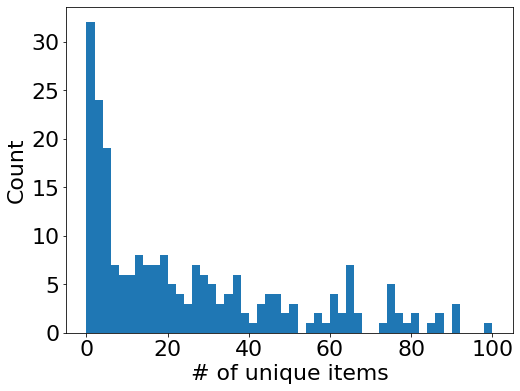

In [136]:
show_distribution(leaf_member = leaf_items)

In [106]:
# show_distribution(leaf_member = leaf_users)

# Same item in how many different leaf nodes?

mean:2.802901, std:4.138387


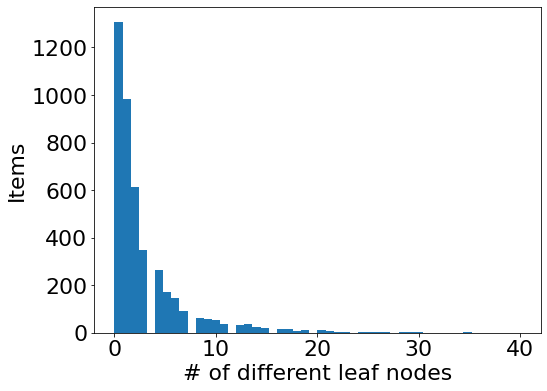

In [146]:
leaf_count_item = np.zeros(num_items)
for d in leaf_items:
    items = list(d.keys())
#     print(items)
    leaf_count_item[items] += 1
    
leaf_count_item = np.sort(leaf_count_item)

lci_lastfm = np.load('leaf-count-item-lastfm.npy')
lci_movie = np.load('leaf-count-item-movie.npy')


plt.figure(figsize = (8,6))
plt.hist(leaf_count_item, label = 'BookRec', bins = 50)
# plt.hist(lci_lastfm, label = 'LastFM')
# plt.hist(lci_movie, label = 'MovieLens')

plt.xlabel('# of different leaf nodes')
plt.ylabel('Items')
plt.savefig('leaf_count_item-book', dpi = 400)

print("mean:%f, std:%f"%(np.mean(leaf_count_item), np.std(leaf_count_item)))

# --------------------------------------------------------

In [309]:
class Model: 
    '''wrapper class'''
    def __init__(self, tree):
        self.tree = tree
        self.left = T
        
    def ask(self, node, single_review, left):
        positive_attribute = 0
        if(left == 1):
            return positive_attribute, node, left
        
        if(node.feature is None):
    #         print("leaf node")
            return positive_attribute, node, left
    #     print("Q{}: {} > 0?:".format(depth+1, node.feature))
#         print(len(np.unique(train_user_interaction[node.members,1])))
        if len(np.unique(train_user_interaction[node.members,1])) <= EARLY_STOPPING: ## EARLY STOPPING
            return positive_attribute, node, left
    
    
        val = single_review[node.feature]
        
#         ques_asked_at[T-left] = 1 + ques_asked_at.get(T-left, 0)
        
        
        if(val > 0):
    #         print("yes")
            left -= 1
                
            if(not node.pos_node.vector is None):
                positive_attribute, n, left =  self.ask(node.pos_node, single_review, left)
                return positive_attribute + 1, n, left
            else:
                return positive_attribute, node, left
        else:
    #         print("no")
            left -= 1
                
            if(not node.neg_node.vector is None):
                return self.ask(node.neg_node, single_review, left)
            else:
                return positive_attribute, node, left
            
    def predict(self,reviews):
        pred = []
        for r in reviews:
#             print(r, self.tree.root)
            positive_attribute, node, n_left = self.ask(node = self.tree.root, single_review = r, left = self.left)
    
            pred.append(node.vector)
        
        pred = np.array(pred)
        return pred

In [310]:
MRR5(model = Model(forest[0]), V = V, user_interaction=val_user_interaction, reviews=val_review)

334.073 0.072
336.4835 0.079
326.4696666666667 0.077
323.73975 0.079
327.632 0.0788
327.1458333333333 0.0805
324.55242857142855 0.08014285714285714


In [311]:
MRR5(model = Model(review_tree), V = V, user_interaction=val_user_interaction, reviews=val_review)

334.073 0.072
336.4835 0.079
326.4696666666667 0.077
323.73975 0.079
327.632 0.0788
327.1458333333333 0.0805
324.55242857142855 0.08014285714285714


In [312]:
DTCRS(model = Model(review_tree), V = V, user_interaction=val_user_interaction, reviews=val_review)

334.073 9.356 0.299
336.4835 9.3205 0.295
326.4696666666667 9.333 0.29133333333333333
323.73975 9.32075 0.29225
327.632 9.326 0.29
327.1458333333333 9.3185 0.29083333333333333
324.55242857142855 9.319857142857144 0.2892857142857143


# MAIN-FACT-CRS

In [170]:
def diffnegfactCRS(forest, V, user_interaction, reviews):
    mrr = 0
    count = 0
    success = 0
    
    def ask(node, single_review, left):
        positive_attribute = 0
        if(left == 1):
            return positive_attribute, node, left
        
        if(node.feature is None):
    #         print("leaf node")
            return positive_attribute, node, left
    #     print("Q{}: {} > 0?:".format(depth+1, node.feature))
#         print(len(np.unique(train_user_interaction[node.members,1])))
        if len(np.unique(train_user_interaction[node.members,1])) <= EARLY_STOPPING: ## EARLY STOPPING
            return positive_attribute, node, left+1
    
    
        val = single_review[node.feature]
        
#         ques_asked_at[T-left] = 1 + ques_asked_at.get(T-left, 0)
        
        
        if(val > 0):
    #         print("yes")
            new_attr = False
            if(not node.feature in qa):
                left -= 1
                new_attr = True
                
            qa[node.feature] = 1
            if(not node.pos_node.vector is None):
                positive_attribute, n, left =  ask(node.pos_node, single_review, left)
                
                if(new_attr):
#                     print("pos att")
                    return positive_attribute + 1, n, left
                else:
                    return positive_attribute, n, left
            else:
                return positive_attribute, node, left
        else:
    #         print("no")
            if(not node.feature in qa):
                left -= 1
                ques_asked_at[T-left] = 1 + ques_asked_at.get(T-left, 0)

            qa[node.feature] = 0
            if(not node.neg_node.vector is None):
                return ask(node.neg_node, single_review, left)
            else:
                return positive_attribute, node, left   
    
    
    
    def traverse(node, single_review):
        positive_attribute = 0
        if(node.feature is None):
    #         print("leaf node")
            return positive_attribute, node
        if(not node.feature in qa):
            return positive_attribute, node
    
        val = single_review[node.feature]
        if(val > 0):
            if(not node.pos_node.vector is None):
                positive_attribute, n =  traverse(node.pos_node, single_review)
                return positive_attribute + 1, n
            else:
                return positive_attribute, node
        else:                
            if(not node.neg_node.vector is None):
                return traverse(node.neg_node, single_review)
            else:
                return positive_attribute, node
    
    
    
    total_turn = 0
    
    for (review_id, interaction) in enumerate(user_interaction):
        count += 1
        u, i = interaction
        
        next_tree = 0
        asked_tree = set()
        qa = dict()
        left = T
        treecnt = 0
        turn_count = T
        
        
        already_rec = set()
        
        
        sulist = []
        success_turn = False

        identified_attribute = 0
        
        while(left > 0 and treecnt < len(forest)):
            review_tree = forest[next_tree]
            treecnt += 1
            
#             print("Now traversing: ", next_tree)
            
            positive_attribute, node, left = ask(review_tree.root, reviews[review_id], left)
            identified_attribute += positive_attribute

            asked_tree.add(next_tree)
            left-= 1
            rec_made_at[T-left] = 1 + rec_made_at.get(T-left, 0)

#             print("traversed the tree...")
            
            su = copy.deepcopy(node.vector)
            sulist.append(su)
            su = np.mean(sulist, axis = 0)
            
        
            leaf_candidates = np.unique(train_user_interaction[node.members,1])
#             print(leaf_candidates)
            score = -V[leaf_candidates].dot(su)
            idx = np.argsort(score)
            sorted_leaf_candidates = leaf_candidates[idx]

            recommend = []
            cand = 0
            while(len(recommend) < topK and cand < len(sorted_leaf_candidates)):
                if(not sorted_leaf_candidates[cand] in already_rec):
                    recommend.append(sorted_leaf_candidates[cand])
                    already_rec.add(sorted_leaf_candidates[cand])
                cand += 1
            
            ranked_recommend = []
            if(len(recommend) < topK):
                pred = -su.dot(V.T)
                sorted_list = np.argsort(pred)
    #             print("target:", i, "recommend:", recommend)
    #             time.sleep(1)
                kcount = 0
                while(len(recommend) < topK):
                    if not sorted_list[kcount] in already_rec:
                        recommend.append(sorted_list[kcount])
                        ranked_recommend.append(sorted_list[kcount])
                        already_rec.add(sorted_list[kcount])  # we don't want to recommend the same item twice
                    kcount += 1
        
#             print(recommend)
#             rank = np.where(recommend == i)[0]
#             mrr += (rank+1)
            if(i in recommend):
                success += 1
                success_turn = True
                rec_success_at[T-left] = 1 + rec_success_at.get(T-left, 0)
                turn_count = T - left
                break
            else:  ##Negative Feedback
                if ranked_recommend:
                    su -= ALPHA_NEG* np.mean(V[ranked_recommend], axis = 0)
                move_towards_items = []
                while(len(move_towards_items) < N_MOVE_TOWARD and cand < len(sorted_leaf_candidates)):
                    if(not sorted_leaf_candidates[cand] in already_rec):
                        move_towards_items.append(sorted_leaf_candidates[cand])
                    cand += 1
                if (move_towards_items):
#                     print("moving")
#                     su += ALPHA_POS* (np.mean(move_towards_items, axis = 0)) # move toward the latter items
#                     su = su/(1+ALPHA_POS)

                    su += ALPHA_POS*np.mean(move_towards_items, axis = 0) - ALPHA_NEG*np.mean(recommend, axis = 0) # move toward the latter items
                    su = su/(1+ALPHA_POS-ALPHA_NEG)
                    pass
                
            best_match = -math.inf  ## CTF
            for tree_idx in range(len(forest)):
                if (tree_idx in  asked_tree):
                    continue
                _, probable_node = traverse(forest[tree_idx].root, reviews[review_id])
                probable_su = probable_node.vector
                sim = np.dot(probable_su, su)
                if( sim > best_match):
                    best_match = sim
                    next_tree = tree_idx
            
#             print("Checked all using history")

        
        total_turn += turn_count
        n_attribute = reviews[review_id].sum()
        if(success_turn):
            success_len.append(n_attribute)
            nk_success[(n_attribute, identified_attribute)] = 1 + nk_success.get((n_attribute, identified_attribute), 0)
        else:
            failed_len.append(n_attribute)
            nk_failed[(n_attribute, identified_attribute)] = 1 + nk_failed.get((n_attribute, identified_attribute), 0)

        if((count) % 1000 == 0):
#             print(mrr/(count*treecnt), success/(count))
            print(total_turn/count, success/count)
    
    print(total_turn/count, success/count)

In [ ]:
ALPHA_POS = 1e0
ALPHA_NEG = 1e-2
N_MOVE_TOWARD = 10
EARLY_STOPPING = 300


rec_made_at = dict()
ques_asked_at = dict()
rec_success_at = dict()

success_len = []
failed_len = []
nk_success = {}
nk_failed = {}
diffnegfactCRS(forest = forest, V = V, user_interaction = val_user_interaction, reviews = val_review)
print("DONE!")

In [171]:
rec_made_at = dict()
ques_asked_at = dict()
rec_success_at = dict()

success_len = []
failed_len = []
nk_success = {}
nk_failed = {}
diffnegfactCRS(forest = forest, V = V, user_interaction = test_user_interaction, reviews = test_review)
print("Done!")

8.232 0.434
8.2285 0.4435
8.188 0.44733333333333336
8.193 0.44675
8.198 0.4472
8.206833333333334 0.44316666666666665
8.228857142857143 0.43942857142857145
8.230291005291006 0.43822751322751324
Done!


### calculate mu and sigma

In [183]:
print('success')
print(np.mean(success_len), np.std(success_len))
print('failed')
print(np.mean(failed_len), np.std(failed_len))
print('all')
print(np.mean(test_review.sum(axis = 1)), np.std(test_review.sum(axis = 1)))

success
5.609719287654694 1.091686754291347
failed
5.068283494231222 0.9982558119241034
all
5.305555555555555 1.0743625319640402


### success greater thank K

In [206]:
def success_greater_than(k):
    print(1 - (np.array(failed_len) > k).sum() / sum(test_review.sum(axis = 1) > k))

success_greater_than(0)
success_greater_than(1)
success_greater_than(2)
success_greater_than(3)
success_greater_than(4)
success_greater_than(5)
success_greater_than(6)

0.4382275132275132
0.4382275132275132
0.4382275132275132
0.4382275132275132
0.4967948717948718
0.5739925499492042
0.6445959104186952


In [ ]:
# def count_attributes(reviews):
#     reviews = np.array(reviews)
#     print(reviews.sum(axis = 1).mean(), reviews.sum(axis = 1).std())
    
# count_attributes(reviews = rejected_reviews)
# count_attributes(reviews = train_review)
# count_attributes(reviews = train_review[successful_rid])

# def greaterThanFailed(k):
#     count_all = 0
#     count_rej = 0
#     for r in train_review:
#         if(r.sum() >= k):
#             count_all += 1
#     for r in rejected_reviews:
#         if(r.sum() >= k):
#             count_rej += 1
#     return count_all, count_rej
    
# greaterThanFailed(4)

[[       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan]
 [0.         0.09069767 0.2503023  0.47900763 0.37142857        nan
         nan        nan        nan        nan]
 [0.01785714 0.10344828 0.33227176 0.59746589 0.43421053 0.1875
         nan        nan        nan        nan]
 [0.         0.14159292 0.45335821 0.6821608  0.50582751 0.34146341
         nan        nan        nan        nan]
 [0.         0.15       0.58974359 0.79329609 0.4741784  0.41463415
  0.                nan        nan        nan]
 [       nan        nan 0.77272727 0.9009901  0.50847458 0.4
         nan        nan

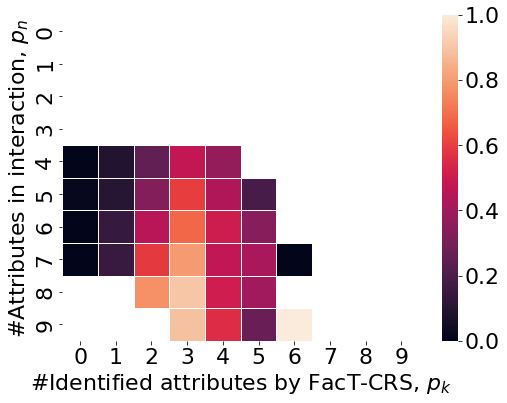

In [174]:
res = np.zeros((T, T))

for n in range(0, T):
    for k in range(0, T):
        nk_s = nk_success.get((n,k), 0)
        nk_f = nk_failed.get((n,k), 0)
        
        if((nk_s + nk_f) == 0):
            res[n,k] = np.nan
        else:
            res[n,k] = nk_s /(nk_s + nk_f)

print(res)

import seaborn as sns
plt.rcParams.update({'font.size': 22})
plt.figure(figsize = (8,6))
ax = sns.heatmap(res, linewidth=0.5)
plt.xlabel('#Identified attributes by FacT-CRS, '+r'$p_k$')
plt.ylabel('#Attributes in interaction, '+r'$p_n$')
plt.savefig('heatmap-book.png',dpi = 400)
plt.show()

In [156]:
len(val_user_interaction), len(test_user_interaction)

(7560, 7560)

# rec success

rec_probability at turn 1 : 0.0
rec_probability at turn 2 : 0.0
rec_probability at turn 3 : 0.6059940235542275
rec_probability at turn 4 : 0.337467117624953
rec_probability at turn 5 : 0.5799292069262413
rec_probability at turn 6 : 0.663059163059163
rec_probability at turn 7 : 0.6098869515232803
rec_probability at turn 8 : 0.5119722747321991
rec_probability at turn 9 : 0.5769662921348314
rec_probability at turn 10 : 1.0
rec_success at turn 3 : 0.07237128353879622
rec_success at turn 4 : 0.111358574610245
rec_success at turn 5 : 0.1115143516991092
rec_success at turn 6 : 0.08439124652399951
rec_success at turn 7 : 0.09393653785736726
rec_success at turn 8 : 0.092
rec_success at turn 9 : 0.05939629990262902
rec_success at turn 10 : 0.05746229849193968


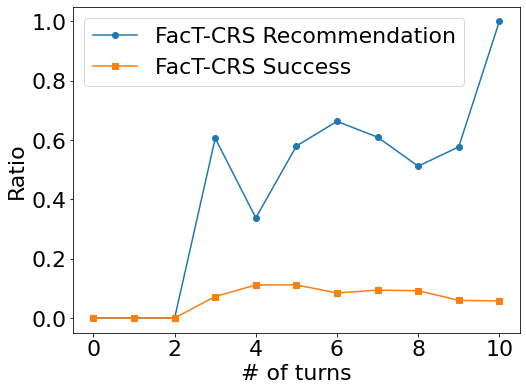

In [157]:
rec_probability = np.zeros(T+1)
for turn in range(1,T+1):
    if((rec_made_at.get(turn, 0) + ques_asked_at.get(turn, 0)) > 0):
        rec_probability[turn]  = rec_made_at.get(turn, 0)/(rec_made_at.get(turn, 0) + ques_asked_at.get(turn, 0))
        print("rec_probability at turn", turn, ":", rec_probability[turn])
        
rec_success_probability = np.zeros(T+1)
for turn in range(0,T+1):
    if((rec_made_at.get(turn, 0)) > 0):
        rec_success_probability[turn] = rec_success_at.get(turn,0)/rec_made_at.get(turn, 0)
        print("rec_success at turn", turn, ":", rec_success_probability[turn])
        
        
length = range(0,T+1)

plt.figure(figsize = (8,6))


plt.plot(length,rec_probability[0:T+1], label='FacT-CRS Recommendation', marker = 'o')
plt.plot(length,rec_success_probability[0:T+1], label='FacT-CRS Success', marker = 's')

plt.xlabel('# of turns')
plt.ylabel('Ratio')
plt.legend()
plt.savefig('rec-succ.png',dpi = 400)

# Ablation Study

In [158]:
# previously MRR10

def FacTCRS_RankingOnly(forest, V, user_interaction, reviews):
    mrr = 0
    count = 0
    success = 0
    
    def ask(node, single_review, left):
        positive_attribute = 0
        if(left == 1):
            return positive_attribute, node, left
        
        if(node.feature is None):
    #         print("leaf node")
            return positive_attribute, node, left
    #     print("Q{}: {} > 0?:".format(depth+1, node.feature))
#         print(len(np.unique(train_user_interaction[node.members,1])))
        if len(np.unique(train_user_interaction[node.members,1])) <= EARLY_STOPPING: ## EARLY STOPPING
            return positive_attribute, node, left
    
    
        val = single_review[node.feature]
        
#         ques_asked_at[T-left] = 1 + ques_asked_at.get(T-left, 0)
        
        
        if(val > 0):
    #         print("yes")
            if(not node.feature in qa):
                left -= 1
                
            qa[node.feature] = 1
            if(not node.pos_node.vector is None):
                positive_attribute, n, left =  ask(node.pos_node, single_review, left)
                return positive_attribute + 1, n, left
            else:
                return positive_attribute, node, left
        else:
    #         print("no")
            if(not node.feature in qa):
                left -= 1
                
            qa[node.feature] = 0
            if(not node.neg_node.vector is None):
                return ask(node.neg_node, single_review, left)
            else:
                return positive_attribute, node, left
    
    
    
    def traverse(node, single_review):
        positive_attribute = 0
        if(node.feature is None):
    #         print("leaf node")
            return positive_attribute, node
        if(not node.feature in qa):
            return positive_attribute, node
    
        val = single_review[node.feature]
        if(val > 0):
            if(not node.pos_node.vector is None):
                positive_attribute, n =  traverse(node.pos_node, single_review)
                return positive_attribute + 1, n
            else:
                return positive_attribute, node
        else:                
            if(not node.neg_node.vector is None):
                return traverse(node.neg_node, single_review)
            else:
                return positive_attribute, node
    
    
    
    total_turn = 0
    
    for (review_id, interaction) in enumerate(user_interaction):
        count += 1
        u, i = interaction
        
        next_tree = 0
        asked_tree = set()
        qa = dict()
        left = T
        treecnt = 0
        turn_count = T
        
        sulist = []
        
        already_rec = set()
        
        while(left > 0 and treecnt < len(forest)):
            review_tree = forest[next_tree]
            treecnt += 1
            positive_attribute, node, left = ask(review_tree.root, reviews[review_id], left)
            
#             print(left)
            
            asked_tree.add(forest[next_tree])
            left-=1
            
            sulist.append(node.vector)
            su = np.mean(sulist, axis = 0)
            
            pred = -su.dot(V.T)
            sorted_list = np.argsort(pred)
#             time.sleep(1)
            kcount = 0
            recommend = []
            while(len(recommend) < topK):
                if not sorted_list[kcount] in already_rec:
                    recommend.append(sorted_list[kcount])
                    already_rec.add(sorted_list[kcount])  # we don't want to recommend the same item twice
                kcount += 1
        
#             print("target:", i, "recommend:", recommend)
#             rank = np.where(recommend == i)[0]
#             mrr += (rank+1)
            if(i in recommend):
#                 print('success')
                success += 1
                turn_count = T - left
                break
            
            best_match = -math.inf  ## CTF
            for tree_idx in range(len(forest)):
                if (forest[tree_idx] in  asked_tree):
                    continue
                _, probable_node = traverse(forest[tree_idx].root, reviews[review_id])
                probable_su = probable_node.vector
                sim = np.dot(probable_su, su)
                if( sim > best_match):
                    best_match = sim
                    next_tree = tree_idx
        
        

        total_turn += turn_count
        if((count) % 1000 == 0):
#             print(mrr/(count*treecnt), success/(count))
            print(total_turn/count, success/count)
    
    print(total_turn/count, success/count)

# FacTCRS_RankingOnly(forest = forest, V = V, user_interaction=val_user_interaction, reviews=val_review)
FacTCRS_RankingOnly(forest = forest, V = V, user_interaction=test_user_interaction, reviews=test_review)

9.541 0.187
9.5265 0.1925
9.504666666666667 0.19766666666666666
9.50175 0.2
9.501 0.1986
9.503666666666666 0.197
9.510571428571428 0.19485714285714287
9.50978835978836 0.1958994708994709


In [159]:
def noEarlyRec(forest, V, user_interaction, reviews):
    mrr = 0
    count = 0
    success = 0
    
    def ask(node, single_review, left):
        positive_attribute = 0
        if(left == 1):
            return positive_attribute, node, left
        
        if(node.feature is None):
    #         print("leaf node")
            return positive_attribute, node, left
    #     print("Q{}: {} > 0?:".format(depth+1, node.feature))
#         print(len(np.unique(train_user_interaction[node.members,1])))
        if len(np.unique(train_user_interaction[node.members,1])) <= 0: ## EARLY STOPPING
            return positive_attribute, node, left+1
    
    
        val = single_review[node.feature]
        
#         ques_asked_at[T-left] = 1 + ques_asked_at.get(T-left, 0)
        
        
        if(val > 0):
    #         print("yes")
            if(not node.feature in qa):
                left -= 1
                
            qa[node.feature] = 1
            if(not node.pos_node.vector is None):
                positive_attribute, n, left =  ask(node.pos_node, single_review, left)
                return positive_attribute + 1, n, left
            else:
                return positive_attribute, node, left
        else:
    #         print("no")
            if(not node.feature in qa):
                left -= 1
                ques_asked_at[T-left] = 1 + ques_asked_at.get(T-left, 0)

            qa[node.feature] = 0
            if(not node.neg_node.vector is None):
                return ask(node.neg_node, single_review, left)
            else:
                return positive_attribute, node, left   
    
    
    
    def traverse(node, single_review):
        positive_attribute = 0
        if(node.feature is None):
    #         print("leaf node")
            return positive_attribute, node
        if(not node.feature in qa):
            return positive_attribute, node
    
        val = single_review[node.feature]
        if(val > 0):
            if(not node.pos_node.vector is None):
                positive_attribute, n =  traverse(node.pos_node, single_review)
                return positive_attribute + 1, n
            else:
                return positive_attribute, node
        else:                
            if(not node.neg_node.vector is None):
                return traverse(node.neg_node, single_review)
            else:
                return positive_attribute, node
    
    
    
    total_turn = 0
    
    for (review_id, interaction) in enumerate(user_interaction):
        count += 1
        u, i = interaction
        
        next_tree = 0
        asked_tree = set()
        qa = dict()
        left = T
        treecnt = 0
        turn_count = T
        
        
        already_rec = set()
        
        
        sulist = []
        
        while(left > 0 and treecnt < len(forest)):
            review_tree = forest[next_tree]
            treecnt += 1
            
#             print("Now traversing: ", next_tree)
            
            positive_attribute, node, left = ask(review_tree.root, reviews[review_id], left)
            asked_tree.add(next_tree)
            left-= 1
            rec_made_at[T-left] = 1 + rec_made_at.get(T-left, 0)

#             print("traversed the tree...")
            
            su = copy.deepcopy(node.vector)
            sulist.append(su)
            su = np.mean(sulist, axis = 0)
            
        
            leaf_candidates = np.unique(train_user_interaction[node.members,1])
#             print(leaf_candidates)
            score = -V[leaf_candidates].dot(su)
            idx = np.argsort(score)
            sorted_leaf_candidates = leaf_candidates[idx]

            recommend = []
            cand = 0
            while(len(recommend) < topK and cand < len(sorted_leaf_candidates)):
                if(not sorted_leaf_candidates[cand] in already_rec):
                    recommend.append(sorted_leaf_candidates[cand])
                    already_rec.add(sorted_leaf_candidates[cand])
                cand += 1
            
            ranked_recommend = []
            if(len(recommend) < topK):
                pred = -su.dot(V.T)
                sorted_list = np.argsort(pred)
    #             print("target:", i, "recommend:", recommend)
    #             time.sleep(1)
                kcount = 0
                while(len(recommend) < topK):
                    if not sorted_list[kcount] in already_rec:
                        recommend.append(sorted_list[kcount])
                        ranked_recommend.append(sorted_list[kcount])
                        already_rec.add(sorted_list[kcount])  # we don't want to recommend the same item twice
                    kcount += 1
        
#             print(recommend)
#             rank = np.where(recommend == i)[0]
#             mrr += (rank+1)
            if(i in recommend):
                success += 1
                rec_success_at[T-left] = 1 + rec_success_at.get(T-left, 0)
                turn_count = T - left
                break
            else:  ##Negative Feedback
                if ranked_recommend:
                    su -= ALPHA_NEG* np.mean(V[ranked_recommend], axis = 0)
                move_towards_items = []
                while(len(move_towards_items) < N_MOVE_TOWARD and cand < len(sorted_leaf_candidates)):
                    if(not sorted_leaf_candidates[cand] in already_rec):
                        move_towards_items.append(sorted_leaf_candidates[cand])
                    cand += 1
                if (move_towards_items):
#                     print("moving")
#                     su += ALPHA_POS* (np.mean(move_towards_items, axis = 0)) # move toward the latter items
#                     su = su/(1+ALPHA_POS)

                    su += ALPHA_POS*np.mean(move_towards_items, axis = 0) - ALPHA_NEG*np.mean(recommend, axis = 0) # move toward the latter items
#                     su = su/(1+ALPHA_POS-ALPHA_NEG)
                    pass
                
            best_match = -math.inf  ## CTF
            for tree_idx in range(len(forest)):
                if (tree_idx in  asked_tree):
                    continue
                _, probable_node = traverse(forest[tree_idx].root, reviews[review_id])
                probable_su = probable_node.vector
                sim = np.dot(probable_su, su)
                if( sim > best_match):
                    best_match = sim
                    next_tree = tree_idx
            
#             print("Checked all using history")

        total_turn += turn_count
        if((count) % 1000 == 0):
#             print(mrr/(count*treecnt), success/(count))
            print(total_turn/count, success/count)
    
    print(total_turn/count, success/count)
    
noEarlyRec(forest = forest, V = V, user_interaction = test_user_interaction, reviews = test_review)

9.825 0.193
9.814 0.199
9.811 0.20366666666666666
9.814 0.202
9.8148 0.2014
9.817666666666666 0.19933333333333333
9.816285714285714 0.2012857142857143
9.816402116402116 0.20145502645502644


In [160]:
def factCRSwithoutNeg(forest, V, user_interaction, reviews):
    mrr = 0
    count = 0
    success = 0
    
    def ask(node, single_review, left):
        positive_attribute = 0
        if(left == 1):
            return positive_attribute, node, left
        
        if(node.feature is None):
    #         print("leaf node")
            return positive_attribute, node, left
    #     print("Q{}: {} > 0?:".format(depth+1, node.feature))
#         print(len(np.unique(train_user_interaction[node.members,1])))
        if len(np.unique(train_user_interaction[node.members,1])) <= EARLY_STOPPING: ## EARLY STOPPING
            return positive_attribute, node, left+1
    
    
        val = single_review[node.feature]
        
#         ques_asked_at[T-left] = 1 + ques_asked_at.get(T-left, 0)
        
        
        if(val > 0):
    #         print("yes")
            if(not node.feature in qa):
                left -= 1
                
            qa[node.feature] = 1
            if(not node.pos_node.vector is None):
                positive_attribute, n, left =  ask(node.pos_node, single_review, left)
                return positive_attribute + 1, n, left
            else:
                return positive_attribute, node, left
        else:
    #         print("no")
            if(not node.feature in qa):
                left -= 1
                
            qa[node.feature] = 0
            if(not node.neg_node.vector is None):
                return ask(node.neg_node, single_review, left)
            else:
                return positive_attribute, node, left   
    
    
    
    def traverse(node, single_review):
        positive_attribute = 0
        if(node.feature is None):
    #         print("leaf node")
            return positive_attribute, node
        if(not node.feature in qa):
            return positive_attribute, node
    
        val = single_review[node.feature]
        if(val > 0):
            if(not node.pos_node.vector is None):
                positive_attribute, n =  traverse(node.pos_node, single_review)
                return positive_attribute + 1, n
            else:
                return positive_attribute, node
        else:                
            if(not node.neg_node.vector is None):
                return traverse(node.neg_node, single_review)
            else:
                return positive_attribute, node
    
    
    
    total_turn = 0
    
    for (review_id, interaction) in enumerate(user_interaction):
        count += 1
        u, i = interaction
        
        next_tree = 0
        asked_tree = set()
        qa = dict()
        left = T
        treecnt = 0
        turn_count = T
        
        
        already_rec = set()
        sulist = []
        
        while(left > 0 and treecnt < len(forest)):
            review_tree = forest[next_tree]
            treecnt += 1
            
#             print("Now traversing: ", next_tree)
            
            positive_attribute, node, left = ask(review_tree.root, reviews[review_id], left)
            asked_tree.add(next_tree)
            left-= 1
#             print("traversed the tree...")
            
            su = copy.deepcopy(node.vector)
#             sulist.append(su)
#             su = np.mean(sulist, axis = 0)
            
            leaf_candidates = np.unique(train_user_interaction[node.members,1])
#             print(leaf_candidates)
            score = -V[leaf_candidates].dot(su)
            idx = np.argsort(score)
            sorted_leaf_candidates = leaf_candidates[idx]

            recommend = []
            cand = 0
            while(len(recommend) < topK and cand < len(sorted_leaf_candidates)):
                if(not sorted_leaf_candidates[cand] in already_rec):
                    recommend.append(sorted_leaf_candidates[cand])
                    already_rec.add(sorted_leaf_candidates[cand])
                cand += 1
            
            ranked_recommend = []
            if(len(recommend) < topK):
                pred = -su.dot(V.T)
                sorted_list = np.argsort(pred)
    #             print("target:", i, "recommend:", recommend)
    #             time.sleep(1)
                kcount = 0
                while(len(recommend) < topK):
                    if not sorted_list[kcount] in already_rec:
                        recommend.append(sorted_list[kcount])
                        ranked_recommend.append(sorted_list[kcount])
                        already_rec.add(sorted_list[kcount])  # we don't want to recommend the same item twice
                    kcount += 1
        
#             print(recommend)
#             rank = np.where(recommend == i)[0]
#             mrr += (rank+1)
            if(i in recommend):
                success += 1
                turn_count = T - left
                break
#             else:  ##Negative Feedback
#                 if ranked_recommend:
#                     su -= ALPHA_NEG* np.mean(V[ranked_recommend], axis = 0)
            
            best_match = -math.inf  ## CTF
            for tree_idx in range(len(forest)):
                if (tree_idx in  asked_tree):
                    continue
                _, probable_node = traverse(forest[tree_idx].root, reviews[review_id])
                probable_su = probable_node.vector
                sim = np.dot(probable_su, su)
                if( sim > best_match):
                    best_match = sim
                    next_tree = tree_idx
            
#             print("Checked all using history")

        total_turn += turn_count
        if((count) % 1000 == 0):
#             print(mrr/(count*treecnt), success/(count))
            print(total_turn/count, success/count)
    
    print(total_turn/count, success/count)


In [161]:
# factCRSwithoutNeg(forest = forest, V = V, user_interaction = val_user_interaction, reviews = val_review)

In [162]:
factCRSwithoutNeg(forest = forest, V = V, user_interaction = test_user_interaction, reviews = test_review)

8.464 0.348
8.473 0.3485
8.440333333333333 0.35233333333333333
8.4365 0.35625
8.4468 0.356
8.444666666666667 0.3551666666666667
8.464142857142857 0.351
8.464814814814815 0.3503968253968254


In [163]:
# rec_made_at = dict()
# ques_asked_at = dict()
# rec_success_at = dict()




# def varytopKCRS(forest, V, user_interaction, reviews):
    
#     topK = 50
    
#     mrr = 0
#     count = 0
#     success = 0
    
#     def ask(node, single_review, left):
#         positive_attribute = 0
#         if(left == 1):
#             return positive_attribute, node, left
        
#         if(node.feature is None):
#     #         print("leaf node")
#             return positive_attribute, node, left
#     #     print("Q{}: {} > 0?:".format(depth+1, node.feature))
# #         print(len(np.unique(train_user_interaction[node.members,1])))
#         if len(np.unique(train_user_interaction[node.members,1])) <= EARLY_STOPPING: ## EARLY STOPPING
#             return positive_attribute, node, left+1
    
    
#         val = single_review[node.feature]
        
#         ques_asked_at[T-left] = 1 + ques_asked_at.get(T-left, 0)
        
        
#         if(val > 0):
#     #         print("yes")
#             if(not node.feature in qa):
#                 left -= 1
                
#             qa[node.feature] = 1
#             if(not node.pos_node.vector is None):
#                 positive_attribute, n, left =  ask(node.pos_node, single_review, left)
#                 return positive_attribute + 1, n, left
#             else:
#                 return positive_attribute, node, left
#         else:
#     #         print("no")
#             if(not node.feature in qa):
#                 left -= 1
                
#             qa[node.feature] = 0
#             if(not node.neg_node.vector is None):
#                 return ask(node.neg_node, single_review, left)
#             else:
#                 return positive_attribute, node, left    
    
    
#     def traverse(node, single_review):
#         positive_attribute = 0
#         if(node.feature is None):
#     #         print("leaf node")
#             return positive_attribute, node
#         if(not node.feature in qa):
#             return positive_attribute, node
    
#         val = single_review[node.feature]
#         if(val > 0):
#             if(not node.pos_node.vector is None):
#                 positive_attribute, n =  traverse(node.pos_node, single_review)
#                 return positive_attribute + 1, n
#             else:
#                 return positive_attribute, node
#         else:                
#             if(not node.neg_node.vector is None):
#                 return traverse(node.neg_node, single_review)
#             else:
#                 return positive_attribute, node
    
    
    
#     total_turn = 0
    
#     for (review_id, interaction) in enumerate(user_interaction):
#         count += 1
#         u, i = interaction
        
#         next_tree = 0
#         asked_tree = set()
#         qa = dict()
#         left = T
#         treecnt = 0
#         turn_count = T
        
        
#         already_rec = set()
        
#         while(left > 0 and treecnt < len(forest)):
#             review_tree = forest[next_tree]
#             treecnt += 1
            
# #             print("Now traversing: ", next_tree)
            
#             positive_attribute, node, left = ask(review_tree.root, reviews[review_id], left)
#             asked_tree.add(next_tree)
#             left -= 1
# #             print("traversed the tree...")
            
#             su = copy.deepcopy(node.vector)
#             leaf_candidates = np.unique(train_user_interaction[node.members,1])
# #             print(leaf_candidates)
#             score = -V[leaf_candidates].dot(su)
#             idx = np.argsort(score)
#             sorted_leaf_candidates = leaf_candidates[idx]

#             recommend = []
#             cand = 0
#             while(len(recommend) < topK and cand < len(sorted_leaf_candidates)):
#                 if(not sorted_leaf_candidates[cand] in already_rec):
#                     recommend.append(sorted_leaf_candidates[cand])
#                     already_rec.add(sorted_leaf_candidates[cand])
#                 cand += 1
            
#             ranked_recommend = []
#             if(len(recommend) < topK):
#                 pred = -su.dot(V.T)
#                 sorted_list = np.argsort(pred)
#     #             print("target:", i, "recommend:", recommend)
#     #             time.sleep(1)
#                 kcount = 0
#                 while(len(recommend) < topK):
#                     if not sorted_list[kcount] in already_rec:
#                         recommend.append(sorted_list[kcount])
#                         ranked_recommend.append(sorted_list[kcount])
#                         already_rec.add(sorted_list[kcount])  # we don't want to recommend the same item twice
#                     kcount += 1
        
# #             print(recommend)
# #             rank = np.where(recommend == i)[0]
# #             mrr += (rank+1)

#             rec_made_at[T-left] = 1 + rec_made_at.get(T-left, 0)


#             if(i in recommend):
#                 rec_success_at[T-left] = 1 + rec_success_at.get(T-left, 0)
#                 success += 1
#                 turn_count = T - left
#                 break
#             else:  ##Negative Feedback
#                 if ranked_recommend:
#                     su -= ALPHA_NEG* np.mean(V[ranked_recommend], axis = 0)

# #                 su += ALPHA_NEG* np.mean(V[idx[40:50]], axis = 0)
                    
            
#             best_match = -math.inf  ## CTF
#             for tree_idx in range(len(forest)):
#                 if (tree_idx in  asked_tree):
#                     continue
#                 _, probable_node = traverse(forest[tree_idx].root, reviews[review_id])
#                 probable_su = probable_node.vector
#                 sim = np.dot(probable_su, su)
#                 if( sim > best_match):
#                     best_match = sim
#                     next_tree = tree_idx
            
# #             print("Checked all using history")

#         total_turn += turn_count
    

#     print(total_turn/count, success/count)
    
# varytopKCRS(forest = forest, V = V,user_interaction = test_user_interaction[:firstr], reviews = test_review[:firstr])

In [164]:
def factCRSoneTree(forest, V, user_interaction, reviews):
    mrr = 0
    count = 0
    success = 0
    
    def ask(node, single_review, left):
        positive_attribute = 0
        if(left == 1):
            return positive_attribute, node, left
        
        if(node.feature is None):
    #         print("leaf node")
            return positive_attribute, node, left
    #     print("Q{}: {} > 0?:".format(depth+1, node.feature))
#         print(len(np.unique(train_user_interaction[node.members,1])))
        if len(np.unique(train_user_interaction[node.members,1])) <= EARLY_STOPPING: ## EARLY STOPPING
            return positive_attribute, node, left+1
    
    
        val = single_review[node.feature]
        
        ques_asked_at[T-left] = 1 + ques_asked_at.get(T-left, 0)
        
        
        if(val > 0):
    #         print("yes")
            if(not node.feature in qa):
                left -= 1
                
            qa[node.feature] = 1
            if(not node.pos_node.vector is None):
                positive_attribute, n, left =  ask(node.pos_node, single_review, left)
                return positive_attribute + 1, n, left
            else:
                return positive_attribute, node, left
        else:
    #         print("no")
            if(not node.feature in qa):
                left -= 1
                
            qa[node.feature] = 0
            if(not node.neg_node.vector is None):
                return ask(node.neg_node, single_review, left)
            else:
                return positive_attribute, node, left   
    
    
    
    def traverse(node, single_review):
        positive_attribute = 0
        if(node.feature is None):
    #         print("leaf node")
            return positive_attribute, node
        if(not node.feature in qa):
            return positive_attribute, node
    
        val = single_review[node.feature]
        if(val > 0):
            if(not node.pos_node.vector is None):
                positive_attribute, n =  traverse(node.pos_node, single_review)
                return positive_attribute + 1, n
            else:
                return positive_attribute, node
        else:                
            if(not node.neg_node.vector is None):
                return traverse(node.neg_node, single_review)
            else:
                return positive_attribute, node
    
    
    

    
    total_turn = 0
    
    for (review_id, interaction) in enumerate(user_interaction):
        count += 1
        u, i = interaction
        
        next_tree = 0
        asked_tree = set()
        qa = dict()
        left = T
        treecnt = 0
        turn_count = T
        
        
        already_rec = set()
#         sulist = []
        
        while(left > 0 and treecnt <= 1):
            review_tree = forest[next_tree]
            treecnt += 1
            
#             print("Now traversing: ", next_tree)
            
            positive_attribute, node, left = ask(review_tree.root, reviews[review_id], left)
            asked_tree.add(next_tree)
            left-= 1
#             print("traversed the tree...")
            
            su = copy.deepcopy(node.vector)
#             sulist.append(su)
#             su = np.mean(sulist, axis = 0)
            
            leaf_candidates = np.unique(train_user_interaction[node.members,1])
#             print(leaf_candidates)
            score = -V[leaf_candidates].dot(su)
            idx = np.argsort(score)
            sorted_leaf_candidates = leaf_candidates[idx]

            recommend = []
            cand = 0
            while(len(recommend) < topK and cand < len(sorted_leaf_candidates)):
                if(not sorted_leaf_candidates[cand] in already_rec):
                    recommend.append(sorted_leaf_candidates[cand])
                    already_rec.add(sorted_leaf_candidates[cand])
                cand += 1
            
            ranked_recommend = []
            if(len(recommend) < topK):
                pred = -su.dot(V.T)
                sorted_list = np.argsort(pred)
    #             print("target:", i, "recommend:", recommend)
    #             time.sleep(1)
                kcount = 0
                while(len(recommend) < topK):
                    if not sorted_list[kcount] in already_rec:
                        recommend.append(sorted_list[kcount])
                        ranked_recommend.append(sorted_list[kcount])
                        already_rec.add(sorted_list[kcount])  # we don't want to recommend the same item twice
                    kcount += 1
        
#             print(recommend)
#             rank = np.where(recommend == i)[0]
#             mrr += (rank+1)
            if(i in recommend):
                success += 1
                turn_count = T - left
                break
#             else:  ##Negative Feedback
#                 if ranked_recommend:
#                     su -= ALPHA_NEG* np.mean(V[ranked_recommend], axis = 0)
            
            best_match = -math.inf  ## CTF
            for tree_idx in range(len(forest)):
                if (tree_idx in  asked_tree):
                    continue
                _, probable_node = traverse(forest[tree_idx].root, reviews[review_id])
                probable_su = probable_node.vector
                sim = np.dot(probable_su, su)
                if( sim > best_match):
                    best_match = sim
                    next_tree = tree_idx
            
#             print("Checked all using history")

        total_turn += turn_count
        if((count) % 1000 == 0):
#             print(mrr/(count*treecnt), success/(count))
            print(total_turn/count, success/count)
    
    print(total_turn/count, success/count)
    
factCRSoneTree(forest = forest, V = V, user_interaction = test_user_interaction, reviews = test_review)

9.549 0.11
9.5355 0.1165
9.512333333333334 0.11966666666666667
9.5205 0.11925
9.5144 0.1208
9.521166666666666 0.11883333333333333
9.525714285714285 0.11742857142857142
9.523015873015874 0.1175925925925926


In [165]:
# rec_made_at = dict()
# ques_asked_at = dict()
# rec_success_at = dict()




# def factCRS(forest, V, user_interaction, reviews):
#     mrr = 0
#     count = 0
#     success = 0
    
#     def ask(node, single_review, left):
#         positive_attribute = 0
#         if(left == 1):
#             return positive_attribute, node, left
        
#         if(node.feature is None):
#     #         print("leaf node")
#             return positive_attribute, node, left
#     #     print("Q{}: {} > 0?:".format(depth+1, node.feature))
# #         print(len(np.unique(train_user_interaction[node.members,1])))
#         if len(np.unique(train_user_interaction[node.members,1])) <= EARLY_STOPPING: ## EARLY STOPPING
#             return positive_attribute, node, left+1
    
    
#         val = single_review[node.feature]
        
#         ques_asked_at[T-left] = 1 + ques_asked_at.get(T-left, 0)
        
        
#         if(val > 0):
#     #         print("yes")
#             if(not node.feature in qa):
#                 left -= 1
                
#             qa[node.feature] = 1
#             if(not node.pos_node.vector is None):
#                 positive_attribute, n, left =  ask(node.pos_node, single_review, left)
#                 return positive_attribute + 1, n, left
#             else:
#                 return positive_attribute, node, left
#         else:
#     #         print("no")
#             if(not node.feature in qa):
#                 left -= 1
                
#             qa[node.feature] = 0
#             if(not node.neg_node.vector is None):
#                 return ask(node.neg_node, single_review, left)
#             else:
#                 return positive_attribute, node, left   
    
    
    
#     def traverse(node, single_review):
#         positive_attribute = 0
#         if(node.feature is None):
#     #         print("leaf node")
#             return positive_attribute, node
#         if(not node.feature in qa):
#             return positive_attribute, node
    
#         val = single_review[node.feature]
#         if(val > 0):
#             if(not node.pos_node.vector is None):
#                 positive_attribute, n =  traverse(node.pos_node, single_review)
#                 return positive_attribute + 1, n
#             else:
#                 return positive_attribute, node
#         else:                
#             if(not node.neg_node.vector is None):
#                 return traverse(node.neg_node, single_review)
#             else:
#                 return positive_attribute, node
    
    
    
#     total_turn = 0
    
#     for (review_id, interaction) in enumerate(user_interaction):
#         count += 1
#         u, i = interaction
        
#         next_tree = 0
#         asked_tree = set()
#         qa = dict()
#         left = T
#         treecnt = 0
#         turn_count = T
        
        
#         already_rec = set()
        
#         while(left > 0 and treecnt < len(forest)):
#             review_tree = forest[next_tree]
#             treecnt += 1
            
# #             print("Now traversing: ", next_tree)
            
#             positive_attribute, node, left = ask(review_tree.root, reviews[review_id], left)
#             asked_tree.add(next_tree)
            
# #             print("traversed the tree...")
            
#             su = copy.deepcopy(node.vector)
#             leaf_candidates = np.unique(train_user_interaction[node.members,1])
# #             print(leaf_candidates)
#             score = -V[leaf_candidates].dot(su)
#             idx = np.argsort(score)
#             sorted_leaf_candidates = leaf_candidates[idx]

#             recommend = []
#             cand = 0
#             while(len(recommend) < topK and cand < len(sorted_leaf_candidates)):
#                 if(not sorted_leaf_candidates[cand] in already_rec):
#                     recommend.append(sorted_leaf_candidates[cand])
#                     already_rec.add(sorted_leaf_candidates[cand])
#                 cand += 1
            
#             ranked_recommend = []
#             if(len(recommend) < topK):
#                 pred = -su.dot(V.T)
#                 sorted_list = np.argsort(pred)
#     #             print("target:", i, "recommend:", recommend)
#     #             time.sleep(1)
#                 kcount = 0
#                 while(len(recommend) < topK):
#                     if not sorted_list[kcount] in already_rec:
#                         recommend.append(sorted_list[kcount])
#                         ranked_recommend.append(sorted_list[kcount])
#                         already_rec.add(sorted_list[kcount])  # we don't want to recommend the same item twice
#                     kcount += 1
        
# #             print(recommend)
# #             rank = np.where(recommend == i)[0]
# #             mrr += (rank+1)

#             rec_made_at[T-left] = 1 + rec_made_at.get(T-left, 0)


#             if(i in recommend):
#                 rec_success_at[T-left] = 1 + rec_success_at.get(T-left, 0)
#                 success += 1
#                 turn_count = T - left
#                 break
#             else:  ##Negative Feedback
#                 if ranked_recommend:
#                     su -= ALPHA_NEG* np.mean(V[ranked_recommend], axis = 0)
            
#             best_match = -math.inf  ## CTF
#             for tree_idx in range(len(forest)):
#                 if (tree_idx in  asked_tree):
#                     continue
#                 _, probable_node = traverse(forest[tree_idx].root, reviews[review_id])
#                 probable_su = probable_node.vector
#                 sim = np.dot(probable_su, su)
#                 if( sim > best_match):
#                     best_match = sim
#                     next_tree = tree_idx
            
# #             print("Checked all using history")

#         total_turn += turn_count
#         if((count) % 1000 == 0):
# #             print(mrr/(count*treecnt), success/(count))
#             print(total_turn/count, success/count)
    
# factCRS(forest = forest, V = V, user_interaction = test_user_interaction, reviews = test_review)

In [166]:
# # review_tree = forest[0]


# def compare(reviews, interaction):
    
#     leaf_success = 0
#     pred_success = 0
    
#     nk_success = {}
#     nk_failed = {}
    
#     qa = dict()
#     def ask(node, single_review, left):
#         positive_attribute = 0
#         if(left == 1):
#             return positive_attribute, node, left
        
#         if(node.feature is None):
#     #         print("leaf node")
#             return positive_attribute, node, left
#     #     print("Q{}: {} > 0?:".format(depth+1, node.feature))
# #         print(len(np.unique(train_user_interaction[node.members,1])))
#         if len(np.unique(train_user_interaction[node.members,1])) <= EARLY_STOPPING: ## EARLY STOPPING
#             return positive_attribute, node, left
    
    
#         val = single_review[node.feature]
                
        
#         if(val > 0):
#     #         print("yes")
#             if(not node.feature in qa):
#                 left -= 1
                
#             qa[node.feature] = 1
#             if(not node.pos_node.vector is None):
#                 positive_attribute, n, left =  ask(node.pos_node, single_review, left)
#                 return positive_attribute + 1, n, left
#             else:
#                 return positive_attribute, node, left
#         else:
#     #         print("no")
#             if(not node.feature in qa):
#                 left -= 1
                
#             qa[node.feature] = 0
#             if(not node.neg_node.vector is None):
#                 return ask(node.neg_node, single_review, left)
#             else:
#                 return positive_attribute, node, left
    
    
    
    
    
#     for r_id in range(len(reviews)):
#         r = reviews[r_id]
#         u, i = interaction[r_id]
        
#         n_attribute = r.sum()
#         identified_attribute, node, _ = ask(node = review_tree.root, single_review = r, left = 15)
        
        
#         members = node.members
#         vector = node.vector
            
#         pred = -V.dot(vector)
#         recommend = np.argsort(pred)[:topK]
        
        
#         if(i in recommend):
#             pred_success +=1
#             nk_success[(n_attribute, identified_attribute)] = 1 + nk_success.get((n_attribute, identified_attribute), 0)
#         else:
#             nk_failed[(n_attribute, identified_attribute)] = 1 + nk_failed.get((n_attribute, identified_attribute), 0)
            
        
#         all_candidates = np.unique(train_user_interaction[members,1])
#         if(len(all_candidates) > topK):
#             score = -V[all_candidates].dot(vector)
#             idx = np.argpartition(score, topK)[:topK]
#             all_candidates = all_candidates[idx]
        
#         all_candidates = set(all_candidates)
#         cand = 0
#         while(len(all_candidates) < topK):
#             all_candidates.add(recommend[cand])
#             cand += 1
        
        
#         if (i in all_candidates):
#             leaf_success += 1
#             successful_rid.append(r_id)
#         else:
#             rejected_items.append(i)
#             rejected_reviews.append(r)
            
#         global leaf_0_success, pred_0_success
#         if (identified_attribute == 0 and i in all_candidates and i not in recommend[:cand]):
#             leaf_0_success += 1
#         elif (identified_attribute == 0 and i in recommend):
#             pred_0_success +=  1
            
        
#     print("leaf_success:", leaf_success/len(reviews)), print("pred_success:", pred_success/len(reviews))
# #     print(np.mean(successN), np.std(successN))
# #     plt.hist(successN, range=(0,2000))
#     return nk_success, nk_failed

# leaf_0_success = 0
# pred_0_success = 0

# rejected_items = []
# rejected_reviews = []
# successful_rid = []






# nk_success,nk_failed = compare(reviews=val_review, interaction=val_user_interaction)

# print(leaf_0_success, pred_0_success)

leaf_success: 0.081
pred_success: 0.075
1 0


In [200]:
def count_attributes(reviews):
    reviews = np.array(reviews)
    print(reviews.sum(axis = 1).mean(), reviews.sum(axis = 1).std())
    
count_attributes(reviews = rejected_reviews)
count_attributes(reviews = train_review)
count_attributes(reviews = train_review[successful_rid])

2.1542912246865957 1.5136728406054296
4.034853751389185 2.4605978460446605
4.02036987402841 2.474173859643712


In [202]:
def greaterThanFailed(k):
    count_all = 0
    count_rej = 0
    for r in train_review:
        if(r.sum() >= k):
            count_all += 1
    for r in rejected_reviews:
        if(r.sum() >= k):
            count_rej += 1
    return count_all, count_rej
    
greaterThanFailed(4)

(21741, 449)

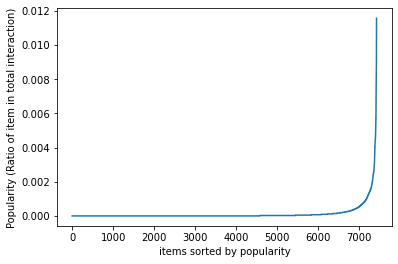

In [197]:
## item hit
rejected_uniq_items = np.unique(rejected_items)
# print(item_hit[rejected_uniq_items]).mean(), item_hit[rejected_uniq_items].std())
plt.plot(sorted(item_hit/len(train_review)))

plt.ylabel('Popularity (Ratio of item in total interaction)')
plt.xlabel('items sorted by popularity')
# plt.plot(sorted(item_hit[rejected_items]/len(train_review)))
# plt.show()
plt.savefig('popularity-all.png', dpi = 400)

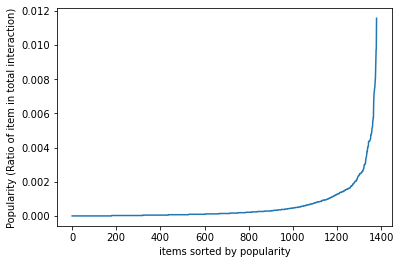

In [196]:
plt.plot(sorted(item_hit[rejected_uniq_items]/len(train_review)))
plt.ylabel('Popularity (Ratio of item in total interaction)')
plt.xlabel('items sorted by popularity')
plt.savefig('popularity-failed.png', dpi = 400)

In [118]:
print((sum(item_hit/len(train_review) > 0.001)) / len(item_hit))

print((sum(item_hit[rejected_uniq_items]/len(train_review) > 0.001)) / len(rejected_uniq_items))


0.03257942918686053
0.15797101449275364


# False positive and negative

In [ ]:
def count_fp_fn(node, single_review, depth, target):

    fp = False
    fn = False
    
    if(node.feature is None):
#         print("leaf node")
        return node.members, depth, node.vector, fp, fn
#     print("Q{}: {} > 0?:".format(depth+1, node.feature))   

    val = single_review[node.feature]

    if(val > 0):
#         print("yes")
        
        if(train_item_opinion[target, node.feature] <= 0 ):
            fp = True
            
        if(not node.pos_node is None):
            m,d,v,a,b= count_fp_fn(node.pos_node, single_review, depth+1, target)
            return m, d, v, (a or fp), (b or fn)
        else:
            return node.members, depth+1, node.vector, fp, fn
        
    else:
#         print("no")
        if(train_item_opinion[target, node.feature] > 0 ):
            fn = True
            
        if(not node.neg_node is None):
            m,d,v,a,b= count_fp_fn(node.pos_node, single_review, depth+1, target)
            return m, d, v, (a or fp), (b or fn)
        else:
            return node.members, depth+1, node.vector, fp, fn
        

In [ ]:

def total_fp_fn(reviews, interaction):
    
    success_fp = 0
    success_fn = 0

    failure_fp = 0
    failure_fn = 0

    success = 0
    
#     for r_id in range(len(reviews)):
    for r_id in range(4800):
        r = reviews[r_id]
        u, i = interaction[r_id]

        members, _, vector, fp, fn = count_fp_fn(node = review_tree.root, single_review = r, depth = 0, target = i)
        
        su = review_model.predict(r.reshape(1,-1))#??????????????????????
        pred = -su.dot(V.T)[0]
#         recommend = np.argsort(pred)
        
#         pred = -vector.dot(V.T)
        recommend = np.argpartition(pred, topK)[:topK]
        if(i in recommend): #success
            success += 1
            if(fp):
                success_fp += 1
            if(fn):
                success_fn += 1
        else: #failure
            if(fp):
                failure_fp += 1
            if(fn):
                failure_fn += 1
                
        if((r_id+1)%1000 == 0):
            print(success/(r_id+1))
    
    print(success, success_fp, success_fn, failure_fp, failure_fn)
                
total_fp_fn(reviews=test_review, interaction=test_user_interaction)

## Done

In [669]:
# SU, V = loadSUV(i=0)
# MRR1(SU = SU_new, V=V, user_interaction = train_user_interaction)
# print("-----------------------")
# MRR1(SU = SU_new, V=V_copy, user_interaction = train_user_interaction)


In [ ]:
i = 500
V[i], V_copy[i]

In [ ]:
j = 500
SU[j], SU_new[j]

In [ ]:
saveSUV(i=1)

In [ ]:
def save_tree(i):
    with open("review_tree_{}.pkl".format(i), "wb") as f:
        pickle.dump(review_tree, f)
        
def load_tree(i):
    with open("review_tree_{}.pkl".format(i), "rb") as f:
        pickle.dump(review_tree, f)

In [ ]:
save_tree(i = 1)

In [ ]:
saveSUV(i=1)

In [ ]:
SU, _ = loadSUV(i = 1)

# ----------------------------------------------------------------

# ----------------------------------------------------------------

In [ ]:
import os.path
import time

MAX_ITER = 50
SGD_ITER = 1500

for i in range(0,MAX_ITER+1):
    
    fpath = "V_{}.npy".format(i)
    while not os.path.exists(fpath):
        print("waiting for ", fpath)
        time.sleep(60)
    if os.path.isfile(fpath):
        V = np.load('V_{}.npy'.format(i))
    else:
        raise ValueError("%s isn't a file!" % fpath)
        
    create_tree(tree_type="item", node=item_tree.root, depth=0)
    print_tree(item_tree.root, 0, 0)
    
    review_model = Model(tree = item_tree)
    SU_new, V_copy = personalize(model = item_model, num_iter = SGD_ITER)
    
    print("RESULT OF ITERATION...")
    MRR1(SU = SU_new, V=V_copy, user_interaction = train_user_interaction)
    
    SU = SU_new
    np.save('SU_{}'.format(i), SU)
    save_tree(i = i)
    review_tree = Tree(tree_type = "review")


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [161]:
s = "this is a, string"
tokens = s.split(",")
for t in tokens:
    print(t)

this is a
 string


In [177]:
import re
re.split('\.\+', "This.is.working+maybe")

['This.is.working+maybe']

In [179]:
s = "this is a"

news = ""

for c in s:
    news = c+news

news

'a si siht'